In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
census_id_to_index = {'01001020802': 0, '01003010300': 1, '01003010703': 2, '01003011202': 3, '01003011401': 4, '01003011502': 5, '01003011602': 6, '01015001700': 7, '01031011202': 8, '01043965500': 9, '01047956300': 10, '01049960500': 11, '01053969900': 12, '01055011001': 13, '01059973000': 14, '01069041900': 15, '01073004701': 16, '01073004800': 17, '01073005000': 18, '01073005903': 19, '01073011001': 20, '01073012905': 21, '01073012911': 22, '01073014204': 23, '01073014413': 24, '01075030200': 25, '01077010400': 26, '01077011604': 27, '01079979800': 28, '01081040400': 29, '01081041700': 30, '01089000601': 31, '01089001200': 32, '01089002600': 33, '01089010901': 34, '01091973000': 35, '01093964700': 36, '01097003704': 37, '01097003708': 38, '01097006301': 39, '01101005604': 40, '01103005101': 41, '01109189000': 42, '01115040104': 43, '01115040105': 44, '01115040501': 45, '01115040502': 46, '01117030214': 47, '01117030216': 48, '01117030304': 49, '01117030502': 50, '01117030605': 51, '01125012000': 52, '01125012600': 53, '01133965800': 54, '02020000102': 55, '02020000202': 56, '02020000203': 57, '02020000204': 58, '02020000801': 59, '02020000802': 60, '02020000902': 61, '02020001100': 62, '02020001200': 63, '02020001300': 64, '02020001400': 65, '02020001500': 66, '02020001601': 67, '02020001602': 68, '02020001701': 69, '02020001732': 70, '02020001801': 71, '02020001802': 72, '02020002000': 73, '02020002100': 74, '02020002201': 75, '02020002301': 76, '02020002302': 77, '02020002303': 78, '02020002400': 79, '02020002501': 80, '02020002502': 81, '02020002702': 82, '02020002711': 83, '02020002812': 84, '02020002813': 85, '02020002823': 86, '02090000200': 87, '02090000500': 88, '02090001000': 89, '02090001400': 90, '02090001900': 91, '02110000100': 92, '02110000200': 93, '02110000300': 94, '02110000500': 95, '02110000600': 96, '02122000500': 97, '02122000600': 98, '02122000700': 99, '02130000200': 100, '02130000300': 101, '02150000500': 102, '02170000601': 103, '02170000604': 104, '02170000703': 105, '02170000800': 106, '02170001100': 107, '02180000100': 108, '02261000200': 109, '02275000300': 110, '04001944000': 111, '04001945001': 112, '04001945002': 113, '04001970501': 114, '04001970502': 115, '04003000201': 116, '04003000202': 117, '04003000203': 118, '04003000301': 119, '04003000302': 120, '04003000303': 121, '04003000700': 122, '04003000800': 123, '04003000901': 124, '04003000902': 125, '04003001100': 126, '04003001200': 127, '04003001300': 128, '04003001501': 129, '04003001502': 130, '04003001601': 131, '04003001602': 132, '04003001701': 133, '04003001702': 134, '04003001703': 135, '04003001800': 136, '04003001900': 137, '04003002001': 138, '04003002002': 139, '04003002100': 140, '04005000100': 141, '04005000200': 142, '04005000300': 143, '04005000400': 144, '04005000500': 145, '04005000600': 146, '04005000700': 147, '04005000800': 148, '04005000900': 149, '04005001101': 150, '04005001102': 151, '04005001200': 152, '04005001301': 153, '04005001302': 154, '04005001500': 155, '04005001600': 156, '04005001700': 157, '04005002200': 158, '04005002300': 159, '04005944900': 160, '04005945000': 161, '04005945100': 162, '04007000301': 163, '04007000302': 164, '04007000400': 165, '04007000500': 166, '04007000600': 167, '04007000800': 168, '04007001000': 169, '04007001100': 170, '04007001200': 171, '04007001300': 172, '04007940200': 173, '04009961100': 174, '04009961202': 175, '04009961300': 176, '04009961400': 177, '04009961500': 178, '04009961600': 179, '04009961700': 180, '04011960100': 181, '04011960200': 182, '04011960300': 183, '04012020202': 184, '04012020501': 185, '04012020502': 186, '04013010102': 187, '04013030401': 188, '04013040506': 189, '04013040512': 190, '04013040514': 191, '04013040517': 192, '04013040518': 193, '04013040519': 194, '04013040520': 195, '04013040523': 196, '04013040524': 197, '04013040528': 198, '04013050609': 199, '04013061010': 200, '04013061035': 201, '04013061036': 202, '04013061200': 203, '04013071503': 204, '04013071504': 205, '04013071509': 206, '04013071801': 207, '04013071911': 208, '04013071914': 209, '04013093001': 210, '04013103207': 211, '04013103605': 212, '04013103607': 213, '04013103611': 214, '04013104212': 215, '04013104222': 216, '04013105101': 217, '04013106100': 218, '04013107000': 219, '04013107400': 220, '04013107500': 221, '04013108200': 222, '04013110400': 223, '04013110600': 224, '04013110802': 225, '04013111800': 226, '04013112505': 227, '04013114703': 228, '04013116300': 229, '04013116605': 230, '04013116612': 231, '04013116613': 232, '04013116704': 233, '04013116707': 234, '04013116708': 235, '04013116709': 236, '04013116712': 237, '04013116718': 238, '04013116721': 239, '04013116800': 240, '04013216806': 241, '04013216816': 242, '04013216818': 243, '04013216821': 244, '04013216822': 245, '04013216826': 246, '04013216829': 247, '04013216848': 248, '04013216849': 249, '04013216853': 250, '04013217400': 251, '04013217502': 252, '04013318800': 253, '04013318900': 254, '04013319401': 255, '04013319402': 256, '04013319404': 257, '04013319600': 258, '04013319902': 259, '04013319903': 260, '04013319905': 261, '04013420110': 262, '04013420113': 263, '04013420210': 264, '04013420211': 265, '04013420216': 266, '04013420602': 267, '04013420704': 268, '04013422221': 269, '04013422302': 270, '04013422503': 271, '04013422506': 272, '04013422512': 273, '04013422610': 274, '04013422621': 275, '04013422630': 276, '04013422646': 277, '04013610300': 278, '04013610900': 279, '04013611200': 280, '04013611700': 281, '04013611800': 282, '04013612200': 283, '04013612300': 284, '04013613100': 285, '04013613900': 286, '04013614000': 287, '04013614900': 288, '04013615100': 289, '04013615200': 290, '04013616000': 291, '04013616400': 292, '04013616800': 293, '04013617200': 294, '04013617300': 295, '04013617400': 296, '04013617800': 297, '04013618000': 298, '04013723304': 299, '04013723308': 300, '04013810100': 301, '04013810700': 302, '04013811500': 303, '04013814500': 304, '04013814800': 305, '04013815500': 306, '04013815700': 307, '04013815800': 308, '04013816000': 309, '04013817200': 310, '04013817300': 311, '04013817400': 312, '04015940501': 313, '04015950100': 314, '04015950402': 315, '04015950500': 316, '04015950600': 317, '04015950703': 318, '04015950704': 319, '04015950705': 320, '04015951401': 321, '04015951402': 322, '04015951501': 323, '04015951502': 324, '04015951601': 325, '04015951602': 326, '04015951700': 327, '04015951800': 328, '04015951900': 329, '04015952002': 330, '04015952003': 331, '04015952004': 332, '04015952400': 333, '04015952500': 334, '04015952600': 335, '04015952700': 336, '04015952800': 337, '04015952900': 338, '04015953000': 339, '04015953100': 340, '04015953200': 341, '04015953300': 342, '04015953401': 343, '04015953402': 344, '04015953601': 345, '04015953602': 346, '04015953800': 347, '04015953900': 348, '04015954800': 349, '04015954900': 350, '04015955000': 351, '04017940011': 352, '04017940012': 353, '04017940013': 354, '04017940301': 355, '04017942500': 356, '04017960100': 357, '04017960200': 358, '04017960400': 359, '04017960500': 360, '04017960600': 361, '04017961300': 362, '04017961700': 363, '04017962500': 364, '04017963300': 365, '04017963400': 366, '04017963700': 367, '04017964201': 368, '04017964800': 369, '04017964900': 370, '04017965200': 371, '04017965300': 372, '04019000200': 373, '04019000900': 374, '04019002400': 375, '04019002602': 376, '04019002905': 377, '04019003302': 378, '04019003303': 379, '04019003304': 380, '04019003501': 381, '04019003502': 382, '04019003705': 383, '04019004010': 384, '04019004022': 385, '04019004026': 386, '04019004030': 387, '04019004032': 388, '04019004037': 389, '04019004042': 390, '04019004048': 391, '04019004049': 392, '04019004051': 393, '04019004053': 394, '04019004063': 395, '04019004064': 396, '04019004117': 397, '04019004119': 398, '04019004320': 399, '04019004322': 400, '04019004328': 401, '04019004330': 402, '04019004333': 403, '04019004334': 404, '04019004421': 405, '04019004427': 406, '04019004429': 407, '04019004504': 408, '04019004624': 409, '04019004633': 410, '04019004636': 411, '04019004638': 412, '04019004640': 413, '04019004642': 414, '04019004713': 415, '04019004714': 416, '04019004716': 417, '04019004718': 418, '04019004719': 419, '04019941000': 420, '04021000213': 421, '04021000214': 422, '04021000308': 423, '04021000316': 424, '04021000604': 425, '04021000802': 426, '04021001301': 427, '04021001305': 428, '04021001408': 429, '04021002001': 430, '04023966000': 431, '04023966101': 432, '04023966104': 433, '04023966105': 434, '04023966200': 435, '04023966301': 436, '04023966302': 437, '04025000202': 438, '04025000203': 439, '04025000204': 440, '04025000300': 441, '04025000401': 442, '04025000402': 443, '04025000500': 444, '04025000604': 445, '04025000605': 446, '04025000606': 447, '04025000607': 448, '04025000608': 449, '04025000609': 450, '04025000610': 451, '04025000700': 452, '04025000801': 453, '04025000802': 454, '04025000900': 455, '04025001001': 456, '04025001002': 457, '04025001101': 458, '04025001102': 459, '04025001200': 460, '04025001401': 461, '04025001402': 462, '04025001403': 463, '04025001500': 464, '04025001601': 465, '04025001602': 466, '04025001603': 467, '04025001701': 468, '04025001702': 469, '04025001703': 470, '04025001801': 471, '04025001802': 472, '04025001900': 473, '04025002001': 474, '04025002002': 475, '04025002003': 476, '04025002004': 477, '04025002100': 478, '04027000100': 479, '04027000301': 480, '04027000501': 481, '04027000502': 482, '04027000600': 483, '04027000700': 484, '04027000800': 485, '04027000901': 486, '04027000902': 487, '04027000903': 488, '04027000905': 489, '04027000907': 490, '04027000908': 491, '04027001001': 492, '04027001004': 493, '04027001100': 494, '04027001200': 495, '04027010907': 496, '04027010910': 497, '04027010911': 498, '04027011104': 499, '04027011106': 500, '04027011107': 501, '04027011110': 502, '04027011111': 503, '04027011112': 504, '04027011114': 505, '04027011115': 506, '04027011201': 507, '04027011405': 508, '04027011406': 509, '04027011501': 510, '04027011503': 511, '04027011600': 512, '04027011800': 513, '05003960200': 514, '05007020806': 515, '05033020302': 516, '05045030102': 517, '05045030502': 518, '05045031006': 519, '05051011602': 520, '05051012001': 521, '05055480400': 522, '05059020400': 523, '05075470400': 524, '05081030102': 525, '05089960100': 526, '05089960300': 527, '05091020802': 528, '05093011400': 529, '05103950500': 530, '05115950700': 531, '05115951501': 532, '05119001501': 533, '05119003606': 534, '05119003703': 535, '05119004104': 536, '05119004201': 537, '05119004213': 538, '05119004303': 539, '05119004900': 540, '05125010503': 541, '05125010506': 542, '05125010510': 543, '05131001304': 544, '05131010301': 545, '05143010506': 546, '05143010701': 547, '05145070700': 548, '05145070900': 549, '06001400200': 550, '06001400300': 551, '06001400400': 552, '06001400700': 553, '06001400800': 554, '06001400900': 555, '06001401000': 556, '06001401200': 557, '06001401300': 558, '06001402800': 559, '06001403300': 560, '06001403400': 561, '06001403501': 562, '06001403502': 563, '06001403600': 564, '06001403701': 565, '06001403800': 566, '06001403900': 567, '06001404000': 568, '06001404101': 569, '06001404102': 570, '06001404400': 571, '06001404501': 572, '06001404502': 573, '06001404600': 574, '06001404800': 575, '06001405100': 576, '06001405200': 577, '06001405301': 578, '06001405401': 579, '06001405600': 580, '06001405800': 581, '06001406000': 582, '06001406500': 583, '06001406601': 584, '06001406700': 585, '06001406900': 586, '06001407000': 587, '06001407700': 588, '06001408000': 589, '06001408100': 590, '06001409300': 591, '06001409900': 592, '06001410000': 593, '06001420100': 594, '06001420400': 595, '06001420600': 596, '06001421100': 597, '06001421200': 598, '06001421300': 599, '06001421500': 600, '06001421700': 601, '06001421800': 602, '06001421900': 603, '06001422200': 604, '06001422300': 605, '06001422400': 606, '06001422900': 607, '06001423100': 608, '06001423200': 609, '06001423300': 610, '06001423400': 611, '06001423500': 612, '06001423601': 613, '06001423700': 614, '06001423800': 615, '06001423902': 616, '06001424001': 617, '06001425102': 618, '06001425104': 619, '06001426100': 620, '06001427100': 621, '06001427300': 622, '06001427700': 623, '06001427800': 624, '06001428100': 625, '06001428200': 626, '06001428302': 627, '06001428400': 628, '06001428500': 629, '06001430101': 630, '06001430102': 631, '06001430200': 632, '06001430500': 633, '06001430600': 634, '06001430800': 635, '06001431000': 636, '06001432600': 637, '06001432700': 638, '06001432800': 639, '06001433000': 640, '06001433600': 641, '06001433800': 642, '06001433900': 643, '06001435102': 644, '06001435103': 645, '06001435300': 646, '06001435800': 647, '06001435900': 648, '06001436100': 649, '06001436300': 650, '06001436401': 651, '06001436402': 652, '06001437400': 653, '06001437702': 654, '06001437800': 655, '06001438100': 656, '06001438201': 657, '06001440304': 658, '06001440332': 659, '06001440336': 660, '06001441100': 661, '06001441200': 662, '06001441301': 663, '06001441302': 664, '06001441401': 665, '06001441501': 666, '06001441521': 667, '06001441524': 668, '06001441602': 669, '06001441700': 670, '06001441800': 671, '06001441923': 672, '06001441924': 673, '06001441925': 674, '06001441926': 675, '06001442200': 676, '06001442400': 677, '06001442500': 678, '06001442602': 679, '06001442800': 680, '06001443001': 681, '06001443002': 682, '06001443104': 683, '06001443105': 684, '06001443200': 685, '06001443321': 686, '06001444100': 687, '06001444301': 688, '06001444601': 689, '06001450101': 690, '06001450300': 691, '06001450400': 692, '06001450502': 693, '06001450601': 694, '06001450602': 695, '06001450603': 696, '06001450606': 697, '06001450701': 698, '06001450741': 699, '06001450742': 700, '06001450743': 701, '06001450744': 702, '06001450746': 703, '06001450751': 704, '06001451101': 705, '06001451201': 706, '06001451401': 707, '06001451501': 708, '06001451503': 709, '06001451504': 710, '06001451505': 711, '06001451601': 712, '06001451602': 713, '06001451703': 714, '06005000101': 715, '06005000102': 716, '06005000200': 717, '06005000301': 718, '06005000303': 719, '06005000304': 720, '06005000401': 721, '06005000402': 722, '06005000500': 723, '06007000102': 724, '06007000103': 725, '06007000104': 726, '06007000201': 727, '06007000202': 728, '06007000300': 729, '06007000401': 730, '06007000402': 731, '06007000501': 732, '06007000502': 733, '06007000601': 734, '06007000603': 735, '06007000604': 736, '06007000700': 737, '06007000800': 738, '06007000901': 739, '06007000903': 740, '06007000904': 741, '06007001000': 742, '06007001100': 743, '06007001200': 744, '06007001300': 745, '06007001400': 746, '06007001500': 747, '06007001600': 748, '06007001702': 749, '06007001703': 750, '06007001704': 751, '06007001800': 752, '06007001900': 753, '06007002000': 754, '06007002100': 755, '06007002200': 756, '06007002300': 757, '06007002400': 758, '06007002500': 759, '06007002601': 760, '06007002602': 761, '06007002700': 762, '06007002800': 763, '06007002900': 764, '06007003001': 765, '06007003100': 766, '06007003200': 767, '06007003300': 768, '06007003400': 769, '06007003501': 770, '06007003502': 771, '06007003600': 772, '06007003700': 773, '06009000120': 774, '06009000121': 775, '06009000122': 776, '06009000210': 777, '06009000220': 778, '06009000300': 779, '06009000400': 780, '06009000501': 781, '06011000100': 782, '06011000200': 783, '06011000300': 784, '06011000400': 785, '06011000500': 786, '06013301000': 787, '06013302005': 788, '06013302006': 789, '06013302007': 790, '06013302010': 791, '06013303102': 792, '06013303103': 793, '06013303201': 794, '06013303202': 795, '06013303203': 796, '06013303204': 797, '06013303205': 798, '06013304001': 799, '06013304003': 800, '06013304005': 801, '06013305000': 802, '06013306004': 803, '06013307102': 804, '06013307204': 805, '06013308001': 806, '06013313101': 807, '06013313102': 808, '06013314104': 809, '06013315000': 810, '06013319000': 811, '06013321101': 812, '06013321102': 813, '06013321103': 814, '06013321200': 815, '06013323000': 816, '06013324002': 817, '06013325000': 818, '06013326000': 819, '06013327000': 820, '06013328000': 821, '06013329000': 822, '06013330000': 823, '06013331000': 824, '06013332000': 825, '06013333101': 826, '06013333102': 827, '06013333200': 828, '06013334004': 829, '06013334006': 830, '06013334200': 831, '06013335000': 832, '06013336101': 833, '06013336102': 834, '06013337200': 835, '06013337300': 836, '06013338102': 837, '06013338204': 838, '06013338301': 839, '06013338302': 840, '06013339002': 841, '06013340001': 842, '06013340002': 843, '06013341000': 844, '06013343001': 845, '06013343002': 846, '06013343003': 847, '06013345101': 848, '06013345103': 849, '06013345105': 850, '06013345108': 851, '06013345111': 852, '06013345113': 853, '06013345114': 854, '06013345115': 855, '06013345116': 856, '06013345202': 857, '06013345203': 858, '06013345204': 859, '06013346101': 860, '06013346201': 861, '06013346203': 862, '06013346204': 863, '06013347000': 864, '06013350000': 865, '06013351101': 866, '06013351102': 867, '06013351200': 868, '06013352102': 869, '06013352201': 870, '06013353001': 871, '06013353002': 872, '06013354001': 873, '06013354002': 874, '06013355107': 875, '06013355108': 876, '06013355109': 877, '06013355113': 878, '06013355114': 879, '06013355115': 880, '06013355116': 881, '06013355301': 882, '06013355304': 883, '06013355306': 884, '06013357000': 885, '06013358000': 886, '06013359103': 887, '06013359202': 888, '06013359203': 889, '06013359204': 890, '06013361000': 891, '06013363000': 892, '06013364002': 893, '06013366001': 894, '06013367200': 895, '06013371000': 896, '06013372000': 897, '06013374000': 898, '06013380000': 899, '06013381000': 900, '06013383000': 901, '06013384000': 902, '06013385100': 903, '06013385200': 904, '06013386000': 905, '06013387000': 906, '06013388000': 907, '06013391000': 908, '06013392200': 909, '06013392300': 910, '06015000101': 911, '06015000102': 912, '06015000104': 913, '06015000105': 914, '06015000201': 915, '06015000202': 916, '06015000203': 917, '06017030200': 918, '06017030302': 919, '06017030401': 920, '06017030402': 921, '06017030504': 922, '06017030505': 923, '06017030601': 924, '06017030602': 925, '06017030603': 926, '06017030701': 927, '06017030704': 928, '06017030706': 929, '06017030709': 930, '06017030710': 931, '06017030801': 932, '06017030803': 933, '06017030804': 934, '06017030807': 935, '06017030808': 936, '06017030809': 937, '06017030810': 938, '06017030901': 939, '06017030902': 940, '06017031000': 941, '06017031100': 942, '06017031200': 943, '06017031301': 944, '06017031302': 945, '06017031402': 946, '06017031404': 947, '06017031405': 948, '06017031406': 949, '06017031502': 950, '06017031503': 951, '06017031504': 952, '06017031700': 953, '06017031800': 954, '06019000100': 955, '06019000400': 956, '06019000502': 957, '06019000600': 958, '06019001000': 959, '06019001408': 960, '06019001410': 961, '06019001412': 962, '06019001413': 963, '06019001414': 964, '06019001600': 965, '06019001700': 966, '06019002000': 967, '06019002100': 968, '06019002200': 969, '06019002300': 970, '06019002400': 971, '06019002602': 972, '06019002701': 973, '06019003102': 974, '06019003103': 975, '06019003104': 976, '06019003201': 977, '06019003202': 978, '06019003500': 979, '06019003600': 980, '06019003701': 981, '06019003803': 982, '06019003804': 983, '06019003808': 984, '06019003810': 985, '06019003900': 986, '06019004001': 987, '06019004002': 988, '06019004100': 989, '06019004207': 990, '06019004208': 991, '06019004210': 992, '06019004211': 993, '06019004212': 994, '06019004214': 995, '06019004301': 996, '06019004302': 997, '06019004303': 998, '06019004404': 999, '06019004405': 1000, '06019004406': 1001, '06019004408': 1002, '06019004409': 1003, '06019004503': 1004, '06019004504': 1005, '06019004506': 1006, '06019004601': 1007, '06019004602': 1008, '06019004701': 1009, '06019004704': 1010, '06019004801': 1011, '06019004802': 1012, '06019004901': 1013, '06019005000': 1014, '06019005100': 1015, '06019005202': 1016, '06019005203': 1017, '06019005204': 1018, '06019005301': 1019, '06019005302': 1020, '06019005304': 1021, '06019005305': 1022, '06019005405': 1023, '06019005406': 1024, '06019005407': 1025, '06019005503': 1026, '06019005504': 1027, '06019005505': 1028, '06019005507': 1029, '06019005508': 1030, '06019005509': 1031, '06019005510': 1032, '06019005512': 1033, '06019005513': 1034, '06019005514': 1035, '06019005515': 1036, '06019005516': 1037, '06019005517': 1038, '06019005518': 1039, '06019005520': 1040, '06019005522': 1041, '06019005602': 1042, '06019005606': 1043, '06019005607': 1044, '06019005608': 1045, '06019005701': 1046, '06019005702': 1047, '06019005704': 1048, '06019005802': 1049, '06019005804': 1050, '06019005805': 1051, '06019005904': 1052, '06019005905': 1053, '06019005907': 1054, '06019005909': 1055, '06019005911': 1056, '06019005912': 1057, '06019006000': 1058, '06019006202': 1059, '06019006300': 1060, '06019006402': 1061, '06019006403': 1062, '06019006405': 1063, '06019006501': 1064, '06019006603': 1065, '06019006700': 1066, '06019006900': 1067, '06019007002': 1068, '06019007003': 1069, '06019007004': 1070, '06019007100': 1071, '06019007201': 1072, '06019007300': 1073, '06019007400': 1074, '06019007500': 1075, '06019007700': 1076, '06019008000': 1077, '06021010100': 1078, '06021010200': 1079, '06021010300': 1080, '06021010400': 1081, '06021010501': 1082, '06021010502': 1083, '06023000100': 1084, '06023000200': 1085, '06023000300': 1086, '06023000400': 1087, '06023000500': 1088, '06023000600': 1089, '06023000700': 1090, '06023000800': 1091, '06023000900': 1092, '06023001000': 1093, '06023001101': 1094, '06023001200': 1095, '06023001300': 1096, '06023010200': 1097, '06023010300': 1098, '06023010400': 1099, '06023010501': 1100, '06023010502': 1101, '06023010600': 1102, '06023010700': 1103, '06023010800': 1104, '06023010901': 1105, '06023010902': 1106, '06023011000': 1107, '06023011100': 1108, '06023011200': 1109, '06023011500': 1110, '06023011600': 1111, '06025010600': 1112, '06025011000': 1113, '06025011100': 1114, '06025011201': 1115, '06025011700': 1116, '06025011803': 1117, '06027000100': 1118, '06027000200': 1119, '06027000300': 1120, '06027000400': 1121, '06027000500': 1122, '06027000800': 1123, '06029000101': 1124, '06029000102': 1125, '06029000200': 1126, '06029000300': 1127, '06029000504': 1128, '06029000505': 1129, '06029000507': 1130, '06029000600': 1131, '06029000700': 1132, '06029000800': 1133, '06029000903': 1134, '06029000904': 1135, '06029000908': 1136, '06029000909': 1137, '06029000910': 1138, '06029001103': 1139, '06029001700': 1140, '06029001802': 1141, '06029002500': 1142, '06029002700': 1143, '06029002804': 1144, '06029002806': 1145, '06029002807': 1146, '06029002808': 1147, '06029002812': 1148, '06029002813': 1149, '06029002814': 1150, '06029002815': 1151, '06029002816': 1152, '06029002820': 1153, '06029002821': 1154, '06029002900': 1155, '06029003000': 1156, '06029003103': 1157, '06029003112': 1158, '06029003114': 1159, '06029003121': 1160, '06029003123': 1161, '06029003124': 1162, '06029003202': 1163, '06029003203': 1164, '06029003204': 1165, '06029003205': 1166, '06029003206': 1167, '06029003600': 1168, '06029003804': 1169, '06029003805': 1170, '06029003806': 1171, '06029003807': 1172, '06029003808': 1173, '06029003809': 1174, '06029003812': 1175, '06029003813': 1176, '06029004000': 1177, '06029004101': 1178, '06029004604': 1179, '06029004701': 1180, '06029004902': 1181, '06029005003': 1182, '06029005004': 1183, '06029005103': 1184, '06029005104': 1185, '06029005201': 1186, '06029005203': 1187, '06029005204': 1188, '06029005300': 1189, '06029005401': 1190, '06029005402': 1191, '06029005403': 1192, '06029005404': 1193, '06029005506': 1194, '06029005507': 1195, '06029005801': 1196, '06029005802': 1197, '06029005900': 1198, '06029006003': 1199, '06029006006': 1200, '06029006007': 1201, '06029006008': 1202, '06029006100': 1203, '06029006301': 1204, '06029006401': 1205, '06029006403': 1206, '06029006500': 1207, '06031000300': 1208, '06031000403': 1209, '06031000404': 1210, '06031000500': 1211, '06031000601': 1212, '06031000602': 1213, '06031000701': 1214, '06031000702': 1215, '06031000800': 1216, '06031000900': 1217, '06031001001': 1218, '06031001701': 1219, '06033000100': 1220, '06033000300': 1221, '06033000400': 1222, '06033000501': 1223, '06033000502': 1224, '06033000600': 1225, '06033000701': 1226, '06033000702': 1227, '06033000802': 1228, '06033000900': 1229, '06033001000': 1230, '06033001100': 1231, '06033001200': 1232, '06033001300': 1233, '06035040100': 1234, '06035040200': 1235, '06035040302': 1236, '06035040303': 1237, '06035040304': 1238, '06035040305': 1239, '06035040500': 1240, '06035040600': 1241, '06037101110': 1242, '06037101220': 1243, '06037101300': 1244, '06037102104': 1245, '06037103400': 1246, '06037106113': 1247, '06037106408': 1248, '06037106603': 1249, '06037111100': 1250, '06037111202': 1251, '06037111301': 1252, '06037113102': 1253, '06037113211': 1254, '06037113212': 1255, '06037113421': 1256, '06037113422': 1257, '06037115302': 1258, '06037115404': 1259, '06037117201': 1260, '06037117202': 1261, '06037119201': 1262, '06037119400': 1263, '06037119900': 1264, '06037120104': 1265, '06037120400': 1266, '06037122420': 1267, '06037123700': 1268, '06037123800': 1269, '06037123901': 1270, '06037123902': 1271, '06037124105': 1272, '06037124700': 1273, '06037125100': 1274, '06037125200': 1275, '06037125401': 1276, '06037125502': 1277, '06037128101': 1278, '06037128500': 1279, '06037128602': 1280, '06037128702': 1281, '06037128801': 1282, '06037128910': 1283, '06037131100': 1284, '06037131200': 1285, '06037131701': 1286, '06037131702': 1287, '06037132900': 1288, '06037133100': 1289, '06037134422': 1290, '06037134520': 1291, '06037134522': 1292, '06037134800': 1293, '06037135202': 1294, '06037137104': 1295, '06037137201': 1296, '06037137402': 1297, '06037139301': 1298, '06037139303': 1299, '06037139402': 1300, '06037139702': 1301, '06037141201': 1302, '06037141302': 1303, '06037141700': 1304, '06037143100': 1305, '06037143300': 1306, '06037143400': 1307, '06037143700': 1308, '06037143800': 1309, '06037143901': 1310, '06037183101': 1311, '06037183610': 1312, '06037183701': 1313, '06037183810': 1314, '06037185204': 1315, '06037188100': 1316, '06037189101': 1317, '06037189102': 1318, '06037189201': 1319, '06037189400': 1320, '06037189500': 1321, '06037189600': 1322, '06037189701': 1323, '06037189800': 1324, '06037189902': 1325, '06037194101': 1326, '06037195300': 1327, '06037195400': 1328, '06037195500': 1329, '06037195903': 1330, '06037197300': 1331, '06037197410': 1332, '06037197500': 1333, '06037197600': 1334, '06037199202': 1335, '06037199300': 1336, '06037201200': 1337, '06037201302': 1338, '06037201700': 1339, '06037204200': 1340, '06037207301': 1341, '06037207302': 1342, '06037207501': 1343, '06037211910': 1344, '06037211921': 1345, '06037212303': 1346, '06037212304': 1347, '06037212306': 1348, '06037212420': 1349, '06037212900': 1350, '06037214400': 1351, '06037214503': 1352, '06037214700': 1353, '06037215102': 1354, '06037216300': 1355, '06037216800': 1356, '06037217002': 1357, '06037218220': 1358, '06037219020': 1359, '06037220000': 1360, '06037221810': 1361, '06037222100': 1362, '06037228410': 1363, '06037232400': 1364, '06037234000': 1365, '06037234300': 1366, '06037234600': 1367, '06037234902': 1368, '06037236203': 1369, '06037236400': 1370, '06037237102': 1371, '06037237402': 1372, '06037238000': 1373, '06037238400': 1374, '06037241202': 1375, '06037243000': 1376, '06037261102': 1377, '06037261200': 1378, '06037262302': 1379, '06037262303': 1380, '06037262601': 1381, '06037262802': 1382, '06037264000': 1383, '06037264301': 1384, '06037264302': 1385, '06037265202': 1386, '06037265510': 1387, '06037265520': 1388, '06037265601': 1389, '06037265700': 1390, '06037267100': 1391, '06037267200': 1392, '06037267300': 1393, '06037267402': 1394, '06037267501': 1395, '06037267700': 1396, '06037267901': 1397, '06037267902': 1398, '06037269500': 1399, '06037269700': 1400, '06037269800': 1401, '06037269905': 1402, '06037270100': 1403, '06037270200': 1404, '06037271200': 1405, '06037271300': 1406, '06037271500': 1407, '06037271701': 1408, '06037271702': 1409, '06037271802': 1410, '06037271901': 1411, '06037272202': 1412, '06037273700': 1413, '06037275102': 1414, '06037275302': 1415, '06037275311': 1416, '06037275602': 1417, '06037276000': 1418, '06037276100': 1419, '06037276603': 1420, '06037276604': 1421, '06037277100': 1422, '06037278001': 1423, '06037291110': 1424, '06037292000': 1425, '06037293201': 1426, '06037294200': 1427, '06037294410': 1428, '06037294520': 1429, '06037296220': 1430, '06037296401': 1431, '06037297500': 1432, '06037297602': 1433, '06037300100': 1434, '06037300200': 1435, '06037300400': 1436, '06037300501': 1437, '06037300502': 1438, '06037300701': 1439, '06037300702': 1440, '06037300800': 1441, '06037301000': 1442, '06037301100': 1443, '06037301400': 1444, '06037301502': 1445, '06037302102': 1446, '06037302104': 1447, '06037302301': 1448, '06037302401': 1449, '06037310202': 1450, '06037310501': 1451, '06037310900': 1452, '06037311000': 1453, '06037311400': 1454, '06037311500': 1455, '06037311600': 1456, '06037311801': 1457, '06037311802': 1458, '06037400204': 1459, '06037400205': 1460, '06037400206': 1461, '06037400207': 1462, '06037400603': 1463, '06037400604': 1464, '06037400800': 1465, '06037401002': 1466, '06037401102': 1467, '06037401311': 1468, '06037401312': 1469, '06037401500': 1470, '06037401601': 1471, '06037401602': 1472, '06037401603': 1473, '06037401701': 1474, '06037401704': 1475, '06037401902': 1476, '06037402002': 1477, '06037402501': 1478, '06037402502': 1479, '06037402703': 1480, '06037402904': 1481, '06037403304': 1482, '06037403316': 1483, '06037403317': 1484, '06037403324': 1485, '06037403325': 1486, '06037403401': 1487, '06037403402': 1488, '06037403600': 1489, '06037404000': 1490, '06037404100': 1491, '06037404401': 1492, '06037404701': 1493, '06037404901': 1494, '06037404903': 1495, '06037405600': 1496, '06037406300': 1497, '06037406601': 1498, '06037406701': 1499, '06037406901': 1500, '06037407502': 1501, '06037407602': 1502, '06037408004': 1503, '06037408301': 1504, '06037408402': 1505, '06037408505': 1506, '06037408624': 1507, '06037408625': 1508, '06037408628': 1509, '06037408630': 1510, '06037408703': 1511, '06037430002': 1512, '06037430003': 1513, '06037430400': 1514, '06037430501': 1515, '06037430502': 1516, '06037430723': 1517, '06037430724': 1518, '06037430801': 1519, '06037430802': 1520, '06037430901': 1521, '06037431300': 1522, '06037431501': 1523, '06037431700': 1524, '06037431800': 1525, '06037431900': 1526, '06037432000': 1527, '06037432101': 1528, '06037432102': 1529, '06037432201': 1530, '06037432300': 1531, '06037433307': 1532, '06037460000': 1533, '06037460100': 1534, '06037460301': 1535, '06037460501': 1536, '06037460600': 1537, '06037460700': 1538, '06037461300': 1539, '06037461901': 1540, '06037462201': 1541, '06037462302': 1542, '06037462400': 1543, '06037462500': 1544, '06037462600': 1545, '06037462700': 1546, '06037462900': 1547, '06037463102': 1548, '06037463601': 1549, '06037463800': 1550, '06037464100': 1551, '06037464200': 1552, '06037480101': 1553, '06037480202': 1554, '06037480302': 1555, '06037480400': 1556, '06037480500': 1557, '06037480600': 1558, '06037480703': 1559, '06037480802': 1560, '06037480804': 1561, '06037481202': 1562, '06037481500': 1563, '06037481901': 1564, '06037481902': 1565, '06037482202': 1566, '06037482303': 1567, '06037482522': 1568, '06037482701': 1569, '06037501200': 1570, '06037501300': 1571, '06037502301': 1572, '06037502401': 1573, '06037502901': 1574, '06037503104': 1575, '06037503302': 1576, '06037503401': 1577, '06037503601': 1578, '06037503703': 1579, '06037503801': 1580, '06037530005': 1581, '06037530302': 1582, '06037533105': 1583, '06037533502': 1584, '06037533603': 1585, '06037533702': 1586, '06037534405': 1587, '06037535802': 1588, '06037540901': 1589, '06037541605': 1590, '06037542900': 1591, '06037543000': 1592, '06037543321': 1593, '06037543322': 1594, '06037543802': 1595, '06037544001': 1596, '06037550601': 1597, '06037550602': 1598, '06037550800': 1599, '06037551000': 1600, '06037551401': 1601, '06037551501': 1602, '06037551900': 1603, '06037552800': 1604, '06037552900': 1605, '06037553400': 1606, '06037553802': 1607, '06037553902': 1608, '06037554204': 1609, '06037554406': 1610, '06037554512': 1611, '06037554514': 1612, '06037554518': 1613, '06037554522': 1614, '06037554700': 1615, '06037555001': 1616, '06037570003': 1617, '06037570100': 1618, '06037570304': 1619, '06037570800': 1620, '06037570901': 1621, '06037571200': 1622, '06037571300': 1623, '06037571400': 1624, '06037571504': 1625, '06037571900': 1626, '06037572001': 1627, '06037572100': 1628, '06037572900': 1629, '06037573202': 1630, '06037573700': 1631, '06037574201': 1632, '06037574400': 1633, '06037574800': 1634, '06037574901': 1635, '06037575001': 1636, '06037575002': 1637, '06037575201': 1638, '06037575802': 1639, '06037575803': 1640, '06037575901': 1641, '06037575902': 1642, '06037576001': 1643, '06037576200': 1644, '06037576502': 1645, '06037576503': 1646, '06037576802': 1647, '06037577000': 1648, '06037577200': 1649, '06037577300': 1650, '06037577603': 1651, '06037599000': 1652, '06037600100': 1653, '06037600302': 1654, '06037600502': 1655, '06037600902': 1656, '06037601301': 1657, '06037601302': 1658, '06037601303': 1659, '06037601501': 1660, '06037602003': 1661, '06037602200': 1662, '06037602302': 1663, '06037602404': 1664, '06037602507': 1665, '06037603400': 1666, '06037604001': 1667, '06037620002': 1668, '06037620101': 1669, '06037620102': 1670, '06037620301': 1671, '06037620305': 1672, '06037620400': 1673, '06037620521': 1674, '06037620601': 1675, '06037620602': 1676, '06037620702': 1677, '06037620800': 1678, '06037620901': 1679, '06037621001': 1680, '06037621102': 1681, '06037621301': 1682, '06037621324': 1683, '06037650001': 1684, '06037650101': 1685, '06037650102': 1686, '06037650200': 1687, '06037650300': 1688, '06037650401': 1689, '06037650502': 1690, '06037650701': 1691, '06037650901': 1692, '06037651002': 1693, '06037651101': 1694, '06037651102': 1695, '06037651222': 1696, '06037651302': 1697, '06037651304': 1698, '06037670001': 1699, '06037670100': 1700, '06037670326': 1701, '06037670403': 1702, '06037670405': 1703, '06037670407': 1704, '06037670413': 1705, '06037670416': 1706, '06037670602': 1707, '06037670701': 1708, '06037700101': 1709, '06037700200': 1710, '06037700300': 1711, '06037700400': 1712, '06037700501': 1713, '06037700502': 1714, '06037700801': 1715, '06037700902': 1716, '06037701000': 1717, '06037701302': 1718, '06037701304': 1719, '06037701501': 1720, '06037701502': 1721, '06037701601': 1722, '06037701701': 1723, '06037701802': 1724, '06037701902': 1725, '06037702002': 1726, '06037702102': 1727, '06037702202': 1728, '06037702300': 1729, '06037702400': 1730, '06037702501': 1731, '06037702502': 1732, '06037702600': 1733, '06037702700': 1734, '06037702901': 1735, '06037800102': 1736, '06037800202': 1737, '06037800324': 1738, '06037800326': 1739, '06037800327': 1740, '06037800328': 1741, '06037800506': 1742, '06037900504': 1743, '06037900506': 1744, '06037900605': 1745, '06037900701': 1746, '06037901004': 1747, '06037901009': 1748, '06037901010': 1749, '06037901205': 1750, '06037910205': 1751, '06037910207': 1752, '06037910301': 1753, '06037910302': 1754, '06037910501': 1755, '06037910603': 1756, '06037910711': 1757, '06037910714': 1758, '06037910804': 1759, '06037910809': 1760, '06037911001': 1761, '06037920013': 1762, '06037920015': 1763, '06037920016': 1764, '06037920017': 1765, '06037920018': 1766, '06037920023': 1767, '06037920030': 1768, '06037920035': 1769, '06037920042': 1770, '06037920045': 1771, '06037920107': 1772, '06037920108': 1773, '06037920109': 1774, '06037920110': 1775, '06037920313': 1776, '06037920326': 1777, '06037920329': 1778, '06037920334': 1779, '06037920338': 1780, '06039000103': 1781, '06039000104': 1782, '06039000106': 1783, '06039000108': 1784, '06039000109': 1785, '06039000202': 1786, '06039000300': 1787, '06039000503': 1788, '06039000506': 1789, '06039000507': 1790, '06039000508': 1791, '06039000509': 1792, '06039000700': 1793, '06039001000': 1794, '06041102100': 1795, '06041102202': 1796, '06041103100': 1797, '06041103200': 1798, '06041104101': 1799, '06041104102': 1800, '06041104200': 1801, '06041105000': 1802, '06041106001': 1803, '06041107000': 1804, '06041108100': 1805, '06041108200': 1806, '06041109001': 1807, '06041110200': 1808, '06041111000': 1809, '06041112100': 1810, '06041114100': 1811, '06041114200': 1812, '06041115000': 1813, '06041116000': 1814, '06041117000': 1815, '06041119100': 1816, '06041119202': 1817, '06041120000': 1818, '06041121100': 1819, '06041121200': 1820, '06041124100': 1821, '06041125000': 1822, '06041126100': 1823, '06041127000': 1824, '06041128100': 1825, '06041128200': 1826, '06041130202': 1827, '06043000101': 1828, '06043000102': 1829, '06043000200': 1830, '06043000301': 1831, '06043000302': 1832, '06043000400': 1833, '06045010100': 1834, '06045010300': 1835, '06045010400': 1836, '06045010500': 1837, '06045010600': 1838, '06045010700': 1839, '06045010801': 1840, '06045010900': 1841, '06045011001': 1842, '06045011002': 1843, '06045011102': 1844, '06045011200': 1845, '06045011300': 1846, '06045011400': 1847, '06045011500': 1848, '06045011600': 1849, '06045011700': 1850, '06045011800': 1851, '06047000203': 1852, '06047000301': 1853, '06047000304': 1854, '06047000402': 1855, '06047000505': 1856, '06047000601': 1857, '06047000602': 1858, '06047000603': 1859, '06047000702': 1860, '06047000801': 1861, '06047000802': 1862, '06047000901': 1863, '06047001002': 1864, '06047001101': 1865, '06047001200': 1866, '06047001302': 1867, '06047001401': 1868, '06047001402': 1869, '06047001700': 1870, '06047002000': 1871, '06047002301': 1872, '06047002302': 1873, '06047002401': 1874, '06047002402': 1875, '06047002500': 1876, '06047002600': 1877, '06049000100': 1878, '06049000200': 1879, '06051000101': 1880, '06051000102': 1881, '06051000200': 1882, '06053000101': 1883, '06053000102': 1884, '06053000103': 1885, '06053000104': 1886, '06053000200': 1887, '06053000300': 1888, '06053000400': 1889, '06053000502': 1890, '06053000800': 1891, '06053001200': 1892, '06053001400': 1893, '06053001500': 1894, '06053001600': 1895, '06053001700': 1896, '06053001801': 1897, '06053001802': 1898, '06053010101': 1899, '06053010102': 1900, '06053010202': 1901, '06053010305': 1902, '06053010306': 1903, '06053010400': 1904, '06053010501': 1905, '06053010504': 1906, '06053010505': 1907, '06053010506': 1908, '06053010603': 1909, '06053010604': 1910, '06053010605': 1911, '06053010606': 1912, '06053010701': 1913, '06053010702': 1914, '06053011000': 1915, '06053011203': 1916, '06053011204': 1917, '06053011303': 1918, '06053011304': 1919, '06053011400': 1920, '06053011602': 1921, '06053011604': 1922, '06053011700': 1923, '06053011900': 1924, '06053012000': 1925, '06053012100': 1926, '06053012200': 1927, '06053012302': 1928, '06053012401': 1929, '06053012402': 1930, '06053012502': 1931, '06053012700': 1932, '06053012800': 1933, '06053013000': 1934, '06053013100': 1935, '06053013200': 1936, '06053013300': 1937, '06053013400': 1938, '06053013500': 1939, '06053013600': 1940, '06053013700': 1941, '06053013800': 1942, '06053013900': 1943, '06053014000': 1944, '06053014102': 1945, '06053014105': 1946, '06053014107': 1947, '06053014201': 1948, '06053014202': 1949, '06053014301': 1950, '06053014302': 1951, '06053014500': 1952, '06053014601': 1953, '06053014700': 1954, '06053014800': 1955, '06055200201': 1956, '06055200302': 1957, '06055200400': 1958, '06055200501': 1959, '06055200504': 1960, '06055200602': 1961, '06055200703': 1962, '06055200802': 1963, '06055201003': 1964, '06055201004': 1965, '06055201005': 1966, '06055201200': 1967, '06055201401': 1968, '06055201402': 1969, '06055201602': 1970, '06057000102': 1971, '06057000103': 1972, '06057000104': 1973, '06057000105': 1974, '06057000200': 1975, '06057000300': 1976, '06057000401': 1977, '06057000402': 1978, '06057000501': 1979, '06057000502': 1980, '06057000600': 1981, '06057000701': 1982, '06057000702': 1983, '06057000801': 1984, '06057000802': 1985, '06057000900': 1986, '06057001203': 1987, '06057001204': 1988, '06057001205': 1989, '06057001206': 1990, '06059001301': 1991, '06059001303': 1992, '06059001501': 1993, '06059001503': 1994, '06059001505': 1995, '06059001601': 1996, '06059001707': 1997, '06059011300': 1998, '06059011402': 1999, '06059011502': 2000, '06059011601': 2001, '06059011707': 2002, '06059011711': 2003, '06059011715': 2004, '06059011716': 2005, '06059011721': 2006, '06059021802': 2007, '06059021812': 2008, '06059021815': 2009, '06059021816': 2010, '06059021817': 2011, '06059021820': 2012, '06059021821': 2013, '06059021822': 2014, '06059021828': 2015, '06059021829': 2016, '06059021912': 2017, '06059021913': 2018, '06059021917': 2019, '06059021920': 2020, '06059032013': 2021, '06059032015': 2022, '06059032022': 2023, '06059032023': 2024, '06059032029': 2025, '06059032031': 2026, '06059032036': 2027, '06059032037': 2028, '06059032039': 2029, '06059032045': 2030, '06059032047': 2031, '06059032048': 2032, '06059032050': 2033, '06059032053': 2034, '06059032056': 2035, '06059032058': 2036, '06059032059': 2037, '06059042103': 2038, '06059042109': 2039, '06059042111': 2040, '06059042112': 2041, '06059042113': 2042, '06059042114': 2043, '06059042203': 2044, '06059042305': 2045, '06059042311': 2046, '06059042313': 2047, '06059042315': 2048, '06059042317': 2049, '06059042320': 2050, '06059042323': 2051, '06059042330': 2052, '06059042334': 2053, '06059042336': 2054, '06059042338': 2055, '06059042339': 2056, '06059052408': 2057, '06059052411': 2058, '06059052417': 2059, '06059052418': 2060, '06059052420': 2061, '06059052421': 2062, '06059052422': 2063, '06059052423': 2064, '06059052424': 2065, '06059052425': 2066, '06059052426': 2067, '06059052428': 2068, '06059052502': 2069, '06059052513': 2070, '06059052514': 2071, '06059052515': 2072, '06059052517': 2073, '06059052520': 2074, '06059052525': 2075, '06059052526': 2076, '06059052527': 2077, '06059062604': 2078, '06059062610': 2079, '06059062611': 2080, '06059062612': 2081, '06059062614': 2082, '06059062619': 2083, '06059062620': 2084, '06059062621': 2085, '06059062622': 2086, '06059062626': 2087, '06059062629': 2088, '06059062631': 2089, '06059062632': 2090, '06059062633': 2091, '06059062634': 2092, '06059062635': 2093, '06059062638': 2094, '06059062639': 2095, '06059062642': 2096, '06059062644': 2097, '06059062646': 2098, '06059062647': 2099, '06059062702': 2100, '06059063004': 2101, '06059063006': 2102, '06059063007': 2103, '06059063010': 2104, '06059063101': 2105, '06059063102': 2106, '06059063302': 2107, '06059063400': 2108, '06059063601': 2109, '06059063603': 2110, '06059063604': 2111, '06059063808': 2112, '06059063902': 2113, '06059063905': 2114, '06059063906': 2115, '06059074502': 2116, '06059074901': 2117, '06059075504': 2118, '06059075505': 2119, '06059075515': 2120, '06059075604': 2121, '06059075703': 2122, '06059075809': 2123, '06059075811': 2124, '06059075901': 2125, '06059076101': 2126, '06059076201': 2127, '06059076202': 2128, '06059086301': 2129, '06059086803': 2130, '06059086902': 2131, '06059087103': 2132, '06059087105': 2133, '06059087602': 2134, '06059087802': 2135, '06059087805': 2136, '06059088203': 2137, '06059088402': 2138, '06059088502': 2139, '06059088601': 2140, '06059088602': 2141, '06059088903': 2142, '06059099204': 2143, '06059099212': 2144, '06059099215': 2145, '06059099216': 2146, '06059099217': 2147, '06059099220': 2148, '06059099223': 2149, '06059099230': 2150, '06059099232': 2151, '06059099239': 2152, '06059099240': 2153, '06059099242': 2154, '06059099244': 2155, '06059099245': 2156, '06059099246': 2157, '06059099250': 2158, '06059099306': 2159, '06059099308': 2160, '06059099309': 2161, '06059099310': 2162, '06059099311': 2163, '06059099402': 2164, '06059099404': 2165, '06059099406': 2166, '06059099408': 2167, '06059099411': 2168, '06059099412': 2169, '06059099415': 2170, '06059099417': 2171, '06059099504': 2172, '06059099508': 2173, '06059099509': 2174, '06059099510': 2175, '06059099513': 2176, '06059099514': 2177, '06059099604': 2178, '06059099703': 2179, '06059099801': 2180, '06059099902': 2181, '06059099905': 2182, '06059110006': 2183, '06059110008': 2184, '06059110012': 2185, '06059110015': 2186, '06059110104': 2187, '06059110106': 2188, '06059110111': 2189, '06059110114': 2190, '06059110115': 2191, '06059110116': 2192, '06059110118': 2193, '06059110203': 2194, '06059110301': 2195, '06059110304': 2196, '06061020105': 2197, '06061020106': 2198, '06061020107': 2199, '06061020200': 2200, '06061020300': 2201, '06061020401': 2202, '06061020402': 2203, '06061020501': 2204, '06061020502': 2205, '06061020601': 2206, '06061020602': 2207, '06061020604': 2208, '06061020605': 2209, '06061020606': 2210, '06061020710': 2211, '06061020711': 2212, '06061020712': 2213, '06061020713': 2214, '06061020714': 2215, '06061020715': 2216, '06061020717': 2217, '06061020805': 2218, '06061020806': 2219, '06061020901': 2220, '06061020908': 2221, '06061021003': 2222, '06061021034': 2223, '06061021035': 2224, '06061021037': 2225, '06061021038': 2226, '06061021039': 2227, '06061021040': 2228, '06061021043': 2229, '06061021044': 2230, '06061021045': 2231, '06061021046': 2232, '06061021103': 2233, '06061021106': 2234, '06061021108': 2235, '06061021109': 2236, '06061021122': 2237, '06061021123': 2238, '06061021128': 2239, '06061021129': 2240, '06061021131': 2241, '06061021203': 2242, '06061021204': 2243, '06061021304': 2244, '06061021309': 2245, '06061021322': 2246, '06061021401': 2247, '06061021403': 2248, '06061021501': 2249, '06061021502': 2250, '06061021603': 2251, '06061021604': 2252, '06061021801': 2253, '06061021802': 2254, '06061021901': 2255, '06061021902': 2256, '06061022002': 2257, '06061022011': 2258, '06061022013': 2259, '06061022300': 2260, '06061022400': 2261, '06061022500': 2262, '06061022600': 2263, '06061022800': 2264, '06061022900': 2265, '06061023100': 2266, '06061023200': 2267, '06061023300': 2268, '06061023400': 2269, '06061023500': 2270, '06061023600': 2271, '06061023700': 2272, '06061023800': 2273, '06061023900': 2274, '06063000100': 2275, '06063000201': 2276, '06063000202': 2277, '06063000300': 2278, '06063000400': 2279, '06063000502': 2280, '06065030300': 2281, '06065030601': 2282, '06065030602': 2283, '06065030700': 2284, '06065031401': 2285, '06065031402': 2286, '06065031602': 2287, '06065031703': 2288, '06065040201': 2289, '06065040302': 2290, '06065040501': 2291, '06065040611': 2292, '06065040613': 2293, '06065040615': 2294, '06065040816': 2295, '06065040901': 2296, '06065040904': 2297, '06065041003': 2298, '06065041404': 2299, '06065041409': 2300, '06065041809': 2301, '06065041810': 2302, '06065041912': 2303, '06065041913': 2304, '06065042003': 2305, '06065042005': 2306, '06065042009': 2307, '06065042206': 2308, '06065042212': 2309, '06065042213': 2310, '06065042217': 2311, '06065042300': 2312, '06065042506': 2313, '06065042510': 2314, '06065042520': 2315, '06065042711': 2316, '06065042715': 2317, '06065042729': 2318, '06065042731': 2319, '06065042733': 2320, '06065042738': 2321, '06065042744': 2322, '06065042745': 2323, '06065043003': 2324, '06065043007': 2325, '06065043216': 2326, '06065043229': 2327, '06065043244': 2328, '06065043250': 2329, '06065043252': 2330, '06065043254': 2331, '06065043257': 2332, '06065043265': 2333, '06065043267': 2334, '06065043270': 2335, '06065043272': 2336, '06065043278': 2337, '06065043304': 2338, '06065043307': 2339, '06065043316': 2340, '06065043508': 2341, '06065043702': 2342, '06065043802': 2343, '06065043807': 2344, '06065043812': 2345, '06065043818': 2346, '06065043822': 2347, '06065043900': 2348, '06065044405': 2349, '06065044505': 2350, '06065044517': 2351, '06065044518': 2352, '06065044602': 2353, '06065044605': 2354, '06065044606': 2355, '06065044701': 2356, '06065044805': 2357, '06065044806': 2358, '06065044907': 2359, '06065044917': 2360, '06065044921': 2361, '06065044928': 2362, '06065045110': 2363, '06065045114': 2364, '06065045115': 2365, '06065045117': 2366, '06065045119': 2367, '06065045121': 2368, '06065045123': 2369, '06065045213': 2370, '06065045215': 2371, '06065045216': 2372, '06065045228': 2373, '06065045233': 2374, '06065045304': 2375, '06065045606': 2376, '06065046402': 2377, '06065046602': 2378, '06065050300': 2379, '06065050500': 2380, '06065050900': 2381, '06065051400': 2382, '06065940500': 2383, '06065940900': 2384, '06065941000': 2385, '06065941100': 2386, '06065941200': 2387, '06065941300': 2388, '06067000100': 2389, '06067000200': 2390, '06067000300': 2391, '06067000400': 2392, '06067000500': 2393, '06067000800': 2394, '06067001101': 2395, '06067001200': 2396, '06067001300': 2397, '06067001400': 2398, '06067001500': 2399, '06067001600': 2400, '06067001700': 2401, '06067001800': 2402, '06067001900': 2403, '06067002000': 2404, '06067002200': 2405, '06067002300': 2406, '06067002400': 2407, '06067002500': 2408, '06067002600': 2409, '06067002700': 2410, '06067002800': 2411, '06067002900': 2412, '06067003000': 2413, '06067003101': 2414, '06067003102': 2415, '06067003202': 2416, '06067003203': 2417, '06067003204': 2418, '06067003300': 2419, '06067003400': 2420, '06067003502': 2421, '06067003600': 2422, '06067003800': 2423, '06067003900': 2424, '06067004001': 2425, '06067004004': 2426, '06067004005': 2427, '06067004006': 2428, '06067004008': 2429, '06067004009': 2430, '06067004010': 2431, '06067004011': 2432, '06067004012': 2433, '06067004100': 2434, '06067004202': 2435, '06067004203': 2436, '06067004300': 2437, '06067004401': 2438, '06067004501': 2439, '06067004602': 2440, '06067004701': 2441, '06067004702': 2442, '06067004801': 2443, '06067004802': 2444, '06067004903': 2445, '06067004904': 2446, '06067004905': 2447, '06067004906': 2448, '06067005001': 2449, '06067005002': 2450, '06067005101': 2451, '06067005102': 2452, '06067005201': 2453, '06067005202': 2454, '06067005204': 2455, '06067005205': 2456, '06067005301': 2457, '06067005402': 2458, '06067005403': 2459, '06067005404': 2460, '06067005502': 2461, '06067005505': 2462, '06067005506': 2463, '06067005508': 2464, '06067005509': 2465, '06067005510': 2466, '06067005601': 2467, '06067005605': 2468, '06067005606': 2469, '06067005701': 2470, '06067005702': 2471, '06067005801': 2472, '06067005803': 2473, '06067005804': 2474, '06067005901': 2475, '06067005903': 2476, '06067005904': 2477, '06067006002': 2478, '06067006004': 2479, '06067006101': 2480, '06067006102': 2481, '06067006201': 2482, '06067006202': 2483, '06067006300': 2484, '06067006400': 2485, '06067006500': 2486, '06067006600': 2487, '06067006701': 2488, '06067006702': 2489, '06067006800': 2490, '06067006900': 2491, '06067007004': 2492, '06067007007': 2493, '06067007010': 2494, '06067007011': 2495, '06067007012': 2496, '06067007013': 2497, '06067007014': 2498, '06067007015': 2499, '06067007016': 2500, '06067007017': 2501, '06067007018': 2502, '06067007020': 2503, '06067007102': 2504, '06067007103': 2505, '06067007104': 2506, '06067007105': 2507, '06067007106': 2508, '06067007107': 2509, '06067007202': 2510, '06067007204': 2511, '06067007206': 2512, '06067007207': 2513, '06067007208': 2514, '06067007209': 2515, '06067007301': 2516, '06067007402': 2517, '06067007406': 2518, '06067007413': 2519, '06067007414': 2520, '06067007415': 2521, '06067007416': 2522, '06067007421': 2523, '06067007423': 2524, '06067007424': 2525, '06067007426': 2526, '06067007427': 2527, '06067007428': 2528, '06067007430': 2529, '06067007431': 2530, '06067007432': 2531, '06067007433': 2532, '06067007501': 2533, '06067007503': 2534, '06067007504': 2535, '06067007601': 2536, '06067007602': 2537, '06067007701': 2538, '06067007702': 2539, '06067007801': 2540, '06067007802': 2541, '06067007903': 2542, '06067007904': 2543, '06067007905': 2544, '06067007906': 2545, '06067008005': 2546, '06067008006': 2547, '06067008007': 2548, '06067008008': 2549, '06067008009': 2550, '06067008010': 2551, '06067008111': 2552, '06067008113': 2553, '06067008117': 2554, '06067008119': 2555, '06067008120': 2556, '06067008122': 2557, '06067008124': 2558, '06067008125': 2559, '06067008127': 2560, '06067008129': 2561, '06067008131': 2562, '06067008132': 2563, '06067008133': 2564, '06067008134': 2565, '06067008135': 2566, '06067008136': 2567, '06067008137': 2568, '06067008138': 2569, '06067008139': 2570, '06067008140': 2571, '06067008141': 2572, '06067008142': 2573, '06067008143': 2574, '06067008144': 2575, '06067008145': 2576, '06067008203': 2577, '06067008204': 2578, '06067008206': 2579, '06067008207': 2580, '06067008208': 2581, '06067008209': 2582, '06067008210': 2583, '06067008211': 2584, '06067008402': 2585, '06067008403': 2586, '06067008404': 2587, '06067008501': 2588, '06067008504': 2589, '06067008505': 2590, '06067008506': 2591, '06067008507': 2592, '06067008508': 2593, '06067008509': 2594, '06067008510': 2595, '06067008512': 2596, '06067008513': 2597, '06067008600': 2598, '06067008702': 2599, '06067008703': 2600, '06067008704': 2601, '06067008705': 2602, '06067008801': 2603, '06067008905': 2604, '06067008907': 2605, '06067008908': 2606, '06067008909': 2607, '06067008910': 2608, '06067008911': 2609, '06067008912': 2610, '06067008913': 2611, '06067009004': 2612, '06067009005': 2613, '06067009006': 2614, '06067009008': 2615, '06067009010': 2616, '06067009011': 2617, '06067009103': 2618, '06067009105': 2619, '06067009106': 2620, '06067009107': 2621, '06067009108': 2622, '06067009109': 2623, '06067009111': 2624, '06067009112': 2625, '06067009201': 2626, '06067009307': 2627, '06067009308': 2628, '06067009310': 2629, '06067009311': 2630, '06067009312': 2631, '06067009314': 2632, '06067009316': 2633, '06067009317': 2634, '06067009318': 2635, '06067009319': 2636, '06067009321': 2637, '06067009322': 2638, '06067009323': 2639, '06067009324': 2640, '06067009326': 2641, '06067009328': 2642, '06067009329': 2643, '06067009330': 2644, '06067009331': 2645, '06067009332': 2646, '06067009404': 2647, '06067009406': 2648, '06067009407': 2649, '06067009408': 2650, '06067009501': 2651, '06067009502': 2652, '06067009503': 2653, '06067009601': 2654, '06067009606': 2655, '06067009608': 2656, '06067009609': 2657, '06067009610': 2658, '06067009611': 2659, '06067009612': 2660, '06067009614': 2661, '06067009615': 2662, '06067009616': 2663, '06067009617': 2664, '06067009618': 2665, '06067009619': 2666, '06067009622': 2667, '06067009630': 2668, '06067009632': 2669, '06067009634': 2670, '06067009635': 2671, '06067009636': 2672, '06067009637': 2673, '06067009638': 2674, '06067009639': 2675, '06069000100': 2676, '06069000200': 2677, '06069000400': 2678, '06069000501': 2679, '06069000502': 2680, '06069000600': 2681, '06069000701': 2682, '06069000702': 2683, '06069000801': 2684, '06069000802': 2685, '06071000107': 2686, '06071000113': 2687, '06071000116': 2688, '06071000117': 2689, '06071000118': 2690, '06071000207': 2691, '06071000303': 2692, '06071000603': 2693, '06071000812': 2694, '06071000814': 2695, '06071000816': 2696, '06071000817': 2697, '06071000824': 2698, '06071000826': 2699, '06071000904': 2700, '06071001002': 2701, '06071001104': 2702, '06071001702': 2703, '06071001703': 2704, '06071001706': 2705, '06071001901': 2706, '06071002011': 2707, '06071002013': 2708, '06071002014': 2709, '06071002021': 2710, '06071002022': 2711, '06071002025': 2712, '06071002027': 2713, '06071002036': 2714, '06071002038': 2715, '06071002204': 2716, '06071002301': 2717, '06071002305': 2718, '06071002601': 2719, '06071002604': 2720, '06071002606': 2721, '06071002703': 2722, '06071002804': 2723, '06071003302': 2724, '06071003507': 2725, '06071003609': 2726, '06071004202': 2727, '06071004404': 2728, '06071004504': 2729, '06071004601': 2730, '06071004603': 2731, '06071004700': 2732, '06071005100': 2733, '06071005200': 2734, '06071005300': 2735, '06071006100': 2736, '06071007104': 2737, '06071007302': 2738, '06071007408': 2739, '06071007901': 2740, '06071008001': 2741, '06071008301': 2742, '06071008402': 2743, '06071008403': 2744, '06071008500': 2745, '06071008704': 2746, '06071008706': 2747, '06071008901': 2748, '06071009114': 2749, '06071009118': 2750, '06071009119': 2751, '06071009707': 2752, '06071009711': 2753, '06071009713': 2754, '06071009715': 2755, '06071009717': 2756, '06071009904': 2757, '06071009906': 2758, '06071009908': 2759, '06071010009': 2760, '06071010013': 2761, '06071010014': 2762, '06071010019': 2763, '06071010020': 2764, '06071010021': 2765, '06071010024': 2766, '06071010025': 2767, '06071010409': 2768, '06071010411': 2769, '06071010412': 2770, '06071010413': 2771, '06071010419': 2772, '06071010423': 2773, '06071010803': 2774, '06071012002': 2775, '06071012104': 2776, '06071025000': 2777, '06073000100': 2778, '06073000201': 2779, '06073000202': 2780, '06073000300': 2781, '06073000400': 2782, '06073000500': 2783, '06073000600': 2784, '06073000700': 2785, '06073000800': 2786, '06073000900': 2787, '06073001000': 2788, '06073001100': 2789, '06073001200': 2790, '06073001300': 2791, '06073001400': 2792, '06073001500': 2793, '06073001600': 2794, '06073001800': 2795, '06073001900': 2796, '06073002001': 2797, '06073002100': 2798, '06073002302': 2799, '06073002401': 2800, '06073002502': 2801, '06073002702': 2802, '06073002703': 2803, '06073002705': 2804, '06073002709': 2805, '06073002712': 2806, '06073002801': 2807, '06073002803': 2808, '06073002804': 2809, '06073002902': 2810, '06073002905': 2811, '06073003001': 2812, '06073003101': 2813, '06073003108': 2814, '06073003111': 2815, '06073003113': 2816, '06073003115': 2817, '06073003207': 2818, '06073003208': 2819, '06073003211': 2820, '06073003213': 2821, '06073003214': 2822, '06073003401': 2823, '06073003403': 2824, '06073004100': 2825, '06073004200': 2826, '06073004300': 2827, '06073004400': 2828, '06073004501': 2829, '06073004800': 2830, '06073004900': 2831, '06073005100': 2832, '06073005200': 2833, '06073005300': 2834, '06073005400': 2835, '06073005600': 2836, '06073005800': 2837, '06073005900': 2838, '06073006000': 2839, '06073006100': 2840, '06073006500': 2841, '06073006801': 2842, '06073006802': 2843, '06073006900': 2844, '06073007002': 2845, '06073007100': 2846, '06073007200': 2847, '06073007301': 2848, '06073007302': 2849, '06073007400': 2850, '06073007501': 2851, '06073007502': 2852, '06073007600': 2853, '06073007701': 2854, '06073007702': 2855, '06073007800': 2856, '06073007903': 2857, '06073007905': 2858, '06073007907': 2859, '06073007908': 2860, '06073007910': 2861, '06073008002': 2862, '06073008003': 2863, '06073008006': 2864, '06073008101': 2865, '06073008102': 2866, '06073008200': 2867, '06073008301': 2868, '06073008303': 2869, '06073008307': 2870, '06073008310': 2871, '06073008312': 2872, '06073008313': 2873, '06073008324': 2874, '06073008327': 2875, '06073008328': 2876, '06073008329': 2877, '06073008330': 2878, '06073008331': 2879, '06073008333': 2880, '06073008335': 2881, '06073008336': 2882, '06073008337': 2883, '06073008340': 2884, '06073008341': 2885, '06073008344': 2886, '06073008345': 2887, '06073008346': 2888, '06073008347': 2889, '06073008348': 2890, '06073008350': 2891, '06073008351': 2892, '06073008352': 2893, '06073008353': 2894, '06073008354': 2895, '06073008355': 2896, '06073008356': 2897, '06073008357': 2898, '06073008358': 2899, '06073008359': 2900, '06073008361': 2901, '06073008362': 2902, '06073008364': 2903, '06073008365': 2904, '06073008366': 2905, '06073008501': 2906, '06073008502': 2907, '06073008503': 2908, '06073008504': 2909, '06073008505': 2910, '06073008506': 2911, '06073008507': 2912, '06073008509': 2913, '06073008510': 2914, '06073008511': 2915, '06073008512': 2916, '06073008513': 2917, '06073008600': 2918, '06073008702': 2919, '06073008800': 2920, '06073008901': 2921, '06073008902': 2922, '06073009000': 2923, '06073009101': 2924, '06073009102': 2925, '06073009103': 2926, '06073009104': 2927, '06073009107': 2928, '06073009201': 2929, '06073009202': 2930, '06073009301': 2931, '06073009304': 2932, '06073009305': 2933, '06073009306': 2934, '06073009502': 2935, '06073009504': 2936, '06073009505': 2937, '06073009506': 2938, '06073009507': 2939, '06073009509': 2940, '06073009511': 2941, '06073009602': 2942, '06073009603': 2943, '06073009604': 2944, '06073009703': 2945, '06073009704': 2946, '06073009705': 2947, '06073009706': 2948, '06073009801': 2949, '06073009802': 2950, '06073009804': 2951, '06073009805': 2952, '06073010003': 2953, '06073010005': 2954, '06073010009': 2955, '06073010010': 2956, '06073010014': 2957, '06073010103': 2958, '06073010106': 2959, '06073010200': 2960, '06073010300': 2961, '06073010401': 2962, '06073010502': 2963, '06073010601': 2964, '06073010800': 2965, '06073010900': 2966, '06073011000': 2967, '06073011100': 2968, '06073011802': 2969, '06073011902': 2970, '06073012101': 2971, '06073012102': 2972, '06073012200': 2973, '06073012304': 2974, '06073012401': 2975, '06073012501': 2976, '06073012502': 2977, '06073012600': 2978, '06073012700': 2979, '06073012800': 2980, '06073013102': 2981, '06073013104': 2982, '06073013205': 2983, '06073013206': 2984, '06073013301': 2985, '06073013302': 2986, '06073013310': 2987, '06073013311': 2988, '06073013313': 2989, '06073013314': 2990, '06073013409': 2991, '06073013410': 2992, '06073013411': 2993, '06073013412': 2994, '06073013414': 2995, '06073013416': 2996, '06073013418': 2997, '06073013503': 2998, '06073013505': 2999, '06073013506': 3000, '06073013601': 3001, '06073013604': 3002, '06073013605': 3003, '06073013606': 3004, '06073013702': 3005, '06073013801': 3006, '06073013802': 3007, '06073013903': 3008, '06073013905': 3009, '06073013909': 3010, '06073014001': 3011, '06073014101': 3012, '06073014102': 3013, '06073014500': 3014, '06073014601': 3015, '06073014602': 3016, '06073014700': 3017, '06073014803': 3018, '06073014804': 3019, '06073014805': 3020, '06073014901': 3021, '06073014902': 3022, '06073015000': 3023, '06073015100': 3024, '06073015200': 3025, '06073015302': 3026, '06073015404': 3027, '06073015405': 3028, '06073015406': 3029, '06073015501': 3030, '06073015601': 3031, '06073015701': 3032, '06073015704': 3033, '06073015801': 3034, '06073015802': 3035, '06073015902': 3036, '06073016000': 3037, '06073016100': 3038, '06073016201': 3039, '06073016301': 3040, '06073016302': 3041, '06073016401': 3042, '06073016402': 3043, '06073016502': 3044, '06073016503': 3045, '06073016504': 3046, '06073016605': 3047, '06073016606': 3048, '06073016607': 3049, '06073016610': 3050, '06073016612': 3051, '06073016613': 3052, '06073016614': 3053, '06073016615': 3054, '06073016617': 3055, '06073016701': 3056, '06073016702': 3057, '06073016802': 3058, '06073016804': 3059, '06073016806': 3060, '06073016807': 3061, '06073016809': 3062, '06073016810': 3063, '06073016811': 3064, '06073016901': 3065, '06073017009': 3066, '06073017010': 3067, '06073017014': 3068, '06073017015': 3069, '06073017018': 3070, '06073017019': 3071, '06073017021': 3072, '06073017022': 3073, '06073017030': 3074, '06073017031': 3075, '06073017032': 3076, '06073017034': 3077, '06073017035': 3078, '06073017036': 3079, '06073017037': 3080, '06073017039': 3081, '06073017040': 3082, '06073017041': 3083, '06073017042': 3084, '06073017043': 3085, '06073017044': 3086, '06073017045': 3087, '06073017046': 3088, '06073017047': 3089, '06073017048': 3090, '06073017050': 3091, '06073017051': 3092, '06073017052': 3093, '06073017053': 3094, '06073017054': 3095, '06073017055': 3096, '06073017056': 3097, '06073017104': 3098, '06073017107': 3099, '06073017108': 3100, '06073017109': 3101, '06073017110': 3102, '06073017200': 3103, '06073017303': 3104, '06073017304': 3105, '06073017305': 3106, '06073017401': 3107, '06073017404': 3108, '06073017501': 3109, '06073017601': 3110, '06073017603': 3111, '06073017604': 3112, '06073017701': 3113, '06073017702': 3114, '06073017801': 3115, '06073017808': 3116, '06073017809': 3117, '06073017810': 3118, '06073017811': 3119, '06073017813': 3120, '06073017900': 3121, '06073018100': 3122, '06073018200': 3123, '06073018300': 3124, '06073018400': 3125, '06073018504': 3126, '06073018507': 3127, '06073018509': 3128, '06073018510': 3129, '06073018511': 3130, '06073018512': 3131, '06073018513': 3132, '06073018514': 3133, '06073018515': 3134, '06073018517': 3135, '06073018601': 3136, '06073018603': 3137, '06073018608': 3138, '06073018609': 3139, '06073018610': 3140, '06073018611': 3141, '06073018613': 3142, '06073018614': 3143, '06073018700': 3144, '06073018801': 3145, '06073018802': 3146, '06073018803': 3147, '06073018903': 3148, '06073018906': 3149, '06073019001': 3150, '06073019103': 3151, '06073019105': 3152, '06073019106': 3153, '06073019107': 3154, '06073019205': 3155, '06073019207': 3156, '06073019302': 3157, '06073019303': 3158, '06073019403': 3159, '06073019406': 3160, '06073019601': 3161, '06073019602': 3162, '06073019701': 3163, '06073019803': 3164, '06073019804': 3165, '06073019805': 3166, '06073019806': 3167, '06073019808': 3168, '06073019902': 3169, '06073019903': 3170, '06073019904': 3171, '06073019905': 3172, '06073020013': 3173, '06073020014': 3174, '06073020015': 3175, '06073020016': 3176, '06073020017': 3177, '06073020018': 3178, '06073020019': 3179, '06073020020': 3180, '06073020021': 3181, '06073020022': 3182, '06073020023': 3183, '06073020024': 3184, '06073020025': 3185, '06073020026': 3186, '06073020027': 3187, '06073020028': 3188, '06073020029': 3189, '06073020103': 3190, '06073020105': 3191, '06073020106': 3192, '06073020107': 3193, '06073020108': 3194, '06073020109': 3195, '06073020202': 3196, '06073020210': 3197, '06073020211': 3198, '06073020304': 3199, '06073020305': 3200, '06073020306': 3201, '06073020307': 3202, '06073020308': 3203, '06073020309': 3204, '06073020404': 3205, '06073020405': 3206, '06073020601': 3207, '06073020602': 3208, '06073020705': 3209, '06073020706': 3210, '06073020708': 3211, '06073020709': 3212, '06073020710': 3213, '06073020801': 3214, '06073020809': 3215, '06073020810': 3216, '06073020811': 3217, '06073021100': 3218, '06073021204': 3219, '06073021205': 3220, '06073021302': 3221, '06073021303': 3222, '06073021304': 3223, '06073021400': 3224, '06073021500': 3225, '06073021800': 3226, '06073022100': 3227, '06075010200': 3228, '06075010300': 3229, '06075010500': 3230, '06075010600': 3231, '06075010800': 3232, '06075010900': 3233, '06075011000': 3234, '06075011100': 3235, '06075011200': 3236, '06075012000': 3237, '06075012100': 3238, '06075012302': 3239, '06075012402': 3240, '06075012700': 3241, '06075012800': 3242, '06075012902': 3243, '06075013101': 3244, '06075013102': 3245, '06075013200': 3246, '06075013300': 3247, '06075013400': 3248, '06075013500': 3249, '06075015200': 3250, '06075015300': 3251, '06075015400': 3252, '06075015500': 3253, '06075015700': 3254, '06075015900': 3255, '06075016000': 3256, '06075016200': 3257, '06075016500': 3258, '06075016600': 3259, '06075016700': 3260, '06075016801': 3261, '06075016802': 3262, '06075016900': 3263, '06075017000': 3264, '06075017102': 3265, '06075017601': 3266, '06075017700': 3267, '06075017801': 3268, '06075017802': 3269, '06075018000': 3270, '06075020200': 3271, '06075020300': 3272, '06075020401': 3273, '06075020402': 3274, '06075020500': 3275, '06075020600': 3276, '06075020700': 3277, '06075020800': 3278, '06075020900': 3279, '06075021000': 3280, '06075021200': 3281, '06075021300': 3282, '06075021400': 3283, '06075021500': 3284, '06075022600': 3285, '06075022702': 3286, '06075022704': 3287, '06075022801': 3288, '06075022803': 3289, '06075022901': 3290, '06075025200': 3291, '06075025300': 3292, '06075025401': 3293, '06075025402': 3294, '06075025702': 3295, '06075026004': 3296, '06075026100': 3297, '06075026200': 3298, '06075026302': 3299, '06075026404': 3300, '06075030101': 3301, '06075030102': 3302, '06075030201': 3303, '06075030202': 3304, '06075030302': 3305, '06075030700': 3306, '06075030800': 3307, '06075030900': 3308, '06075031000': 3309, '06075031100': 3310, '06075031301': 3311, '06075031400': 3312, '06075032602': 3313, '06075032700': 3314, '06075032902': 3315, '06075035201': 3316, '06075035400': 3317, '06075040100': 3318, '06075042601': 3319, '06075042602': 3320, '06075042800': 3321, '06075045100': 3322, '06075045200': 3323, '06075047600': 3324, '06075047802': 3325, '06075047901': 3326, '06075047902': 3327, '06075060100': 3328, '06075060700': 3329, '06075061100': 3330, '06075061200': 3331, '06075061400': 3332, '06075061500': 3333, '06077000100': 3334, '06077000300': 3335, '06077000401': 3336, '06077000402': 3337, '06077000801': 3338, '06077001101': 3339, '06077001200': 3340, '06077001300': 3341, '06077001400': 3342, '06077001500': 3343, '06077002800': 3344, '06077003106': 3345, '06077003108': 3346, '06077003109': 3347, '06077003111': 3348, '06077003112': 3349, '06077003113': 3350, '06077003114': 3351, '06077003203': 3352, '06077003205': 3353, '06077003208': 3354, '06077003213': 3355, '06077003215': 3356, '06077003305': 3357, '06077003404': 3358, '06077003410': 3359, '06077003500': 3360, '06077003801': 3361, '06077003802': 3362, '06077004002': 3363, '06077004102': 3364, '06077004104': 3365, '06077004105': 3366, '06077004201': 3367, '06077004203': 3368, '06077004204': 3369, '06077004302': 3370, '06077004305': 3371, '06077004307': 3372, '06077004402': 3373, '06077004600': 3374, '06077004703': 3375, '06077004704': 3376, '06077004901': 3377, '06077004902': 3378, '06077005001': 3379, '06077005003': 3380, '06077005004': 3381, '06077005106': 3382, '06077005108': 3383, '06077005109': 3384, '06077005110': 3385, '06077005113': 3386, '06077005114': 3387, '06077005119': 3388, '06077005122': 3389, '06077005123': 3390, '06077005124': 3391, '06077005127': 3392, '06077005130': 3393, '06077005131': 3394, '06077005134': 3395, '06077005135': 3396, '06077005202': 3397, '06077005206': 3398, '06077005207': 3399, '06077005208': 3400, '06077005209': 3401, '06077005210': 3402, '06077005302': 3403, '06077005303': 3404, '06077005307': 3405, '06077005308': 3406, '06077005403': 3407, '06077005405': 3408, '06077005406': 3409, '06077005501': 3410, '06079010002': 3411, '06079010016': 3412, '06079010101': 3413, '06079010102': 3414, '06079010201': 3415, '06079010202': 3416, '06079010204': 3417, '06079010205': 3418, '06079010300': 3419, '06079010403': 3420, '06079010404': 3421, '06079010503': 3422, '06079010504': 3423, '06079010602': 3424, '06079010603': 3425, '06079010701': 3426, '06079010703': 3427, '06079010707': 3428, '06079010902': 3429, '06079011001': 3430, '06079011002': 3431, '06079011101': 3432, '06079011102': 3433, '06079011103': 3434, '06079011200': 3435, '06079011300': 3436, '06079011501': 3437, '06079011503': 3438, '06079011600': 3439, '06079011701': 3440, '06079011704': 3441, '06079011800': 3442, '06079011901': 3443, '06079011902': 3444, '06079012000': 3445, '06079012102': 3446, '06079012200': 3447, '06079012302': 3448, '06079012304': 3449, '06079012401': 3450, '06079012402': 3451, '06079012502': 3452, '06079012503': 3453, '06079012505': 3454, '06079012600': 3455, '06079012702': 3456, '06079012704': 3457, '06079012900': 3458, '06079013000': 3459, '06081600100': 3460, '06081600200': 3461, '06081600401': 3462, '06081601000': 3463, '06081601100': 3464, '06081601200': 3465, '06081601501': 3466, '06081601605': 3467, '06081601700': 3468, '06081601902': 3469, '06081602500': 3470, '06081602600': 3471, '06081602800': 3472, '06081603000': 3473, '06081603100': 3474, '06081603200': 3475, '06081603300': 3476, '06081603400': 3477, '06081603700': 3478, '06081603802': 3479, '06081603900': 3480, '06081604000': 3481, '06081604400': 3482, '06081604500': 3483, '06081604800': 3484, '06081605000': 3485, '06081605100': 3486, '06081605200': 3487, '06081605300': 3488, '06081605400': 3489, '06081605500': 3490, '06081605600': 3491, '06081605800': 3492, '06081605900': 3493, '06081606100': 3494, '06081606200': 3495, '06081606300': 3496, '06081606400': 3497, '06081606500': 3498, '06081606800': 3499, '06081607000': 3500, '06081607100': 3501, '06081607200': 3502, '06081607300': 3503, '06081607400': 3504, '06081607500': 3505, '06081607600': 3506, '06081607701': 3507, '06081607900': 3508, '06081608002': 3509, '06081608004': 3510, '06081608013': 3511, '06081608100': 3512, '06081608200': 3513, '06081608300': 3514, '06081608502': 3515, '06081608600': 3516, '06081608700': 3517, '06081608800': 3518, '06081608900': 3519, '06081609100': 3520, '06081609201': 3521, '06081609202': 3522, '06081609300': 3523, '06081609400': 3524, '06081609500': 3525, '06081609601': 3526, '06081609800': 3527, '06081609900': 3528, '06081610000': 3529, '06081610100': 3530, '06081610202': 3531, '06081610303': 3532, '06081610304': 3533, '06081610601': 3534, '06081610602': 3535, '06081610700': 3536, '06081610800': 3537, '06081610900': 3538, '06081611100': 3539, '06081611200': 3540, '06081611300': 3541, '06081611600': 3542, '06081611800': 3543, '06081611900': 3544, '06081612500': 3545, '06081612700': 3546, '06081612800': 3547, '06081612900': 3548, '06081613200': 3549, '06081613300': 3550, '06081613502': 3551, '06081613600': 3552, '06081613700': 3553, '06081613900': 3554, '06083000101': 3555, '06083000102': 3556, '06083000103': 3557, '06083000200': 3558, '06083000301': 3559, '06083000302': 3560, '06083000400': 3561, '06083000501': 3562, '06083000502': 3563, '06083000600': 3564, '06083000700': 3565, '06083000801': 3566, '06083000804': 3567, '06083000900': 3568, '06083001000': 3569, '06083001101': 3570, '06083001102': 3571, '06083001203': 3572, '06083001206': 3573, '06083001208': 3574, '06083001304': 3575, '06083001306': 3576, '06083001402': 3577, '06083001500': 3578, '06083001601': 3579, '06083001604': 3580, '06083001704': 3581, '06083001706': 3582, '06083001901': 3583, '06083001903': 3584, '06083001905': 3585, '06083001906': 3586, '06083002005': 3587, '06083002006': 3588, '06083002007': 3589, '06083002008': 3590, '06083002009': 3591, '06083002010': 3592, '06083002011': 3593, '06083002012': 3594, '06083002013': 3595, '06083002101': 3596, '06083002102': 3597, '06083002103': 3598, '06083002205': 3599, '06083002206': 3600, '06083002211': 3601, '06083002305': 3602, '06083002306': 3603, '06083002402': 3604, '06083002502': 3605, '06083002606': 3606, '06083002702': 3607, '06083002703': 3608, '06083002705': 3609, '06083002706': 3610, '06083002707': 3611, '06083002708': 3612, '06083002802': 3613, '06083002806': 3614, '06083002808': 3615, '06083002809': 3616, '06083002906': 3617, '06083002907': 3618, '06083002909': 3619, '06083002913': 3620, '06083002914': 3621, '06083002915': 3622, '06083002922': 3623, '06083002924': 3624, '06083002928': 3625, '06083002930': 3626, '06083002932': 3627, '06083003001': 3628, '06083003004': 3629, '06083003005': 3630, '06083003007': 3631, '06083003102': 3632, '06085500100': 3633, '06085500200': 3634, '06085500300': 3635, '06085500400': 3636, '06085500500': 3637, '06085500600': 3638, '06085500901': 3639, '06085501101': 3640, '06085501200': 3641, '06085501300': 3642, '06085501700': 3643, '06085501800': 3644, '06085501900': 3645, '06085502001': 3646, '06085502101': 3647, '06085502201': 3648, '06085502301': 3649, '06085502400': 3650, '06085502500': 3651, '06085502604': 3652, '06085502701': 3653, '06085502702': 3654, '06085502901': 3655, '06085502902': 3656, '06085502903': 3657, '06085502906': 3658, '06085502907': 3659, '06085502910': 3660, '06085503001': 3661, '06085503003': 3662, '06085503115': 3663, '06085503116': 3664, '06085503204': 3665, '06085503330': 3666, '06085503332': 3667, '06085503337': 3668, '06085503504': 3669, '06085503707': 3670, '06085504101': 3671, '06085504202': 3672, '06085504307': 3673, '06085504308': 3674, '06085504311': 3675, '06085504314': 3676, '06085504315': 3677, '06085504316': 3678, '06085504318': 3679, '06085504410': 3680, '06085504411': 3681, '06085504415': 3682, '06085504420': 3683, '06085504421': 3684, '06085504504': 3685, '06085504505': 3686, '06085504506': 3687, '06085504507': 3688, '06085504802': 3689, '06085504803': 3690, '06085504901': 3691, '06085505001': 3692, '06085505006': 3693, '06085505008': 3694, '06085505009': 3695, '06085505301': 3696, '06085505302': 3697, '06085505303': 3698, '06085505401': 3699, '06085505403': 3700, '06085505600': 3701, '06085505800': 3702, '06085505900': 3703, '06085506000': 3704, '06085506101': 3705, '06085506102': 3706, '06085506202': 3707, '06085506203': 3708, '06085506301': 3709, '06085506302': 3710, '06085506304': 3711, '06085506305': 3712, '06085506401': 3713, '06085506402': 3714, '06085506503': 3715, '06085506604': 3716, '06085506605': 3717, '06085506802': 3718, '06085506803': 3719, '06085506804': 3720, '06085507001': 3721, '06085507002': 3722, '06085507100': 3723, '06085507203': 3724, '06085507205': 3725, '06085507206': 3726, '06085507301': 3727, '06085507302': 3728, '06085507401': 3729, '06085507402': 3730, '06085507500': 3731, '06085507600': 3732, '06085507701': 3733, '06085507702': 3734, '06085507703': 3735, '06085507806': 3736, '06085507808': 3737, '06085507904': 3738, '06085507905': 3739, '06085507906': 3740, '06085508001': 3741, '06085508003': 3742, '06085508004': 3743, '06085508202': 3744, '06085508203': 3745, '06085508301': 3746, '06085508303': 3747, '06085508304': 3748, '06085508401': 3749, '06085508404': 3750, '06085508504': 3751, '06085508508': 3752, '06085508602': 3753, '06085508703': 3754, '06085508704': 3755, '06085508900': 3756, '06085509105': 3757, '06085509107': 3758, '06085509109': 3759, '06085509201': 3760, '06085509202': 3761, '06085509303': 3762, '06085509401': 3763, '06085509403': 3764, '06085509404': 3765, '06085509500': 3766, '06085509600': 3767, '06085509801': 3768, '06085509802': 3769, '06085509902': 3770, '06085510001': 3771, '06085510002': 3772, '06085510100': 3773, '06085510200': 3774, '06085510300': 3775, '06085510400': 3776, '06085510500': 3777, '06085510600': 3778, '06085510700': 3779, '06085510801': 3780, '06085510802': 3781, '06085510900': 3782, '06085511000': 3783, '06085511200': 3784, '06085511500': 3785, '06085511609': 3786, '06085511701': 3787, '06085511702': 3788, '06085511704': 3789, '06085511707': 3790, '06085511800': 3791, '06085511905': 3792, '06085511907': 3793, '06085511909': 3794, '06085511910': 3795, '06085511911': 3796, '06085511912': 3797, '06085512001': 3798, '06085512005': 3799, '06085512017': 3800, '06085512019': 3801, '06085512021': 3802, '06085512024': 3803, '06085512027': 3804, '06085512031': 3805, '06085512033': 3806, '06085512034': 3807, '06085512035': 3808, '06085512037': 3809, '06085512039': 3810, '06085512043': 3811, '06085512047': 3812, '06085512100': 3813, '06085512200': 3814, '06085512307': 3815, '06085512308': 3816, '06085512309': 3817, '06085512311': 3818, '06085512314': 3819, '06085512402': 3820, '06085512503': 3821, '06085512505': 3822, '06085512506': 3823, '06085512508': 3824, '06085512510': 3825, '06085513000': 3826, '06087100100': 3827, '06087100200': 3828, '06087100300': 3829, '06087100400': 3830, '06087100500': 3831, '06087100600': 3832, '06087100700': 3833, '06087100800': 3834, '06087100900': 3835, '06087101000': 3836, '06087101100': 3837, '06087101200': 3838, '06087110100': 3839, '06087110200': 3840, '06087110300': 3841, '06087110400': 3842, '06087110501': 3843, '06087110502': 3844, '06087110600': 3845, '06087110700': 3846, '06087120200': 3847, '06087120301': 3848, '06087120302': 3849, '06087120400': 3850, '06087120500': 3851, '06087120600': 3852, '06087120700': 3853, '06087120800': 3854, '06087120900': 3855, '06087121000': 3856, '06087121100': 3857, '06087121200': 3858, '06087121300': 3859, '06087121401': 3860, '06087121402': 3861, '06087121403': 3862, '06087121500': 3863, '06087121600': 3864, '06087121700': 3865, '06087121800': 3866, '06087122001': 3867, '06087122002': 3868, '06087122003': 3869, '06087122100': 3870, '06087122201': 3871, '06087122202': 3872, '06087122203': 3873, '06087122300': 3874, '06087122400': 3875, '06087122500': 3876, '06087123100': 3877, '06089010100': 3878, '06089010200': 3879, '06089010300': 3880, '06089010400': 3881, '06089010500': 3882, '06089010601': 3883, '06089010602': 3884, '06089010603': 3885, '06089010702': 3886, '06089010703': 3887, '06089010704': 3888, '06089010803': 3889, '06089010804': 3890, '06089010805': 3891, '06089010806': 3892, '06089010807': 3893, '06089010900': 3894, '06089011001': 3895, '06089011002': 3896, '06089011100': 3897, '06089011209': 3898, '06089011300': 3899, '06089011401': 3900, '06089011402': 3901, '06089011403': 3902, '06089011500': 3903, '06089011600': 3904, '06089011701': 3905, '06089011702': 3906, '06089011703': 3907, '06089011801': 3908, '06089011802': 3909, '06089011803': 3910, '06089011900': 3911, '06089012000': 3912, '06089012101': 3913, '06089012102': 3914, '06089012200': 3915, '06089012301': 3916, '06089012302': 3917, '06089012303': 3918, '06089012400': 3919, '06089012500': 3920, '06089012601': 3921, '06089012603': 3922, '06089012604': 3923, '06089012701': 3924, '06089012702': 3925, '06091010000': 3926, '06093000100': 3927, '06093000200': 3928, '06093000300': 3929, '06093000500': 3930, '06093000600': 3931, '06093000701': 3932, '06093000702': 3933, '06093000703': 3934, '06093000800': 3935, '06093000900': 3936, '06093001000': 3937, '06093001100': 3938, '06095250105': 3939, '06095250106': 3940, '06095250604': 3941, '06095251400': 3942, '06095251500': 3943, '06095251902': 3944, '06095252000': 3945, '06095252102': 3946, '06095252103': 3947, '06095252104': 3948, '06095252105': 3949, '06095252107': 3950, '06095252201': 3951, '06095252306': 3952, '06095252311': 3953, '06095252312': 3954, '06095252313': 3955, '06095252315': 3956, '06095252317': 3957, '06095252501': 3958, '06095252606': 3959, '06095252610': 3960, '06095252611': 3961, '06095252702': 3962, '06095252704': 3963, '06095252706': 3964, '06095252801': 3965, '06095252802': 3966, '06095252903': 3967, '06095252909': 3968, '06095252912': 3969, '06095252913': 3970, '06095252915': 3971, '06095253105': 3972, '06095253107': 3973, '06095253108': 3974, '06095253203': 3975, '06095253204': 3976, '06095253206': 3977, '06095253300': 3978, '06095253403': 3979, '06095253500': 3980, '06097150202': 3981, '06097150203': 3982, '06097150204': 3983, '06097150303': 3984, '06097150304': 3985, '06097150306': 3986, '06097150609': 3987, '06097150610': 3988, '06097150611': 3989, '06097150701': 3990, '06097150702': 3991, '06097150902': 3992, '06097151000': 3993, '06097151201': 3994, '06097151204': 3995, '06097151305': 3996, '06097151306': 3997, '06097151307': 3998, '06097151308': 3999, '06097151309': 4000, '06097151310': 4001, '06097151311': 4002, '06097151401': 4003, '06097151402': 4004, '06097151502': 4005, '06097151503': 4006, '06097151504': 4007, '06097151601': 4008, '06097151602': 4009, '06097151700': 4010, '06097151800': 4011, '06097152000': 4012, '06097152201': 4013, '06097152202': 4014, '06097152203': 4015, '06097152300': 4016, '06097152400': 4017, '06097152502': 4018, '06097152600': 4019, '06097152701': 4020, '06097152702': 4021, '06097152801': 4022, '06097152802': 4023, '06097152903': 4024, '06097153001': 4025, '06097153003': 4026, '06097153006': 4027, '06097153200': 4028, '06097153300': 4029, '06097153401': 4030, '06097153403': 4031, '06097153404': 4032, '06097153501': 4033, '06097153600': 4034, '06097153703': 4035, '06097153705': 4036, '06097153706': 4037, '06097153801': 4038, '06097153806': 4039, '06097153809': 4040, '06097153901': 4041, '06097153902': 4042, '06099000101': 4043, '06099000102': 4044, '06099000201': 4045, '06099000202': 4046, '06099000203': 4047, '06099000302': 4048, '06099000303': 4049, '06099000402': 4050, '06099000403': 4051, '06099000404': 4052, '06099000501': 4053, '06099000503': 4054, '06099000504': 4055, '06099000506': 4056, '06099000510': 4057, '06099000601': 4058, '06099000801': 4059, '06099000805': 4060, '06099000806': 4061, '06099000807': 4062, '06099000905': 4063, '06099000906': 4064, '06099000907': 4065, '06099000908': 4066, '06099000909': 4067, '06099000910': 4068, '06099000911': 4069, '06099000912': 4070, '06099001001': 4071, '06099001100': 4072, '06099001200': 4073, '06099001300': 4074, '06099001400': 4075, '06099001500': 4076, '06099001603': 4077, '06099001900': 4078, '06099002002': 4079, '06099002004': 4080, '06099002501': 4081, '06099002603': 4082, '06099002604': 4083, '06099002702': 4084, '06099002801': 4085, '06099002802': 4086, '06099002901': 4087, '06099002902': 4088, '06099003001': 4089, '06099003002': 4090, '06099003202': 4091, '06099003300': 4092, '06099003500': 4093, '06099003603': 4094, '06099003604': 4095, '06099003605': 4096, '06099003606': 4097, '06099003700': 4098, '06099003802': 4099, '06099003804': 4100, '06099003805': 4101, '06099003904': 4102, '06099003905': 4103, '06099003906': 4104, '06099003907': 4105, '06099003908': 4106, '06099003909': 4107, '06099004000': 4108, '06101050101': 4109, '06101050102': 4110, '06101050202': 4111, '06101050302': 4112, '06101050401': 4113, '06101050402': 4114, '06101050501': 4115, '06101050503': 4116, '06101050504': 4117, '06101050601': 4118, '06101050603': 4119, '06101050604': 4120, '06101050701': 4121, '06101050702': 4122, '06101050800': 4123, '06101051000': 4124, '06101051100': 4125, '06103000100': 4126, '06103000200': 4127, '06103000300': 4128, '06103000400': 4129, '06103000500': 4130, '06103000600': 4131, '06103000700': 4132, '06103000800': 4133, '06103000900': 4134, '06103001000': 4135, '06103001100': 4136, '06105000102': 4137, '06105000200': 4138, '06105000400': 4139, '06107000100': 4140, '06107000301': 4141, '06107000401': 4142, '06107000501': 4143, '06107000600': 4144, '06107000701': 4145, '06107000800': 4146, '06107000900': 4147, '06107001003': 4148, '06107001005': 4149, '06107001006': 4150, '06107001200': 4151, '06107001301': 4152, '06107001302': 4153, '06107001400': 4154, '06107001502': 4155, '06107001602': 4156, '06107001701': 4157, '06107001703': 4158, '06107001704': 4159, '06107001800': 4160, '06107001902': 4161, '06107002002': 4162, '06107002003': 4163, '06107002004': 4164, '06107002006': 4165, '06107002007': 4166, '06107002008': 4167, '06107002302': 4168, '06107002303': 4169, '06107002400': 4170, '06107002601': 4171, '06107002602': 4172, '06107002901': 4173, '06107002903': 4174, '06107002904': 4175, '06107003100': 4176, '06107003300': 4177, '06107003501': 4178, '06107003502': 4179, '06107003601': 4180, '06107003801': 4181, '06107003802': 4182, '06107003902': 4183, '06107004101': 4184, '06107004200': 4185, '06107004300': 4186, '06109001100': 4187, '06109001200': 4188, '06109002100': 4189, '06109002200': 4190, '06109003100': 4191, '06109003200': 4192, '06109004100': 4193, '06109004200': 4194, '06109005100': 4195, '06109005201': 4196, '06111000200': 4197, '06111000400': 4198, '06111000800': 4199, '06111000903': 4200, '06111001101': 4201, '06111001102': 4202, '06111001202': 4203, '06111001401': 4204, '06111001402': 4205, '06111001506': 4206, '06111001602': 4207, '06111001800': 4208, '06111001900': 4209, '06111002102': 4210, '06111002200': 4211, '06111002500': 4212, '06111002901': 4213, '06111002905': 4214, '06111003013': 4215, '06111003300': 4216, '06111003605': 4217, '06111003609': 4218, '06111004200': 4219, '06111004304': 4220, '06111004503': 4221, '06111004600': 4222, '06111004901': 4223, '06111005202': 4224, '06111005203': 4225, '06111005303': 4226, '06111005304': 4227, '06111005305': 4228, '06111005306': 4229, '06111005801': 4230, '06111005802': 4231, '06111005901': 4232, '06111005906': 4233, '06111006000': 4234, '06111006100': 4235, '06111006301': 4236, '06111006400': 4237, '06111006600': 4238, '06111006900': 4239, '06111007100': 4240, '06111007202': 4241, '06111007402': 4242, '06111007403': 4243, '06111007405': 4244, '06111007506': 4245, '06111007508': 4246, '06111007510': 4247, '06111007514': 4248, '06111007607': 4249, '06111007610': 4250, '06111007613': 4251, '06111007614': 4252, '06111007901': 4253, '06111007904': 4254, '06111008005': 4255, '06111008101': 4256, '06111008302': 4257, '06111008305': 4258, '06111008306': 4259, '06111008402': 4260, '06111008700': 4261, '06113010101': 4262, '06113010102': 4263, '06113010201': 4264, '06113010203': 4265, '06113010204': 4266, '06113010302': 4267, '06113010310': 4268, '06113010312': 4269, '06113010401': 4270, '06113010402': 4271, '06113010501': 4272, '06113010505': 4273, '06113010508': 4274, '06113010509': 4275, '06113010510': 4276, '06113010511': 4277, '06113010512': 4278, '06113010513': 4279, '06113010602': 4280, '06113010605': 4281, '06113010606': 4282, '06113010607': 4283, '06113010608': 4284, '06113010701': 4285, '06113010703': 4286, '06113010704': 4287, '06113010800': 4288, '06113010901': 4289, '06113010902': 4290, '06113011001': 4291, '06113011002': 4292, '06113011101': 4293, '06113011102': 4294, '06113011103': 4295, '06113011203': 4296, '06113011204': 4297, '06113011205': 4298, '06113011206': 4299, '06113011300': 4300, '06113011400': 4301, '06115040100': 4302, '06115040200': 4303, '06115040303': 4304, '06115040400': 4305, '06115040500': 4306, '06115040600': 4307, '06115040700': 4308, '06115040800': 4309, '06115040901': 4310, '06115041000': 4311, '08001008524': 4312, '08001008529': 4313, '08001008544': 4314, '08001009308': 4315, '08001009406': 4316, '08001060100': 4317, '08003960200': 4318, '08005005611': 4319, '08005005619': 4320, '08005005622': 4321, '08005005626': 4322, '08005005636': 4323, '08005006300': 4324, '08005006603': 4325, '08005006808': 4326, '08005006855': 4327, '08005007104': 4328, '08005007106': 4329, '08005007107': 4330, '08005081200': 4331, '08005083000': 4332, '08005084900': 4333, '08005085100': 4334, '08005086300': 4335, '08013012101': 4336, '08013012102': 4337, '08013012105': 4338, '08013012510': 4339, '08013012710': 4340, '08013012800': 4341, '08013013213': 4342, '08013013306': 4343, '08013013702': 4344, '08013060800': 4345, '08013061400': 4346, '08014030500': 4347, '08014031100': 4348, '08015000200': 4349, '08019014700': 4350, '08029964600': 4351, '08031000702': 4352, '08031002703': 4353, '08031002801': 4354, '08031002802': 4355, '08031002902': 4356, '08031003001': 4357, '08031003201': 4358, '08031003300': 4359, '08031003702': 4360, '08031003800': 4361, '08031004103': 4362, '08031004106': 4363, '08031005002': 4364, '08031006814': 4365, '08035013908': 4366, '08035014005': 4367, '08035014006': 4368, '08035014115': 4369, '08035014131': 4370, '08035014133': 4371, '08037000301': 4372, '08041002501': 4373, '08041003707': 4374, '08041003708': 4375, '08041004300': 4376, '08041004511': 4377, '08041004800': 4378, '08041006501': 4379, '08041007102': 4380, '08041007202': 4381, '08041007300': 4382, '08041007500': 4383, '08045951804': 4384, '08047013800': 4385, '08049000202': 4386, '08055960600': 4387, '08059009815': 4388, '08059009828': 4389, '08059009837': 4390, '08059009847': 4391, '08059009849': 4392, '08059010303': 4393, '08059010701': 4394, '08059011000': 4395, '08059011702': 4396, '08059011712': 4397, '08059011720': 4398, '08059011727': 4399, '08059011951': 4400, '08059012023': 4401, '08059012030': 4402, '08059060300': 4403, '08067940400': 4404, '08067970900': 4405, '08069001003': 4406, '08069001009': 4407, '08069001306': 4408, '08069001706': 4409, '08069001709': 4410, '08069001809': 4411, '08077001200': 4412, '08085966300': 4413, '08085966400': 4414, '08085966602': 4415, '08099000100': 4416, '08101001000': 4417, '08101001700': 4418, '08101002400': 4419, '08101002903': 4420, '08101002914': 4421, '08107000700': 4422, '08123000402': 4423, '08123001006': 4424, '08123001406': 4425, '08123001907': 4426, '08123002103': 4427, '09001010101': 4428, '09001020200': 4429, '09001020600': 4430, '09001021100': 4431, '09001035100': 4432, '09001043000': 4433, '09001050500': 4434, '09001060600': 4435, '09001090700': 4436, '09001200200': 4437, '09001200301': 4438, '09001210800': 4439, '09001211200': 4440, '09001240200': 4441, '09003400100': 4442, '09003430201': 4443, '09003468101': 4444, '09003471500': 4445, '09003473400': 4446, '09003477200': 4447, '09003484200': 4448, '09003497500': 4449, '09003515200': 4450, '09003524200': 4451, '09005261100': 4452, '09005267100': 4453, '09005360200': 4454, '09007585100': 4455, '09007595102': 4456, '09007610100': 4457, '09007610300': 4458, '09009125400': 4459, '09009142000': 4460, '09009165400': 4461, '09009343300': 4462, '09009343400': 4463, '09009345201': 4464, '09009351900': 4465, '09009352600': 4466, '09009352702': 4467, '09011690400': 4468, '09011690500': 4469, '09011693300': 4470, '09011870701': 4471, '09011870704': 4472, '09013850200': 4473, '09013881100': 4474, '09013881500': 4475, '10001040202': 4476, '10001040203': 4477, '10001040700': 4478, '10001041701': 4479, '10001041702': 4480, '10001041802': 4481, '10001041900': 4482, '10001042201': 4483, '10001042202': 4484, '10001042900': 4485, '10001043202': 4486, '10003001500': 4487, '10003001600': 4488, '10003002700': 4489, '10003010101': 4490, '10003010300': 4491, '10003010502': 4492, '10003011100': 4493, '10003011203': 4494, '10003011600': 4495, '10003011900': 4496, '10003012000': 4497, '10003012500': 4498, '10003012600': 4499, '10003013200': 4500, '10003013501': 4501, '10003013503': 4502, '10003013506': 4503, '10003013610': 4504, '10003013904': 4505, '10003014000': 4506, '10003014300': 4507, '10003014402': 4508, '10003014502': 4509, '10003014705': 4510, '10003014807': 4511, '10003014808': 4512, '10003014809': 4513, '10003014907': 4514, '10003014909': 4515, '10003016301': 4516, '10003016302': 4517, '10003016602': 4518, '10003016604': 4519, '10003016804': 4520, '10005050103': 4521, '10005050104': 4522, '10005050302': 4523, '10005050803': 4524, '10005050901': 4525, '10005050902': 4526, '10005051003': 4527, '10005051006': 4528, '10005051007': 4529, '10005051103': 4530, '10005051301': 4531, '10005051302': 4532, '10005051305': 4533, '10005051400': 4534, '10005051701': 4535, '10005051900': 4536, '11001000202': 4537, '11001000300': 4538, '11001000501': 4539, '11001000502': 4540, '11001000600': 4541, '11001000801': 4542, '11001000802': 4543, '11001000901': 4544, '11001001001': 4545, '11001001002': 4546, '11001001100': 4547, '11001001200': 4548, '11001001301': 4549, '11001001302': 4550, '11001001401': 4551, '11001001402': 4552, '11001002101': 4553, '11001002202': 4554, '11001002502': 4555, '11001002702': 4556, '11001003301': 4557, '11001003302': 4558, '11001003700': 4559, '11001003800': 4560, '11001003900': 4561, '11001004002': 4562, '11001004100': 4563, '11001004201': 4564, '11001004202': 4565, '11001004300': 4566, '11001004400': 4567, '11001004701': 4568, '11001004702': 4569, '11001004901': 4570, '11001005001': 4571, '11001005002': 4572, '11001005201': 4573, '11001005301': 4574, '11001005500': 4575, '11001005600': 4576, '11001006500': 4577, '11001006700': 4578, '11001006801': 4579, '11001006802': 4580, '11001007100': 4581, '11001007200': 4582, '11001007407': 4583, '11001007604': 4584, '11001008002': 4585, '11001008100': 4586, '11001008200': 4587, '11001008302': 4588, '11001008402': 4589, '11001009201': 4590, '11001009301': 4591, '11001009504': 4592, '11001009602': 4593, '11001009804': 4594, '11001010500': 4595, '11001010600': 4596, '11001010700': 4597, '11001011100': 4598, '12001000806': 4599, '12001001100': 4600, '12001001201': 4601, '12001001813': 4602, '12001002204': 4603, '12001002207': 4604, '12005001402': 4605, '12005001404': 4606, '12005001900': 4607, '12005002400': 4608, '12005002604': 4609, '12009063104': 4610, '12009063105': 4611, '12009064102': 4612, '12009064125': 4613, '12009064127': 4614, '12009065022': 4615, '12009065201': 4616, '12009066101': 4617, '12009066200': 4618, '12009068400': 4619, '12009068602': 4620, '12009071332': 4621, '12011010103': 4622, '12011010503': 4623, '12011020317': 4624, '12011020318': 4625, '12011030702': 4626, '12011030703': 4627, '12011030802': 4628, '12011040203': 4629, '12011041700': 4630, '12011050401': 4631, '12011050900': 4632, '12011060109': 4633, '12011060501': 4634, '12011060503': 4635, '12011070310': 4636, '12011080402': 4637, '12011090802': 4638, '12011100105': 4639, '12011110600': 4640, '12015010404': 4641, '12015020400': 4642, '12015020900': 4643, '12015030302': 4644, '12015030402': 4645, '12015030502': 4646, '12015030503': 4647, '12019030701': 4648, '12019030902': 4649, '12019031106': 4650, '12019031200': 4651, '12021010209': 4652, '12021010416': 4653, '12021010509': 4654, '12023110903': 4655, '12031001100': 4656, '12031002101': 4657, '12031002300': 4658, '12031010304': 4659, '12031013300': 4660, '12031013727': 4661, '12031014311': 4662, '12031014409': 4663, '12031014411': 4664, '12031014412': 4665, '12031016729': 4666, '12031016806': 4667, '12033002604': 4668, '12035060209': 4669, '12045960200': 4670, '12053040802': 4671, '12053041303': 4672, '12057004400': 4673, '12057010107': 4674, '12057010402': 4675, '12057010701': 4676, '12057010812': 4677, '12057011013': 4678, '12057011108': 4679, '12057011416': 4680, '12057012403': 4681, '12069030408': 4682, '12069030504': 4683, '12069030913': 4684, '12069030914': 4685, '12069031101': 4686, '12069031102': 4687, '12071001802': 4688, '12071010204': 4689, '12071050314': 4690, '12073001401': 4691, '12073001500': 4692, '12073002103': 4693, '12073002408': 4694, '12073002410': 4695, '12073002508': 4696, '12081000408': 4697, '12081000601': 4698, '12081000805': 4699, '12081002005': 4700, '12081002007': 4701, '12081002008': 4702, '12083000801': 4703, '12083001006': 4704, '12083002605': 4705, '12085000604': 4706, '12086000214': 4707, '12086002502': 4708, '12086002706': 4709, '12086003804': 4710, '12086004103': 4711, '12086006101': 4712, '12086006102': 4713, '12086008000': 4714, '12086008407': 4715, '12086010604': 4716, '12086013200': 4717, '12086014700': 4718, '12086015100': 4719, '12086015600': 4720, '12086016800': 4721, '12086019300': 4722, '12087970900': 4723, '12091021001': 4724, '12091022400': 4725, '12095012600': 4726, '12095012900': 4727, '12095013604': 4728, '12095014000': 4729, '12095014503': 4730, '12095014808': 4731, '12095015701': 4732, '12095016002': 4733, '12095016409': 4734, '12095016704': 4735, '12095016731': 4736, '12095016802': 4737, '12095017014': 4738, '12095017804': 4739, '12097040803': 4740, '12097040902': 4741, '12097042602': 4742, '12097042900': 4743, '12097043400': 4744, '12099000101': 4745, '12099000215': 4746, '12099001102': 4747, '12099005921': 4748, '12099005938': 4749, '12099007610': 4750, '12099007617': 4751, '12099007710': 4752, '12099007765': 4753, '12099007830': 4754, '12101032001': 4755, '12101032009': 4756, '12101032011': 4757, '12101032105': 4758, '12101032106': 4759, '12101032110': 4760, '12103021500': 4761, '12103024100': 4762, '12103024507': 4763, '12103025106': 4764, '12103025114': 4765, '12103025208': 4766, '12103025304': 4767, '12103025900': 4768, '12103026815': 4769, '12103026817': 4770, '12103026818': 4771, '12103027101': 4772, '12103028102': 4773, '12103028600': 4774, '12105011832': 4775, '12105011836': 4776, '12105012204': 4777, '12105014804': 4778, '12105014902': 4779, '12105015702': 4780, '12105015900': 4781, '12107951401': 4782, '12109020705': 4783, '12109021206': 4784, '12109021403': 4785, '12111380901': 4786, '12111381204': 4787, '12111381300': 4788, '12111381803': 4789, '12111381804': 4790, '12111382006': 4791, '12111382106': 4792, '12113010300': 4793, '12113010802': 4794, '12113010812': 4795, '12113010817': 4796, '12113010900': 4797, '12115001403': 4798, '12115001804': 4799, '12115002004': 4800, '12115002007': 4801, '12115002605': 4802, '12117021316': 4803, '12117021317': 4804, '12117022101': 4805, '12119911200': 4806, '12119911400': 4807, '12121970200': 4808, '12127080500': 4809, '12127080807': 4810, '12127082202': 4811, '12127082301': 4812, '12127082405': 4813, '12127082410': 4814, '12127083203': 4815, '12127083208': 4816, '12127083209': 4817, '12127090804': 4818, '12127091018': 4819, '12127091019': 4820, '12127091020': 4821, '12127091022': 4822, '12127091026': 4823, '12131950102': 4824, '13001950200': 4825, '13001950500': 4826, '13009970200': 4827, '13009970300': 4828, '13011970300': 4829, '13013180106': 4830, '13013180205': 4831, '13013180206': 4832, '13013180503': 4833, '13015960102': 4834, '13015960200': 4835, '13015960300': 4836, '13015960401': 4837, '13015960402': 4838, '13015960500': 4839, '13015960600': 4840, '13015960700': 4841, '13015960801': 4842, '13015960802': 4843, '13015960803': 4844, '13015960901': 4845, '13015960902': 4846, '13015961000': 4847, '13017960100': 4848, '13019970300': 4849, '13019970500': 4850, '13019970600': 4851, '13021010200': 4852, '13021010400': 4853, '13021010800': 4854, '13021011000': 4855, '13021011702': 4856, '13021011800': 4857, '13021011900': 4858, '13021012000': 4859, '13021012101': 4860, '13021012102': 4861, '13021012200': 4862, '13021012300': 4863, '13021012400': 4864, '13021012500': 4865, '13021012600': 4866, '13021012800': 4867, '13021012900': 4868, '13021013101': 4869, '13021013102': 4870, '13021013201': 4871, '13021013202': 4872, '13021013302': 4873, '13021013407': 4874, '13021013408': 4875, '13021013410': 4876, '13021013411': 4877, '13021013504': 4878, '13021013603': 4879, '13021013604': 4880, '13021013605': 4881, '13021013606': 4882, '13021013700': 4883, '13021013800': 4884, '13021013900': 4885, '13023790300': 4886, '13025960200': 4887, '13027960300': 4888, '13027960400': 4889, '13027960500': 4890, '13027960600': 4891, '13029920101': 4892, '13029920102': 4893, '13029920303': 4894, '13029920305': 4895, '13029920306': 4896, '13031110100': 4897, '13031110200': 4898, '13031110300': 4899, '13031110403': 4900, '13031110500': 4901, '13031110601': 4902, '13033950100': 4903, '13033950700': 4904, '13035150100': 4905, '13035150200': 4906, '13039010301': 4907, '13039010302': 4908, '13039010401': 4909, '13039010402': 4910, '13039010601': 4911, '13043950100': 4912, '13045910103': 4913, '13045910200': 4914, '13045910300': 4915, '13045910400': 4916, '13045910502': 4917, '13045910600': 4918, '13045910702': 4919, '13045910703': 4920, '13045910900': 4921, '13045911100': 4922, '13047030301': 4923, '13047030303': 4924, '13047030304': 4925, '13047030401': 4926, '13047030402': 4927, '13047030500': 4928, '13047030600': 4929, '13047030700': 4930, '13051000300': 4931, '13051000601': 4932, '13051000900': 4933, '13051001100': 4934, '13051001500': 4935, '13051002100': 4936, '13051002200': 4937, '13051002600': 4938, '13051002700': 4939, '13051002800': 4940, '13051002900': 4941, '13051003000': 4942, '13051003302': 4943, '13051003400': 4944, '13051003501': 4945, '13051003502': 4946, '13051003601': 4947, '13051003602': 4948, '13051003700': 4949, '13051003800': 4950, '13051003900': 4951, '13051004001': 4952, '13051004002': 4953, '13051004100': 4954, '13051004207': 4955, '13051004208': 4956, '13051004209': 4957, '13051004210': 4958, '13051004211': 4959, '13051004212': 4960, '13051004400': 4961, '13051004500': 4962, '13051010102': 4963, '13051010200': 4964, '13051010502': 4965, '13051010601': 4966, '13051010700': 4967, '13051010801': 4968, '13051010802': 4969, '13051010803': 4970, '13051010806': 4971, '13051010807': 4972, '13051010808': 4973, '13051010809': 4974, '13051010901': 4975, '13051011003': 4976, '13051011004': 4977, '13051011005': 4978, '13051011006': 4979, '13051011103': 4980, '13051011104': 4981, '13051011106': 4982, '13051011107': 4983, '13051011108': 4984, '13051011109': 4985, '13051011200': 4986, '13051011500': 4987, '13051011600': 4988, '13053020205': 4989, '13055010200': 4990, '13055010300': 4991, '13057090100': 4992, '13057090300': 4993, '13057090400': 4994, '13057090501': 4995, '13057090502': 4996, '13057090602': 4997, '13057090701': 4998, '13057090802': 4999, '13057090803': 5000, '13057090804': 5001, '13057090901': 5002, '13057090902': 5003, '13057090904': 5004, '13057090905': 5005, '13057091001': 5006, '13057091005': 5007, '13057091007': 5008, '13057091008': 5009, '13057091101': 5010, '13057091102': 5011, '13057091103': 5012, '13059000100': 5013, '13059000401': 5014, '13059000600': 5015, '13059000900': 5016, '13059001200': 5017, '13059001700': 5018, '13059001800': 5019, '13059001900': 5020, '13059002000': 5021, '13059002100': 5022, '13059002200': 5023, '13059030100': 5024, '13059030200': 5025, '13059130300': 5026, '13059130400': 5027, '13059130500': 5028, '13059130600': 5029, '13059130700': 5030, '13059140300': 5031, '13059140400': 5032, '13059140600': 5033, '13059150300': 5034, '13059150400': 5035, '13059150500': 5036, '13059150600': 5037, '13059150700': 5038, '13059150800': 5039, '13059150900': 5040, '13063040204': 5041, '13063040302': 5042, '13063040303': 5043, '13063040407': 5044, '13063040408': 5045, '13063040409': 5046, '13063040412': 5047, '13063040415': 5048, '13063040509': 5049, '13063040510': 5050, '13063040514': 5051, '13063040516': 5052, '13063040518': 5053, '13063040524': 5054, '13063040608': 5055, '13063040609': 5056, '13063040611': 5057, '13063040613': 5058, '13063040614': 5059, '13063040616': 5060, '13067030101': 5061, '13067030103': 5062, '13067030104': 5063, '13067030106': 5064, '13067030209': 5065, '13067030215': 5066, '13067030219': 5067, '13067030224': 5068, '13067030226': 5069, '13067030227': 5070, '13067030228': 5071, '13067030229': 5072, '13067030230': 5073, '13067030231': 5074, '13067030232': 5075, '13067030233': 5076, '13067030234': 5077, '13067030235': 5078, '13067030236': 5079, '13067030239': 5080, '13067030310': 5081, '13067030311': 5082, '13067030312': 5083, '13067030314': 5084, '13067030320': 5085, '13067030327': 5086, '13067030328': 5087, '13067030329': 5088, '13067030330': 5089, '13067030331': 5090, '13067030332': 5091, '13067030333': 5092, '13067030334': 5093, '13067030335': 5094, '13067030336': 5095, '13067030337': 5096, '13067030339': 5097, '13067030340': 5098, '13067030341': 5099, '13067030342': 5100, '13067030343': 5101, '13067030405': 5102, '13067030407': 5103, '13067030409': 5104, '13067030410': 5105, '13067030411': 5106, '13067030413': 5107, '13067030414': 5108, '13067030502': 5109, '13067030505': 5110, '13067030506': 5111, '13067030601': 5112, '13067030602': 5113, '13067030700': 5114, '13067030901': 5115, '13067031001': 5116, '13067031101': 5117, '13067031106': 5118, '13067031108': 5119, '13067031110': 5120, '13067031111': 5121, '13067031112': 5122, '13067031114': 5123, '13067031115': 5124, '13067031116': 5125, '13067031205': 5126, '13067031206': 5127, '13067031207': 5128, '13067031208': 5129, '13067031209': 5130, '13067031211': 5131, '13067031306': 5132, '13067031307': 5133, '13067031310': 5134, '13067031311': 5135, '13067031313': 5136, '13067031404': 5137, '13067031405': 5138, '13067031406': 5139, '13067031408': 5140, '13067031409': 5141, '13067031505': 5142, '13067031509': 5143, '13069010500': 5144, '13069010700': 5145, '13071970300': 5146, '13071970400': 5147, '13071970701': 5148, '13073030102': 5149, '13073030103': 5150, '13073030105': 5151, '13073030106': 5152, '13073030201': 5153, '13073030202': 5154, '13073030203': 5155, '13073030302': 5156, '13073030304': 5157, '13073030306': 5158, '13073030307': 5159, '13073030308': 5160, '13073030309': 5161, '13073030401': 5162, '13073030402': 5163, '13073030503': 5164, '13073030504': 5165, '13073030505': 5166, '13073030506': 5167, '13073030603': 5168, '13077170200': 5169, '13077170303': 5170, '13077170304': 5171, '13077170305': 5172, '13077170306': 5173, '13077170402': 5174, '13077170405': 5175, '13077170501': 5176, '13077170502': 5177, '13077170503': 5178, '13077170601': 5179, '13077170602': 5180, '13077170603': 5181, '13077170700': 5182, '13079070100': 5183, '13079070202': 5184, '13081010100': 5185, '13085970100': 5186, '13085970201': 5187, '13085970202': 5188, '13087970200': 5189, '13089020200': 5190, '13089020300': 5191, '13089020400': 5192, '13089020700': 5193, '13089020900': 5194, '13089021101': 5195, '13089021202': 5196, '13089021208': 5197, '13089021209': 5198, '13089021210': 5199, '13089021211': 5200, '13089021213': 5201, '13089021215': 5202, '13089021216': 5203, '13089021217': 5204, '13089021305': 5205, '13089021306': 5206, '13089021308': 5207, '13089021405': 5208, '13089021410': 5209, '13089021411': 5210, '13089021412': 5211, '13089021414': 5212, '13089021415': 5213, '13089021502': 5214, '13089021503': 5215, '13089021504': 5216, '13089021602': 5217, '13089021603': 5218, '13089021605': 5219, '13089021703': 5220, '13089021704': 5221, '13089021706': 5222, '13089021805': 5223, '13089021806': 5224, '13089021808': 5225, '13089021809': 5226, '13089021810': 5227, '13089021814': 5228, '13089021907': 5229, '13089021908': 5230, '13089021909': 5231, '13089021910': 5232, '13089022001': 5233, '13089022007': 5234, '13089022010': 5235, '13089022100': 5236, '13089022203': 5237, '13089022204': 5238, '13089022301': 5239, '13089022401': 5240, '13089022403': 5241, '13089022500': 5242, '13089022600': 5243, '13089022700': 5244, '13089022800': 5245, '13089022900': 5246, '13089023000': 5247, '13089023101': 5248, '13089023102': 5249, '13089023108': 5250, '13089023112': 5251, '13089023113': 5252, '13089023114': 5253, '13089023204': 5254, '13089023206': 5255, '13089023209': 5256, '13089023210': 5257, '13089023214': 5258, '13089023306': 5259, '13089023309': 5260, '13089023313': 5261, '13089023315': 5262, '13089023412': 5263, '13089023413': 5264, '13089023416': 5265, '13089023418': 5266, '13089023419': 5267, '13089023422': 5268, '13089023423': 5269, '13089023424': 5270, '13089023501': 5271, '13089023507': 5272, '13089023601': 5273, '13089023602': 5274, '13089023801': 5275, '13091960300': 5276, '13095000100': 5277, '13095000200': 5278, '13095000400': 5279, '13095000501': 5280, '13095000502': 5281, '13095000600': 5282, '13095000700': 5283, '13095000800': 5284, '13095001100': 5285, '13095001403': 5286, '13095001500': 5287, '13095010302': 5288, '13095010401': 5289, '13095010402': 5290, '13095010403': 5291, '13095010500': 5292, '13095010601': 5293, '13095010602': 5294, '13095010700': 5295, '13095010900': 5296, '13095011000': 5297, '13095011600': 5298, '13097080102': 5299, '13097080103': 5300, '13097080201': 5301, '13097080202': 5302, '13097080402': 5303, '13097080403': 5304, '13097080404': 5305, '13097080506': 5306, '13097080507': 5307, '13097080508': 5308, '13097080509': 5309, '13097080511': 5310, '13097080604': 5311, '13099090400': 5312, '13101880200': 5313, '13103030100': 5314, '13103030202': 5315, '13103030203': 5316, '13103030204': 5317, '13103030301': 5318, '13103030303': 5319, '13103030304': 5320, '13103030305': 5321, '13103030401': 5322, '13103030402': 5323, '13105000200': 5324, '13105000400': 5325, '13107970400': 5326, '13109970200': 5327, '13111050100': 5328, '13111050200': 5329, '13113140203': 5330, '13113140204': 5331, '13113140206': 5332, '13113140207': 5333, '13113140208': 5334, '13113140303': 5335, '13113140304': 5336, '13113140306': 5337, '13113140307': 5338, '13113140403': 5339, '13113140404': 5340, '13113140501': 5341, '13115000100': 5342, '13115000201': 5343, '13115000202': 5344, '13115000400': 5345, '13115000600': 5346, '13115000700': 5347, '13115000800': 5348, '13115000900': 5349, '13115001100': 5350, '13115001200': 5351, '13115001300': 5352, '13115001400': 5353, '13115001701': 5354, '13115001702': 5355, '13115001800': 5356, '13115002000': 5357, '13115002100': 5358, '13117130103': 5359, '13117130105': 5360, '13117130201': 5361, '13117130203': 5362, '13117130301': 5363, '13117130302': 5364, '13117130305': 5365, '13117130306': 5366, '13117130307': 5367, '13117130403': 5368, '13117130404': 5369, '13117130405': 5370, '13117130406': 5371, '13117130409': 5372, '13117130504': 5373, '13117130506': 5374, '13117130508': 5375, '13117130510': 5376, '13117130601': 5377, '13117130602': 5378, '13117130604': 5379, '13117130605': 5380, '13117130608': 5381, '13117130612': 5382, '13117130613': 5383, '13119890102': 5384, '13119890400': 5385, '13121000100': 5386, '13121000200': 5387, '13121000400': 5388, '13121000500': 5389, '13121001001': 5390, '13121001100': 5391, '13121001201': 5392, '13121001202': 5393, '13121001300': 5394, '13121001400': 5395, '13121001600': 5396, '13121001700': 5397, '13121001800': 5398, '13121001900': 5399, '13121002400': 5400, '13121002900': 5401, '13121003000': 5402, '13121004000': 5403, '13121004900': 5404, '13121005300': 5405, '13121005502': 5406, '13121005800': 5407, '13121006100': 5408, '13121006601': 5409, '13121006900': 5410, '13121007001': 5411, '13121007002': 5412, '13121007500': 5413, '13121007603': 5414, '13121007703': 5415, '13121007706': 5416, '13121007802': 5417, '13121007805': 5418, '13121007900': 5419, '13121008902': 5420, '13121008904': 5421, '13121009000': 5422, '13121009101': 5423, '13121009200': 5424, '13121009300': 5425, '13121009402': 5426, '13121009403': 5427, '13121009501': 5428, '13121009502': 5429, '13121009601': 5430, '13121009801': 5431, '13121009802': 5432, '13121010002': 5433, '13121010106': 5434, '13121010107': 5435, '13121010110': 5436, '13121010114': 5437, '13121010120': 5438, '13121010122': 5439, '13121010204': 5440, '13121010206': 5441, '13121010209': 5442, '13121010210': 5443, '13121010212': 5444, '13121010301': 5445, '13121010304': 5446, '13121010400': 5447, '13121010507': 5448, '13121010510': 5449, '13121010511': 5450, '13121010512': 5451, '13121010513': 5452, '13121010514': 5453, '13121010516': 5454, '13121010601': 5455, '13121010800': 5456, '13121011100': 5457, '13121011301': 5458, '13121011303': 5459, '13121011305': 5460, '13121011405': 5461, '13121011410': 5462, '13121011411': 5463, '13121011412': 5464, '13121011414': 5465, '13121011416': 5466, '13121011417': 5467, '13121011418': 5468, '13121011422': 5469, '13121011423': 5470, '13121011424': 5471, '13121011426': 5472, '13121011427': 5473, '13121011503': 5474, '13121011504': 5475, '13121011505': 5476, '13121011506': 5477, '13121011613': 5478, '13121011614': 5479, '13121011615': 5480, '13121011616': 5481, '13121011617': 5482, '13121011618': 5483, '13121011619': 5484, '13121011620': 5485, '13121011621': 5486, '13121011622': 5487, '13121011623': 5488, '13121011900': 5489, '13121012000': 5490, '13123080300': 5491, '13123080400': 5492, '13123080500': 5493, '13127000101': 5494, '13127000102': 5495, '13127000200': 5496, '13127000300': 5497, '13127000401': 5498, '13127000403': 5499, '13127000404': 5500, '13127000501': 5501, '13127000503': 5502, '13127000504': 5503, '13127000600': 5504, '13127000700': 5505, '13127000800': 5506, '13127000900': 5507, '13127001000': 5508, '13129970500': 5509, '13129970700': 5510, '13129970800': 5511, '13131950400': 5512, '13131950500': 5513, '13133950200': 5514, '13133950301': 5515, '13133950302': 5516, '13135050103': 5517, '13135050106': 5518, '13135050107': 5519, '13135050108': 5520, '13135050205': 5521, '13135050208': 5522, '13135050209': 5523, '13135050210': 5524, '13135050212': 5525, '13135050213': 5526, '13135050214': 5527, '13135050216': 5528, '13135050217': 5529, '13135050218': 5530, '13135050308': 5531, '13135050309': 5532, '13135050311': 5533, '13135050313': 5534, '13135050314': 5535, '13135050315': 5536, '13135050319': 5537, '13135050321': 5538, '13135050410': 5539, '13135050419': 5540, '13135050425': 5541, '13135050426': 5542, '13135050427': 5543, '13135050429': 5544, '13135050430': 5545, '13135050434': 5546, '13135050436': 5547, '13135050511': 5548, '13135050520': 5549, '13135050522': 5550, '13135050523': 5551, '13135050524': 5552, '13135050528': 5553, '13135050529': 5554, '13135050530': 5555, '13135050531': 5556, '13135050533': 5557, '13135050538': 5558, '13135050540': 5559, '13135050543': 5560, '13135050544': 5561, '13135050545': 5562, '13135050546': 5563, '13135050547': 5564, '13135050548': 5565, '13135050549': 5566, '13135050605': 5567, '13135050606': 5568, '13135050607': 5569, '13135050608': 5570, '13135050609': 5571, '13135050610': 5572, '13135050709': 5573, '13135050712': 5574, '13135050713': 5575, '13135050714': 5576, '13135050715': 5577, '13135050718': 5578, '13135050719': 5579, '13135050720': 5580, '13135050721': 5581, '13135050724': 5582, '13135050725': 5583, '13135050726': 5584, '13135050727': 5585, '13135050730': 5586, '13137000202': 5587, '13137000500': 5588, '13139000101': 5589, '13139000102': 5590, '13139000201': 5591, '13139000203': 5592, '13139000204': 5593, '13139000302': 5594, '13139000303': 5595, '13139000304': 5596, '13139000305': 5597, '13139000400': 5598, '13139000500': 5599, '13139000600': 5600, '13139000701': 5601, '13139000800': 5602, '13139000900': 5603, '13139001002': 5604, '13139001003': 5605, '13139001004': 5606, '13139001201': 5607, '13139001202': 5608, '13139001301': 5609, '13139001302': 5610, '13139001402': 5611, '13139001403': 5612, '13139001404': 5613, '13139001501': 5614, '13139001502': 5615, '13139001603': 5616, '13139001604': 5617, '13139001605': 5618, '13139001606': 5619, '13139001607': 5620, '13139001608': 5621, '13143010301': 5622, '13143010302': 5623, '13143010400': 5624, '13145120198': 5625, '13145120200': 5626, '13145120300': 5627, '13145120401': 5628, '13145120402': 5629, '13147960100': 5630, '13147960200': 5631, '13147960400': 5632, '13147960500': 5633, '13149970300': 5634, '13151070104': 5635, '13151070106': 5636, '13151070107': 5637, '13151070203': 5638, '13151070204': 5639, '13151070304': 5640, '13151070305': 5641, '13151070306': 5642, '13151070311': 5643, '13151070402': 5644, '13151070403': 5645, '13151070404': 5646, '13151070502': 5647, '13153020105': 5648, '13153020106': 5649, '13153020108': 5650, '13153020109': 5651, '13153020200': 5652, '13153020300': 5653, '13153020400': 5654, '13153020600': 5655, '13153020800': 5656, '13153020900': 5657, '13153021000': 5658, '13153021103': 5659, '13153021104': 5660, '13153021105': 5661, '13153021107': 5662, '13153021108': 5663, '13153021113': 5664, '13153021201': 5665, '13153021202': 5666, '13153021300': 5667, '13153021400': 5668, '13153021500': 5669, '13157010101': 5670, '13157010102': 5671, '13157010103': 5672, '13157010200': 5673, '13157010300': 5674, '13157010400': 5675, '13157010500': 5676, '13157010600': 5677, '13157010701': 5678, '13157010702': 5679, '13157010703': 5680, '13159010500': 5681, '13163960100': 5682, '13165960100': 5683, '13167960300': 5684, '13169030101': 5685, '13169030103': 5686, '13169030104': 5687, '13169030200': 5688, '13169030301': 5689, '13169030302': 5690, '13173950200': 5691, '13175950100': 5692, '13175950201': 5693, '13175950202': 5694, '13175950300': 5695, '13175950600': 5696, '13175951000': 5697, '13177020100': 5698, '13177020300': 5699, '13177020402': 5700, '13177020403': 5701, '13179010102': 5702, '13179010103': 5703, '13179010202': 5704, '13179010204': 5705, '13179010205': 5706, '13179010206': 5707, '13179010207': 5708, '13179010208': 5709, '13179010300': 5710, '13179010400': 5711, '13179010501': 5712, '13179010502': 5713, '13181970100': 5714, '13181970200': 5715, '13183970100': 5716, '13183970200': 5717, '13185010101': 5718, '13185010102': 5719, '13185010103': 5720, '13185010201': 5721, '13185010202': 5722, '13185010301': 5723, '13185010302': 5724, '13185010401': 5725, '13185010402': 5726, '13185010500': 5727, '13185010601': 5728, '13185010604': 5729, '13185010700': 5730, '13185010800': 5731, '13185010900': 5732, '13185011000': 5733, '13185011100': 5734, '13185011200': 5735, '13185011302': 5736, '13185011402': 5737, '13185011403': 5738, '13185011500': 5739, '13185011600': 5740, '13187960101': 5741, '13187960102': 5742, '13187960201': 5743, '13187960202': 5744, '13189950500': 5745, '13191110200': 5746, '13195020100': 5747, '13195020200': 5748, '13195020300': 5749, '13195020400': 5750, '13195020500': 5751, '13195020600': 5752, '13205090400': 5753, '13207050101': 5754, '13207050102': 5755, '13207050200': 5756, '13207050301': 5757, '13207050302': 5758, '13209950300': 5759, '13211010100': 5760, '13213010201': 5761, '13213010202': 5762, '13213010300': 5763, '13213010400': 5764, '13213010500': 5765, '13213010600': 5766, '13213010700': 5767, '13215000200': 5768, '13215000400': 5769, '13215000800': 5770, '13215000900': 5771, '13215001000': 5772, '13215001100': 5773, '13215001200': 5774, '13215001600': 5775, '13215002100': 5776, '13215002200': 5777, '13215002300': 5778, '13215002400': 5779, '13215002700': 5780, '13215002800': 5781, '13215002901': 5782, '13215003000': 5783, '13215003302': 5784, '13215003400': 5785, '13215010104': 5786, '13215010106': 5787, '13215010107': 5788, '13215010201': 5789, '13215010203': 5790, '13215010204': 5791, '13215010205': 5792, '13215010301': 5793, '13215010302': 5794, '13215010401': 5795, '13215010402': 5796, '13215010501': 5797, '13215010602': 5798, '13215010605': 5799, '13215010607': 5800, '13215010608': 5801, '13215010701': 5802, '13215010702': 5803, '13215010703': 5804, '13215010801': 5805, '13215010802': 5806, '13215011100': 5807, '13215011500': 5808, '13217100100': 5809, '13217100300': 5810, '13217100501': 5811, '13217100600': 5812, '13217100700': 5813, '13217100901': 5814, '13217100902': 5815, '13219030100': 5816, '13219030200': 5817, '13219030300': 5818, '13219030400': 5819, '13219030500': 5820, '13219030600': 5821, '13221960100': 5822, '13221960201': 5823, '13221960202': 5824, '13221960300': 5825, '13223120101': 5826, '13223120102': 5827, '13223120103': 5828, '13223120104': 5829, '13223120202': 5830, '13223120204': 5831, '13223120302': 5832, '13223120400': 5833, '13223120502': 5834, '13225040101': 5835, '13225040102': 5836, '13225040200': 5837, '13225040302': 5838, '13225040400': 5839, '13227050500': 5840, '13229960300': 5841, '13229960400': 5842, '13231010100': 5843, '13231010200': 5844, '13235950200': 5845, '13235950300': 5846, '13237960102': 5847, '13237960202': 5848, '13237960300': 5849, '13245000100': 5850, '13245000600': 5851, '13245000700': 5852, '13245000900': 5853, '13245001000': 5854, '13245001100': 5855, '13245001200': 5856, '13245001300': 5857, '13245001400': 5858, '13245001500': 5859, '13245001601': 5860, '13245001602': 5861, '13245010104': 5862, '13245010105': 5863, '13245010106': 5864, '13245010107': 5865, '13245010201': 5866, '13245010203': 5867, '13245010204': 5868, '13245010300': 5869, '13245010400': 5870, '13245010504': 5871, '13245010506': 5872, '13245010507': 5873, '13245010508': 5874, '13245010509': 5875, '13245010510': 5876, '13245010512': 5877, '13245010513': 5878, '13245010600': 5879, '13245010706': 5880, '13245010707': 5881, '13245010708': 5882, '13245010709': 5883, '13245010710': 5884, '13245010711': 5885, '13245010712': 5886, '13245010800': 5887, '13245010903': 5888, '13245010904': 5889, '13245010905': 5890, '13245010906': 5891, '13245011000': 5892, '13247060304': 5893, '13247060305': 5894, '13247060307': 5895, '13247060404': 5896, '13247060405': 5897, '13247060406': 5898, '13247060407': 5899, '13251970300': 5900, '13251970500': 5901, '13253200100': 5902, '13253200300': 5903, '13255160100': 5904, '13255160200': 5905, '13255160500': 5906, '13255160700': 5907, '13255160900': 5908, '13255161000': 5909, '13255161100': 5910, '13255161200': 5911, '13257970100': 5912, '13257970200': 5913, '13257970301': 5914, '13257970400': 5915, '13261950300': 5916, '13261950400': 5917, '13261950500': 5918, '13267950201': 5919, '13267950300': 5920, '13267950400': 5921, '13275960400': 5922, '13275960500': 5923, '13275960700': 5924, '13275960800': 5925, '13275960900': 5926, '13275961100': 5927, '13277960300': 5928, '13277960500': 5929, '13277960600': 5930, '13277960700': 5931, '13277960800': 5932, '13279970100': 5933, '13279970200': 5934, '13279970300': 5935, '13279970400': 5936, '13281960200': 5937, '13281960300': 5938, '13283960200': 5939, '13285960100': 5940, '13285960300': 5941, '13285960502': 5942, '13285960700': 5943, '13285960902': 5944, '13285961000': 5945, '13289060200': 5946, '13291000101': 5947, '13291000102': 5948, '13291000203': 5949, '13291000205': 5950, '13293010100': 5951, '13293010201': 5952, '13293010202': 5953, '13293010400': 5954, '13293010500': 5955, '13293010600': 5956, '13295020100': 5957, '13295020200': 5958, '13295020302': 5959, '13295020601': 5960, '13295020902': 5961, '13297110100': 5962, '13297110200': 5963, '13297110300': 5964, '13297110400': 5965, '13297110503': 5966, '13297110506': 5967, '13297110602': 5968, '13297110700': 5969, '13297110800': 5970, '13299950100': 5971, '13299950200': 5972, '13299950500': 5973, '13299950600': 5974, '13303950300': 5975, '13303950700': 5976, '13305970600': 5977, '13309780100': 5978, '13311950201': 5979, '13311950300': 5980, '13313000101': 5981, '13313000102': 5982, '13313000200': 5983, '13313000301': 5984, '13313000302': 5985, '13313000400': 5986, '13313000501': 5987, '13313000502': 5988, '13313000600': 5989, '13313000700': 5990, '13313000800': 5991, '13313000900': 5992, '13313001000': 5993, '13313001100': 5994, '13313001400': 5995, '13313001500': 5996, '13317010102': 5997, '13317010301': 5998, '13321950200': 5999, '13321950600': 6000, '15001020600': 6001, '15001020701': 6002, '15001020900': 6003, '15001021509': 6004, '15001021704': 6005, '15003000106': 6006, '15003000107': 6007, '15003000111': 6008, '15003000301': 6009, '15003000302': 6010, '15003000500': 6011, '15003000800': 6012, '15003001300': 6013, '15003001500': 6014, '15003001600': 6015, '15003001804': 6016, '15003001904': 6017, '15003002100': 6018, '15003002201': 6019, '15003002300': 6020, '15003002702': 6021, '15003003101': 6022, '15003003403': 6023, '15003003800': 6024, '15003004100': 6025, '15003004600': 6026, '15003004800': 6027, '15003006701': 6028, '15003007702': 6029, '15003007805': 6030, '15003008003': 6031, '15003008005': 6032, '15003008406': 6033, '15003008408': 6034, '15003008411': 6035, '15003008606': 6036, '15003008612': 6037, '15003008617': 6038, '15003008703': 6039, '15003008909': 6040, '15003008917': 6041, '15003008920': 6042, '15003008922': 6043, '15003008924': 6044, '15003008929': 6045, '15003008930': 6046, '15003009400': 6047, '15003009502': 6048, '15003009701': 6049, '15003010303': 6050, '15003010306': 6051, '15003010504': 6052, '15003010702': 6053, '15003010901': 6054, '15003011103': 6055, '15003011106': 6056, '15003011201': 6057, '15003011202': 6058, '15007040103': 6059, '15007040205': 6060, '15007040300': 6061, '15007040500': 6062, '15007040700': 6063, '15007040900': 6064, '15009030202': 6065, '15009030707': 6066, '15009030710': 6067, '15009031101': 6068, '15009031103': 6069, '15009031502': 6070, '16001000304': 6071, '16001000400': 6072, '16001000500': 6073, '16001000701': 6074, '16001000802': 6075, '16001000803': 6076, '16001001202': 6077, '16001001400': 6078, '16001001500': 6079, '16001001700': 6080, '16001002221': 6081, '16001002302': 6082, '16001002310': 6083, '16001002313': 6084, '16001002410': 6085, '16001002413': 6086, '16001010100': 6087, '16001010201': 6088, '16001010221': 6089, '16001010223': 6090, '16001010225': 6091, '16001010313': 6092, '16001010322': 6093, '16001010331': 6094, '16001010333': 6095, '16001010335': 6096, '16001010504': 6097, '16005000300': 6098, '16005000400': 6099, '16005000700': 6100, '16011950100': 6101, '16011950500': 6102, '16011950600': 6103, '16011950700': 6104, '16013960500': 6105, '16019970502': 6106, '16019970503': 6107, '16019971100': 6108, '16019971200': 6109, '16019971400': 6110, '16027020300': 6111, '16027020401': 6112, '16027020901': 6113, '16027020902': 6114, '16027021002': 6115, '16027021904': 6116, '16027022200': 6117, '16027022300': 6118, '16027022400': 6119, '16035940000': 6120, '16041970200': 6121, '16043970300': 6122, '16045960200': 6123, '16045960300': 6124, '16047960100': 6125, '16049960200': 6126, '16053970100': 6127, '16053970300': 6128, '16055000302': 6129, '16055000700': 6130, '16055001001': 6131, '16055001002': 6132, '16055001300': 6133, '16055001800': 6134, '16057005100': 6135, '16065950301': 6136, '16065950400': 6137, '16065950500': 6138, '16067970400': 6139, '16069960700': 6140, '16069960800': 6141, '16069960900': 6142, '16069961000': 6143, '16075960100': 6144, '16083000300': 6145, '16083000700': 6146, '16083001300': 6147, '16083001500': 6148, '17001000600': 6149, '17001001100': 6150, '17019000902': 6151, '17019005701': 6152, '17019005800': 6153, '17019006000': 6154, '17019010500': 6155, '17029000400': 6156, '17031030101': 6157, '17031031000': 6158, '17031031300': 6159, '17031031502': 6160, '17031050100': 6161, '17031051000': 6162, '17031051200': 6163, '17031060100': 6164, '17031061200': 6165, '17031070300': 6166, '17031071400': 6167, '17031081401': 6168, '17031081403': 6169, '17031090200': 6170, '17031100600': 6171, '17031110300': 6172, '17031120100': 6173, '17031130300': 6174, '17031140400': 6175, '17031140800': 6176, '17031160601': 6177, '17031221200': 6178, '17031251100': 6179, '17031320100': 6180, '17031640300': 6181, '17031770201': 6182, '17031770300': 6183, '17031800200': 6184, '17031800500': 6185, '17031801606': 6186, '17031801701': 6187, '17031801800': 6188, '17031802004': 6189, '17031802504': 6190, '17031802801': 6191, '17031803008': 6192, '17031803015': 6193, '17031803017': 6194, '17031803400': 6195, '17031803604': 6196, '17031803605': 6197, '17031803702': 6198, '17031804105': 6199, '17031804108': 6200, '17031804308': 6201, '17031804711': 6202, '17031804901': 6203, '17031805001': 6204, '17031805110': 6205, '17031807100': 6206, '17031807200': 6207, '17031807900': 6208, '17031808800': 6209, '17031808900': 6210, '17031809000': 6211, '17031810100': 6212, '17031810702': 6213, '17031811402': 6214, '17031812000': 6215, '17031819100': 6216, '17031819600': 6217, '17031820101': 6218, '17031820201': 6219, '17031821700': 6220, '17031821800': 6221, '17031822102': 6222, '17031823805': 6223, '17031823903': 6224, '17031824122': 6225, '17031824123': 6226, '17031824503': 6227, '17031826202': 6228, '17031827500': 6229, '17031829800': 6230, '17031830900': 6231, '17031832400': 6232, '17031833100': 6233, '17031834300': 6234, '17031841000': 6235, '17033880200': 6236, '17039971600': 6237, '17043840101': 6238, '17043840103': 6239, '17043841206': 6240, '17043841310': 6241, '17043841314': 6242, '17043841316': 6243, '17043841404': 6244, '17043842100': 6245, '17043842500': 6246, '17043842711': 6247, '17043843500': 6248, '17043844001': 6249, '17043845100': 6250, '17043845702': 6251, '17043845803': 6252, '17043846202': 6253, '17043846207': 6254, '17043846504': 6255, '17043846511': 6256, '17043846521': 6257, '17045070400': 6258, '17049950800': 6259, '17061974000': 6260, '17063000102': 6261, '17067954000': 6262, '17075950100': 6263, '17089850103': 6264, '17089850105': 6265, '17089850701': 6266, '17089852003': 6267, '17089852102': 6268, '17089852201': 6269, '17089852402': 6270, '17089852803': 6271, '17089854001': 6272, '17091010400': 6273, '17091010500': 6274, '17097860101': 6275, '17097860904': 6276, '17097861009': 6277, '17097861105': 6278, '17097863500': 6279, '17097863801': 6280, '17097863903': 6281, '17097864306': 6282, '17097864308': 6283, '17097864520': 6284, '17103000200': 6285, '17103000400': 6286, '17103000700': 6287, '17111870703': 6288, '17111870811': 6289, '17111870902': 6290, '17111871201': 6291, '17111871301': 6292, '17111871500': 6293, '17113001104': 6294, '17113005400': 6295, '17113005700': 6296, '17117956400': 6297, '17119402600': 6298, '17119402721': 6299, '17119403002': 6300, '17119403101': 6301, '17119403300': 6302, '17119403502': 6303, '17119403532': 6304, '17119403534': 6305, '17127970100': 6306, '17137951500': 6307, '17137952100': 6308, '17141961300': 6309, '17143003000': 6310, '17143003102': 6311, '17143003700': 6312, '17143004102': 6313, '17145030600': 6314, '17153971100': 6315, '17159978100': 6316, '17159978200': 6317, '17161022000': 6318, '17163501200': 6319, '17163504302': 6320, '17163504303': 6321, '17163504354': 6322, '17163504355': 6323, '17167002300': 6324, '17167003100': 6325, '17173959300': 6326, '17179020700': 6327, '17179022200': 6328, '17193958300': 6329, '17197880312': 6330, '17197880313': 6331, '17197880314': 6332, '17197880404': 6333, '17197880412': 6334, '17197880414': 6335, '17197880417': 6336, '17197880421': 6337, '17197880507': 6338, '17197880601': 6339, '17197880901': 6340, '17197881107': 6341, '17197883211': 6342, '17197883307': 6343, '17197883507': 6344, '17197883511': 6345, '17197883522': 6346, '17197883806': 6347, '17199020600': 6348, '17201001500': 6349, '17201003602': 6350, '17201003706': 6351, '17203030700': 6352, '18001030400': 6353, '18001030600': 6354, '18003003200': 6355, '18003010201': 6356, '18003010812': 6357, '18003011302': 6358, '18005010900': 6359, '18005011000': 6360, '18005011400': 6361, '18007100200': 6362, '18011810200': 6363, '18011810500': 6364, '18011810605': 6365, '18019050704': 6366, '18019050904': 6367, '18021040400': 6368, '18027954300': 6369, '18029080103': 6370, '18033020300': 6371, '18037953300': 6372, '18039000802': 6373, '18039000900': 6374, '18039001802': 6375, '18039002101': 6376, '18043071003': 6377, '18053010800': 6378, '18057110202': 6379, '18057110401': 6380, '18057110507': 6381, '18057110804': 6382, '18057110809': 6383, '18057110810': 6384, '18059410200': 6385, '18059410900': 6386, '18061060500': 6387, '18063210605': 6388, '18063210801': 6389, '18067000900': 6390, '18067001300': 6391, '18067010400': 6392, '18067010600': 6393, '18069961300': 6394, '18069961600': 6395, '18077966500': 6396, '18081610404': 6397, '18081610500': 6398, '18081611300': 6399, '18085960900': 6400, '18085961100': 6401, '18085962000': 6402, '18087970100': 6403, '18089042704': 6404, '18089043001': 6405, '18091041200': 6406, '18095001300': 6407, '18097321400': 6408, '18097321900': 6409, '18097322500': 6410, '18097341902': 6411, '18097342000': 6412, '18097342200': 6413, '18097350700': 6414, '18097360201': 6415, '18097361400': 6416, '18097370301': 6417, '18097380700': 6418, '18097381205': 6419, '18097390900': 6420, '18097391000': 6421, '18099020800': 6422, '18105001002': 6423, '18107957100': 6424, '18109510402': 6425, '18109510500': 6426, '18113972000': 6427, '18125953900': 6428, '18127050103': 6429, '18127050503': 6430, '18129040300': 6431, '18129040400': 6432, '18131959000': 6433, '18141000200': 6434, '18141000600': 6435, '18141011302': 6436, '18141011405': 6437, '18141011505': 6438, '18157000700': 6439, '18157001000': 6440, '18157010100': 6441, '18157010204': 6442, '18157011000': 6443, '18159020400': 6444, '18163003300': 6445, '18163010201': 6446, '18173030400': 6447, '18173030600': 6448, '18173030800': 6449, '18175967200': 6450, '18177000400': 6451, '18181958400': 6452, '18181958500': 6453, '18183050100': 6454, '18183050200': 6455, '18183050400': 6456, '19013000100': 6457, '19013000200': 6458, '19013000300': 6459, '19013000400': 6460, '19013000500': 6461, '19013000700': 6462, '19013000800': 6463, '19013000900': 6464, '19013001000': 6465, '19013001100': 6466, '19013001200': 6467, '19013001301': 6468, '19013001302': 6469, '19013001400': 6470, '19013001501': 6471, '19013001502': 6472, '19013001503': 6473, '19013001600': 6474, '19013001701': 6475, '19013001702': 6476, '19013001800': 6477, '19013001900': 6478, '19013002000': 6479, '19013002200': 6480, '19013002301': 6481, '19013002303': 6482, '19013002304': 6483, '19013002400': 6484, '19013002500': 6485, '19013002601': 6486, '19013002603': 6487, '19013002604': 6488, '19013002700': 6489, '19013002901': 6490, '19013002902': 6491, '19013003001': 6492, '19013003002': 6493, '19015020300': 6494, '19017004700': 6495, '19019950500': 6496, '19021960400': 6497, '19025950200': 6498, '19027960500': 6499, '19031450500': 6500, '19041080300': 6501, '19047070300': 6502, '19047070400': 6503, '19049050100': 6504, '19049050803': 6505, '19049050805': 6506, '19049050807': 6507, '19049050809': 6508, '19049050811': 6509, '19049050812': 6510, '19049050901': 6511, '19049050902': 6512, '19059450500': 6513, '19061010500': 6514, '19095960400': 6515, '19097950400': 6516, '19099040200': 6517, '19099040400': 6518, '19101090100': 6519, '19101090400': 6520, '19103000302': 6521, '19103000500': 6522, '19103001500': 6523, '19103001801': 6524, '19103001802': 6525, '19103010301': 6526, '19109950300': 6527, '19113000100': 6528, '19113000205': 6529, '19113000206': 6530, '19113000902': 6531, '19113002600': 6532, '19113010200': 6533, '19113010400': 6534, '19113010600': 6535, '19113010700': 6536, '19117950200': 6537, '19127950700': 6538, '19135070300': 6539, '19149970100': 6540, '19153000101': 6541, '19153000102': 6542, '19153000103': 6543, '19153000201': 6544, '19153000202': 6545, '19153000300': 6546, '19153000400': 6547, '19153000600': 6548, '19153000702': 6549, '19153000703': 6550, '19153000704': 6551, '19153000801': 6552, '19153000802': 6553, '19153000803': 6554, '19153000901': 6555, '19153000902': 6556, '19153001000': 6557, '19153001100': 6558, '19153001200': 6559, '19153001500': 6560, '19153001700': 6561, '19153001900': 6562, '19153002100': 6563, '19153002600': 6564, '19153002700': 6565, '19153002800': 6566, '19153002900': 6567, '19153003001': 6568, '19153003002': 6569, '19153003100': 6570, '19153003200': 6571, '19153003902': 6572, '19153004001': 6573, '19153004004': 6574, '19153004100': 6575, '19153004200': 6576, '19153004300': 6577, '19153004400': 6578, '19153004501': 6579, '19153004502': 6580, '19153004602': 6581, '19153004603': 6582, '19153004701': 6583, '19153004702': 6584, '19153004800': 6585, '19153005000': 6586, '19153005100': 6587, '19153005200': 6588, '19153005300': 6589, '19153010101': 6590, '19153010102': 6591, '19153010203': 6592, '19153010205': 6593, '19153010207': 6594, '19153010208': 6595, '19153010209': 6596, '19153010211': 6597, '19153010212': 6598, '19153010404': 6599, '19153010405': 6600, '19153010406': 6601, '19153010407': 6602, '19153010408': 6603, '19153010409': 6604, '19153010500': 6605, '19153010600': 6606, '19153010702': 6607, '19153010703': 6608, '19153010705': 6609, '19153010706': 6610, '19153010802': 6611, '19153010803': 6612, '19153010804': 6613, '19153011001': 6614, '19153011021': 6615, '19153011025': 6616, '19153011026': 6617, '19153011027': 6618, '19153011028': 6619, '19153011111': 6620, '19153011112': 6621, '19153011113': 6622, '19153011114': 6623, '19153011201': 6624, '19153011203': 6625, '19153011205': 6626, '19153011206': 6627, '19153011300': 6628, '19153011404': 6629, '19153011500': 6630, '19153011701': 6631, '19153011702': 6632, '19155030300': 6633, '19155031100': 6634, '19155031601': 6635, '19155031700': 6636, '19157370100': 6637, '19163011300': 6638, '19163012901': 6639, '19163013100': 6640, '19163013500': 6641, '19167070300': 6642, '19167070600': 6643, '19169000100': 6644, '19169000400': 6645, '19169001301': 6646, '19169010600': 6647, '19181020100': 6648, '19181020200': 6649, '19181020300': 6650, '19181020400': 6651, '19181021200': 6652, '19183960100': 6653, '19187000700': 6654, '19187010300': 6655, '19193000400': 6656, '20009971100': 6657, '20013480600': 6658, '20015020203': 6659, '20015020600': 6660, '20019964600': 6661, '20027458200': 6662, '20029977100': 6663, '20045000603': 6664, '20045000604': 6665, '20045001400': 6666, '20049965100': 6667, '20079030500': 6668, '20091050900': 6669, '20091051600': 6670, '20091051804': 6671, '20091051806': 6672, '20091051909': 6673, '20091052202': 6674, '20091052803': 6675, '20091053008': 6676, '20091053203': 6677, '20091053301': 6678, '20091053406': 6679, '20091053417': 6680, '20091053506': 6681, '20091053701': 6682, '20095961100': 6683, '20111000400': 6684, '20113788400': 6685, '20141474100': 6686, '20149000100': 6687, '20155000700': 6688, '20155001200': 6689, '20155001500': 6690, '20161000200': 6691, '20161000500': 6692, '20161000600': 6693, '20161000700': 6694, '20167973800': 6695, '20169000200': 6696, '20169000700': 6697, '20169000900': 6698, '20171957100': 6699, '20173002200': 6700, '20173007203': 6701, '20173007800': 6702, '20173009802': 6703, '20173010004': 6704, '20173010300': 6705, '20177002200': 6706, '20177002400': 6707, '20177003606': 6708, '20177003901': 6709, '20209043400': 6710, '21005950100': 6711, '21015070605': 6712, '21029020202': 6713, '21033920200': 6714, '21035010600': 6715, '21043960100': 6716, '21043960600': 6717, '21051950300': 6718, '21059001800': 6719, '21067000500': 6720, '21067000700': 6721, '21067002500': 6722, '21067003501': 6723, '21067003802': 6724, '21067003803': 6725, '21067004210': 6726, '21073071100': 6727, '21083020300': 6728, '21085950500': 6729, '21087930200': 6730, '21093000400': 6731, '21111001600': 6732, '21111006900': 6733, '21111007501': 6734, '21111007502': 6735, '21111009400': 6736, '21111010318': 6737, '21111011506': 6738, '21117064700': 6739, '21119960400': 6740, '21123960102': 6741, '21127930100': 6742, '21145031400': 6743, '21145031500': 6744, '21161960300': 6745, '21163970401': 6746, '21183920600': 6747, '21185030702': 6748, '21205950100': 6749, '21209040303': 6750, '21211040102': 6751, '21213970300': 6752, '21227010200': 6753, '21227010802': 6754, '21229930200': 6755, '22015010804': 6756, '22015011108': 6757, '22017022900': 6758, '22017024202': 6759, '22017025405': 6760, '22019001000': 6761, '22019003500': 6762, '22033001000': 6763, '22033002400': 6764, '22033002601': 6765, '22033002802': 6766, '22033003506': 6767, '22033003904': 6768, '22033004401': 6769, '22051020203': 6770, '22051020302': 6771, '22051021600': 6772, '22051023100': 6773, '22051025003': 6774, '22053000500': 6775, '22055000603': 6776, '22055001001': 6777, '22055001100': 6778, '22055001404': 6779, '22055001405': 6780, '22055001407': 6781, '22055001409': 6782, '22057021800': 6783, '22063040301': 6784, '22063040303': 6785, '22063040402': 6786, '22063040804': 6787, '22071001747': 6788, '22071002502': 6789, '22071005400': 6790, '22071010900': 6791, '22071012700': 6792, '22071013301': 6793, '22073010603': 6794, '22079012700': 6795, '22081960100': 6796, '22089062500': 6797, '22103040201': 6798, '22103040305': 6799, '22103040400': 6800, '22103040501': 6801, '22105954002': 6802, '22109000202': 6803, '23001020300': 6804, '23001020700': 6805, '23001043000': 6806, '23001046000': 6807, '23001046500': 6808, '23003950300': 6809, '23003950700': 6810, '23003951000': 6811, '23003951700': 6812, '23005001200': 6813, '23005001300': 6814, '23005001700': 6815, '23005001800': 6816, '23005001900': 6817, '23005002002': 6818, '23005002700': 6819, '23005003000': 6820, '23005003500': 6821, '23005003702': 6822, '23005004200': 6823, '23005004501': 6824, '23005011201': 6825, '23005011202': 6826, '23005016500': 6827, '23005017301': 6828, '23005017304': 6829, '23007971200': 6830, '23009965503': 6831, '23009965504': 6832, '23011010100': 6833, '23011010200': 6834, '23011010500': 6835, '23011010600': 6836, '23011012000': 6837, '23011015000': 6838, '23011016000': 6839, '23011017000': 6840, '23011020500': 6841, '23013970200': 6842, '23013970300': 6843, '23015975200': 6844, '23017966500': 6845, '23017966700': 6846, '23019002000': 6847, '23019003000': 6848, '23019009000': 6849, '23019010000': 6850, '23019027000': 6851, '23019028000': 6852, '23019030000': 6853, '23021960700': 6854, '23023970100': 6855, '23023970200': 6856, '23023970400': 6857, '23023970600': 6858, '23025966900': 6859, '23027042000': 6860, '23027044000': 6861, '23029956300': 6862, '23031005100': 6863, '23031005300': 6864, '23031006101': 6865, '23031020000': 6866, '23031026000': 6867, '23031028002': 6868, '23031034002': 6869, '23031035000': 6870, '24001000100': 6871, '24001000200': 6872, '24001000300': 6873, '24001001100': 6874, '24001001200': 6875, '24001001300': 6876, '24001001401': 6877, '24001001402': 6878, '24001001600': 6879, '24001001700': 6880, '24001001900': 6881, '24001002000': 6882, '24001002100': 6883, '24001002200': 6884, '24003701101': 6885, '24003701102': 6886, '24003701300': 6887, '24003702208': 6888, '24003702602': 6889, '24003706101': 6890, '24003706402': 6891, '24003707001': 6892, '24003730100': 6893, '24003730204': 6894, '24003730502': 6895, '24003730800': 6896, '24003731102': 6897, '24003731202': 6898, '24003731303': 6899, '24003731306': 6900, '24003731309': 6901, '24003731310': 6902, '24003740201': 6903, '24003740203': 6904, '24003740305': 6905, '24003740702': 6906, '24005401503': 6907, '24005401504': 6908, '24005402307': 6909, '24005404403': 6910, '24005404600': 6911, '24005404900': 6912, '24005408100': 6913, '24005408502': 6914, '24005450503': 6915, '24005490200': 6916, '24005490602': 6917, '24005490800': 6918, '24005490900': 6919, '24005491100': 6920, '24005491202': 6921, '24005491401': 6922, '24009860200': 6923, '24009860600': 6924, '24009861004': 6925, '24011955100': 6926, '24011955202': 6927, '24011955302': 6928, '24011955500': 6929, '24011955600': 6930, '24013504100': 6931, '24013505208': 6932, '24013513001': 6933, '24015030100': 6934, '24015030200': 6935, '24015030400': 6936, '24015030501': 6937, '24015030503': 6938, '24015030505': 6939, '24015030506': 6940, '24015030601': 6941, '24015030602': 6942, '24015030700': 6943, '24015030903': 6944, '24015030904': 6945, '24015030905': 6946, '24015030906': 6947, '24015031201': 6948, '24015031202': 6949, '24015031301': 6950, '24015031302': 6951, '24015031400': 6952, '24017850712': 6953, '24017851002': 6954, '24017851100': 6955, '24019970200': 6956, '24019970300': 6957, '24019970400': 6958, '24019970500': 6959, '24019970600': 6960, '24019970702': 6961, '24019970804': 6962, '24021750504': 6963, '24021750803': 6964, '24021751201': 6965, '24021751202': 6966, '24021751301': 6967, '24021751802': 6968, '24021752001': 6969, '24021752101': 6970, '24021752202': 6971, '24021775400': 6972, '24023000100': 6973, '24023000200': 6974, '24023000600': 6975, '24023000700': 6976, '24025301106': 6977, '24025301204': 6978, '24025301302': 6979, '24025301401': 6980, '24025303300': 6981, '24025304101': 6982, '24025305300': 6983, '24027601103': 6984, '24027601104': 6985, '24027602302': 6986, '24027602304': 6987, '24027604001': 6988, '24027605102': 6989, '24027605503': 6990, '24027606705': 6991, '24027606806': 6992, '24027606901': 6993, '24029950300': 6994, '24029950400': 6995, '24031700104': 6996, '24031700207': 6997, '24031700311': 6998, '24031700312': 6999, '24031700400': 7000, '24031700604': 7001, '24031700608': 7002, '24031700616': 7003, '24031700724': 7004, '24031700813': 7005, '24031700816': 7006, '24031700817': 7007, '24031700819': 7008, '24031701004': 7009, '24031701006': 7010, '24031701007': 7011, '24031701206': 7012, '24031701210': 7013, '24031701213': 7014, '24031701218': 7015, '24031701306': 7016, '24031701312': 7017, '24031701313': 7018, '24031701407': 7019, '24031701420': 7020, '24031702200': 7021, '24031702800': 7022, '24031703207': 7023, '24031703501': 7024, '24031704100': 7025, '24031705100': 7026, '24031705400': 7027, '24031705502': 7028, '24031705701': 7029, '24031706008': 7030, '24033800105': 7031, '24033800504': 7032, '24033800520': 7033, '24033800704': 7034, '24033801215': 7035, '24033802805': 7036, '24033803900': 7037, '24033805909': 7038, '24033806300': 7039, '24033806710': 7040, '24033806800': 7041, '24033807407': 7042, '24033807408': 7043, '24035810300': 7044, '24035810400': 7045, '24035810500': 7046, '24035810600': 7047, '24035810700': 7048, '24035810800': 7049, '24035810901': 7050, '24035810902': 7051, '24035811000': 7052, '24037875000': 7053, '24037875600': 7054, '24039930101': 7055, '24039930102': 7056, '24039930200': 7057, '24039930300': 7058, '24039930600': 7059, '24041960100': 7060, '24041960201': 7061, '24041960300': 7062, '24041960400': 7063, '24041960501': 7064, '24041960502': 7065, '24041960700': 7066, '24041960900': 7067, '24043000200': 7068, '24043000301': 7069, '24043000500': 7070, '24043000601': 7071, '24043000602': 7072, '24043000700': 7073, '24043000900': 7074, '24043001001': 7075, '24043001002': 7076, '24043010100': 7077, '24043010200': 7078, '24043010300': 7079, '24043010400': 7080, '24043010500': 7081, '24043010600': 7082, '24043010700': 7083, '24043010801': 7084, '24043010900': 7085, '24043011100': 7086, '24043011201': 7087, '24043011202': 7088, '24043011301': 7089, '24043011302': 7090, '24043011400': 7091, '24043011500': 7092, '24043011600': 7093, '24045000200': 7094, '24045000400': 7095, '24045010101': 7096, '24045010102': 7097, '24045010300': 7098, '24045010400': 7099, '24045010501': 7100, '24045010502': 7101, '24045010603': 7102, '24045010605': 7103, '24045010606': 7104, '24045010701': 7105, '24045010702': 7106, '24045010800': 7107, '24047950000': 7108, '24047950100': 7109, '24047950300': 7110, '24047950400': 7111, '24047950600': 7112, '24047950700': 7113, '24047950800': 7114, '24047950900': 7115, '24047951000': 7116, '24047951100': 7117, '24047951200': 7118, '24047951300': 7119, '24047951500': 7120, '24047951700': 7121, '24510060200': 7122, '24510060400': 7123, '24510130803': 7124, '24510140100': 7125, '24510250206': 7126, '24510260202': 7127, '24510260501': 7128, '24510260700': 7129, '24510270402': 7130, '24510272005': 7131, '24510280403': 7132, '25001012101': 7133, '25001014600': 7134, '25001014900': 7135, '25003933300': 7136, '25003935100': 7137, '25005615100': 7138, '25005630300': 7139, '25005630400': 7140, '25005644102': 7141, '25005650900': 7142, '25005653204': 7143, '25009202102': 7144, '25009204200': 7145, '25009208400': 7146, '25009215101': 7147, '25009217201': 7148, '25009217202': 7149, '25009217300': 7150, '25009217500': 7151, '25009251100': 7152, '25009252101': 7153, '25009253202': 7154, '25009253205': 7155, '25009260402': 7156, '25011040900': 7157, '25013810404': 7158, '25013810412': 7159, '25013810601': 7160, '25013811900': 7161, '25013813602': 7162, '25015820203': 7163, '25015820500': 7164, '25015820700': 7165, '25015820801': 7166, '25015821100': 7167, '25015822300': 7168, '25015822401': 7169, '25017314200': 7170, '25017315402': 7171, '25017316300': 7172, '25017316400': 7173, '25017318100': 7174, '25017321300': 7175, '25017322300': 7176, '25017323100': 7177, '25017330100': 7178, '25017334100': 7179, '25017334300': 7180, '25017336100': 7181, '25017337201': 7182, '25017337300': 7183, '25017338100': 7184, '25017351000': 7185, '25017352900': 7186, '25017354000': 7187, '25017354100': 7188, '25017354600': 7189, '25017354800': 7190, '25017356602': 7191, '25017357100': 7192, '25017357800': 7193, '25017363202': 7194, '25017365100': 7195, '25017373300': 7196, '25017373900': 7197, '25017374400': 7198, '25017374800': 7199, '25017383101': 7200, '25017385100': 7201, '25017388200': 7202, '25021400100': 7203, '25021402300': 7204, '25021403400': 7205, '25021412200': 7206, '25021413200': 7207, '25021414100': 7208, '25021418200': 7209, '25021441203': 7210, '25023505101': 7211, '25023520202': 7212, '25023522102': 7213, '25023523202': 7214, '25023561200': 7215, '25025000602': 7216, '25025010203': 7217, '25025020101': 7218, '25025050200': 7219, '25025060400': 7220, '25025060800': 7221, '25025081200': 7222, '25025090700': 7223, '25025160502': 7224, '25027717100': 7225, '25027730300': 7226, '25027730600': 7227, '25027730801': 7228, '25027733101': 7229, '25027737300': 7230, '25027738202': 7231, '25027739100': 7232, '25027744101': 7233, '26001970500': 7234, '26007000200': 7235, '26007000300': 7236, '26015011300': 7237, '26017286000': 7238, '26017286100': 7239, '26017286200': 7240, '26021000500': 7241, '26021001100': 7242, '26021002000': 7243, '26021010100': 7244, '26021010600': 7245, '26021020700': 7246, '26025001800': 7247, '26025002400': 7248, '26035000800': 7249, '26037010400': 7250, '26037011002': 7251, '26045020202': 7252, '26049011209': 7253, '26049011212': 7254, '26049011508': 7255, '26049011712': 7256, '26051000600': 7257, '26053950500': 7258, '26055550102': 7259, '26055550700': 7260, '26065001703': 7261, '26065004600': 7262, '26065005001': 7263, '26065005302': 7264, '26065005800': 7265, '26065006302': 7266, '26065006401': 7267, '26065007000': 7268, '26067031500': 7269, '26067031900': 7270, '26075005200': 7271, '26075005302': 7272, '26077001601': 7273, '26077003002': 7274, '26079950602': 7275, '26081000500': 7276, '26081001102': 7277, '26081002300': 7278, '26081004400': 7279, '26081010302': 7280, '26081011001': 7281, '26081011406': 7282, '26081011500': 7283, '26081011801': 7284, '26081012202': 7285, '26081012604': 7286, '26081012703': 7287, '26081014602': 7288, '26093710300': 7289, '26093740300': 7290, '26093740600': 7291, '26099211000': 7292, '26099222800': 7293, '26099223800': 7294, '26099232500': 7295, '26099250400': 7296, '26099260300': 7297, '26099260900': 7298, '26101000700': 7299, '26103001100': 7300, '26107960900': 7301, '26109960400': 7302, '26111290900': 7303, '26115832400': 7304, '26117971300': 7305, '26121000500': 7306, '26123970700': 7307, '26125127500': 7308, '26125128500': 7309, '26125131500': 7310, '26125131800': 7311, '26125133100': 7312, '26125134300': 7313, '26125135100': 7314, '26125136300': 7315, '26125138100': 7316, '26125142000': 7317, '26125142400': 7318, '26125145300': 7319, '26125150000': 7320, '26125156900': 7321, '26125157500': 7322, '26125159000': 7323, '26125171400': 7324, '26125184200': 7325, '26125184600': 7326, '26125191100': 7327, '26125192700': 7328, '26125196000': 7329, '26125196100': 7330, '26125196200': 7331, '26125196600': 7332, '26125197900': 7333, '26139020200': 7334, '26139020600': 7335, '26139021400': 7336, '26139021500': 7337, '26139021604': 7338, '26139021901': 7339, '26139022206': 7340, '26145002000': 7341, '26145010200': 7342, '26145010502': 7343, '26147658500': 7344, '26149040500': 7345, '26149041500': 7346, '26151971200': 7347, '26155030100': 7348, '26155030300': 7349, '26155031900': 7350, '26157001100': 7351, '26159011500': 7352, '26161410300': 7353, '26161410400': 7354, '26161415400': 7355, '26161415600': 7356, '26161461000': 7357, '26163535400': 7358, '26163538100': 7359, '26163541500': 7360, '26163550600': 7361, '26163556700': 7362, '26163557900': 7363, '26163560200': 7364, '26163561200': 7365, '26163561300': 7366, '26163561900': 7367, '26163562300': 7368, '26163563500': 7369, '26163564200': 7370, '26163564300': 7371, '26163565000': 7372, '26163570600': 7373, '26163574600': 7374, '26163574800': 7375, '26163581900': 7376, '26163583500': 7377, '26163591600': 7378, '27003050221': 7379, '27003050225': 7380, '27003050707': 7381, '27003050809': 7382, '27003050902': 7383, '27007450100': 7384, '27009021101': 7385, '27013171202': 7386, '27015960200': 7387, '27015960400': 7388, '27017070300': 7389, '27017070400': 7390, '27019090402': 7391, '27019090800': 7392, '27027020600': 7393, '27035951600': 7394, '27037060302': 7395, '27037060508': 7396, '27037060729': 7397, '27037060730': 7398, '27037060742': 7399, '27037060748': 7400, '27037060805': 7401, '27037060814': 7402, '27037060816': 7403, '27037060829': 7404, '27037061004': 7405, '27037061102': 7406, '27037061106': 7407, '27049080700': 7408, '27053001100': 7409, '27053002400': 7410, '27053012102': 7411, '27053020903': 7412, '27053021504': 7413, '27053023802': 7414, '27053023903': 7415, '27053025302': 7416, '27053025701': 7417, '27053025905': 7418, '27053025906': 7419, '27053026014': 7420, '27053026019': 7421, '27053026205': 7422, '27053026302': 7423, '27053026708': 7424, '27053027102': 7425, '27053027400': 7426, '27053100400': 7427, '27053103100': 7428, '27053103900': 7429, '27053104000': 7430, '27053109800': 7431, '27053110500': 7432, '27053111400': 7433, '27059130100': 7434, '27061480802': 7435, '27065480300': 7436, '27067780600': 7437, '27075370100': 7438, '27079950400': 7439, '27083360300': 7440, '27085950400': 7441, '27089080200': 7442, '27103480600': 7443, '27105105400': 7444, '27109001402': 7445, '27115950600': 7446, '27123030201': 7447, '27123031200': 7448, '27123033800': 7449, '27123035000': 7450, '27123035300': 7451, '27123036500': 7452, '27123036600': 7453, '27123036700': 7454, '27123037000': 7455, '27123040504': 7456, '27123040705': 7457, '27123040706': 7458, '27123040803': 7459, '27123041105': 7460, '27123041601': 7461, '27123041900': 7462, '27123042501': 7463, '27125010200': 7464, '27129790200': 7465, '27137002300': 7466, '27137003300': 7467, '27137003600': 7468, '27137010500': 7469, '27137011100': 7470, '27137012100': 7471, '27137015700': 7472, '27139080301': 7473, '27139080905': 7474, '27145010500': 7475, '27145011200': 7476, '27145011302': 7477, '27145011500': 7478, '27163070103': 7479, '27163070105': 7480, '27163070106': 7481, '27163070404': 7482, '27163071018': 7483, '27163071206': 7484, '27163071209': 7485, '27165950200': 7486, '27171100204': 7487, '27171100400': 7488, '27171100900': 7489, '27171101100': 7490, '27171101300': 7491, '28011950701': 7492, '28029950500': 7493, '28033070630': 7494, '28033070722': 7495, '28035010102': 7496, '28035010400': 7497, '28043950500': 7498, '28047001202': 7499, '28047001800': 7500, '28047003000': 7501, '28047003402': 7502, '28049011202': 7503, '28057950100': 7504, '28057950200': 7505, '28067950900': 7506, '28071950402': 7507, '28073020100': 7508, '28073020201': 7509, '28073020600': 7510, '28081950902': 7511, '28083950200': 7512, '28087000300': 7513, '28089030201': 7514, '28105950602': 7515, '28105950700': 7516, '28109950700': 7517, '28119950200': 7518, '28121020802': 7519, '28121021002': 7520, '28135950200': 7521, '28141950300': 7522, '28151000900': 7523, '28151001600': 7524, '28163950500': 7525, '28163950600': 7526, '29001950200': 7527, '29001950300': 7528, '29011960100': 7529, '29015460400': 7530, '29019001502': 7531, '29019001805': 7532, '29019001901': 7533, '29021002200': 7534, '29025950100': 7535, '29027070100': 7536, '29029950200': 7537, '29029950600': 7538, '29037060302': 7539, '29037061002': 7540, '29037061400': 7541, '29043020400': 7542, '29047021306': 7543, '29047021310': 7544, '29051010900': 7545, '29055450101': 7546, '29059480200': 7547, '29065960200': 7548, '29071800202': 7549, '29077003200': 7550, '29077004003': 7551, '29077004301': 7552, '29077005001': 7553, '29077005002': 7554, '29091090700': 7555, '29091090800': 7556, '29095008300': 7557, '29095010600': 7558, '29095011401': 7559, '29095013307': 7560, '29095014114': 7561, '29095014604': 7562, '29095017000': 7563, '29095018000': 7564, '29097011400': 7565, '29099700109': 7566, '29099700900': 7567, '29101960900': 7568, '29105960400': 7569, '29113810304': 7570, '29119070200': 7571, '29123960300': 7572, '29137960200': 7573, '29139970200': 7574, '29165030001': 7575, '29165030205': 7576, '29165030700': 7577, '29167960400': 7578, '29183310301': 7579, '29183311001': 7580, '29183311004': 7581, '29183311122': 7582, '29183311311': 7583, '29183311312': 7584, '29183311732': 7585, '29183311735': 7586, '29183311736': 7587, '29183311801': 7588, '29183312096': 7589, '29189211332': 7590, '29189211333': 7591, '29189215005': 7592, '29189215144': 7593, '29189215400': 7594, '29189215800': 7595, '29189217842': 7596, '29189217852': 7597, '29189217943': 7598, '29189217944': 7599, '29189218102': 7600, '29189218402': 7601, '29189219400': 7602, '29189220446': 7603, '29189220601': 7604, '29189220703': 7605, '29189221332': 7606, '29189221423': 7607, '29189221625': 7608, '29209090602': 7609, '29217950100': 7610, '29510105198': 7611, '29510105500': 7612, '29510106300': 7613, '29510112300': 7614, '29510116301': 7615, '29510126800': 7616, '30001000200': 7617, '30001000300': 7618, '30003000100': 7619, '30013000200': 7620, '30013000300': 7621, '30013000700': 7622, '30013001900': 7623, '30013002100': 7624, '30013002300': 7625, '30013010100': 7626, '30013010600': 7627, '30021000300': 7628, '30027030200': 7629, '30029000601': 7630, '30029000602': 7631, '30029000700': 7632, '30029001200': 7633, '30029001301': 7634, '30029001302': 7635, '30029001700': 7636, '30031000103': 7637, '30031000200': 7638, '30031000503': 7639, '30031000701': 7640, '30031001001': 7641, '30031001002': 7642, '30041040500': 7643, '30047940303': 7644, '30047940500': 7645, '30049000200': 7646, '30049000501': 7647, '30049000502': 7648, '30049000600': 7649, '30049000700': 7650, '30049001100': 7651, '30049001201': 7652, '30053000400': 7653, '30063000100': 7654, '30063000201': 7655, '30063000202': 7656, '30063000700': 7657, '30063000800': 7658, '30063000901': 7659, '30063001302': 7660, '30063001304': 7661, '30063001400': 7662, '30063001500': 7663, '30063001600': 7664, '30067000200': 7665, '30067000400': 7666, '30081000402': 7667, '30081000500': 7668, '30081000600': 7669, '30083070300': 7670, '30093000200': 7671, '30093000300': 7672, '30093000400': 7673, '30093000600': 7674, '30093000700': 7675, '30093000800': 7676, '30097967000': 7677, '30099000100': 7678, '30101000200': 7679, '30111000500': 7680, '30111000702': 7681, '30111000705': 7682, '30111000902': 7683, '30111001000': 7684, '30111001100': 7685, '30111001300': 7686, '30111001401': 7687, '30111001402': 7688, '30111001702': 7689, '30111001704': 7690, '30111001901': 7691, '30111001902': 7692, '30111940000': 7693, '31001965400': 7694, '31003979800': 7695, '31013951200': 7696, '31019969100': 7697, '31025965600': 7698, '31035962100': 7699, '31045950700': 7700, '31053963900': 7701, '31055002300': 7702, '31055002400': 7703, '31055003000': 7704, '31055003500': 7705, '31055003800': 7706, '31055005700': 7707, '31055006400': 7708, '31055006704': 7709, '31055006805': 7710, '31055007309': 7711, '31055007315': 7712, '31055007407': 7713, '31055007429': 7714, '31055007442': 7715, '31055007447': 7716, '31055007452': 7717, '31055007458': 7718, '31055007463': 7719, '31055007468': 7720, '31055007469': 7721, '31055007470': 7722, '31055007514': 7723, '31079000900': 7724, '31079001000': 7725, '31093970600': 7726, '31101000300': 7727, '31109000400': 7728, '31109001302': 7729, '31109002300': 7730, '31109002800': 7731, '31109002900': 7732, '31109003003': 7733, '31109003102': 7734, '31109003104': 7735, '31109003604': 7736, '31109003607': 7737, '31109003713': 7738, '31109003714': 7739, '31109003720': 7740, '31109010201': 7741, '31109010400': 7742, '31123952500': 7743, '31127968100': 7744, '31131966700': 7745, '31131966800': 7746, '31131966900': 7747, '31141965300': 7748, '31143960000': 7749, '31143960100': 7750, '31147968600': 7751, '31151960600': 7752, '31153010103': 7753, '31153010206': 7754, '31153010207': 7755, '31153010502': 7756, '31153010616': 7757, '31153010617': 7758, '31153010619': 7759, '31153010624': 7760, '31153010630': 7761, '31153010632': 7762, '31153010634': 7763, '31157953500': 7764, '31159960100': 7765, '32003000105': 7766, '32003001613': 7767, '32003002302': 7768, '32003002603': 7769, '32003002836': 7770, '32003002837': 7771, '32003002958': 7772, '32003002965': 7773, '32003002980': 7774, '32003003215': 7775, '32003003233': 7776, '32003003303': 7777, '32003003309': 7778, '32003003421': 7779, '32003003422': 7780, '32003004716': 7781, '32003005313': 7782, '32003005317': 7783, '32003005343': 7784, '32003005359': 7785, '32003005712': 7786, '32003005714': 7787, '32003005822': 7788, '32003005828': 7789, '32003005840': 7790, '32003005844': 7791, '32003005846': 7792, '32003006700': 7793, '32005001100': 7794, '32005001200': 7795, '32005001900': 7796, '32031000300': 7797, '32031001012': 7798, '32031001801': 7799, '32031002103': 7800, '32031002207': 7801, '32031003507': 7802, '32510000400': 7803, '33001965900': 7804, '33001966402': 7805, '33003956000': 7806, '33005970600': 7807, '33005970900': 7808, '33005971100': 7809, '33005971402': 7810, '33005971600': 7811, '33007950700': 7812, '33007950900': 7813, '33009960100': 7814, '33009961500': 7815, '33009961602': 7816, '33009961800': 7817, '33011000700': 7818, '33011001000': 7819, '33011001300': 7820, '33011001700': 7821, '33011002300': 7822, '33011002702': 7823, '33011002901': 7824, '33011010301': 7825, '33011010400': 7826, '33011011101': 7827, '33011011200': 7828, '33011011300': 7829, '33011011401': 7830, '33011012300': 7831, '33011014300': 7832, '33011015200': 7833, '33011020000': 7834, '33011022000': 7835, '33011025000': 7836, '33011200300': 7837, '33013003001': 7838, '33013003200': 7839, '33013031002': 7840, '33013032701': 7841, '33013032706': 7842, '33013038000': 7843, '33013038500': 7844, '33013039000': 7845, '33013041000': 7846, '33013044300': 7847, '33015003601': 7848, '33015052000': 7849, '33015057000': 7850, '33015059000': 7851, '33015067000': 7852, '33015069100': 7853, '33015069300': 7854, '33015069700': 7855, '33015100301': 7856, '33015106101': 7857, '33015106200': 7858, '33015106400': 7859, '33017080100': 7860, '33017081300': 7861, '33017084200': 7862, '33019975100': 7863, '33019975200': 7864, '33019975901': 7865, '34001011900': 7866, '34003009100': 7867, '34003011100': 7868, '34003011300': 7869, '34003015500': 7870, '34003017500': 7871, '34003023302': 7872, '34003025100': 7873, '34003029200': 7874, '34003032201': 7875, '34003042500': 7876, '34003044100': 7877, '34003047100': 7878, '34003051100': 7879, '34003053200': 7880, '34005700405': 7881, '34005700407': 7882, '34005702207': 7883, '34005704013': 7884, '34005704801': 7885, '34007603200': 7886, '34007603302': 7887, '34007603501': 7888, '34007603504': 7889, '34007603800': 7890, '34007605100': 7891, '34007608206': 7892, '34007608700': 7893, '34007608904': 7894, '34009021900': 7895, '34011030200': 7896, '34011041100': 7897, '34013010300': 7898, '34013017900': 7899, '34013019300': 7900, '34013019800': 7901, '34013021000': 7902, '34013021602': 7903, '34013021701': 7904, '34015501101': 7905, '34015501301': 7906, '34015501403': 7907, '34017000700': 7908, '34017002400': 7909, '34017007200': 7910, '34017007400': 7911, '34017007500': 7912, '34017010500': 7913, '34017012500': 7914, '34017015202': 7915, '34017016600': 7916, '34017017000': 7917, '34017018800': 7918, '34017019900': 7919, '34019010400': 7920, '34019011002': 7921, '34019011202': 7922, '34021002903': 7923, '34021002904': 7924, '34021003202': 7925, '34021003302': 7926, '34021003903': 7927, '34021004201': 7928, '34021004301': 7929, '34021004304': 7930, '34023000606': 7931, '34023001300': 7932, '34023001410': 7933, '34023001600': 7934, '34023006300': 7935, '34023007703': 7936, '34023007804': 7937, '34023007806': 7938, '34023007912': 7939, '34023008001': 7940, '34023008208': 7941, '34023008405': 7942, '34025802000': 7943, '34025803500': 7944, '34025804200': 7945, '34025804800': 7946, '34025805300': 7947, '34025806600': 7948, '34025808900': 7949, '34025809501': 7950, '34025810102': 7951, '34025810900': 7952, '34025811101': 7953, '34025812300': 7954, '34027040803': 7955, '34027040805': 7956, '34027041200': 7957, '34027041500': 7958, '34027042100': 7959, '34027043401': 7960, '34027044602': 7961, '34027045502': 7962, '34027045704': 7963, '34027046103': 7964, '34029711100': 7965, '34029713000': 7966, '34029715302': 7967, '34029720202': 7968, '34031181300': 7969, '34031236602': 7970, '34031246300': 7971, '34031256801': 7972, '34033020300': 7973, '34033021102': 7974, '34035051500': 7975, '34035051800': 7976, '34035052201': 7977, '34037374100': 7978, '34037374900': 7979, '34039037200': 7980, '34039037800': 7981, '34039037900': 7982, '34039038500': 7983, '34041032102': 7984, '35001000117': 7985, '35001000127': 7986, '35001000300': 7987, '35001000401': 7988, '35001000710': 7989, '35001000713': 7990, '35001001102': 7991, '35001001900': 7992, '35001002500': 7993, '35001003600': 7994, '35001003714': 7995, '35001003715': 7996, '35001003722': 7997, '35001003724': 7998, '35001003729': 7999, '35001003730': 8000, '35001003731': 8001, '35001003732': 8002, '35001003738': 8003, '35001003807': 8004, '35001004713': 8005, '35001004722': 8006, '35001004723': 8007, '35001004733': 8008, '35001004744': 8009, '35001940500': 8010, '35013000102': 8011, '35013000104': 8012, '35013000202': 8013, '35013000500': 8014, '35013000900': 8015, '35013001103': 8016, '35013001201': 8017, '35013001205': 8018, '35013001306': 8019, '35015000600': 8020, '35025000600': 8021, '35025001005': 8022, '35029000500': 8023, '35031943600': 8024, '35031945200': 8025, '35041000200': 8026, '35043010705': 8027, '35043010720': 8028, '35043010723': 8029, '35045000610': 8030, '35049000800': 8031, '35049000900': 8032, '35049001105': 8033, '35049010314': 8034, '35049010700': 8035, '35053978303': 8036, '35061970102': 8037, '35061970405': 8038, '36001000200': 8039, '36001000300': 8040, '36001000401': 8041, '36001000403': 8042, '36001000501': 8043, '36001000502': 8044, '36001001400': 8045, '36001001500': 8046, '36001001600': 8047, '36001001700': 8048, '36001001801': 8049, '36001001802': 8050, '36001001901': 8051, '36001002000': 8052, '36001002100': 8053, '36001002200': 8054, '36001002600': 8055, '36001012800': 8056, '36001012900': 8057, '36001013000': 8058, '36001013100': 8059, '36001013200': 8060, '36001013400': 8061, '36001013503': 8062, '36001013505': 8063, '36001013506': 8064, '36001013508': 8065, '36001013601': 8066, '36001013602': 8067, '36001013703': 8068, '36001013705': 8069, '36001013706': 8070, '36001013707': 8071, '36001013801': 8072, '36001013802': 8073, '36001013901': 8074, '36001013902': 8075, '36001014001': 8076, '36001014002': 8077, '36001014100': 8078, '36001014201': 8079, '36001014202': 8080, '36001014203': 8081, '36001014301': 8082, '36001014302': 8083, '36001014401': 8084, '36001014501': 8085, '36001014606': 8086, '36001014607': 8087, '36001014608': 8088, '36001014609': 8089, '36001014613': 8090, '36001014614': 8091, '36001014615': 8092, '36001014700': 8093, '36001014801': 8094, '36001014803': 8095, '36003950100': 8096, '36003950300': 8097, '36003950400': 8098, '36003950500': 8099, '36003950600': 8100, '36003950700': 8101, '36003950800': 8102, '36003950900': 8103, '36003951000': 8104, '36003951100': 8105, '36003951200': 8106, '36003951300': 8107, '36005001600': 8108, '36005002800': 8109, '36005003900': 8110, '36005011800': 8111, '36005018500': 8112, '36005021200': 8113, '36005022300': 8114, '36005022404': 8115, '36005024000': 8116, '36005026601': 8117, '36005027900': 8118, '36005028500': 8119, '36005028800': 8120, '36005028900': 8121, '36005029302': 8122, '36005030000': 8123, '36005030200': 8124, '36005032300': 8125, '36005032800': 8126, '36005034000': 8127, '36005035100': 8128, '36005036501': 8129, '36005038302': 8130, '36005038600': 8131, '36005039600': 8132, '36005040302': 8133, '36005040400': 8134, '36005042100': 8135, '36005046201': 8136, '36005051600': 8137, '36007000100': 8138, '36007000200': 8139, '36007000300': 8140, '36007000400': 8141, '36007000500': 8142, '36007000600': 8143, '36007000700': 8144, '36007000900': 8145, '36007001100': 8146, '36007001300': 8147, '36007001400': 8148, '36007001500': 8149, '36007001600': 8150, '36007001700': 8151, '36007001800': 8152, '36007010200': 8153, '36007011901': 8154, '36007011902': 8155, '36007012000': 8156, '36007012101': 8157, '36007012102': 8158, '36007012103': 8159, '36007012201': 8160, '36007012202': 8161, '36007012300': 8162, '36007012400': 8163, '36007012500': 8164, '36007012600': 8165, '36007012701': 8166, '36007012702': 8167, '36007012800': 8168, '36007012900': 8169, '36007013000': 8170, '36007013100': 8171, '36007013201': 8172, '36007013202': 8173, '36007013301': 8174, '36007013303': 8175, '36007013304': 8176, '36007013400': 8177, '36007013600': 8178, '36007013700': 8179, '36007013800': 8180, '36007013900': 8181, '36007014000': 8182, '36007014100': 8183, '36007014200': 8184, '36007014301': 8185, '36007014302': 8186, '36007014400': 8187, '36007014500': 8188, '36007014600': 8189, '36009940300': 8190, '36009960200': 8191, '36009960300': 8192, '36009960400': 8193, '36009960500': 8194, '36009960600': 8195, '36009960702': 8196, '36009960800': 8197, '36009961000': 8198, '36009961100': 8199, '36009961200': 8200, '36009961300': 8201, '36009961400': 8202, '36009961500': 8203, '36009961600': 8204, '36009961800': 8205, '36011040100': 8206, '36011040200': 8207, '36011040300': 8208, '36011040400': 8209, '36011040500': 8210, '36011040600': 8211, '36011040700': 8212, '36011040800': 8213, '36011040900': 8214, '36011041000': 8215, '36011041100': 8216, '36011041200': 8217, '36011041300': 8218, '36011041400': 8219, '36011041500': 8220, '36011041600': 8221, '36011041700': 8222, '36011041800': 8223, '36011042100': 8224, '36013030400': 8225, '36013030500': 8226, '36013030600': 8227, '36013030700': 8228, '36013030800': 8229, '36013035100': 8230, '36013035300': 8231, '36013035500': 8232, '36013035600': 8233, '36013035700': 8234, '36013035800': 8235, '36013035901': 8236, '36013036000': 8237, '36013036100': 8238, '36013036300': 8239, '36013036402': 8240, '36013036500': 8241, '36013036600': 8242, '36013036800': 8243, '36013036902': 8244, '36013037000': 8245, '36013037100': 8246, '36013037300': 8247, '36013037400': 8248, '36013037500': 8249, '36013037600': 8250, '36015000100': 8251, '36015000200': 8252, '36015000400': 8253, '36015000500': 8254, '36015000600': 8255, '36015000700': 8256, '36015000900': 8257, '36015001000': 8258, '36015001100': 8259, '36015010100': 8260, '36015010200': 8261, '36015010300': 8262, '36015010400': 8263, '36015010500': 8264, '36015010600': 8265, '36015010700': 8266, '36015010800': 8267, '36015010900': 8268, '36015011000': 8269, '36015011100': 8270, '36015011200': 8271, '36017970100': 8272, '36017970200': 8273, '36017970300': 8274, '36017970400': 8275, '36017970500': 8276, '36017970601': 8277, '36017970801': 8278, '36017970900': 8279, '36017971000': 8280, '36019100100': 8281, '36019100200': 8282, '36019100300': 8283, '36019100400': 8284, '36019100600': 8285, '36019100700': 8286, '36019100800': 8287, '36019100900': 8288, '36019101000': 8289, '36019101400': 8290, '36019101600': 8291, '36019101700': 8292, '36019101800': 8293, '36019101900': 8294, '36019102000': 8295, '36019102100': 8296, '36019102200': 8297, '36021000100': 8298, '36021000200': 8299, '36021000300': 8300, '36021000401': 8301, '36021000402': 8302, '36021000500': 8303, '36021000600': 8304, '36021000700': 8305, '36021000900': 8306, '36021001000': 8307, '36021001200': 8308, '36021001300': 8309, '36021001400': 8310, '36021001600': 8311, '36021001700': 8312, '36021001800': 8313, '36023970100': 8314, '36023970200': 8315, '36023970300': 8316, '36023970400': 8317, '36023970500': 8318, '36023970600': 8319, '36023970700': 8320, '36023970900': 8321, '36023971000': 8322, '36023971100': 8323, '36023971200': 8324, '36025970100': 8325, '36025970300': 8326, '36025970400': 8327, '36025970500': 8328, '36025970600': 8329, '36025970700': 8330, '36025970800': 8331, '36025971100': 8332, '36025971200': 8333, '36027010000': 8334, '36027020003': 8335, '36027020004': 8336, '36027020005': 8337, '36027030000': 8338, '36027040001': 8339, '36027040003': 8340, '36027050102': 8341, '36027050103': 8342, '36027050104': 8343, '36027050203': 8344, '36027050204': 8345, '36027050205': 8346, '36027060100': 8347, '36027060201': 8348, '36027060202': 8349, '36027060301': 8350, '36027060302': 8351, '36027060400': 8352, '36027070101': 8353, '36027070102': 8354, '36027070201': 8355, '36027070301': 8356, '36027070401': 8357, '36027080103': 8358, '36027080104': 8359, '36027080201': 8360, '36027080202': 8361, '36027090000': 8362, '36027100000': 8363, '36027110003': 8364, '36027110004': 8365, '36027110005': 8366, '36027120000': 8367, '36027130003': 8368, '36027130004': 8369, '36027130005': 8370, '36027140101': 8371, '36027140200': 8372, '36027140300': 8373, '36027140400': 8374, '36027140500': 8375, '36027140602': 8376, '36027140700': 8377, '36027140801': 8378, '36027150003': 8379, '36027150004': 8380, '36027150005': 8381, '36027150006': 8382, '36027160003': 8383, '36027160004': 8384, '36027160005': 8385, '36027170000': 8386, '36027180001': 8387, '36027190101': 8388, '36027190102': 8389, '36027190203': 8390, '36027190204': 8391, '36027190301': 8392, '36027190401': 8393, '36027190402': 8394, '36027200001': 8395, '36027210101': 8396, '36027210201': 8397, '36027210301': 8398, '36027220100': 8399, '36027220201': 8400, '36027220300': 8401, '36027220700': 8402, '36027220801': 8403, '36027220901': 8404, '36027221001': 8405, '36027221100': 8406, '36027300000': 8407, '36027410000': 8408, '36029000110': 8409, '36029000200': 8410, '36029000600': 8411, '36029000800': 8412, '36029001100': 8413, '36029001900': 8414, '36029002400': 8415, '36029003301': 8416, '36029003800': 8417, '36029004100': 8418, '36029004200': 8419, '36029004300': 8420, '36029004500': 8421, '36029004700': 8422, '36029004800': 8423, '36029004900': 8424, '36029005000': 8425, '36029005100': 8426, '36029005201': 8427, '36029005500': 8428, '36029005600': 8429, '36029006100': 8430, '36029006501': 8431, '36029006601': 8432, '36029006602': 8433, '36029006702': 8434, '36029006800': 8435, '36029006902': 8436, '36029007000': 8437, '36029007302': 8438, '36029007303': 8439, '36029007304': 8440, '36029007600': 8441, '36029007700': 8442, '36029007800': 8443, '36029007902': 8444, '36029007905': 8445, '36029008001': 8446, '36029008002': 8447, '36029008003': 8448, '36029008102': 8449, '36029008201': 8450, '36029008202': 8451, '36029008500': 8452, '36029008700': 8453, '36029008800': 8454, '36029008900': 8455, '36029009004': 8456, '36029009007': 8457, '36029009008': 8458, '36029009010': 8459, '36029009104': 8460, '36029009106': 8461, '36029009107': 8462, '36029009109': 8463, '36029009113': 8464, '36029009114': 8465, '36029009200': 8466, '36029009301': 8467, '36029009302': 8468, '36029009401': 8469, '36029009402': 8470, '36029009501': 8471, '36029009502': 8472, '36029009600': 8473, '36029010001': 8474, '36029010101': 8475, '36029010102': 8476, '36029010103': 8477, '36029010201': 8478, '36029010202': 8479, '36029010500': 8480, '36029010805': 8481, '36029010807': 8482, '36029010809': 8483, '36029010901': 8484, '36029010902': 8485, '36029011200': 8486, '36029011300': 8487, '36029011700': 8488, '36029011800': 8489, '36029012001': 8490, '36029012002': 8491, '36029012003': 8492, '36029012400': 8493, '36029012501': 8494, '36029012800': 8495, '36029012901': 8496, '36029013002': 8497, '36029013101': 8498, '36029013102': 8499, '36029013201': 8500, '36029013300': 8501, '36029013400': 8502, '36029013501': 8503, '36029013502': 8504, '36029013600': 8505, '36029013702': 8506, '36029013800': 8507, '36029014000': 8508, '36029014101': 8509, '36029014102': 8510, '36029014204': 8511, '36029014206': 8512, '36029014207': 8513, '36029014208': 8514, '36029014300': 8515, '36029014400': 8516, '36029014601': 8517, '36029014603': 8518, '36029014604': 8519, '36029014701': 8520, '36029014702': 8521, '36029014801': 8522, '36029014803': 8523, '36029015001': 8524, '36029015101': 8525, '36029015102': 8526, '36029015201': 8527, '36029015202': 8528, '36029015301': 8529, '36029015302': 8530, '36029015402': 8531, '36029015800': 8532, '36029015900': 8533, '36029016200': 8534, '36029016300': 8535, '36029016900': 8536, '36029017100': 8537, '36031960100': 8538, '36031960498': 8539, '36031960598': 8540, '36031960700': 8541, '36031960900': 8542, '36031961000': 8543, '36031961200': 8544, '36031961300': 8545, '36031961400': 8546, '36033950100': 8547, '36033950300': 8548, '36033950400': 8549, '36033950501': 8550, '36033950600': 8551, '36033950700': 8552, '36033950800': 8553, '36033950900': 8554, '36033951000': 8555, '36033951100': 8556, '36033951200': 8557, '36035970200': 8558, '36035970300': 8559, '36035970600': 8560, '36035970800': 8561, '36035971000': 8562, '36035971100': 8563, '36035971200': 8564, '36035971300': 8565, '36035971500': 8566, '36037950100': 8567, '36037950200': 8568, '36037950300': 8569, '36037950400': 8570, '36037950500': 8571, '36037950600': 8572, '36037950900': 8573, '36037951100': 8574, '36037951200': 8575, '36037951300': 8576, '36037951400': 8577, '36039080100': 8578, '36039080202': 8579, '36039080300': 8580, '36039080501': 8581, '36039080600': 8582, '36039080700': 8583, '36039080900': 8584, '36039081000': 8585, '36039081101': 8586, '36041950400': 8587, '36043010100': 8588, '36043010201': 8589, '36043010202': 8590, '36043010300': 8591, '36043010400': 8592, '36043010501': 8593, '36043010701': 8594, '36043010702': 8595, '36043010900': 8596, '36043011001': 8597, '36043011002': 8598, '36043011100': 8599, '36043011200': 8600, '36043011301': 8601, '36043011302': 8602, '36043011400': 8603, '36043011501': 8604, '36043011502': 8605, '36045060100': 8606, '36045060200': 8607, '36045060300': 8608, '36045060400': 8609, '36045060500': 8610, '36045060600': 8611, '36045060700': 8612, '36045060803': 8613, '36045060804': 8614, '36045060900': 8615, '36045061000': 8616, '36045061100': 8617, '36045061200': 8618, '36045061300': 8619, '36045061400': 8620, '36045061500': 8621, '36045061600': 8622, '36045061700': 8623, '36045061800': 8624, '36045061900': 8625, '36045062100': 8626, '36045062200': 8627, '36045062400': 8628, '36045062500': 8629, '36047000501': 8630, '36047000700': 8631, '36047004500': 8632, '36047004700': 8633, '36047006500': 8634, '36047006700': 8635, '36047010100': 8636, '36047010400': 8637, '36047013100': 8638, '36047013700': 8639, '36047014500': 8640, '36047015700': 8641, '36047015900': 8642, '36047016100': 8643, '36047017900': 8644, '36047018200': 8645, '36047019500': 8646, '36047019900': 8647, '36047020500': 8648, '36047020700': 8649, '36047022700': 8650, '36047022900': 8651, '36047023200': 8652, '36047028400': 8653, '36047035602': 8654, '36047036300': 8655, '36047037402': 8656, '36047039200': 8657, '36047046201': 8658, '36047049000': 8659, '36047049600': 8660, '36047050900': 8661, '36047051500': 8662, '36047053200': 8663, '36047055500': 8664, '36047056500': 8665, '36047058400': 8666, '36047059200': 8667, '36047063800': 8668, '36047072200': 8669, '36047079802': 8670, '36047099400': 8671, '36047112800': 8672, '36049950100': 8673, '36049950200': 8674, '36049950300': 8675, '36049950500': 8676, '36049950700': 8677, '36051030100': 8678, '36051030202': 8679, '36051030300': 8680, '36051030400': 8681, '36051030600': 8682, '36051030700': 8683, '36051030800': 8684, '36051030900': 8685, '36051031100': 8686, '36051031200': 8687, '36051031300': 8688, '36051031400': 8689, '36053030501': 8690, '36053030502': 8691, '36053030700': 8692, '36053030800': 8693, '36053030900': 8694, '36053031000': 8695, '36053031100': 8696, '36055001000': 8697, '36055001800': 8698, '36055002700': 8699, '36055002900': 8700, '36055003000': 8701, '36055003100': 8702, '36055003500': 8703, '36055003805': 8704, '36055005400': 8705, '36055006200': 8706, '36055006300': 8707, '36055006700': 8708, '36055006800': 8709, '36055007500': 8710, '36055007600': 8711, '36055007700': 8712, '36055008100': 8713, '36055008301': 8714, '36055008600': 8715, '36055008701': 8716, '36055008800': 8717, '36055009400': 8718, '36055010100': 8719, '36055010200': 8720, '36055010300': 8721, '36055010500': 8722, '36055010602': 8723, '36055010700': 8724, '36055010800': 8725, '36055011000': 8726, '36055011100': 8727, '36055011201': 8728, '36055011203': 8729, '36055011205': 8730, '36055011207': 8731, '36055011208': 8732, '36055011301': 8733, '36055011302': 8734, '36055011400': 8735, '36055011501': 8736, '36055011503': 8737, '36055011504': 8738, '36055011505': 8739, '36055011703': 8740, '36055011705': 8741, '36055011706': 8742, '36055011707': 8743, '36055011708': 8744, '36055011800': 8745, '36055011901': 8746, '36055011902': 8747, '36055012000': 8748, '36055012100': 8749, '36055012202': 8750, '36055012301': 8751, '36055012304': 8752, '36055012306': 8753, '36055012402': 8754, '36055012500': 8755, '36055012600': 8756, '36055012700': 8757, '36055012800': 8758, '36055012900': 8759, '36055013001': 8760, '36055013002': 8761, '36055013101': 8762, '36055013103': 8763, '36055013104': 8764, '36055013203': 8765, '36055013204': 8766, '36055013205': 8767, '36055013206': 8768, '36055013401': 8769, '36055013503': 8770, '36055013505': 8771, '36055013506': 8772, '36055013507': 8773, '36055013508': 8774, '36055013601': 8775, '36055013603': 8776, '36055013604': 8777, '36055013701': 8778, '36055014001': 8779, '36055014003': 8780, '36055014004': 8781, '36055014103': 8782, '36055014104': 8783, '36055014202': 8784, '36055014204': 8785, '36055014400': 8786, '36055014501': 8787, '36055014504': 8788, '36055014505': 8789, '36055014601': 8790, '36055014602': 8791, '36055014700': 8792, '36055014802': 8793, '36055014803': 8794, '36055014804': 8795, '36055014901': 8796, '36055014903': 8797, '36055014905': 8798, '36055015000': 8799, '36055015101': 8800, '36055015200': 8801, '36055015303': 8802, '36055015304': 8803, '36055015400': 8804, '36057070300': 8805, '36057072100': 8806, '36057072200': 8807, '36057072300': 8808, '36057072500': 8809, '36057072600': 8810, '36057072800': 8811, '36059300400': 8812, '36059300600': 8813, '36059301000': 8814, '36059301102': 8815, '36059301300': 8816, '36059301500': 8817, '36059301600': 8818, '36059302000': 8819, '36059302102': 8820, '36059302600': 8821, '36059302800': 8822, '36059302900': 8823, '36059303302': 8824, '36059303600': 8825, '36059303700': 8826, '36059304002': 8827, '36059404700': 8828, '36059404901': 8829, '36059404902': 8830, '36059406201': 8831, '36059406501': 8832, '36059407501': 8833, '36059407700': 8834, '36059408000': 8835, '36059408100': 8836, '36059408200': 8837, '36059409100': 8838, '36059409700': 8839, '36059410100': 8840, '36059411700': 8841, '36059411902': 8842, '36059412000': 8843, '36059412500': 8844, '36059412700': 8845, '36059412900': 8846, '36059413500': 8847, '36059414201': 8848, '36059414900': 8849, '36059415201': 8850, '36059415300': 8851, '36059415402': 8852, '36059415600': 8853, '36059415700': 8854, '36059415802': 8855, '36059416100': 8856, '36059416201': 8857, '36059416500': 8858, '36059416802': 8859, '36059517400': 8860, '36059517600': 8861, '36059517705': 8862, '36059518000': 8863, '36059518100': 8864, '36059518204': 8865, '36059518400': 8866, '36059518700': 8867, '36059519602': 8868, '36059519702': 8869, '36059519703': 8870, '36059519802': 8871, '36059520001': 8872, '36059520100': 8873, '36059520402': 8874, '36059520600': 8875, '36059521100': 8876, '36059521302': 8877, '36059522000': 8878, '36061000202': 8879, '36061000700': 8880, '36061001501': 8881, '36061001600': 8882, '36061002201': 8883, '36061002601': 8884, '36061002900': 8885, '36061003001': 8886, '36061003300': 8887, '36061003400': 8888, '36061003800': 8889, '36061003900': 8890, '36061004200': 8891, '36061004500': 8892, '36061004800': 8893, '36061005200': 8894, '36061005900': 8895, '36061006300': 8896, '36061006600': 8897, '36061006700': 8898, '36061006800': 8899, '36061007000': 8900, '36061007200': 8901, '36061007700': 8902, '36061007800': 8903, '36061007900': 8904, '36061008000': 8905, '36061008100': 8906, '36061008603': 8907, '36061008800': 8908, '36061009000': 8909, '36061009900': 8910, '36061010602': 8911, '36061012100': 8912, '36061012600': 8913, '36061012700': 8914, '36061013400': 8915, '36061013500': 8916, '36061013600': 8917, '36061013800': 8918, '36061013900': 8919, '36061014000': 8920, '36061014200': 8921, '36061014402': 8922, '36061014500': 8923, '36061014602': 8924, '36061015100': 8925, '36061015200': 8926, '36061015300': 8927, '36061015400': 8928, '36061015500': 8929, '36061015700': 8930, '36061015801': 8931, '36061015900': 8932, '36061016300': 8933, '36061017100': 8934, '36061017500': 8935, '36061017900': 8936, '36061018000': 8937, '36061018100': 8938, '36061018300': 8939, '36061018500': 8940, '36061018700': 8941, '36061019000': 8942, '36061019100': 8943, '36061019800': 8944, '36061019900': 8945, '36061021100': 8946, '36061021303': 8947, '36061021600': 8948, '36061022200': 8949, '36061023000': 8950, '36061023400': 8951, '36061023900': 8952, '36061025300': 8953, '36061026700': 8954, '36061027900': 8955, '36061028300': 8956, '36061031703': 8957, '36061031704': 8958, '36063020100': 8959, '36063020200': 8960, '36063020300': 8961, '36063020500': 8962, '36063021000': 8963, '36063021200': 8964, '36063021300': 8965, '36063021700': 8966, '36063022000': 8967, '36063022200': 8968, '36063022300': 8969, '36063022401': 8970, '36063022500': 8971, '36063022602': 8972, '36063022702': 8973, '36063022711': 8974, '36063022712': 8975, '36063022804': 8976, '36063022901': 8977, '36063022902': 8978, '36063023200': 8979, '36063023300': 8980, '36063023401': 8981, '36063023402': 8982, '36063023404': 8983, '36063023405': 8984, '36063023700': 8985, '36063023800': 8986, '36063023901': 8987, '36063023902': 8988, '36063024101': 8989, '36063024102': 8990, '36063024201': 8991, '36063024202': 8992, '36063024302': 8993, '36063024303': 8994, '36063024405': 8995, '36063024502': 8996, '36063024600': 8997, '36065020102': 8998, '36065020705': 8999, '36065020802': 9000, '36065020803': 9001, '36065021000': 9002, '36065021101': 9003, '36065021102': 9004, '36065021301': 9005, '36065021302': 9006, '36065021401': 9007, '36065021601': 9008, '36065021602': 9009, '36065021701': 9010, '36065021702': 9011, '36065021900': 9012, '36065022100': 9013, '36065022200': 9014, '36065022400': 9015, '36065022500': 9016, '36065022701': 9017, '36065022702': 9018, '36065022800': 9019, '36065023000': 9020, '36065023200': 9021, '36065023300': 9022, '36065023400': 9023, '36065023501': 9024, '36065023502': 9025, '36065023702': 9026, '36065023901': 9027, '36065023902': 9028, '36065024000': 9029, '36065024101': 9030, '36065024102': 9031, '36065024200': 9032, '36065024301': 9033, '36065024302': 9034, '36065024303': 9035, '36065024400': 9036, '36065024500': 9037, '36065025001': 9038, '36065025002': 9039, '36065025003': 9040, '36065025100': 9041, '36065025200': 9042, '36065025300': 9043, '36065025400': 9044, '36065025500': 9045, '36065025600': 9046, '36065025700': 9047, '36065026100': 9048, '36065026200': 9049, '36065026300': 9050, '36065026400': 9051, '36065026700': 9052, '36067000100': 9053, '36067000400': 9054, '36067000600': 9055, '36067000700': 9056, '36067000800': 9057, '36067000900': 9058, '36067001000': 9059, '36067001400': 9060, '36067001600': 9061, '36067001701': 9062, '36067001702': 9063, '36067001800': 9064, '36067001900': 9065, '36067002000': 9066, '36067002300': 9067, '36067002400': 9068, '36067002700': 9069, '36067002901': 9070, '36067003200': 9071, '36067003400': 9072, '36067003500': 9073, '36067003800': 9074, '36067004400': 9075, '36067004500': 9076, '36067004600': 9077, '36067004800': 9078, '36067005000': 9079, '36067005500': 9080, '36067005601': 9081, '36067005700': 9082, '36067005800': 9083, '36067006000': 9084, '36067006101': 9085, '36067006102': 9086, '36067006103': 9087, '36067010100': 9088, '36067010200': 9089, '36067010301': 9090, '36067010321': 9091, '36067010322': 9092, '36067010400': 9093, '36067010500': 9094, '36067010600': 9095, '36067010800': 9096, '36067010900': 9097, '36067011011': 9098, '36067011012': 9099, '36067011021': 9100, '36067011022': 9101, '36067011101': 9102, '36067011102': 9103, '36067011201': 9104, '36067011202': 9105, '36067011231': 9106, '36067011232': 9107, '36067011241': 9108, '36067011242': 9109, '36067011300': 9110, '36067011401': 9111, '36067011402': 9112, '36067011500': 9113, '36067011600': 9114, '36067011700': 9115, '36067011800': 9116, '36067011900': 9117, '36067012000': 9118, '36067012100': 9119, '36067012200': 9120, '36067012300': 9121, '36067012400': 9122, '36067012500': 9123, '36067012600': 9124, '36067012700': 9125, '36067012800': 9126, '36067012900': 9127, '36067013000': 9128, '36067013100': 9129, '36067013200': 9130, '36067013300': 9131, '36067013400': 9132, '36067013500': 9133, '36067013600': 9134, '36067013701': 9135, '36067013800': 9136, '36067013900': 9137, '36067014000': 9138, '36067014200': 9139, '36067014300': 9140, '36067014400': 9141, '36067014500': 9142, '36067014600': 9143, '36067014700': 9144, '36067014800': 9145, '36067014900': 9146, '36067015000': 9147, '36067015100': 9148, '36067015201': 9149, '36067015202': 9150, '36067015203': 9151, '36067015400': 9152, '36067015500': 9153, '36067015601': 9154, '36067015700': 9155, '36067015800': 9156, '36067016001': 9157, '36067016002': 9158, '36067016200': 9159, '36067016300': 9160, '36067016501': 9161, '36067016502': 9162, '36067016600': 9163, '36067016700': 9164, '36067016801': 9165, '36067016901': 9166, '36067016902': 9167, '36069050101': 9168, '36069050102': 9169, '36069050201': 9170, '36069050202': 9171, '36069050301': 9172, '36069050302': 9173, '36069050400': 9174, '36069050500': 9175, '36069050601': 9176, '36069050602': 9177, '36069051200': 9178, '36069051300': 9179, '36069051600': 9180, '36069051700': 9181, '36069051800': 9182, '36069051900': 9183, '36069052000': 9184, '36069052100': 9185, '36071000100': 9186, '36071000200': 9187, '36071000300': 9188, '36071000400': 9189, '36071000501': 9190, '36071001100': 9191, '36071001300': 9192, '36071001500': 9193, '36071001600': 9194, '36071002100': 9195, '36071002200': 9196, '36071010101': 9197, '36071010102': 9198, '36071010200': 9199, '36071010300': 9200, '36071010400': 9201, '36071010500': 9202, '36071010600': 9203, '36071010700': 9204, '36071010802': 9205, '36071010901': 9206, '36071010902': 9207, '36071011000': 9208, '36071011101': 9209, '36071011102': 9210, '36071011200': 9211, '36071011300': 9212, '36071011400': 9213, '36071011500': 9214, '36071011602': 9215, '36071011701': 9216, '36071011702': 9217, '36071011801': 9218, '36071011802': 9219, '36071011900': 9220, '36071012100': 9221, '36071012200': 9222, '36071012300': 9223, '36071012601': 9224, '36071012602': 9225, '36071012700': 9226, '36071012800': 9227, '36071012900': 9228, '36071013000': 9229, '36071013100': 9230, '36071013201': 9231, '36071013202': 9232, '36071013300': 9233, '36071013400': 9234, '36071013500': 9235, '36071013600': 9236, '36071013700': 9237, '36071013800': 9238, '36071013900': 9239, '36071014101': 9240, '36071014102': 9241, '36071014201': 9242, '36071014202': 9243, '36071014301': 9244, '36071014302': 9245, '36071014400': 9246, '36071014501': 9247, '36071014502': 9248, '36071014600': 9249, '36071014700': 9250, '36071014800': 9251, '36071014900': 9252, '36071015003': 9253, '36071015004': 9254, '36071015005': 9255, '36071015100': 9256, '36071015200': 9257, '36073040200': 9258, '36073040400': 9259, '36073040500': 9260, '36073040600': 9261, '36073040700': 9262, '36073040801': 9263, '36073040802': 9264, '36073401200': 9265, '36073401300': 9266, '36075020100': 9267, '36075020200': 9268, '36075020301': 9269, '36075020400': 9270, '36075020500': 9271, '36075020600': 9272, '36075020701': 9273, '36075020702': 9274, '36075020703': 9275, '36075020800': 9276, '36075020902': 9277, '36075021000': 9278, '36075021101': 9279, '36075021103': 9280, '36075021104': 9281, '36075021200': 9282, '36075021300': 9283, '36075021401': 9284, '36075021402': 9285, '36075021501': 9286, '36075021502': 9287, '36075021601': 9288, '36075021602': 9289, '36075021603': 9290, '36075021604': 9291, '36075021605': 9292, '36077590100': 9293, '36077590201': 9294, '36077590202': 9295, '36077590300': 9296, '36077590400': 9297, '36077590500': 9298, '36077590600': 9299, '36077590700': 9300, '36077590800': 9301, '36077590900': 9302, '36077591000': 9303, '36077591100': 9304, '36077591200': 9305, '36077591400': 9306, '36077591500': 9307, '36077591600': 9308, '36079010100': 9309, '36079010200': 9310, '36079010300': 9311, '36079010400': 9312, '36079010500': 9313, '36079010600': 9314, '36079010700': 9315, '36079010800': 9316, '36079010900': 9317, '36079011000': 9318, '36079011100': 9319, '36079011200': 9320, '36079011300': 9321, '36079011400': 9322, '36079011500': 9323, '36079011600': 9324, '36079011700': 9325, '36079011800': 9326, '36079011900': 9327, '36081005300': 9328, '36081006300': 9329, '36081011500': 9330, '36081012301': 9331, '36081022001': 9332, '36081024900': 9333, '36081025301': 9334, '36081025302': 9335, '36081027800': 9336, '36081028700': 9337, '36081043400': 9338, '36081045000': 9339, '36081046200': 9340, '36081052100': 9341, '36081058700': 9342, '36081059800': 9343, '36081068700': 9344, '36081069702': 9345, '36081071304': 9346, '36081071306': 9347, '36081072900': 9348, '36081073900': 9349, '36081084500': 9350, '36081086500': 9351, '36081089200': 9352, '36081093402': 9353, '36081097202': 9354, '36081103900': 9355, '36081113900': 9356, '36081114100': 9357, '36081115700': 9358, '36081120500': 9359, '36081124700': 9360, '36081133300': 9361, '36081142900': 9362, '36083040200': 9363, '36083040700': 9364, '36083040800': 9365, '36083041000': 9366, '36083041100': 9367, '36083041200': 9368, '36083041300': 9369, '36083041400': 9370, '36083051500': 9371, '36083051600': 9372, '36083051701': 9373, '36083051702': 9374, '36083051800': 9375, '36083051901': 9376, '36083051902': 9377, '36083052003': 9378, '36083052004': 9379, '36083052101': 9380, '36083052103': 9381, '36083052201': 9382, '36083052203': 9383, '36083052204': 9384, '36083052301': 9385, '36083052303': 9386, '36083052304': 9387, '36083052402': 9388, '36083052403': 9389, '36083052404': 9390, '36083052501': 9391, '36083052502': 9392, '36083052601': 9393, '36083052602': 9394, '36085000300': 9395, '36085000700': 9396, '36085000800': 9397, '36085001700': 9398, '36085002001': 9399, '36085002002': 9400, '36085002100': 9401, '36085002900': 9402, '36085003900': 9403, '36085004000': 9404, '36085004700': 9405, '36085005000': 9406, '36085005900': 9407, '36085006700': 9408, '36085007000': 9409, '36085007500': 9410, '36085008100': 9411, '36085009601': 9412, '36085009700': 9413, '36085010500': 9414, '36085011201': 9415, '36085011202': 9416, '36085011401': 9417, '36085012100': 9418, '36085012200': 9419, '36085012500': 9420, '36085012804': 9421, '36085012805': 9422, '36085012806': 9423, '36085013204': 9424, '36085013400': 9425, '36085013800': 9426, '36085014100': 9427, '36085014604': 9428, '36085014605': 9429, '36085014607': 9430, '36085014608': 9431, '36085014700': 9432, '36085015100': 9433, '36085015601': 9434, '36085015602': 9435, '36085017005': 9436, '36085017007': 9437, '36085017008': 9438, '36085017009': 9439, '36085017010': 9440, '36085017011': 9441, '36085017012': 9442, '36085017600': 9443, '36085018701': 9444, '36085018702': 9445, '36085018901': 9446, '36085018902': 9447, '36085019800': 9448, '36085020100': 9449, '36085020700': 9450, '36085020801': 9451, '36085020803': 9452, '36085020804': 9453, '36085021300': 9454, '36085022300': 9455, '36085022600': 9456, '36085023100': 9457, '36085023900': 9458, '36085024401': 9459, '36085024402': 9460, '36085024800': 9461, '36085025100': 9462, '36085027301': 9463, '36085027302': 9464, '36085027702': 9465, '36085027704': 9466, '36085027705': 9467, '36085027900': 9468, '36085029102': 9469, '36085029103': 9470, '36085029104': 9471, '36085030302': 9472, '36085031901': 9473, '36085031902': 9474, '36087010101': 9475, '36087010102': 9476, '36087010200': 9477, '36087010501': 9478, '36087010502': 9479, '36087010503': 9480, '36087010601': 9481, '36087010602': 9482, '36087010701': 9483, '36087010801': 9484, '36087010802': 9485, '36087010803': 9486, '36087010804': 9487, '36087010901': 9488, '36087010902': 9489, '36087011000': 9490, '36087011101': 9491, '36087011102': 9492, '36087011200': 9493, '36087011301': 9494, '36087011302': 9495, '36087011303': 9496, '36087011401': 9497, '36087011403': 9498, '36087011404': 9499, '36087011405': 9500, '36087011501': 9501, '36087011502': 9502, '36087011504': 9503, '36087011505': 9504, '36087011506': 9505, '36087011601': 9506, '36087011602': 9507, '36087011603': 9508, '36087011700': 9509, '36087011901': 9510, '36087011902': 9511, '36087012000': 9512, '36087012101': 9513, '36087012102': 9514, '36087012103': 9515, '36087012105': 9516, '36087012202': 9517, '36087012203': 9518, '36087012204': 9519, '36087012401': 9520, '36087012501': 9521, '36087012502': 9522, '36087012600': 9523, '36087012700': 9524, '36087012800': 9525, '36087013001': 9526, '36087013002': 9527, '36087013003': 9528, '36087013100': 9529, '36087013200': 9530, '36087013300': 9531, '36087013401': 9532, '36087013402': 9533, '36089490100': 9534, '36089490200': 9535, '36089490300': 9536, '36089490400': 9537, '36089490500': 9538, '36089490600': 9539, '36089490700': 9540, '36089490800': 9541, '36089490900': 9542, '36089491000': 9543, '36089491300': 9544, '36089491400': 9545, '36089491500': 9546, '36089491600': 9547, '36089491700': 9548, '36089491800': 9549, '36089492000': 9550, '36089492100': 9551, '36089492300': 9552, '36089492400': 9553, '36089492500': 9554, '36089492600': 9555, '36089492700': 9556, '36089492800': 9557, '36089492900': 9558, '36091060101': 9559, '36091060102': 9560, '36091060200': 9561, '36091060300': 9562, '36091060400': 9563, '36091060502': 9564, '36091060503': 9565, '36091060601': 9566, '36091060602': 9567, '36091060701': 9568, '36091060702': 9569, '36091060800': 9570, '36091060901': 9571, '36091061000': 9572, '36091061100': 9573, '36091061200': 9574, '36091061301': 9575, '36091061302': 9576, '36091061401': 9577, '36091061403': 9578, '36091061404': 9579, '36091061600': 9580, '36091061701': 9581, '36091061702': 9582, '36091061800': 9583, '36091061901': 9584, '36091061903': 9585, '36091062000': 9586, '36091062300': 9587, '36091062403': 9588, '36091062404': 9589, '36091062405': 9590, '36091062501': 9591, '36091062503': 9592, '36091062505': 9593, '36091062506': 9594, '36091062507': 9595, '36091062508': 9596, '36091062509': 9597, '36091062601': 9598, '36091062602': 9599, '36091062700': 9600, '36091062800': 9601, '36093021200': 9602, '36093031900': 9603, '36093032000': 9604, '36093032404': 9605, '36093032901': 9606, '36093032902': 9607, '36095740100': 9608, '36095740200': 9609, '36095740400': 9610, '36095740500': 9611, '36095740700': 9612, '36095740800': 9613, '36097950100': 9614, '36097950200': 9615, '36097950300': 9616, '36097950400': 9617, '36097950500': 9618, '36099950100': 9619, '36099950200': 9620, '36099950300': 9621, '36099950400': 9622, '36099950500': 9623, '36099950600': 9624, '36099950700': 9625, '36099950800': 9626, '36099950900': 9627, '36099951000': 9628, '36101960100': 9629, '36101960200': 9630, '36101960400': 9631, '36101960500': 9632, '36101960600': 9633, '36101960700': 9634, '36101960800': 9635, '36101960900': 9636, '36101961000': 9637, '36101961100': 9638, '36101961200': 9639, '36101961300': 9640, '36101961400': 9641, '36101961500': 9642, '36101961700': 9643, '36101961900': 9644, '36101962000': 9645, '36101962100': 9646, '36101962200': 9647, '36101962300': 9648, '36101962400': 9649, '36101962500': 9650, '36101962600': 9651, '36101962700': 9652, '36101962800': 9653, '36101962900': 9654, '36101963000': 9655, '36103110102': 9656, '36103110300': 9657, '36103110402': 9658, '36103110501': 9659, '36103110600': 9660, '36103110801': 9661, '36103111202': 9662, '36103111402': 9663, '36103111505': 9664, '36103111703': 9665, '36103111900': 9666, '36103112002': 9667, '36103112104': 9668, '36103112204': 9669, '36103122405': 9670, '36103122601': 9671, '36103122603': 9672, '36103122705': 9673, '36103122902': 9674, '36103123101': 9675, '36103123102': 9676, '36103123402': 9677, '36103123500': 9678, '36103123702': 9679, '36103123900': 9680, '36103124002': 9681, '36103124500': 9682, '36103134702': 9683, '36103134904': 9684, '36103134907': 9685, '36103135005': 9686, '36103135303': 9687, '36103135402': 9688, '36103145701': 9689, '36103145704': 9690, '36103145804': 9691, '36103146402': 9692, '36103146604': 9693, '36103146606': 9694, '36103146614': 9695, '36103146800': 9696, '36103146902': 9697, '36103147100': 9698, '36103147300': 9699, '36103147401': 9700, '36103147402': 9701, '36103147601': 9702, '36103147804': 9703, '36103158006': 9704, '36103158010': 9705, '36103158011': 9706, '36103158306': 9707, '36103158310': 9708, '36103158315': 9709, '36103158320': 9710, '36103158403': 9711, '36103158502': 9712, '36103158507': 9713, '36103158510': 9714, '36103158607': 9715, '36103158704': 9716, '36103158707': 9717, '36103158708': 9718, '36103158711': 9719, '36103158804': 9720, '36103158900': 9721, '36103159102': 9722, '36103159106': 9723, '36103159108': 9724, '36103159204': 9725, '36103159404': 9726, '36103159410': 9727, '36103159505': 9728, '36103159511': 9729, '36103159601': 9730, '36103159602': 9731, '36103169701': 9732, '36103169901': 9733, '36103169902': 9734, '36103170002': 9735, '36103180300': 9736, '36103190401': 9737, '36103190502': 9738, '36103190503': 9739, '36103190504': 9740, '36103190604': 9741, '36103190705': 9742, '36103190706': 9743, '36103190707': 9744, '36103201001': 9745, '36103201003': 9746, '36103201004': 9747, '36103201100': 9748, '36105950100': 9749, '36105950200': 9750, '36105950500': 9751, '36105950700': 9752, '36105951200': 9753, '36105951300': 9754, '36105951600': 9755, '36105951700': 9756, '36105951800': 9757, '36105952000': 9758, '36105952100': 9759, '36107020100': 9760, '36107020200': 9761, '36107020300': 9762, '36107020401': 9763, '36107020402': 9764, '36107020500': 9765, '36107020600': 9766, '36107020701': 9767, '36107020702': 9768, '36107020703': 9769, '36109000100': 9770, '36109000200': 9771, '36109000300': 9772, '36109000400': 9773, '36109000500': 9774, '36109000600': 9775, '36109000700': 9776, '36109000800': 9777, '36109000900': 9778, '36109001000': 9779, '36109001100': 9780, '36109001200': 9781, '36109001300': 9782, '36109001400': 9783, '36109001500': 9784, '36109001600': 9785, '36109001700': 9786, '36109001800': 9787, '36109001900': 9788, '36109002000': 9789, '36109002100': 9790, '36109002200': 9791, '36109002300': 9792, '36111950100': 9793, '36111950200': 9794, '36111950300': 9795, '36111950400': 9796, '36111950500': 9797, '36111950600': 9798, '36111950900': 9799, '36111951000': 9800, '36111951100': 9801, '36111951200': 9802, '36111951300': 9803, '36111951400': 9804, '36111951500': 9805, '36111951600': 9806, '36111951700': 9807, '36111951800': 9808, '36111951900': 9809, '36111952100': 9810, '36111952200': 9811, '36111952300': 9812, '36111952400': 9813, '36111952500': 9814, '36111952600': 9815, '36111952700': 9816, '36111952800': 9817, '36111952900': 9818, '36111953000': 9819, '36111953300': 9820, '36111953400': 9821, '36111953500': 9822, '36111953600': 9823, '36111953700': 9824, '36111953800': 9825, '36111953900': 9826, '36111954000': 9827, '36111954100': 9828, '36111954200': 9829, '36111954400': 9830, '36111954500': 9831, '36111954800': 9832, '36111954900': 9833, '36111955000': 9834, '36111955300': 9835, '36111955400': 9836, '36113070100': 9837, '36113070200': 9838, '36113070300': 9839, '36113070400': 9840, '36113070500': 9841, '36113070601': 9842, '36113070602': 9843, '36113070701': 9844, '36113070702': 9845, '36113070800': 9846, '36113070900': 9847, '36113071000': 9848, '36113072000': 9849, '36113073000': 9850, '36113073500': 9851, '36113074000': 9852, '36113075000': 9853, '36113076000': 9854, '36113078000': 9855, '36115080100': 9856, '36115080200': 9857, '36115080300': 9858, '36115081000': 9859, '36115082001': 9860, '36115082002': 9861, '36115084000': 9862, '36115085000': 9863, '36115086000': 9864, '36115087000': 9865, '36115088000': 9866, '36115089000': 9867, '36115090000': 9868, '36115091000': 9869, '36115092000': 9870, '36115093000': 9871, '36115094000': 9872, '36117020101': 9873, '36117020102': 9874, '36117020201': 9875, '36117020202': 9876, '36117020302': 9877, '36117020401': 9878, '36117020402': 9879, '36117020700': 9880, '36117020900': 9881, '36117021100': 9882, '36117021400': 9883, '36117021501': 9884, '36117021600': 9885, '36117021800': 9886, '36119000600': 9887, '36119000702': 9888, '36119000803': 9889, '36119001301': 9890, '36119001503': 9891, '36119001505': 9892, '36119002000': 9893, '36119002101': 9894, '36119002104': 9895, '36119002106': 9896, '36119002202': 9897, '36119002203': 9898, '36119002204': 9899, '36119002401': 9900, '36119002403': 9901, '36119003800': 9902, '36119003900': 9903, '36119004400': 9904, '36119004600': 9905, '36119004800': 9906, '36119004900': 9907, '36119005200': 9908, '36119005300': 9909, '36119005500': 9910, '36119005701': 9911, '36119005902': 9912, '36119006200': 9913, '36119006300': 9914, '36119006400': 9915, '36119006600': 9916, '36119006700': 9917, '36119006801': 9918, '36119006802': 9919, '36119006900': 9920, '36119007100': 9921, '36119007200': 9922, '36119007300': 9923, '36119007402': 9924, '36119007500': 9925, '36119007600': 9926, '36119007800': 9927, '36119008302': 9928, '36119008403': 9929, '36119008404': 9930, '36119008500': 9931, '36119008602': 9932, '36119008700': 9933, '36119008901': 9934, '36119009400': 9935, '36119009500': 9936, '36119009600': 9937, '36119009702': 9938, '36119010100': 9939, '36119010400': 9940, '36119010500': 9941, '36119010701': 9942, '36119010801': 9943, '36119010803': 9944, '36119011000': 9945, '36119011101': 9946, '36119011300': 9947, '36119011400': 9948, '36119011500': 9949, '36119011600': 9950, '36119011700': 9951, '36119011902': 9952, '36119012101': 9953, '36119012200': 9954, '36119012400': 9955, '36119012502': 9956, '36119012700': 9957, '36119013000': 9958, '36119013104': 9959, '36119013202': 9960, '36119013400': 9961, '36119013600': 9962, '36119013700': 9963, '36119013800': 9964, '36119013900': 9965, '36119014604': 9966, '36119014805': 9967, '36119014806': 9968, '36119014808': 9969, '36119014809': 9970, '36119014901': 9971, '36119014903': 9972, '36119014908': 9973, '36119015000': 9974, '36121970100': 9975, '36121970200': 9976, '36121970300': 9977, '36121970400': 9978, '36121970500': 9979, '36121970600': 9980, '36121970900': 9981, '36121971100': 9982, '36123150100': 9983, '36123150200': 9984, '36123150300': 9985, '36123150400': 9986, '36123150500': 9987, '37001020200': 9988, '37001020501': 9989, '37001020602': 9990, '37001020702': 9991, '37001020901': 9992, '37001021201': 9993, '37001021205': 9994, '37001021206': 9995, '37001021300': 9996, '37001021400': 9997, '37001021500': 9998, '37001021600': 9999, '37001021701': 10000, '37001021702': 10001, '37001021703': 10002, '37001021803': 10003, '37003040400': 10004, '37005950100': 10005, '37005950200': 10006, '37005950300': 10007, '37007920100': 10008, '37007920300': 10009, '37007920400': 10010, '37007920500': 10011, '37007920600': 10012, '37009970200': 10013, '37009970300': 10014, '37009970400': 10015, '37009970500': 10016, '37009970700': 10017, '37009970800': 10018, '37011930100': 10019, '37011930200': 10020, '37011930301': 10021, '37011930302': 10022, '37011930400': 10023, '37013930100': 10024, '37013930200': 10025, '37013930300': 10026, '37013930400': 10027, '37013930501': 10028, '37013930502': 10029, '37013930600': 10030, '37013930700': 10031, '37013930800': 10032, '37013930900': 10033, '37013931000': 10034, '37015960100': 10035, '37015960200': 10036, '37015960400': 10037, '37017950100': 10038, '37017950300': 10039, '37017950400': 10040, '37017950500': 10041, '37017950600': 10042, '37019020101': 10043, '37019020102': 10044, '37019020103': 10045, '37019020104': 10046, '37019020201': 10047, '37019020202': 10048, '37019020203': 10049, '37019020204': 10050, '37019020303': 10051, '37019020304': 10052, '37019020305': 10053, '37019020306': 10054, '37019020308': 10055, '37019020309': 10056, '37019020310': 10057, '37019020402': 10058, '37019020403': 10059, '37019020404': 10060, '37019020405': 10061, '37019020504': 10062, '37019020505': 10063, '37019020506': 10064, '37019020507': 10065, '37019020508': 10066, '37019020509': 10067, '37019020510': 10068, '37019020511': 10069, '37019020512': 10070, '37019020601': 10071, '37019020602': 10072, '37019020603': 10073, '37021000300': 10074, '37021000400': 10075, '37021000500': 10076, '37021000600': 10077, '37021001100': 10078, '37021001300': 10079, '37021001400': 10080, '37021001500': 10081, '37021001600': 10082, '37021001700': 10083, '37021001801': 10084, '37021001802': 10085, '37021002000': 10086, '37021002205': 10087, '37021002206': 10088, '37021002301': 10089, '37021002302': 10090, '37021002402': 10091, '37021002503': 10092, '37021002504': 10093, '37021002506': 10094, '37021002606': 10095, '37021002701': 10096, '37021002702': 10097, '37021002703': 10098, '37021002803': 10099, '37021003001': 10100, '37021003002': 10101, '37021003102': 10102, '37021003201': 10103, '37021003202': 10104, '37021003204': 10105, '37023020301': 10106, '37023020302': 10107, '37023020500': 10108, '37023020900': 10109, '37023021000': 10110, '37023021100': 10111, '37023021202': 10112, '37023021301': 10113, '37025040500': 10114, '37025040701': 10115, '37025040702': 10116, '37025040703': 10117, '37025040900': 10118, '37025041100': 10119, '37025041302': 10120, '37025041303': 10121, '37025041501': 10122, '37025041502': 10123, '37025041601': 10124, '37025041702': 10125, '37025042300': 10126, '37025042401': 10127, '37025042503': 10128, '37025042604': 10129, '37027030200': 10130, '37027030500': 10131, '37027030700': 10132, '37027030900': 10133, '37027031000': 10134, '37027031100': 10135, '37027031201': 10136, '37029950101': 10137, '37029950102': 10138, '37031970102': 10139, '37031970103': 10140, '37031970200': 10141, '37031970301': 10142, '37031970302': 10143, '37031970303': 10144, '37031970304': 10145, '37031970402': 10146, '37031970403': 10147, '37031970501': 10148, '37031970502': 10149, '37031970503': 10150, '37031970504': 10151, '37031970601': 10152, '37031970602': 10153, '37031970603': 10154, '37031970604': 10155, '37031970605': 10156, '37031970701': 10157, '37031970702': 10158, '37031970703': 10159, '37031970801': 10160, '37031970803': 10161, '37031970804': 10162, '37031970805': 10163, '37031970901': 10164, '37031970902': 10165, '37031970903': 10166, '37031971002': 10167, '37031971101': 10168, '37033930100': 10169, '37033930200': 10170, '37033930300': 10171, '37033930400': 10172, '37033930500': 10173, '37035010202': 10174, '37035010303': 10175, '37035010402': 10176, '37035010502': 10177, '37035010600': 10178, '37035011102': 10179, '37035011200': 10180, '37035011300': 10181, '37035011503': 10182, '37035011504': 10183, '37035011602': 10184, '37035011702': 10185, '37035011801': 10186, '37035011802': 10187, '37037020103': 10188, '37037020104': 10189, '37037020105': 10190, '37037020200': 10191, '37037020300': 10192, '37037020701': 10193, '37037020702': 10194, '37037020800': 10195, '37039930100': 10196, '37039930400': 10197, '37039930500': 10198, '37039930601': 10199, '37039930602': 10200, '37041930101': 10201, '37041930200': 10202, '37043950100': 10203, '37043950200': 10204, '37045950101': 10205, '37045950102': 10206, '37045950301': 10207, '37045950302': 10208, '37045950400': 10209, '37045950500': 10210, '37045950700': 10211, '37045951000': 10212, '37045951200': 10213, '37045951400': 10214, '37045951501': 10215, '37045951503': 10216, '37045951601': 10217, '37047930100': 10218, '37047930200': 10219, '37047930300': 10220, '37047930400': 10221, '37047930500': 10222, '37047930700': 10223, '37047930800': 10224, '37047930900': 10225, '37047931000': 10226, '37047931200': 10227, '37047931300': 10228, '37049960101': 10229, '37049960102': 10230, '37049960200': 10231, '37049960300': 10232, '37049960401': 10233, '37049960402': 10234, '37049960403': 10235, '37049960404': 10236, '37049960500': 10237, '37049960600': 10238, '37049960700': 10239, '37049960800': 10240, '37049960900': 10241, '37049961001': 10242, '37049961002': 10243, '37049961100': 10244, '37049961301': 10245, '37049961302': 10246, '37049961303': 10247, '37051000200': 10248, '37051000600': 10249, '37051000701': 10250, '37051000702': 10251, '37051000800': 10252, '37051000900': 10253, '37051001000': 10254, '37051001100': 10255, '37051001200': 10256, '37051001400': 10257, '37051001500': 10258, '37051001601': 10259, '37051001603': 10260, '37051001604': 10261, '37051001700': 10262, '37051001800': 10263, '37051001902': 10264, '37051001903': 10265, '37051002001': 10266, '37051002002': 10267, '37051002100': 10268, '37051002300': 10269, '37051002401': 10270, '37051002402': 10271, '37051002501': 10272, '37051002502': 10273, '37051002503': 10274, '37051002504': 10275, '37051002600': 10276, '37051002700': 10277, '37051002800': 10278, '37051002900': 10279, '37051003001': 10280, '37051003002': 10281, '37051003102': 10282, '37051003103': 10283, '37051003104': 10284, '37051003201': 10285, '37051003203': 10286, '37051003204': 10287, '37051003205': 10288, '37051003302': 10289, '37051003304': 10290, '37051003305': 10291, '37051003307': 10292, '37051003309': 10293, '37051003310': 10294, '37051003311': 10295, '37051003312': 10296, '37051003313': 10297, '37051003314': 10298, '37051003401': 10299, '37051003408': 10300, '37051003500': 10301, '37051003600': 10302, '37051003700': 10303, '37051003800': 10304, '37053110101': 10305, '37053110200': 10306, '37053110301': 10307, '37053110302': 10308, '37053110401': 10309, '37053110402': 10310, '37055970101': 10311, '37055970102': 10312, '37055970200': 10313, '37055970300': 10314, '37055970400': 10315, '37055970502': 10316, '37055970601': 10317, '37057060101': 10318, '37057060102': 10319, '37057060202': 10320, '37057060203': 10321, '37057060301': 10322, '37057060302': 10323, '37057060304': 10324, '37057060400': 10325, '37057060500': 10326, '37057060900': 10327, '37057061100': 10328, '37057061202': 10329, '37057061300': 10330, '37057061500': 10331, '37057061701': 10332, '37057061703': 10333, '37057061802': 10334, '37057061901': 10335, '37057062001': 10336, '37059080100': 10337, '37059080200': 10338, '37059080300': 10339, '37059080500': 10340, '37059080700': 10341, '37061090100': 10342, '37061090300': 10343, '37061090400': 10344, '37061090501': 10345, '37061090502': 10346, '37061090600': 10347, '37061090701': 10348, '37061090702': 10349, '37061090801': 10350, '37063000101': 10351, '37063000102': 10352, '37063000200': 10353, '37063000302': 10354, '37063000401': 10355, '37063000500': 10356, '37063000600': 10357, '37063000700': 10358, '37063001502': 10359, '37063001601': 10360, '37063001603': 10361, '37063001604': 10362, '37063001705': 10363, '37063001707': 10364, '37063001710': 10365, '37063001801': 10366, '37063001806': 10367, '37063001807': 10368, '37063001808': 10369, '37063002007': 10370, '37063002013': 10371, '37063002017': 10372, '37063002018': 10373, '37063002019': 10374, '37063002020': 10375, '37063002021': 10376, '37063002023': 10377, '37063002024': 10378, '37063002025': 10379, '37063002027': 10380, '37063002028': 10381, '37063002100': 10382, '37065020200': 10383, '37065020300': 10384, '37065020400': 10385, '37065020600': 10386, '37065020800': 10387, '37065021000': 10388, '37065021100': 10389, '37065021200': 10390, '37065021300': 10391, '37065021400': 10392, '37065021600': 10393, '37067000400': 10394, '37067000500': 10395, '37067001100': 10396, '37067001200': 10397, '37067001500': 10398, '37067001602': 10399, '37067001800': 10400, '37067001902': 10401, '37067002100': 10402, '37067002200': 10403, '37067002502': 10404, '37067002601': 10405, '37067002603': 10406, '37067002604': 10407, '37067002701': 10408, '37067002702': 10409, '37067002703': 10410, '37067002801': 10411, '37067002804': 10412, '37067002806': 10413, '37067002808': 10414, '37067003002': 10415, '37067003003': 10416, '37067003004': 10417, '37067003103': 10418, '37067003105': 10419, '37067003106': 10420, '37067003107': 10421, '37067003307': 10422, '37067003308': 10423, '37067003309': 10424, '37067003311': 10425, '37067003315': 10426, '37067003402': 10427, '37067003500': 10428, '37067003600': 10429, '37067003702': 10430, '37067003804': 10431, '37067003805': 10432, '37067003806': 10433, '37067003904': 10434, '37067003909': 10435, '37067004005': 10436, '37067004007': 10437, '37067004012': 10438, '37067004102': 10439, '37067004103': 10440, '37067004104': 10441, '37069060100': 10442, '37069060402': 10443, '37069060501': 10444, '37069060502': 10445, '37069060600': 10446, '37069060700': 10447, '37069060802': 10448, '37071030203': 10449, '37071030700': 10450, '37071031004': 10451, '37071031301': 10452, '37071031701': 10453, '37071031704': 10454, '37071032401': 10455, '37071032402': 10456, '37071032502': 10457, '37071032506': 10458, '37071032508': 10459, '37071032702': 10460, '37071033303': 10461, '37071033304': 10462, '37071033305': 10463, '37073970100': 10464, '37073970200': 10465, '37073970300': 10466, '37075920100': 10467, '37077970101': 10468, '37077970102': 10469, '37077970200': 10470, '37077970300': 10471, '37077970400': 10472, '37077970500': 10473, '37077970601': 10474, '37077970602': 10475, '37077970603': 10476, '37077970701': 10477, '37077970703': 10478, '37079950101': 10479, '37079950200': 10480, '37079950300': 10481, '37081010200': 10482, '37081010601': 10483, '37081010602': 10484, '37081010800': 10485, '37081010900': 10486, '37081011200': 10487, '37081011300': 10488, '37081011601': 10489, '37081011904': 10490, '37081012503': 10491, '37081012504': 10492, '37081012505': 10493, '37081012508': 10494, '37081012509': 10495, '37081012511': 10496, '37081012601': 10497, '37081012609': 10498, '37081012612': 10499, '37081012703': 10500, '37081013700': 10501, '37081014000': 10502, '37081014300': 10503, '37081014407': 10504, '37081014409': 10505, '37081014410': 10506, '37081015100': 10507, '37081015300': 10508, '37081015401': 10509, '37081015600': 10510, '37081015703': 10511, '37081015704': 10512, '37081015706': 10513, '37081015707': 10514, '37081015800': 10515, '37081016003': 10516, '37081016006': 10517, '37081016008': 10518, '37081016010': 10519, '37081016011': 10520, '37081016101': 10521, '37081016102': 10522, '37081016103': 10523, '37081016203': 10524, '37081016205': 10525, '37081016304': 10526, '37081016306': 10527, '37081016406': 10528, '37081016407': 10529, '37081016408': 10530, '37081016410': 10531, '37081016502': 10532, '37081016800': 10533, '37081016900': 10534, '37081017100': 10535, '37081017200': 10536, '37083930200': 10537, '37083930300': 10538, '37083930400': 10539, '37083930501': 10540, '37083930502': 10541, '37083930700': 10542, '37083930800': 10543, '37083930900': 10544, '37083931100': 10545, '37085070100': 10546, '37085070200': 10547, '37085070300': 10548, '37085070402': 10549, '37085070500': 10550, '37085070600': 10551, '37085070700': 10552, '37085070802': 10553, '37085070903': 10554, '37085070904': 10555, '37085071001': 10556, '37085071002': 10557, '37085071102': 10558, '37085071201': 10559, '37085071202': 10560, '37085071203': 10561, '37085071204': 10562, '37085071301': 10563, '37085071302': 10564, '37085071303': 10565, '37085071401': 10566, '37085071402': 10567, '37087920101': 10568, '37087920200': 10569, '37087920600': 10570, '37087920700': 10571, '37087920800': 10572, '37089930100': 10573, '37089930300': 10574, '37089930501': 10575, '37089930502': 10576, '37089930600': 10577, '37089930701': 10578, '37089930702': 10579, '37089930703': 10580, '37089931000': 10581, '37089931300': 10582, '37089931500': 10583, '37089931700': 10584, '37089931801': 10585, '37089931802': 10586, '37089931902': 10587, '37091950100': 10588, '37091950300': 10589, '37091950401': 10590, '37091950402': 10591, '37093970101': 10592, '37093970102': 10593, '37093970103': 10594, '37093970201': 10595, '37093970202': 10596, '37093970300': 10597, '37093970401': 10598, '37095920100': 10599, '37097060703': 10600, '37097060802': 10601, '37097061203': 10602, '37097061205': 10603, '37097061303': 10604, '37097061402': 10605, '37097061501': 10606, '37097061502': 10607, '37097061503': 10608, '37097061601': 10609, '37099950200': 10610, '37099950300': 10611, '37099950400': 10612, '37099950500': 10613, '37099950600': 10614, '37099950700': 10615, '37099950900': 10616, '37101040201': 10617, '37101040203': 10618, '37101040901': 10619, '37101041001': 10620, '37101041002': 10621, '37101041101': 10622, '37101041102': 10623, '37101041103': 10624, '37101041201': 10625, '37101041300': 10626, '37101041502': 10627, '37101041503': 10628, '37103920100': 10629, '37103920200': 10630, '37103920300': 10631, '37105030101': 10632, '37105030102': 10633, '37105030401': 10634, '37105030402': 10635, '37105030501': 10636, '37105030503': 10637, '37105030601': 10638, '37105030602': 10639, '37105030701': 10640, '37105030702': 10641, '37107010100': 10642, '37107010200': 10643, '37107010500': 10644, '37107010600': 10645, '37107010700': 10646, '37107010800': 10647, '37107010900': 10648, '37107011001': 10649, '37107011002': 10650, '37107011100': 10651, '37107011200': 10652, '37107011300': 10653, '37107011400': 10654, '37109070100': 10655, '37109071101': 10656, '37109071202': 10657, '37109071203': 10658, '37111970100': 10659, '37111970200': 10660, '37111970300': 10661, '37111970400': 10662, '37111970500': 10663, '37111970700': 10664, '37111970800': 10665, '37111970901': 10666, '37111970902': 10667, '37113970100': 10668, '37113970200': 10669, '37113970301': 10670, '37113970302': 10671, '37113970400': 10672, '37113970501': 10673, '37113970502': 10674, '37113970600': 10675, '37113970700': 10676, '37115010200': 10677, '37115010400': 10678, '37115010500': 10679, '37115010700': 10680, '37117970100': 10681, '37117970200': 10682, '37117970300': 10683, '37117970400': 10684, '37117970500': 10685, '37117970600': 10686, '37119000100': 10687, '37119000400': 10688, '37119000800': 10689, '37119001000': 10690, '37119001300': 10691, '37119001702': 10692, '37119001802': 10693, '37119001910': 10694, '37119001911': 10695, '37119001915': 10696, '37119001923': 10697, '37119002002': 10698, '37119002003': 10699, '37119002300': 10700, '37119002400': 10701, '37119002500': 10702, '37119002702': 10703, '37119002800': 10704, '37119002904': 10705, '37119003013': 10706, '37119003015': 10707, '37119003016': 10708, '37119003017': 10709, '37119003018': 10710, '37119003103': 10711, '37119003106': 10712, '37119003109': 10713, '37119003204': 10714, '37119003300': 10715, '37119003400': 10716, '37119004200': 10717, '37119004305': 10718, '37119004400': 10719, '37119004600': 10720, '37119005305': 10721, '37119005513': 10722, '37119005517': 10723, '37119005519': 10724, '37119005612': 10725, '37119005614': 10726, '37119005615': 10727, '37119005711': 10728, '37119005713': 10729, '37119005714': 10730, '37119005717': 10731, '37119005811': 10732, '37119005812': 10733, '37119005815': 10734, '37119005816': 10735, '37119005828': 10736, '37119005831': 10737, '37119005835': 10738, '37119005837': 10739, '37119005838': 10740, '37119005839': 10741, '37119005840': 10742, '37119005841': 10743, '37119005842': 10744, '37119005844': 10745, '37119005846': 10746, '37119005847': 10747, '37119005907': 10748, '37119005908': 10749, '37119005909': 10750, '37119005910': 10751, '37119005914': 10752, '37119005918': 10753, '37119006006': 10754, '37119006103': 10755, '37119006107': 10756, '37119006209': 10757, '37119006210': 10758, '37119006211': 10759, '37119006302': 10760, '37119006304': 10761, '37119006403': 10762, '37119006404': 10763, '37119006405': 10764, '37121950100': 10765, '37121950200': 10766, '37121950300': 10767, '37121950400': 10768, '37123960100': 10769, '37123960200': 10770, '37123960300': 10771, '37123960402': 10772, '37123960500': 10773, '37125950100': 10774, '37125950200': 10775, '37125950301': 10776, '37125950302': 10777, '37125950401': 10778, '37125950402': 10779, '37125950501': 10780, '37125950502': 10781, '37125950601': 10782, '37125950602': 10783, '37125950701': 10784, '37125950702': 10785, '37125950801': 10786, '37125950802': 10787, '37125950900': 10788, '37125951000': 10789, '37125951100': 10790, '37125951200': 10791, '37127010200': 10792, '37127010300': 10793, '37127010400': 10794, '37127010502': 10795, '37127010503': 10796, '37127010504': 10797, '37127010601': 10798, '37127010602': 10799, '37127010700': 10800, '37127010800': 10801, '37127010900': 10802, '37127011000': 10803, '37127011101': 10804, '37127011102': 10805, '37127011200': 10806, '37127011300': 10807, '37127011400': 10808, '37127011500': 10809, '37129010100': 10810, '37129010200': 10811, '37129010300': 10812, '37129010400': 10813, '37129010501': 10814, '37129010502': 10815, '37129010600': 10816, '37129010700': 10817, '37129010800': 10818, '37129010900': 10819, '37129011000': 10820, '37129011100': 10821, '37129011300': 10822, '37129011400': 10823, '37129011500': 10824, '37129011603': 10825, '37129011605': 10826, '37129011606': 10827, '37129011607': 10828, '37129011608': 10829, '37129011701': 10830, '37129011703': 10831, '37129011705': 10832, '37129011800': 10833, '37129011902': 10834, '37129011903': 10835, '37129011904': 10836, '37129012001': 10837, '37129012004': 10838, '37129012006': 10839, '37129012007': 10840, '37129012008': 10841, '37129012009': 10842, '37129012010': 10843, '37129012101': 10844, '37129012103': 10845, '37129012104': 10846, '37129012105': 10847, '37129012201': 10848, '37129012202': 10849, '37129012203': 10850, '37129012300': 10851, '37131920100': 10852, '37131920401': 10853, '37131920402': 10854, '37133000102': 10855, '37133000103': 10856, '37133000201': 10857, '37133000202': 10858, '37133000301': 10859, '37133000302': 10860, '37133000401': 10861, '37133000402': 10862, '37133000700': 10863, '37133000800': 10864, '37133000900': 10865, '37133001101': 10866, '37133001102': 10867, '37133001200': 10868, '37133001300': 10869, '37133001400': 10870, '37133001500': 10871, '37133001700': 10872, '37133002100': 10873, '37133002201': 10874, '37133002202': 10875, '37133002300': 10876, '37133002400': 10877, '37133002500': 10878, '37133002800': 10879, '37135010703': 10880, '37135010704': 10881, '37135010705': 10882, '37135010801': 10883, '37135010802': 10884, '37135010902': 10885, '37135011000': 10886, '37135011101': 10887, '37135011102': 10888, '37135011203': 10889, '37135011204': 10890, '37135011205': 10891, '37135011400': 10892, '37135011901': 10893, '37135012100': 10894, '37135012202': 10895, '37137950101': 10896, '37137950201': 10897, '37137950202': 10898, '37139960100': 10899, '37139960200': 10900, '37139960400': 10901, '37139960501': 10902, '37139960502': 10903, '37139960600': 10904, '37139960702': 10905, '37141920103': 10906, '37141920201': 10907, '37141920202': 10908, '37141920203': 10909, '37141920401': 10910, '37141920402': 10911, '37141920403': 10912, '37141920501': 10913, '37141920601': 10914, '37141920602': 10915, '37143920100': 10916, '37143920202': 10917, '37145920200': 10918, '37145920602': 10919, '37147000100': 10920, '37147000201': 10921, '37147000202': 10922, '37147000301': 10923, '37147000302': 10924, '37147000400': 10925, '37147000501': 10926, '37147000502': 10927, '37147000601': 10928, '37147000602': 10929, '37147000603': 10930, '37147000701': 10931, '37147000702': 10932, '37147000800': 10933, '37147000900': 10934, '37147001001': 10935, '37147001002': 10936, '37147001003': 10937, '37147001100': 10938, '37147001200': 10939, '37147001301': 10940, '37147001302': 10941, '37147001303': 10942, '37147001401': 10943, '37147001402': 10944, '37147001500': 10945, '37147001600': 10946, '37147001700': 10947, '37147001800': 10948, '37147001900': 10949, '37147002001': 10950, '37147002002': 10951, '37149920101': 10952, '37149920103': 10953, '37149920200': 10954, '37149920303': 10955, '37151030100': 10956, '37151030201': 10957, '37151030202': 10958, '37151030301': 10959, '37151030400': 10960, '37151030502': 10961, '37151030503': 10962, '37151030504': 10963, '37151030600': 10964, '37151030700': 10965, '37151030801': 10966, '37151030802': 10967, '37151030900': 10968, '37151031000': 10969, '37151031100': 10970, '37151031200': 10971, '37151031304': 10972, '37151031305': 10973, '37151031306': 10974, '37151031400': 10975, '37151031501': 10976, '37151031505': 10977, '37151031601': 10978, '37153970200': 10979, '37153970300': 10980, '37153970400': 10981, '37153970600': 10982, '37153970800': 10983, '37153970900': 10984, '37153971000': 10985, '37155960101': 10986, '37155960102': 10987, '37155960201': 10988, '37155960202': 10989, '37155960300': 10990, '37155960401': 10991, '37155960503': 10992, '37155960600': 10993, '37155960701': 10994, '37155960702': 10995, '37155960801': 10996, '37155960900': 10997, '37155961000': 10998, '37155961100': 10999, '37155961200': 11000, '37155961301': 11001, '37155961302': 11002, '37155961400': 11003, '37155961500': 11004, '37155961602': 11005, '37155961700': 11006, '37155961802': 11007, '37155962001': 11008, '37155962002': 11009, '37157040101': 11010, '37157040102': 11011, '37157040200': 11012, '37157040300': 11013, '37157040400': 11014, '37157040501': 11015, '37157040502': 11016, '37157040601': 11017, '37157040602': 11018, '37157040700': 11019, '37157041001': 11020, '37157041002': 11021, '37157041100': 11022, '37157041200': 11023, '37157041300': 11024, '37157041400': 11025, '37157041500': 11026, '37157041601': 11027, '37159050901': 11028, '37159050903': 11029, '37159051201': 11030, '37159051202': 11031, '37159051301': 11032, '37159051303': 11033, '37159051400': 11034, '37159051801': 11035, '37159051902': 11036, '37159052000': 11037, '37161960100': 11038, '37161960200': 11039, '37161960300': 11040, '37161960400': 11041, '37161960500': 11042, '37161960600': 11043, '37161960700': 11044, '37161960800': 11045, '37161960900': 11046, '37161961000': 11047, '37161961101': 11048, '37161961200': 11049, '37163970100': 11050, '37163970200': 11051, '37163970301': 11052, '37163970302': 11053, '37163970400': 11054, '37163970500': 11055, '37163970600': 11056, '37163970700': 11057, '37163970800': 11058, '37163970900': 11059, '37163971000': 11060, '37165010101': 11061, '37165010102': 11062, '37165010200': 11063, '37165010300': 11064, '37165010400': 11065, '37165010500': 11066, '37165010600': 11067, '37167930102': 11068, '37167931201': 11069, '37169070100': 11070, '37169070300': 11071, '37169070400': 11072, '37169070501': 11073, '37169070503': 11074, '37169070504': 11075, '37169070600': 11076, '37169070700': 11077, '37171930101': 11078, '37171930102': 11079, '37171930201': 11080, '37171930202': 11081, '37171930301': 11082, '37171930302': 11083, '37171930400': 11084, '37171930501': 11085, '37171930502': 11086, '37171930600': 11087, '37171930700': 11088, '37171930801': 11089, '37171930802': 11090, '37171930901': 11091, '37171930902': 11092, '37171931002': 11093, '37171931003': 11094, '37171931102': 11095, '37171931103': 11096, '37171931200': 11097, '37173960200': 11098, '37173960302': 11099, '37175960100': 11100, '37175960300': 11101, '37175960401': 11102, '37175960402': 11103, '37175960500': 11104, '37177960100': 11105, '37179020100': 11106, '37179020305': 11107, '37179020306': 11108, '37179020308': 11109, '37179020311': 11110, '37179020317': 11111, '37179020403': 11112, '37179020501': 11113, '37179021004': 11114, '37179021005': 11115, '37179021008': 11116, '37179021011': 11117, '37179021013': 11118, '37179021014': 11119, '37179021015': 11120, '37181960100': 11121, '37181960200': 11122, '37181960300': 11123, '37181960400': 11124, '37181960500': 11125, '37181960700': 11126, '37181960800': 11127, '37181960900': 11128, '37181961000': 11129, '37183050100': 11130, '37183050300': 11131, '37183050500': 11132, '37183050600': 11133, '37183050700': 11134, '37183051000': 11135, '37183051200': 11136, '37183051502': 11137, '37183051600': 11138, '37183051800': 11139, '37183051900': 11140, '37183052302': 11141, '37183052404': 11142, '37183052406': 11143, '37183052407': 11144, '37183052503': 11145, '37183052504': 11146, '37183052505': 11147, '37183052506': 11148, '37183052602': 11149, '37183052701': 11150, '37183052706': 11151, '37183052707': 11152, '37183052801': 11153, '37183052802': 11154, '37183052803': 11155, '37183052806': 11156, '37183052807': 11157, '37183052808': 11158, '37183052902': 11159, '37183052904': 11160, '37183053003': 11161, '37183053004': 11162, '37183053005': 11163, '37183053007': 11164, '37183053008': 11165, '37183053009': 11166, '37183053107': 11167, '37183053108': 11168, '37183053109': 11169, '37183053111': 11170, '37183053201': 11171, '37183053203': 11172, '37183053205': 11173, '37183053405': 11174, '37183053408': 11175, '37183053410': 11176, '37183053411': 11177, '37183053412': 11178, '37183053414': 11179, '37183053416': 11180, '37183053417': 11181, '37183053418': 11182, '37183053420': 11183, '37183053421': 11184, '37183053422': 11185, '37183053424': 11186, '37183053505': 11187, '37183053506': 11188, '37183053507': 11189, '37183053512': 11190, '37183053518': 11191, '37183053519': 11192, '37183053521': 11193, '37183053522': 11194, '37183053523': 11195, '37183053524': 11196, '37183053525': 11197, '37183053601': 11198, '37183053602': 11199, '37183053603': 11200, '37183053605': 11201, '37183053606': 11202, '37183053607': 11203, '37183053608': 11204, '37183053610': 11205, '37183053707': 11206, '37183053709': 11207, '37183053714': 11208, '37183053715': 11209, '37183053718': 11210, '37183053720': 11211, '37183053722': 11212, '37183053723': 11213, '37183053724': 11214, '37183053725': 11215, '37183053803': 11216, '37183053807': 11217, '37183053808': 11218, '37183053900': 11219, '37183054001': 11220, '37183054004': 11221, '37183054012': 11222, '37183054013': 11223, '37183054014': 11224, '37183054016': 11225, '37183054018': 11226, '37183054104': 11227, '37183054105': 11228, '37183054108': 11229, '37183054110': 11230, '37183054205': 11231, '37183054206': 11232, '37183054207': 11233, '37183054209': 11234, '37183054210': 11235, '37183054211': 11236, '37183054302': 11237, '37183054404': 11238, '37183054500': 11239, '37185950101': 11240, '37185950103': 11241, '37185950200': 11242, '37185950300': 11243, '37185950400': 11244, '37187950100': 11245, '37187950200': 11246, '37189920100': 11247, '37189920200': 11248, '37189920300': 11249, '37189920400': 11250, '37189920500': 11251, '37189920601': 11252, '37189920602': 11253, '37189920701': 11254, '37189920702': 11255, '37189920703': 11256, '37189920800': 11257, '37189920900': 11258, '37189921000': 11259, '37191000101': 11260, '37191000102': 11261, '37191000200': 11262, '37191000302': 11263, '37191000303': 11264, '37191000304': 11265, '37191000401': 11266, '37191000402': 11267, '37191000500': 11268, '37191000601': 11269, '37191000602': 11270, '37191000700': 11271, '37191000800': 11272, '37191000901': 11273, '37191000902': 11274, '37191001000': 11275, '37191001101': 11276, '37191001102': 11277, '37191001200': 11278, '37191001301': 11279, '37191001302': 11280, '37191001400': 11281, '37191001800': 11282, '37191001900': 11283, '37193960100': 11284, '37193960200': 11285, '37193960300': 11286, '37193960400': 11287, '37193960500': 11288, '37193960600': 11289, '37193960700': 11290, '37193960801': 11291, '37193960802': 11292, '37193960900': 11293, '37193961001': 11294, '37193961002': 11295, '37193961100': 11296, '37193961200': 11297, '37195000100': 11298, '37195000300': 11299, '37195000400': 11300, '37195000501': 11301, '37195000502': 11302, '37195000600': 11303, '37195000700': 11304, '37195000801': 11305, '37195000802': 11306, '37195001300': 11307, '37195001400': 11308, '37195001500': 11309, '37195001600': 11310, '37195001700': 11311, '37197050101': 11312, '37197050102': 11313, '37197050200': 11314, '37197050300': 11315, '37197050400': 11316, '37197050501': 11317, '37197050502': 11318, '37199960101': 11319, '37199960102': 11320, '37199960200': 11321, '37199960300': 11322, '37199960400': 11323, '38009952400': 11324, '38015010400': 11325, '38015010500': 11326, '38015010600': 11327, '38015011001': 11328, '38015011002': 11329, '38015011200': 11330, '38015011300': 11331, '38017000100': 11332, '38017000201': 11333, '38017000300': 11334, '38017000400': 11335, '38017000501': 11336, '38017000502': 11337, '38017000600': 11338, '38017000802': 11339, '38017000903': 11340, '38017000904': 11341, '38017001002': 11342, '38017010108': 11343, '38017010204': 11344, '38017010306': 11345, '38017010307': 11346, '38017040100': 11347, '38017040300': 11348, '38017040500': 11349, '38019950900': 11350, '38021973300': 11351, '38027959200': 11352, '38035010100': 11353, '38035010200': 11354, '38035010804': 11355, '38035011100': 11356, '38045972200': 11357, '38055960800': 11358, '38055961000': 11359, '38059020200': 11360, '38059020300': 11361, '38071957600': 11362, '38071957800': 11363, '38073968900': 11364, '38073969000': 11365, '38081974000': 11366, '38089963800': 11367, '38093967000': 11368, '38093967400': 11369, '38099958000': 11370, '38101010302': 11371, '38101010500': 11372, '38101010700': 11373, '38101010800': 11374, '38101011300': 11375, '38105953900': 11376, '39003010800': 11377, '39005970300': 11378, '39011041202': 11379, '39017001300': 11380, '39017010103': 11381, '39017010906': 11382, '39017010909': 11383, '39017011002': 11384, '39017011111': 11385, '39017011120': 11386, '39017011131': 11387, '39017011200': 11388, '39017013600': 11389, '39017014900': 11390, '39017015000': 11391, '39021010100': 11392, '39023000901': 11393, '39023002702': 11394, '39025040301': 11395, '39025040401': 11396, '39025041102': 11397, '39025041200': 11398, '39025041306': 11399, '39025041307': 11400, '39027964400': 11401, '39029950400': 11402, '39029950500': 11403, '39029951700': 11404, '39029952400': 11405, '39033974100': 11406, '39035101400': 11407, '39035123400': 11408, '39035124100': 11409, '39035134300': 11410, '39035136102': 11411, '39035136103': 11412, '39035140600': 11413, '39035160400': 11414, '39035160601': 11415, '39035178201': 11416, '39035179101': 11417, '39035184104': 11418, '39035185104': 11419, '39035186105': 11420, '39035186203': 11421, '39035189108': 11422, '39035189111': 11423, '39035189112': 11424, '39035190504': 11425, '39035194900': 11426, '39035195600': 11427, '39037520100': 11428, '39039958100': 11429, '39039958600': 11430, '39041011550': 11431, '39041011561': 11432, '39041011710': 11433, '39041011730': 11434, '39041012100': 11435, '39041012400': 11436, '39043040500': 11437, '39045030900': 11438, '39045031200': 11439, '39049000110': 11440, '39049000210': 11441, '39049000220': 11442, '39049001902': 11443, '39049003700': 11444, '39049004500': 11445, '39049006230': 11446, '39049006323': 11447, '39049006351': 11448, '39049006371': 11449, '39049007041': 11450, '39049007048': 11451, '39049007193': 11452, '39049007194': 11453, '39049007205': 11454, '39049007393': 11455, '39049007394': 11456, '39049007424': 11457, '39049007426': 11458, '39049007951': 11459, '39049008000': 11460, '39049008120': 11461, '39049009321': 11462, '39049009337': 11463, '39049009383': 11464, '39049010500': 11465, '39053954000': 11466, '39055310900': 11467, '39055311400': 11468, '39055311800': 11469, '39055312203': 11470, '39057210401': 11471, '39057210500': 11472, '39057210603': 11473, '39057220100': 11474, '39059977800': 11475, '39061004605': 11476, '39061004800': 11477, '39061007000': 11478, '39061023300': 11479, '39061023521': 11480, '39061023902': 11481, '39061024001': 11482, '39061024321': 11483, '39061025002': 11484, '39061025800': 11485, '39063000300': 11486, '39073965300': 11487, '39075976802': 11488, '39077915500': 11489, '39077916600': 11490, '39083007600': 11491, '39085201700': 11492, '39085203000': 11493, '39085204700': 11494, '39089756202': 11495, '39093013100': 11496, '39093013200': 11497, '39093022200': 11498, '39093030100': 11499, '39093050300': 11500, '39093070600': 11501, '39095001600': 11502, '39095007302': 11503, '39095008700': 11504, '39095009101': 11505, '39099812001': 11506, '39099812500': 11507, '39103417100': 11508, '39103417200': 11509, '39109315300': 11510, '39109350100': 11511, '39109365302': 11512, '39113000500': 11513, '39113002900': 11514, '39113040103': 11515, '39113040303': 11516, '39113050103': 11517, '39113110201': 11518, '39113125101': 11519, '39113130102': 11520, '39119911300': 11521, '39119911600': 11522, '39119912300': 11523, '39123050202': 11524, '39125960500': 11525, '39129021200': 11526, '39129021402': 11527, '39129021700': 11528, '39133600401': 11529, '39139001900': 11530, '39139002500': 11531, '39141956200': 11532, '39143961300': 11533, '39143961500': 11534, '39143961800': 11535, '39145002800': 11536, '39151700200': 11537, '39151711000': 11538, '39151711211': 11539, '39151711412': 11540, '39151712102': 11541, '39151712111': 11542, '39151713201': 11543, '39151714702': 11544, '39153508000': 11545, '39153520500': 11546, '39153530501': 11547, '39153530605': 11548, '39153531102': 11549, '39153531701': 11550, '39153531702': 11551, '39153531801': 11552, '39153532501': 11553, '39153532600': 11554, '39153532705': 11555, '39153533502': 11556, '39153534000': 11557, '39155931000': 11558, '39165030900': 11559, '39165031200': 11560, '39165031904': 11561, '39165032005': 11562, '39165032007': 11563, '39165032201': 11564, '39165032300': 11565, '39167021300': 11566, '39169001700': 11567, '39169001800': 11568, '39169002100': 11569, '39169002300': 11570, '39173020700': 11571, '39173021902': 11572, '39175938300': 11573, '40007951600': 11574, '40013795600': 11575, '40017300801': 11576, '40017301008': 11577, '40017301300': 11578, '40019892900': 11579, '40027200500': 11580, '40027201000': 11581, '40027201405': 11582, '40027201507': 11583, '40027201508': 11584, '40027202105': 11585, '40031000402': 11586, '40037020101': 11587, '40037020102': 11588, '40037020103': 11589, '40037020601': 11590, '40037020602': 11591, '40037020707': 11592, '40037021201': 11593, '40037021202': 11594, '40037021300': 11595, '40037021400': 11596, '40037021500': 11597, '40037021600': 11598, '40065968400': 11599, '40065968700': 11600, '40071001302': 11601, '40079040102': 11602, '40083600800': 11603, '40101000900': 11604, '40101001400': 11605, '40109100200': 11606, '40109103601': 11607, '40109106601': 11608, '40109106608': 11609, '40109106705': 11610, '40109106803': 11611, '40109107212': 11612, '40109107703': 11613, '40109108006': 11614, '40109108113': 11615, '40109108114': 11616, '40109108217': 11617, '40109108302': 11618, '40109108303': 11619, '40109108511': 11620, '40109108524': 11621, '40109108529': 11622, '40113940005': 11623, '40113940006': 11624, '40113940007': 11625, '40113940009': 11626, '40113940010': 11627, '40115574700': 11628, '40117957400': 11629, '40119010900': 11630, '40119011000': 11631, '40125501102': 11632, '40131050101': 11633, '40131050103': 11634, '40131050104': 11635, '40131050105': 11636, '40131050201': 11637, '40131050202': 11638, '40131050203': 11639, '40131050304': 11640, '40131050403': 11641, '40131050404': 11642, '40131050405': 11643, '40131050406': 11644, '40131050407': 11645, '40131050408': 11646, '40131050409': 11647, '40131050601': 11648, '40131050602': 11649, '40131050603': 11650, '40131050604': 11651, '40143000300': 11652, '40143000400': 11653, '40143001300': 11654, '40143001400': 11655, '40143001500': 11656, '40143001600': 11657, '40143001800': 11658, '40143002700': 11659, '40143003100': 11660, '40143003200': 11661, '40143003300': 11662, '40143003400': 11663, '40143003500': 11664, '40143003700': 11665, '40143003800': 11666, '40143003900': 11667, '40143004000': 11668, '40143004101': 11669, '40143004200': 11670, '40143004301': 11671, '40143004500': 11672, '40143004800': 11673, '40143005001': 11674, '40143005002': 11675, '40143005200': 11676, '40143005300': 11677, '40143005401': 11678, '40143005402': 11679, '40143005500': 11680, '40143005801': 11681, '40143005805': 11682, '40143005806': 11683, '40143005807': 11684, '40143006000': 11685, '40143006506': 11686, '40143006703': 11687, '40143006705': 11688, '40143006707': 11689, '40143006708': 11690, '40143006901': 11691, '40143006902': 11692, '40143006905': 11693, '40143006906': 11694, '40143007000': 11695, '40143007101': 11696, '40143007200': 11697, '40143007304': 11698, '40143007305': 11699, '40143007306': 11700, '40143007310': 11701, '40143007311': 11702, '40143007402': 11703, '40143007409': 11704, '40143007412': 11705, '40143007413': 11706, '40143007414': 11707, '40143007415': 11708, '40143007506': 11709, '40143007508': 11710, '40143007510': 11711, '40143007513': 11712, '40143007515': 11713, '40143007516': 11714, '40143007518': 11715, '40143007519': 11716, '40143007520': 11717, '40143007522': 11718, '40143007524': 11719, '40143007608': 11720, '40143007609': 11721, '40143007611': 11722, '40143007612': 11723, '40143007613': 11724, '40143007615': 11725, '40143007616': 11726, '40143007617': 11727, '40143007618': 11728, '40143007619': 11729, '40143007620': 11730, '40143007624': 11731, '40143007625': 11732, '40143007630': 11733, '40143007631': 11734, '40143007633': 11735, '40143007635': 11736, '40143007636': 11737, '40143007638': 11738, '40143007639': 11739, '40143007641': 11740, '40143007701': 11741, '40143007702': 11742, '40143007900': 11743, '40143008400': 11744, '40143008502': 11745, '40143008600': 11746, '40143008700': 11747, '40143008900': 11748, '40143009003': 11749, '40143009006': 11750, '40143009007': 11751, '40143009009': 11752, '40143009101': 11753, '40143009104': 11754, '40143009300': 11755, '40143009401': 11756, '40143009402': 11757, '40143009500': 11758, '40145030402': 11759, '40145030403': 11760, '40145030405': 11761, '40145030406': 11762, '40145030502': 11763, '40145030505': 11764, '40145030506': 11765, '40145030508': 11766, '40145030509': 11767, '40145030510': 11768, '40145030511': 11769, '40145030512': 11770, '40145030601': 11771, '40145030602': 11772, '40145030800': 11773, '40147000500': 11774, '40151954200': 11775, '41003000202': 11776, '41003001102': 11777, '41003010100': 11778, '41003010900': 11779, '41005021000': 11780, '41005022105': 11781, '41005022500': 11782, '41005022710': 11783, '41005024304': 11784, '41005024400': 11785, '41009970500': 11786, '41017000900': 11787, '41017001400': 11788, '41017001500': 11789, '41017001800': 11790, '41017001902': 11791, '41017002000': 11792, '41019040000': 11793, '41019050001': 11794, '41029000405': 11795, '41029000501': 11796, '41029000601': 11797, '41029001302': 11798, '41029002500': 11799, '41029002700': 11800, '41033360300': 11801, '41033361100': 11802, '41035970100': 11803, '41035972000': 11804, '41039000707': 11805, '41039001903': 11806, '41039002403': 11807, '41039002404': 11808, '41039002700': 11809, '41039002902': 11810, '41039002904': 11811, '41039003000': 11812, '41039004405': 11813, '41039005100': 11814, '41039005200': 11815, '41041951100': 11816, '41043020700': 11817, '41047002304': 11818, '41047002400': 11819, '41047002600': 11820, '41047010202': 11821, '41047010502': 11822, '41051000502': 11823, '41051000702': 11824, '41051000901': 11825, '41051000902': 11826, '41051001000': 11827, '41051001500': 11828, '41051001601': 11829, '41051001702': 11830, '41051002402': 11831, '41051002501': 11832, '41051002802': 11833, '41051002903': 11834, '41051003100': 11835, '41051003602': 11836, '41051004002': 11837, '41051005700': 11838, '41051005900': 11839, '41051006402': 11840, '41051006501': 11841, '41051006502': 11842, '41051007000': 11843, '41051008700': 11844, '41051009000': 11845, '41051009400': 11846, '41051009605': 11847, '41051010407': 11848, '41067030101': 11849, '41067030300': 11850, '41067031004': 11851, '41067031513': 11852, '41067031514': 11853, '41067031611': 11854, '41067031703': 11855, '41067031815': 11856, '41067031909': 11857, '41067032003': 11858, '41067032103': 11859, '41067032104': 11860, '41067032110': 11861, '41067032408': 11862, '41067032604': 11863, '41067032610': 11864, '41071030102': 11865, '41071030701': 11866, '41071030702': 11867, '42001031203': 11868, '42001031501': 11869, '42003070300': 11870, '42003140400': 11871, '42003140600': 11872, '42003191600': 11873, '42003192000': 11874, '42003407001': 11875, '42003411000': 11876, '42003412001': 11877, '42003413300': 11878, '42003426300': 11879, '42003429300': 11880, '42003429400': 11881, '42003437000': 11882, '42003452000': 11883, '42003459201': 11884, '42003465600': 11885, '42003473402': 11886, '42003475200': 11887, '42003478200': 11888, '42003518001': 11889, '42003563000': 11890, '42005950600': 11891, '42005951100': 11892, '42005951300': 11893, '42007600700': 11894, '42007605800': 11895, '42009961000': 11896, '42011001800': 11897, '42011010600': 11898, '42011010904': 11899, '42011012700': 11900, '42011013900': 11901, '42013101700': 11902, '42015951200': 11903, '42017100809': 11904, '42017101403': 11905, '42017101900': 11906, '42017104301': 11907, '42017104603': 11908, '42017105013': 11909, '42017105400': 11910, '42019910302': 11911, '42021012800': 11912, '42021012900': 11913, '42025020103': 11914, '42025020300': 11915, '42027011000': 11916, '42027011300': 11917, '42027011902': 11918, '42029300104': 11919, '42029300108': 11920, '42029300302': 11921, '42029301000': 11922, '42029301800': 11923, '42029303501': 11924, '42029305300': 11925, '42029306000': 11926, '42029306600': 11927, '42029306700': 11928, '42029307700': 11929, '42029311700': 11930, '42033330900': 11931, '42033331000': 11932, '42033331300': 11933, '42035030800': 11934, '42037051200': 11935, '42039110502': 11936, '42039111300': 11937, '42041010100': 11938, '42041010400': 11939, '42041011101': 11940, '42041011803': 11941, '42041012000': 11942, '42041012501': 11943, '42041013101': 11944, '42043021904': 11945, '42043022300': 11946, '42043024002': 11947, '42045406903': 11948, '42045407000': 11949, '42045409802': 11950, '42045410100': 11951, '42045410602': 11952, '42049000600': 11953, '42049010202': 11954, '42049010800': 11955, '42049011102': 11956, '42049011507': 11957, '42049012100': 11958, '42049012202': 11959, '42051260100': 11960, '42051262300': 11961, '42051263000': 11962, '42055010200': 11963, '42067070400': 11964, '42069101700': 11965, '42069110402': 11966, '42069111200': 11967, '42069111300': 11968, '42069112000': 11969, '42069112600': 11970, '42071000200': 11971, '42071010600': 11972, '42071010801': 11973, '42071011703': 11974, '42071011705': 11975, '42071012103': 11976, '42071012104': 11977, '42071012200': 11978, '42071012502': 11979, '42071014602': 11980, '42073010800': 11981, '42075003000': 11982, '42075004000': 11983, '42077005901': 11984, '42077006302': 11985, '42077006401': 11986, '42077006500': 11987, '42077006702': 11988, '42079200200': 11989, '42079210500': 11990, '42079211201': 11991, '42079211400': 11992, '42079211900': 11993, '42079212800': 11994, '42081000100': 11995, '42081011200': 11996, '42081011700': 11997, '42083420100': 11998, '42085031200': 11999, '42085031400': 12000, '42085032702': 12001, '42091200800': 12002, '42091200907': 12003, '42091201003': 12004, '42091201006': 12005, '42091201703': 12006, '42091201705': 12007, '42091203000': 12008, '42091203602': 12009, '42091205808': 12010, '42091208903': 12011, '42091208905': 12012, '42093050200': 12013, '42095010400': 12014, '42095015400': 12015, '42095016400': 12016, '42095016902': 12017, '42095017604': 12018, '42095017704': 12019, '42097081200': 12020, '42099030100': 12021, '42101001201': 12022, '42101008701': 12023, '42101009000': 12024, '42101013602': 12025, '42101014400': 12026, '42101020900': 12027, '42101021100': 12028, '42101025300': 12029, '42101032100': 12030, '42101036700': 12031, '42101037900': 12032, '42105950300': 12033, '42107003200': 12034, '42111020200': 12035, '42115032901': 12036, '42117950400': 12037, '42121201300': 12038, '42125742100': 12039, '42125746200': 12040, '42129803400': 12041, '42129803501': 12042, '42129807200': 12043, '42129807401': 12044, '42129807800': 12045, '42129807900': 12046, '42133020410': 12047, '42133020510': 12048, '42133021802': 12049, '42133022600': 12050, '42133022910': 12051, '42133023200': 12052, '42133023602': 12053, '44001030100': 12054, '44001030602': 12055, '44001030902': 12056, '44003020200': 12057, '44003020602': 12058, '44003020603': 12059, '44003020800': 12060, '44003020901': 12061, '44003020903': 12062, '44003021001': 12063, '44003021002': 12064, '44003021300': 12065, '44003021502': 12066, '44003021700': 12067, '44003022100': 12068, '44003022201': 12069, '44003022400': 12070, '44005040103': 12071, '44005040200': 12072, '44005040600': 12073, '44005040700': 12074, '44005040800': 12075, '44005040900': 12076, '44005041100': 12077, '44005041602': 12078, '44005041701': 12079, '44007000200': 12080, '44007000800': 12081, '44007001300': 12082, '44007001900': 12083, '44007002300': 12084, '44007003200': 12085, '44007003300': 12086, '44007003400': 12087, '44007011000': 12088, '44007011401': 12089, '44007011403': 12090, '44007011500': 12091, '44007011701': 12092, '44007012500': 12093, '44007012702': 12094, '44007012802': 12095, '44007013701': 12096, '44007015000': 12097, '44007015800': 12098, '44007017100': 12099, '44007018500': 12100, '44009041500': 12101, '44009050103': 12102, '44009050301': 12103, '44009050500': 12104, '44009050600': 12105, '44009050801': 12106, '44009050902': 12107, '44009051202': 12108, '44009051302': 12109, '44009051305': 12110, '44009051306': 12111, '44009051502': 12112, '45001950100': 12113, '45001950200': 12114, '45001950400': 12115, '45001950500': 12116, '45001950600': 12117, '45003020100': 12118, '45003020200': 12119, '45003020301': 12120, '45003020302': 12121, '45003020400': 12122, '45003020500': 12123, '45003020601': 12124, '45003020602': 12125, '45003020701': 12126, '45003020702': 12127, '45003020801': 12128, '45003020802': 12129, '45003020901': 12130, '45003020902': 12131, '45003021001': 12132, '45003021002': 12133, '45003021101': 12134, '45003021102': 12135, '45003021201': 12136, '45003021202': 12137, '45003021203': 12138, '45003021300': 12139, '45003021400': 12140, '45003021500': 12141, '45003021601': 12142, '45003021602': 12143, '45003021700': 12144, '45003021800': 12145, '45003021900': 12146, '45003022001': 12147, '45003022002': 12148, '45003022100': 12149, '45005970200': 12150, '45007000200': 12151, '45007000300': 12152, '45007000500': 12153, '45007000600': 12154, '45007000700': 12155, '45007000900': 12156, '45007001000': 12157, '45007001100': 12158, '45007010102': 12159, '45007010103': 12160, '45007010104': 12161, '45007010200': 12162, '45007010300': 12163, '45007010401': 12164, '45007010402': 12165, '45007010500': 12166, '45007010600': 12167, '45007010700': 12168, '45007010800': 12169, '45007010900': 12170, '45007011001': 12171, '45007011002': 12172, '45007011100': 12173, '45007011201': 12174, '45007011202': 12175, '45007011300': 12176, '45007011401': 12177, '45007011402': 12178, '45007011500': 12179, '45007011600': 12180, '45007011700': 12181, '45007011800': 12182, '45007011901': 12183, '45007011902': 12184, '45007012001': 12185, '45007012002': 12186, '45007012200': 12187, '45007012300': 12188, '45009960100': 12189, '45009960200': 12190, '45011970100': 12191, '45011970200': 12192, '45011970300': 12193, '45011970400': 12194, '45011970500': 12195, '45013000100': 12196, '45013000501': 12197, '45013000502': 12198, '45013000700': 12199, '45013000800': 12200, '45013000901': 12201, '45013000902': 12202, '45013001101': 12203, '45013001102': 12204, '45013001200': 12205, '45013002102': 12206, '45013002104': 12207, '45013002106': 12208, '45013002107': 12209, '45013002201': 12210, '45013002202': 12211, '45013010400': 12212, '45013010600': 12213, '45013010900': 12214, '45015020101': 12215, '45015020102': 12216, '45015020202': 12217, '45015020301': 12218, '45015020302': 12219, '45015020401': 12220, '45015020403': 12221, '45015020404': 12222, '45015020503': 12223, '45015020504': 12224, '45015020505': 12225, '45015020506': 12226, '45015020600': 12227, '45015020707': 12228, '45015020710': 12229, '45015020711': 12230, '45015020712': 12231, '45015020713': 12232, '45015020714': 12233, '45015020716': 12234, '45015020717': 12235, '45015020718': 12236, '45015020719': 12237, '45015020720': 12238, '45015020721': 12239, '45015020722': 12240, '45015020804': 12241, '45015020806': 12242, '45015020807': 12243, '45015020808': 12244, '45015020809': 12245, '45015020810': 12246, '45015020811': 12247, '45015020812': 12248, '45015020901': 12249, '45015020903': 12250, '45015020904': 12251, '45015021000': 12252, '45017950100': 12253, '45017950200': 12254, '45019000100': 12255, '45019000200': 12256, '45019000400': 12257, '45019000500': 12258, '45019000600': 12259, '45019000900': 12260, '45019001000': 12261, '45019001100': 12262, '45019001500': 12263, '45019001600': 12264, '45019001901': 12265, '45019001902': 12266, '45019002002': 12267, '45019002003': 12268, '45019002004': 12269, '45019002005': 12270, '45019002006': 12271, '45019002007': 12272, '45019002101': 12273, '45019002103': 12274, '45019002104': 12275, '45019002105': 12276, '45019002200': 12277, '45019002300': 12278, '45019002400': 12279, '45019002502': 12280, '45019002604': 12281, '45019002605': 12282, '45019002606': 12283, '45019002611': 12284, '45019002612': 12285, '45019002613': 12286, '45019002614': 12287, '45019002701': 12288, '45019002702': 12289, '45019002801': 12290, '45019002802': 12291, '45019002900': 12292, '45019003000': 12293, '45019003104': 12294, '45019003106': 12295, '45019003107': 12296, '45019003108': 12297, '45019003109': 12298, '45019003110': 12299, '45019003111': 12300, '45019003113': 12301, '45019003114': 12302, '45019003115': 12303, '45019003300': 12304, '45019003400': 12305, '45019003500': 12306, '45019003600': 12307, '45019003700': 12308, '45019003800': 12309, '45019003900': 12310, '45019004000': 12311, '45019004400': 12312, '45019004606': 12313, '45019004607': 12314, '45019004608': 12315, '45019004609': 12316, '45019004610': 12317, '45019004611': 12318, '45019004612': 12319, '45019004613': 12320, '45019004614': 12321, '45019004701': 12322, '45019004702': 12323, '45019004800': 12324, '45019004901': 12325, '45019004902': 12326, '45019005000': 12327, '45019005100': 12328, '45019005200': 12329, '45019005300': 12330, '45019005500': 12331, '45019005600': 12332, '45019005700': 12333, '45019005800': 12334, '45021970100': 12335, '45021970201': 12336, '45021970202': 12337, '45021970301': 12338, '45021970302': 12339, '45021970401': 12340, '45021970402': 12341, '45021970501': 12342, '45021970502': 12343, '45021970601': 12344, '45021970602': 12345, '45023020100': 12346, '45023020200': 12347, '45023020300': 12348, '45023020500': 12349, '45023020602': 12350, '45023021000': 12351, '45025950101': 12352, '45025950200': 12353, '45025950400': 12354, '45025950501': 12355, '45025950502': 12356, '45025950700': 12357, '45025950800': 12358, '45027960100': 12359, '45027960300': 12360, '45027960400': 12361, '45027960500': 12362, '45027960600': 12363, '45027960701': 12364, '45027960703': 12365, '45027960802': 12366, '45029970200': 12367, '45029970300': 12368, '45029970401': 12369, '45029970402': 12370, '45029970500': 12371, '45029970600': 12372, '45029970700': 12373, '45029970800': 12374, '45031010200': 12375, '45031010300': 12376, '45031010400': 12377, '45031010600': 12378, '45031010800': 12379, '45031010900': 12380, '45031011000': 12381, '45031011100': 12382, '45031011200': 12383, '45031011300': 12384, '45031011400': 12385, '45031011500': 12386, '45033970200': 12387, '45033970300': 12388, '45033970400': 12389, '45033970600': 12390, '45035010100': 12391, '45035010200': 12392, '45035010300': 12393, '45035010400': 12394, '45035010501': 12395, '45035010503': 12396, '45035010504': 12397, '45035010505': 12398, '45035010603': 12399, '45035010604': 12400, '45035010605': 12401, '45035010700': 12402, '45035010801': 12403, '45035010807': 12404, '45035010808': 12405, '45035010809': 12406, '45035010813': 12407, '45035010814': 12408, '45035010815': 12409, '45035010816': 12410, '45035010817': 12411, '45035010818': 12412, '45035010819': 12413, '45035010820': 12414, '45037970201': 12415, '45037970202': 12416, '45037970300': 12417, '45037970400': 12418, '45037970501': 12419, '45037970502': 12420, '45039960200': 12421, '45039960300': 12422, '45039960400': 12423, '45039960500': 12424, '45041000101': 12425, '45041000102': 12426, '45041000201': 12427, '45041000202': 12428, '45041000300': 12429, '45041000400': 12430, '45041000500': 12431, '45041000600': 12432, '45041000700': 12433, '45041000800': 12434, '45041000900': 12435, '45041001000': 12436, '45041001100': 12437, '45041001200': 12438, '45041001300': 12439, '45041001400': 12440, '45041001503': 12441, '45041001504': 12442, '45041001505': 12443, '45041001506': 12444, '45041001601': 12445, '45041001602': 12446, '45041001700': 12447, '45041001800': 12448, '45041001900': 12449, '45041002000': 12450, '45041002201': 12451, '45041002300': 12452, '45041002500': 12453, '45041002600': 12454, '45043920201': 12455, '45043920501': 12456, '45043920502': 12457, '45043920503': 12458, '45043920504': 12459, '45043920505': 12460, '45045001501': 12461, '45045001803': 12462, '45045001808': 12463, '45045001810': 12464, '45045002403': 12465, '45045002404': 12466, '45045002503': 12467, '45045002506': 12468, '45045002608': 12469, '45045002702': 12470, '45045002805': 12471, '45045002808': 12472, '45045002811': 12473, '45045002816': 12474, '45045003008': 12475, '45045003011': 12476, '45045003015': 12477, '45045003103': 12478, '45045003202': 12479, '45045003304': 12480, '45045003802': 12481, '45045004002': 12482, '45047970101': 12483, '45047970102': 12484, '45047970201': 12485, '45047970202': 12486, '45047970301': 12487, '45047970302': 12488, '45047970400': 12489, '45047970500': 12490, '45047970600': 12491, '45047970702': 12492, '45047970800': 12493, '45047971000': 12494, '45049920100': 12495, '45049920200': 12496, '45049920300': 12497, '45049920400': 12498, '45049920500': 12499, '45051020300': 12500, '45051030102': 12501, '45051030103': 12502, '45051040102': 12503, '45051040103': 12504, '45051040104': 12505, '45051040200': 12506, '45051040300': 12507, '45051050102': 12508, '45051050401': 12509, '45051050402': 12510, '45051050500': 12511, '45051051000': 12512, '45051051302': 12513, '45051051404': 12514, '45051051405': 12515, '45051051406': 12516, '45051051502': 12517, '45051051601': 12518, '45051051603': 12519, '45051051604': 12520, '45051051605': 12521, '45051060203': 12522, '45051060204': 12523, '45051060206': 12524, '45051060207': 12525, '45051060209': 12526, '45051060301': 12527, '45051060303': 12528, '45051060308': 12529, '45051060405': 12530, '45051060406': 12531, '45051070101': 12532, '45051070500': 12533, '45051070601': 12534, '45051070602': 12535, '45051070701': 12536, '45051070702': 12537, '45051080101': 12538, '45053950100': 12539, '45053950201': 12540, '45053950202': 12541, '45055970100': 12542, '45055970200': 12543, '45055970300': 12544, '45055970401': 12545, '45055970402': 12546, '45055970500': 12547, '45055970601': 12548, '45055970602': 12549, '45055970800': 12550, '45055970902': 12551, '45055970903': 12552, '45055970904': 12553, '45055970905': 12554, '45057010100': 12555, '45057010400': 12556, '45057010500': 12557, '45057010600': 12558, '45057010800': 12559, '45057010900': 12560, '45057011001': 12561, '45057011002': 12562, '45057011100': 12563, '45057011201': 12564, '45057011202': 12565, '45059920102': 12566, '45059920103': 12567, '45059920104': 12568, '45059920201': 12569, '45059920301': 12570, '45059920302': 12571, '45059920400': 12572, '45059920501': 12573, '45059920600': 12574, '45059920700': 12575, '45059920800': 12576, '45059920900': 12577, '45059921002': 12578, '45061920100': 12579, '45061920200': 12580, '45061920302': 12581, '45061920400': 12582, '45061920600': 12583, '45063020100': 12584, '45063020201': 12585, '45063020300': 12586, '45063020505': 12587, '45063020506': 12588, '45063020507': 12589, '45063020508': 12590, '45063020509': 12591, '45063020510': 12592, '45063020511': 12593, '45063020601': 12594, '45063020602': 12595, '45063020604': 12596, '45063020605': 12597, '45063020703': 12598, '45063020705': 12599, '45063020707': 12600, '45063020708': 12601, '45063020802': 12602, '45063020803': 12603, '45063020805': 12604, '45063020903': 12605, '45063020904': 12606, '45063020906': 12607, '45063020907': 12608, '45063020908': 12609, '45063021009': 12610, '45063021014': 12611, '45063021017': 12612, '45063021018': 12613, '45063021019': 12614, '45063021020': 12615, '45063021021': 12616, '45063021022': 12617, '45063021023': 12618, '45063021024': 12619, '45063021025': 12620, '45063021026': 12621, '45063021027': 12622, '45063021028': 12623, '45063021029': 12624, '45063021030': 12625, '45063021031': 12626, '45063021032': 12627, '45063021033': 12628, '45063021034': 12629, '45063021106': 12630, '45063021109': 12631, '45063021110': 12632, '45063021112': 12633, '45063021113': 12634, '45063021114': 12635, '45063021115': 12636, '45063021116': 12637, '45063021203': 12638, '45063021204': 12639, '45063021205': 12640, '45063021206': 12641, '45063021303': 12642, '45063021304': 12643, '45063021305': 12644, '45063021306': 12645, '45063021307': 12646, '45063021308': 12647, '45063021402': 12648, '45063021404': 12649, '45065920100': 12650, '45065920300': 12651, '45067950100': 12652, '45067950200': 12653, '45067950300': 12654, '45067950400': 12655, '45067950500': 12656, '45067950600': 12657, '45067950700': 12658, '45067950800': 12659, '45069960100': 12660, '45069960200': 12661, '45069960301': 12662, '45069960302': 12663, '45069960400': 12664, '45069960600': 12665, '45071950100': 12666, '45071950201': 12667, '45071950202': 12668, '45071950300': 12669, '45071950502': 12670, '45071950601': 12671, '45071950602': 12672, '45071950700': 12673, '45073030100': 12674, '45073030200': 12675, '45073030300': 12676, '45073030401': 12677, '45073030500': 12678, '45073030601': 12679, '45073030602': 12680, '45073030701': 12681, '45073030702': 12682, '45073030800': 12683, '45073030901': 12684, '45073031000': 12685, '45073031100': 12686, '45075010100': 12687, '45075010300': 12688, '45075010400': 12689, '45075010500': 12690, '45075010600': 12691, '45075010800': 12692, '45075010900': 12693, '45075011000': 12694, '45075011100': 12695, '45075011300': 12696, '45075011400': 12697, '45075011500': 12698, '45075011600': 12699, '45075011700': 12700, '45075011800': 12701, '45075011900': 12702, '45075012000': 12703, '45077010100': 12704, '45077010300': 12705, '45077010501': 12706, '45077011001': 12707, '45077011102': 12708, '45077011203': 12709, '45079000100': 12710, '45079000300': 12711, '45079000400': 12712, '45079000600': 12713, '45079000700': 12714, '45079000900': 12715, '45079001100': 12716, '45079001200': 12717, '45079001300': 12718, '45079001600': 12719, '45079002100': 12720, '45079002200': 12721, '45079002300': 12722, '45079002400': 12723, '45079002500': 12724, '45079002602': 12725, '45079002603': 12726, '45079002604': 12727, '45079002700': 12728, '45079002800': 12729, '45079003000': 12730, '45079010102': 12731, '45079010103': 12732, '45079010104': 12733, '45079010200': 12734, '45079010304': 12735, '45079010305': 12736, '45079010306': 12737, '45079010307': 12738, '45079010308': 12739, '45079010309': 12740, '45079010403': 12741, '45079010407': 12742, '45079010409': 12743, '45079010411': 12744, '45079010412': 12745, '45079010413': 12746, '45079010600': 12747, '45079010701': 12748, '45079010702': 12749, '45079010703': 12750, '45079010803': 12751, '45079010804': 12752, '45079010900': 12753, '45079011000': 12754, '45079011101': 12755, '45079011102': 12756, '45079011201': 12757, '45079011202': 12758, '45079011301': 12759, '45079011303': 12760, '45079011304': 12761, '45079011305': 12762, '45079011404': 12763, '45079011407': 12764, '45079011411': 12765, '45079011412': 12766, '45079011413': 12767, '45079011414': 12768, '45079011415': 12769, '45079011416': 12770, '45079011417': 12771, '45079011418': 12772, '45079011419': 12773, '45079011603': 12774, '45079011604': 12775, '45079011606': 12776, '45079011607': 12777, '45079011608': 12778, '45079011701': 12779, '45079011702': 12780, '45079011800': 12781, '45079011901': 12782, '45079011902': 12783, '45079012000': 12784, '45079980100': 12785, '45081960100': 12786, '45081960201': 12787, '45081960202': 12788, '45081960300': 12789, '45081960400': 12790, '45083020900': 12791, '45083021200': 12792, '45083021301': 12793, '45083021500': 12794, '45083022007': 12795, '45083022304': 12796, '45083022500': 12797, '45083022600': 12798, '45083022801': 12799, '45083023001': 12800, '45083023101': 12801, '45083023102': 12802, '45083023405': 12803, '45083023500': 12804, '45083023600': 12805, '45083023700': 12806, '45083023802': 12807, '45085000201': 12808, '45085000202': 12809, '45085000400': 12810, '45085000700': 12811, '45085000800': 12812, '45085000902': 12813, '45085001100': 12814, '45085001701': 12815, '45085001703': 12816, '45085001704': 12817, '45085001801': 12818, '45085001802': 12819, '45085001901': 12820, '45085001902': 12821, '45085002000': 12822, '45087030100': 12823, '45087030200': 12824, '45087030300': 12825, '45087030400': 12826, '45087030500': 12827, '45087030600': 12828, '45087030700': 12829, '45087030800': 12830, '45089970100': 12831, '45089970300': 12832, '45089970600': 12833, '45089970801': 12834, '45091060700': 12835, '45091060901': 12836, '45091060905': 12837, '45091060907': 12838, '45091061003': 12839, '45091061005': 12840, '45091061007': 12841, '45091061008': 12842, '45091061103': 12843, '45091061201': 12844, '45091061202': 12845, '45091061203': 12846, '45091061401': 12847, '45091061501': 12848, '45091061502': 12849, '45091061602': 12850, '45091061701': 12851, '45091061705': 12852, '45091061706': 12853, '45091061707': 12854, '45091061708': 12855, '45091061801': 12856, '45091061802': 12857, '45091061900': 12858, '46005957000': 12859, '46011958802': 12860, '46011958803': 12861, '46011958900': 12862, '46011959000': 12863, '46013951300': 12864, '46013951400': 12865, '46013951700': 12866, '46015973200': 12867, '46019967700': 12868, '46025955800': 12869, '46027965700': 12870, '46027965900': 12871, '46029954400': 12872, '46029954502': 12873, '46029954600': 12874, '46033965100': 12875, '46033965200': 12876, '46035962700': 12877, '46035962800': 12878, '46053971200': 12879, '46057955100': 12880, '46065977700': 12881, '46067968600': 12882, '46079960300': 12883, '46083010102': 12884, '46083010104': 12885, '46083010107': 12886, '46083010200': 12887, '46083010300': 12888, '46093020200': 12889, '46093020301': 12890, '46093020302': 12891, '46093020400': 12892, '46099000100': 12893, '46099000201': 12894, '46099000407': 12895, '46099000500': 12896, '46099000600': 12897, '46099000900': 12898, '46099001002': 12899, '46099001106': 12900, '46099001200': 12901, '46099001801': 12902, '46099001803': 12903, '46099001902': 12904, '46099010401': 12905, '46099010402': 12906, '46099010404': 12907, '46099010406': 12908, '46099010501': 12909, '46099010502': 12910, '46101959700': 12911, '46103010300': 12912, '46103010800': 12913, '46103010904': 12914, '46103010905': 12915, '46103010906': 12916, '46103011004': 12917, '46103011100': 12918, '46103011200': 12919, '46103011300': 12920, '46103011700': 12921, '46125965100': 12922, '46127020300': 12923, '46135966302': 12924, '47001021100': 12925, '47009011301': 12926, '47009011602': 12927, '47011011401': 12928, '47013950900': 12929, '47013951100': 12930, '47021070402': 12931, '47035970102': 12932, '47035970800': 12933, '47037010201': 12934, '47037015402': 12935, '47037015405': 12936, '47037016900': 12937, '47037018201': 12938, '47037019500': 12939, '47047060300': 12940, '47047060403': 12941, '47053966700': 12942, '47055920400': 12943, '47065000400': 12944, '47065000600': 12945, '47065000700': 12946, '47065000800': 12947, '47065010104': 12948, '47065010903': 12949, '47065011002': 12950, '47065011324': 12951, '47071920500': 12952, '47073050503': 12953, '47079969300': 12954, '47089070600': 12955, '47091956100': 12956, '47093004500': 12957, '47093004900': 12958, '47093005502': 12959, '47093005707': 12960, '47093005813': 12961, '47093005903': 12962, '47093005908': 12963, '47093006002': 12964, '47093006203': 12965, '47093007100': 12966, '47103975400': 12967, '47105060201': 12968, '47105060501': 12969, '47107970500': 12970, '47107970600': 12971, '47113001603': 12972, '47119011200': 12973, '47125100300': 12974, '47125101600': 12975, '47125101802': 12976, '47139950100': 12977, '47141000200': 12978, '47149040501': 12979, '47149042000': 12980, '47155080101': 12981, '47155081000': 12982, '47157005900': 12983, '47157020512': 12984, '47157020541': 12985, '47157020900': 12986, '47157021341': 12987, '47157021352': 12988, '47157021520': 12989, '47157021530': 12990, '47157022130': 12991, '47163042100': 12992, '47165020903': 12993, '47165021007': 12994, '47165021201': 12995, '47171080400': 12996, '47177930400': 12997, '47179061100': 12998, '47179061601': 12999, '47179061800': 13000, '47179061901': 13001, '47185935500': 13002, '47187050101': 13003, '47187050205': 13004, '47187050207': 13005, '47187050403': 13006, '47187050404': 13007, '47187051001': 13008, '47189030303': 13009, '48001950100': 13010, '48001950800': 13011, '48001950901': 13012, '48001950902': 13013, '48001951000': 13014, '48001951100': 13015, '48003950100': 13016, '48003950200': 13017, '48003950300': 13018, '48005000101': 13019, '48005000102': 13020, '48005000400': 13021, '48005000600': 13022, '48005000800': 13023, '48005000901': 13024, '48005000902': 13025, '48005001001': 13026, '48005001200': 13027, '48005001300': 13028, '48007950100': 13029, '48007950300': 13030, '48007950400': 13031, '48007950500': 13032, '48009020100': 13033, '48013960100': 13034, '48013960201': 13035, '48013960202': 13036, '48013960402': 13037, '48013960600': 13038, '48015760100': 13039, '48015760300': 13040, '48015760400': 13041, '48015760501': 13042, '48015760502': 13043, '48017950100': 13044, '48019000101': 13045, '48019000102': 13046, '48019000300': 13047, '48019000400': 13048, '48021950100': 13049, '48021950200': 13050, '48021950300': 13051, '48021950400': 13052, '48021950501': 13053, '48021950502': 13054, '48021950600': 13055, '48021950700': 13056, '48023950300': 13057, '48025950100': 13058, '48025950202': 13059, '48025950500': 13060, '48027020100': 13061, '48027020201': 13062, '48027020202': 13063, '48027020300': 13064, '48027020401': 13065, '48027020500': 13066, '48027020600': 13067, '48027020701': 13068, '48027020900': 13069, '48027021000': 13070, '48027021100': 13071, '48027021201': 13072, '48027021202': 13073, '48027021203': 13074, '48027021301': 13075, '48027021302': 13076, '48027021303': 13077, '48027021500': 13078, '48027021601': 13079, '48027021602': 13080, '48027021700': 13081, '48027021800': 13082, '48027021901': 13083, '48027021903': 13084, '48027021904': 13085, '48027022000': 13086, '48027022101': 13087, '48027022103': 13088, '48027022105': 13089, '48027022401': 13090, '48027022402': 13091, '48027022404': 13092, '48027022405': 13093, '48027022501': 13094, '48027022502': 13095, '48027022600': 13096, '48027022900': 13097, '48027023000': 13098, '48027023103': 13099, '48027023104': 13100, '48027023105': 13101, '48027023107': 13102, '48027023108': 13103, '48027023201': 13104, '48027023202': 13105, '48027023300': 13106, '48027023402': 13107, '48027023403': 13108, '48027023500': 13109, '48029110100': 13110, '48029110300': 13111, '48029110900': 13112, '48029111000': 13113, '48029120300': 13114, '48029120400': 13115, '48029120501': 13116, '48029120502': 13117, '48029120600': 13118, '48029120701': 13119, '48029120702': 13120, '48029120800': 13121, '48029120901': 13122, '48029120902': 13123, '48029121000': 13124, '48029121108': 13125, '48029121110': 13126, '48029121111': 13127, '48029121112': 13128, '48029121115': 13129, '48029121116': 13130, '48029121117': 13131, '48029121118': 13132, '48029121120': 13133, '48029121121': 13134, '48029121122': 13135, '48029121203': 13136, '48029121204': 13137, '48029121205': 13138, '48029121206': 13139, '48029121300': 13140, '48029121403': 13141, '48029121404': 13142, '48029121501': 13143, '48029121504': 13144, '48029121506': 13145, '48029121507': 13146, '48029121508': 13147, '48029121601': 13148, '48029121604': 13149, '48029121605': 13150, '48029121606': 13151, '48029121701': 13152, '48029121702': 13153, '48029121802': 13154, '48029121803': 13155, '48029121804': 13156, '48029121809': 13157, '48029121810': 13158, '48029121811': 13159, '48029121812': 13160, '48029121813': 13161, '48029121903': 13162, '48029121904': 13163, '48029121905': 13164, '48029121906': 13165, '48029121907': 13166, '48029121908': 13167, '48029121909': 13168, '48029121910': 13169, '48029130200': 13170, '48029130300': 13171, '48029130401': 13172, '48029130500': 13173, '48029130800': 13174, '48029130900': 13175, '48029131000': 13176, '48029131200': 13177, '48029131300': 13178, '48029131401': 13179, '48029131504': 13180, '48029131505': 13181, '48029131506': 13182, '48029131601': 13183, '48029131614': 13184, '48029131615': 13185, '48029131802': 13186, '48029140700': 13187, '48029141000': 13188, '48029141102': 13189, '48029141200': 13190, '48029141300': 13191, '48029141402': 13192, '48029141403': 13193, '48029141404': 13194, '48029141600': 13195, '48029141700': 13196, '48029141900': 13197, '48029150501': 13198, '48029150800': 13199, '48029151000': 13200, '48029151100': 13201, '48029151301': 13202, '48029151302': 13203, '48029151400': 13204, '48029151600': 13205, '48029152000': 13206, '48029152100': 13207, '48029152201': 13208, '48029160200': 13209, '48029160300': 13210, '48029160502': 13211, '48029160600': 13212, '48029160702': 13213, '48029160901': 13214, '48029161000': 13215, '48029161302': 13216, '48029161304': 13217, '48029161400': 13218, '48029161501': 13219, '48029161504': 13220, '48029161600': 13221, '48029161802': 13222, '48029161901': 13223, '48029161902': 13224, '48029162003': 13225, '48029170401': 13226, '48029170600': 13227, '48029171100': 13228, '48029171200': 13229, '48029171402': 13230, '48029171601': 13231, '48029171700': 13232, '48029171801': 13233, '48029171902': 13234, '48029171912': 13235, '48029171913': 13236, '48029171914': 13237, '48029171915': 13238, '48029171916': 13239, '48029171917': 13240, '48029171918': 13241, '48029171920': 13242, '48029171921': 13243, '48029171923': 13244, '48029171924': 13245, '48029171925': 13246, '48029172002': 13247, '48029172003': 13248, '48029172004': 13249, '48029172005': 13250, '48029172006': 13251, '48029172007': 13252, '48029180101': 13253, '48029180201': 13254, '48029180202': 13255, '48029180501': 13256, '48029180604': 13257, '48029180702': 13258, '48029180901': 13259, '48029181001': 13260, '48029181003': 13261, '48029181004': 13262, '48029181005': 13263, '48029181100': 13264, '48029181200': 13265, '48029181301': 13266, '48029181302': 13267, '48029181402': 13268, '48029181403': 13269, '48029181404': 13270, '48029181503': 13271, '48029181504': 13272, '48029181505': 13273, '48029181506': 13274, '48029181601': 13275, '48029181602': 13276, '48029181703': 13277, '48029181705': 13278, '48029181711': 13279, '48029181712': 13280, '48029181713': 13281, '48029181715': 13282, '48029181716': 13283, '48029181718': 13284, '48029181720': 13285, '48029181721': 13286, '48029181722': 13287, '48029181723': 13288, '48029181724': 13289, '48029181725': 13290, '48029181726': 13291, '48029181727': 13292, '48029181728': 13293, '48029181729': 13294, '48029181730': 13295, '48029181731': 13296, '48029181809': 13297, '48029181811': 13298, '48029181813': 13299, '48029181814': 13300, '48029181816': 13301, '48029181817': 13302, '48029181818': 13303, '48029181819': 13304, '48029181821': 13305, '48029181822': 13306, '48029181823': 13307, '48029181824': 13308, '48029181825': 13309, '48029181826': 13310, '48029181901': 13311, '48029181902': 13312, '48029182001': 13313, '48029182002': 13314, '48029182003': 13315, '48029182101': 13316, '48029182102': 13317, '48029182103': 13318, '48029182105': 13319, '48029182106': 13320, '48029190100': 13321, '48029190200': 13322, '48029190400': 13323, '48029190503': 13324, '48029190504': 13325, '48029190601': 13326, '48029190604': 13327, '48029190700': 13328, '48029190800': 13329, '48029190901': 13330, '48029191003': 13331, '48029191004': 13332, '48029191006': 13333, '48029191101': 13334, '48029191102': 13335, '48029191201': 13336, '48029191202': 13337, '48029191303': 13338, '48029191304': 13339, '48029191405': 13340, '48029191406': 13341, '48029191409': 13342, '48029191410': 13343, '48029191411': 13344, '48029191412': 13345, '48029191413': 13346, '48029191503': 13347, '48029191504': 13348, '48029191506': 13349, '48029191702': 13350, '48029191804': 13351, '48029191806': 13352, '48029191807': 13353, '48029191808': 13354, '48029191809': 13355, '48029191810': 13356, '48029191811': 13357, '48029191812': 13358, '48029191813': 13359, '48029191814': 13360, '48029191815': 13361, '48029191816': 13362, '48029191817': 13363, '48029191900': 13364, '48029192000': 13365, '48029192100': 13366, '48029192300': 13367, '48031950200': 13368, '48035950100': 13369, '48035950300': 13370, '48035950400': 13371, '48035950500': 13372, '48035950700': 13373, '48037010100': 13374, '48037010700': 13375, '48037010800': 13376, '48037010901': 13377, '48037010902': 13378, '48037011000': 13379, '48037011100': 13380, '48037011200': 13381, '48037011300': 13382, '48037011401': 13383, '48037011501': 13384, '48037011700': 13385, '48039660100': 13386, '48039660200': 13387, '48039660300': 13388, '48039660400': 13389, '48039660500': 13390, '48039660601': 13391, '48039660602': 13392, '48039660701': 13393, '48039660702': 13394, '48039660801': 13395, '48039660802': 13396, '48039660900': 13397, '48039661300': 13398, '48039661400': 13399, '48039661502': 13400, '48039661601': 13401, '48039661602': 13402, '48039661700': 13403, '48039661900': 13404, '48039662000': 13405, '48039662100': 13406, '48039662200': 13407, '48039662300': 13408, '48039662400': 13409, '48039662700': 13410, '48039662900': 13411, '48039663100': 13412, '48039663200': 13413, '48039663300': 13414, '48039663400': 13415, '48039663500': 13416, '48039663600': 13417, '48039663700': 13418, '48039664000': 13419, '48039664100': 13420, '48039664400': 13421, '48041000101': 13422, '48041000102': 13423, '48041000103': 13424, '48041000201': 13425, '48041000202': 13426, '48041000300': 13427, '48041000400': 13428, '48041000603': 13429, '48041000604': 13430, '48041000800': 13431, '48041001000': 13432, '48041001100': 13433, '48041001301': 13434, '48041001302': 13435, '48041001400': 13436, '48041001601': 13437, '48041001604': 13438, '48041001605': 13439, '48041001606': 13440, '48041001701': 13441, '48041001702': 13442, '48041001801': 13443, '48041001803': 13444, '48041001900': 13445, '48041002001': 13446, '48041002002': 13447, '48041002007': 13448, '48041002008': 13449, '48041002009': 13450, '48041002010': 13451, '48041002011': 13452, '48041002013': 13453, '48043950300': 13454, '48049950100': 13455, '48049950200': 13456, '48049950300': 13457, '48049950800': 13458, '48049950900': 13459, '48049951100': 13460, '48049951200': 13461, '48049951300': 13462, '48051970200': 13463, '48051970300': 13464, '48051970400': 13465, '48051970500': 13466, '48053960100': 13467, '48053960200': 13468, '48053960300': 13469, '48053960400': 13470, '48053960500': 13471, '48053960600': 13472, '48053960700': 13473, '48053960800': 13474, '48055960101': 13475, '48055960102': 13476, '48055960200': 13477, '48055960300': 13478, '48055960400': 13479, '48055960600': 13480, '48057000100': 13481, '48057000200': 13482, '48057000300': 13483, '48057000400': 13484, '48059030101': 13485, '48059030102': 13486, '48059030200': 13487, '48061010100': 13488, '48061010203': 13489, '48061010302': 13490, '48061010402': 13491, '48061010601': 13492, '48061010700': 13493, '48061010800': 13494, '48061010900': 13495, '48061011302': 13496, '48061011400': 13497, '48061011500': 13498, '48061011700': 13499, '48061011901': 13500, '48061011902': 13501, '48061012001': 13502, '48061012101': 13503, '48061012102': 13504, '48061012200': 13505, '48061012301': 13506, '48061012305': 13507, '48061012402': 13508, '48061012504': 13509, '48061012506': 13510, '48061012507': 13511, '48061012608': 13512, '48061012613': 13513, '48061012800': 13514, '48061012900': 13515, '48061013104': 13516, '48061013106': 13517, '48061013205': 13518, '48061013303': 13519, '48061013305': 13520, '48061013308': 13521, '48061013401': 13522, '48061013600': 13523, '48061013902': 13524, '48061014400': 13525, '48061014500': 13526, '48063950102': 13527, '48065950200': 13528, '48067950100': 13529, '48067950200': 13530, '48067950400': 13531, '48067950600': 13532, '48067950700': 13533, '48069950300': 13534, '48071710200': 13535, '48071710401': 13536, '48073950100': 13537, '48073950200': 13538, '48073950300': 13539, '48073950400': 13540, '48073950500': 13541, '48073950600': 13542, '48073950801': 13543, '48073950900': 13544, '48075950200': 13545, '48077030302': 13546, '48081950200': 13547, '48083950300': 13548, '48083950700': 13549, '48085030100': 13550, '48085030201': 13551, '48085030202': 13552, '48085030203': 13553, '48085030301': 13554, '48085030302': 13555, '48085030303': 13556, '48085030304': 13557, '48085030305': 13558, '48085030403': 13559, '48085030404': 13560, '48085030405': 13561, '48085030406': 13562, '48085030407': 13563, '48085030408': 13564, '48085030505': 13565, '48085030506': 13566, '48085030507': 13567, '48085030508': 13568, '48085030509': 13569, '48085030510': 13570, '48085030511': 13571, '48085030512': 13572, '48085030513': 13573, '48085030514': 13574, '48085030515': 13575, '48085030516': 13576, '48085030517': 13577, '48085030518': 13578, '48085030519': 13579, '48085030520': 13580, '48085030521': 13581, '48085030522': 13582, '48085030523': 13583, '48085030524': 13584, '48085030525': 13585, '48085030526': 13586, '48085030527': 13587, '48085030528': 13588, '48085030529': 13589, '48085030530': 13590, '48085030531': 13591, '48085030601': 13592, '48085030603': 13593, '48085030605': 13594, '48085030701': 13595, '48085030702': 13596, '48085030801': 13597, '48085030802': 13598, '48085030900': 13599, '48085031001': 13600, '48085031003': 13601, '48085031100': 13602, '48085031201': 13603, '48085031202': 13604, '48085031308': 13605, '48085031309': 13606, '48085031310': 13607, '48085031311': 13608, '48085031312': 13609, '48085031313': 13610, '48085031314': 13611, '48085031315': 13612, '48085031316': 13613, '48085031317': 13614, '48085031405': 13615, '48085031406': 13616, '48085031407': 13617, '48085031408': 13618, '48085031409': 13619, '48085031410': 13620, '48085031411': 13621, '48085031504': 13622, '48085031505': 13623, '48085031506': 13624, '48085031507': 13625, '48085031508': 13626, '48085031611': 13627, '48085031612': 13628, '48085031613': 13629, '48085031621': 13630, '48085031622': 13631, '48085031623': 13632, '48085031624': 13633, '48085031625': 13634, '48085031626': 13635, '48085031627': 13636, '48085031628': 13637, '48085031629': 13638, '48085031630': 13639, '48085031631': 13640, '48085031632': 13641, '48085031633': 13642, '48085031634': 13643, '48085031635': 13644, '48085031636': 13645, '48085031637': 13646, '48085031638': 13647, '48085031639': 13648, '48085031640': 13649, '48085031641': 13650, '48085031642': 13651, '48085031643': 13652, '48085031646': 13653, '48085031647': 13654, '48085031648': 13655, '48085031649': 13656, '48085031652': 13657, '48085031653': 13658, '48085031654': 13659, '48085031655': 13660, '48085031656': 13661, '48085031657': 13662, '48085031658': 13663, '48085031660': 13664, '48085031661': 13665, '48085031662': 13666, '48085031663': 13667, '48085031664': 13668, '48085031704': 13669, '48085031706': 13670, '48085031708': 13671, '48085031709': 13672, '48085031711': 13673, '48085031712': 13674, '48085031713': 13675, '48085031714': 13676, '48085031716': 13677, '48085031717': 13678, '48085031718': 13679, '48085031719': 13680, '48085031720': 13681, '48085031802': 13682, '48085031804': 13683, '48085031805': 13684, '48085031806': 13685, '48085031807': 13686, '48085031900': 13687, '48085032003': 13688, '48085032004': 13689, '48085032008': 13690, '48085032009': 13691, '48085032010': 13692, '48085032011': 13693, '48085032012': 13694, '48085032013': 13695, '48089750100': 13696, '48089750300': 13697, '48089750400': 13698, '48089750500': 13699, '48091310100': 13700, '48091310300': 13701, '48091310403': 13702, '48091310404': 13703, '48091310501': 13704, '48091310502': 13705, '48091310503': 13706, '48091310603': 13707, '48091310604': 13708, '48091310605': 13709, '48091310606': 13710, '48091310607': 13711, '48091310608': 13712, '48091310701': 13713, '48091310702': 13714, '48091310703': 13715, '48091310704': 13716, '48091310801': 13717, '48091310802': 13718, '48091310901': 13719, '48091310902': 13720, '48091310903': 13721, '48093950100': 13722, '48093950200': 13723, '48097000100': 13724, '48097000200': 13725, '48097000600': 13726, '48097000700': 13727, '48097000900': 13728, '48097001100': 13729, '48099010101': 13730, '48099010102': 13731, '48099010202': 13732, '48099010300': 13733, '48099010400': 13734, '48099010601': 13735, '48099010603': 13736, '48099010604': 13737, '48099010702': 13738, '48099010802': 13739, '48099010804': 13740, '48107950100': 13741, '48107950300': 13742, '48111950300': 13743, '48113000100': 13744, '48113000201': 13745, '48113000202': 13746, '48113000300': 13747, '48113000401': 13748, '48113000404': 13749, '48113000405': 13750, '48113000406': 13751, '48113000500': 13752, '48113000601': 13753, '48113000603': 13754, '48113000605': 13755, '48113000606': 13756, '48113000701': 13757, '48113000702': 13758, '48113000800': 13759, '48113000900': 13760, '48113001001': 13761, '48113001002': 13762, '48113001101': 13763, '48113001102': 13764, '48113001202': 13765, '48113001203': 13766, '48113001301': 13767, '48113001400': 13768, '48113001502': 13769, '48113001503': 13770, '48113001504': 13771, '48113001600': 13772, '48113001703': 13773, '48113001704': 13774, '48113001800': 13775, '48113001900': 13776, '48113002000': 13777, '48113002100': 13778, '48113002200': 13779, '48113002400': 13780, '48113002701': 13781, '48113003101': 13782, '48113003800': 13783, '48113004000': 13784, '48113004201': 13785, '48113004202': 13786, '48113004400': 13787, '48113004500': 13788, '48113004600': 13789, '48113004900': 13790, '48113005000': 13791, '48113005100': 13792, '48113005200': 13793, '48113005300': 13794, '48113005400': 13795, '48113005600': 13796, '48113006002': 13797, '48113006100': 13798, '48113006200': 13799, '48113006301': 13800, '48113006302': 13801, '48113006700': 13802, '48113007101': 13803, '48113007102': 13804, '48113007201': 13805, '48113007202': 13806, '48113007302': 13807, '48113007601': 13808, '48113007604': 13809, '48113007605': 13810, '48113007700': 13811, '48113007801': 13812, '48113007804': 13813, '48113007805': 13814, '48113007810': 13815, '48113007811': 13816, '48113007812': 13817, '48113007815': 13818, '48113007818': 13819, '48113007819': 13820, '48113007820': 13821, '48113007821': 13822, '48113007824': 13823, '48113007825': 13824, '48113007826': 13825, '48113007902': 13826, '48113007903': 13827, '48113007906': 13828, '48113007909': 13829, '48113007911': 13830, '48113007913': 13831, '48113007914': 13832, '48113008000': 13833, '48113008100': 13834, '48113008200': 13835, '48113008400': 13836, '48113008500': 13837, '48113008701': 13838, '48113008703': 13839, '48113008801': 13840, '48113008802': 13841, '48113008900': 13842, '48113009000': 13843, '48113009301': 13844, '48113009304': 13845, '48113009402': 13846, '48113009500': 13847, '48113009603': 13848, '48113009604': 13849, '48113009607': 13850, '48113009608': 13851, '48113009609': 13852, '48113009611': 13853, '48113009701': 13854, '48113009702': 13855, '48113010000': 13856, '48113010601': 13857, '48113010703': 13858, '48113010801': 13859, '48113010803': 13860, '48113010805': 13861, '48113011001': 13862, '48113011002': 13863, '48113011101': 13864, '48113011200': 13865, '48113011300': 13866, '48113011401': 13867, '48113011500': 13868, '48113011701': 13869, '48113011800': 13870, '48113012100': 13871, '48113012204': 13872, '48113012206': 13873, '48113012207': 13874, '48113012208': 13875, '48113012209': 13876, '48113012211': 13877, '48113012301': 13878, '48113012302': 13879, '48113012400': 13880, '48113012500': 13881, '48113012604': 13882, '48113012701': 13883, '48113012800': 13884, '48113012900': 13885, '48113013004': 13886, '48113013005': 13887, '48113013007': 13888, '48113013008': 13889, '48113013009': 13890, '48113013101': 13891, '48113013102': 13892, '48113013104': 13893, '48113013105': 13894, '48113013200': 13895, '48113013300': 13896, '48113013400': 13897, '48113013500': 13898, '48113013605': 13899, '48113013606': 13900, '48113013607': 13901, '48113013608': 13902, '48113013609': 13903, '48113013610': 13904, '48113013611': 13905, '48113013615': 13906, '48113013616': 13907, '48113013617': 13908, '48113013618': 13909, '48113013619': 13910, '48113013620': 13911, '48113013621': 13912, '48113013622': 13913, '48113013623': 13914, '48113013624': 13915, '48113013712': 13916, '48113013714': 13917, '48113013716': 13918, '48113013719': 13919, '48113013720': 13920, '48113013721': 13921, '48113013722': 13922, '48113013725': 13923, '48113013726': 13924, '48113013727': 13925, '48113013803': 13926, '48113013804': 13927, '48113013805': 13928, '48113013806': 13929, '48113013901': 13930, '48113013902': 13931, '48113014001': 13932, '48113014113': 13933, '48113014114': 13934, '48113014115': 13935, '48113014116': 13936, '48113014119': 13937, '48113014120': 13938, '48113014121': 13939, '48113014123': 13940, '48113014124': 13941, '48113014126': 13942, '48113014127': 13943, '48113014128': 13944, '48113014129': 13945, '48113014130': 13946, '48113014131': 13947, '48113014132': 13948, '48113014133': 13949, '48113014134': 13950, '48113014135': 13951, '48113014136': 13952, '48113014137': 13953, '48113014138': 13954, '48113014203': 13955, '48113014204': 13956, '48113014205': 13957, '48113014206': 13958, '48113014302': 13959, '48113014306': 13960, '48113014307': 13961, '48113014308': 13962, '48113014309': 13963, '48113014310': 13964, '48113014311': 13965, '48113014312': 13966, '48113014405': 13967, '48113014406': 13968, '48113014407': 13969, '48113014408': 13970, '48113014501': 13971, '48113014502': 13972, '48113014602': 13973, '48113014701': 13974, '48113014702': 13975, '48113014902': 13976, '48113015100': 13977, '48113015204': 13978, '48113015205': 13979, '48113015206': 13980, '48113015303': 13981, '48113015304': 13982, '48113015305': 13983, '48113015306': 13984, '48113015401': 13985, '48113015403': 13986, '48113015500': 13987, '48113015600': 13988, '48113015700': 13989, '48113015800': 13990, '48113015900': 13991, '48113016001': 13992, '48113016100': 13993, '48113016301': 13994, '48113016401': 13995, '48113016406': 13996, '48113016407': 13997, '48113016408': 13998, '48113016409': 13999, '48113016410': 14000, '48113016411': 14001, '48113016412': 14002, '48113016413': 14003, '48113016502': 14004, '48113016509': 14005, '48113016510': 14006, '48113016511': 14007, '48113016513': 14008, '48113016514': 14009, '48113016516': 14010, '48113016517': 14011, '48113016518': 14012, '48113016519': 14013, '48113016520': 14014, '48113016521': 14015, '48113016522': 14016, '48113016523': 14017, '48113016605': 14018, '48113016611': 14019, '48113016612': 14020, '48113016615': 14021, '48113016616': 14022, '48113016617': 14023, '48113016618': 14024, '48113016619': 14025, '48113016620': 14026, '48113016621': 14027, '48113016622': 14028, '48113016623': 14029, '48113016624': 14030, '48113016625': 14031, '48113016626': 14032, '48113016701': 14033, '48113016703': 14034, '48113016704': 14035, '48113016705': 14036, '48113016803': 14037, '48113016804': 14038, '48113016903': 14039, '48113017001': 14040, '48113017003': 14041, '48113017102': 14042, '48113017201': 14043, '48113017202': 14044, '48113017303': 14045, '48113017304': 14046, '48113017305': 14047, '48113017306': 14048, '48113017400': 14049, '48113017500': 14050, '48113017602': 14051, '48113017604': 14052, '48113017702': 14053, '48113017703': 14054, '48113017704': 14055, '48113017804': 14056, '48113017805': 14057, '48113017807': 14058, '48113017808': 14059, '48113017811': 14060, '48113017813': 14061, '48113017814': 14062, '48113018104': 14063, '48113018105': 14064, '48113018110': 14065, '48113018111': 14066, '48113018118': 14067, '48113018120': 14068, '48113018121': 14069, '48113018122': 14070, '48113018123': 14071, '48113018124': 14072, '48113018126': 14073, '48113018127': 14074, '48113018128': 14075, '48113018130': 14076, '48113018132': 14077, '48113018133': 14078, '48113018134': 14079, '48113018135': 14080, '48113018136': 14081, '48113018137': 14082, '48113018139': 14083, '48113018140': 14084, '48113018142': 14085, '48113018203': 14086, '48113018205': 14087, '48113018206': 14088, '48113018300': 14089, '48113018402': 14090, '48113018501': 14091, '48113018503': 14092, '48113018505': 14093, '48113018600': 14094, '48113018900': 14095, '48113019004': 14096, '48113019014': 14097, '48113019016': 14098, '48113019018': 14099, '48113019019': 14100, '48113019020': 14101, '48113019021': 14102, '48113019023': 14103, '48113019024': 14104, '48113019025': 14105, '48113019026': 14106, '48113019027': 14107, '48113019028': 14108, '48113019029': 14109, '48113019031': 14110, '48113019034': 14111, '48113019036': 14112, '48113019037': 14113, '48113019039': 14114, '48113019040': 14115, '48113019041': 14116, '48113019042': 14117, '48113019043': 14118, '48113019100': 14119, '48113019202': 14120, '48113019203': 14121, '48113019204': 14122, '48113019205': 14123, '48113019206': 14124, '48113019208': 14125, '48113019210': 14126, '48113019211': 14127, '48113019213': 14128, '48113019302': 14129, '48113019400': 14130, '48113019501': 14131, '48113019502': 14132, '48113019600': 14133, '48113019800': 14134, '48113020000': 14135, '48113020400': 14136, '48113020600': 14137, '48113020700': 14138, '48115950401': 14139, '48115950500': 14140, '48117950300': 14141, '48117950400': 14142, '48117950500': 14143, '48117950600': 14144, '48121020103': 14145, '48121020104': 14146, '48121020105': 14147, '48121020106': 14148, '48121020107': 14149, '48121020108': 14150, '48121020109': 14151, '48121020110': 14152, '48121020111': 14153, '48121020112': 14154, '48121020113': 14155, '48121020114': 14156, '48121020115': 14157, '48121020202': 14158, '48121020203': 14159, '48121020205': 14160, '48121020303': 14161, '48121020305': 14162, '48121020306': 14163, '48121020307': 14164, '48121020308': 14165, '48121020309': 14166, '48121020310': 14167, '48121020401': 14168, '48121020402': 14169, '48121020403': 14170, '48121020503': 14171, '48121020504': 14172, '48121020505': 14173, '48121020506': 14174, '48121020601': 14175, '48121020602': 14176, '48121020700': 14177, '48121020800': 14178, '48121020900': 14179, '48121021100': 14180, '48121021201': 14181, '48121021202': 14182, '48121021301': 14183, '48121021303': 14184, '48121021304': 14185, '48121021305': 14186, '48121021403': 14187, '48121021404': 14188, '48121021405': 14189, '48121021406': 14190, '48121021407': 14191, '48121021408': 14192, '48121021409': 14193, '48121021505': 14194, '48121021512': 14195, '48121021513': 14196, '48121021514': 14197, '48121021515': 14198, '48121021516': 14199, '48121021517': 14200, '48121021519': 14201, '48121021520': 14202, '48121021521': 14203, '48121021522': 14204, '48121021523': 14205, '48121021524': 14206, '48121021525': 14207, '48121021526': 14208, '48121021527': 14209, '48121021611': 14210, '48121021612': 14211, '48121021613': 14212, '48121021614': 14213, '48121021615': 14214, '48121021616': 14215, '48121021620': 14216, '48121021621': 14217, '48121021622': 14218, '48121021623': 14219, '48121021624': 14220, '48121021625': 14221, '48121021626': 14222, '48121021627': 14223, '48121021628': 14224, '48121021629': 14225, '48121021630': 14226, '48121021631': 14227, '48121021632': 14228, '48121021633': 14229, '48121021634': 14230, '48121021635': 14231, '48121021636': 14232, '48121021637': 14233, '48121021638': 14234, '48121021715': 14235, '48121021716': 14236, '48121021717': 14237, '48121021718': 14238, '48121021719': 14239, '48121021720': 14240, '48121021721': 14241, '48121021722': 14242, '48121021723': 14243, '48121021724': 14244, '48121021725': 14245, '48121021727': 14246, '48121021729': 14247, '48121021730': 14248, '48121021731': 14249, '48121021733': 14250, '48121021735': 14251, '48121021736': 14252, '48121021737': 14253, '48121021738': 14254, '48121021740': 14255, '48121021742': 14256, '48121021743': 14257, '48121021745': 14258, '48121021746': 14259, '48121021747': 14260, '48121021748': 14261, '48121021749': 14262, '48121021750': 14263, '48121021751': 14264, '48121021752': 14265, '48121021753': 14266, '48121021800': 14267, '48123970200': 14268, '48123970300': 14269, '48123970400': 14270, '48127950200': 14271, '48131950500': 14272, '48133950100': 14273, '48133950200': 14274, '48133950300': 14275, '48135000500': 14276, '48135000700': 14277, '48135001000': 14278, '48135001100': 14279, '48135001300': 14280, '48135001600': 14281, '48135001700': 14282, '48135001900': 14283, '48135002300': 14284, '48135002400': 14285, '48135002502': 14286, '48135002700': 14287, '48135003000': 14288, '48139060101': 14289, '48139060102': 14290, '48139060204': 14291, '48139060206': 14292, '48139060207': 14293, '48139060208': 14294, '48139060209': 14295, '48139060211': 14296, '48139060212': 14297, '48139060213': 14298, '48139060214': 14299, '48139060400': 14300, '48139060600': 14301, '48139060701': 14302, '48139060702': 14303, '48139060703': 14304, '48139060801': 14305, '48139060802': 14306, '48139060900': 14307, '48139061100': 14308, '48139061200': 14309, '48139061300': 14310, '48139061400': 14311, '48139061500': 14312, '48139061600': 14313, '48139061700': 14314, '48141000101': 14315, '48141000106': 14316, '48141000107': 14317, '48141000108': 14318, '48141000110': 14319, '48141000111': 14320, '48141000112': 14321, '48141000204': 14322, '48141000207': 14323, '48141000208': 14324, '48141000301': 14325, '48141000302': 14326, '48141000401': 14327, '48141000403': 14328, '48141000404': 14329, '48141000600': 14330, '48141000900': 14331, '48141001001': 14332, '48141001002': 14333, '48141001104': 14334, '48141001107': 14335, '48141001109': 14336, '48141001110': 14337, '48141001111': 14338, '48141001112': 14339, '48141001113': 14340, '48141001114': 14341, '48141001115': 14342, '48141001201': 14343, '48141001202': 14344, '48141001302': 14345, '48141001501': 14346, '48141001502': 14347, '48141001600': 14348, '48141001700': 14349, '48141002202': 14350, '48141002500': 14351, '48141002600': 14352, '48141002900': 14353, '48141003000': 14354, '48141003100': 14355, '48141003200': 14356, '48141003300': 14357, '48141003402': 14358, '48141003403': 14359, '48141003404': 14360, '48141003501': 14361, '48141003502': 14362, '48141003601': 14363, '48141003702': 14364, '48141003803': 14365, '48141003804': 14366, '48141003901': 14367, '48141003903': 14368, '48141004003': 14369, '48141004004': 14370, '48141004103': 14371, '48141004104': 14372, '48141004105': 14373, '48141004107': 14374, '48141004201': 14375, '48141004202': 14376, '48141004303': 14377, '48141004307': 14378, '48141004309': 14379, '48141004310': 14380, '48141004311': 14381, '48141004314': 14382, '48141004317': 14383, '48141004318': 14384, '48141004319': 14385, '48141010207': 14386, '48141010210': 14387, '48141010213': 14388, '48141010214': 14389, '48141010215': 14390, '48141010216': 14391, '48141010217': 14392, '48141010218': 14393, '48141010219': 14394, '48141010221': 14395, '48141010222': 14396, '48141010307': 14397, '48141010311': 14398, '48141010312': 14399, '48141010317': 14400, '48141010322': 14401, '48141010323': 14402, '48141010324': 14403, '48141010325': 14404, '48141010326': 14405, '48141010327': 14406, '48141010329': 14407, '48141010330': 14408, '48141010331': 14409, '48141010332': 14410, '48141010334': 14411, '48141010336': 14412, '48141010338': 14413, '48141010339': 14414, '48141010341': 14415, '48141010342': 14416, '48141010345': 14417, '48141010346': 14418, '48141010405': 14419, '48141010504': 14420, '48141010600': 14421, '48143950100': 14422, '48143950201': 14423, '48143950202': 14424, '48143950300': 14425, '48143950400': 14426, '48143950500': 14427, '48143950700': 14428, '48145000200': 14429, '48145000300': 14430, '48145000500': 14431, '48145000700': 14432, '48147950100': 14433, '48147950300': 14434, '48147950401': 14435, '48147950402': 14436, '48147950500': 14437, '48147950701': 14438, '48147950702': 14439, '48147950800': 14440, '48149970100': 14441, '48149970200': 14442, '48149970300': 14443, '48149970400': 14444, '48149970500': 14445, '48149970600': 14446, '48151950400': 14447, '48153950600': 14448, '48157670101': 14449, '48157670200': 14450, '48157670300': 14451, '48157670500': 14452, '48157670601': 14453, '48157670700': 14454, '48157670800': 14455, '48157670901': 14456, '48157670902': 14457, '48157671001': 14458, '48157671002': 14459, '48157671100': 14460, '48157671200': 14461, '48157671300': 14462, '48157671501': 14463, '48157671502': 14464, '48157671601': 14465, '48157671602': 14466, '48157671700': 14467, '48157671900': 14468, '48157672001': 14469, '48157672002': 14470, '48157672100': 14471, '48157672200': 14472, '48157672301': 14473, '48157672302': 14474, '48157672400': 14475, '48157672500': 14476, '48157672602': 14477, '48157672701': 14478, '48157672702': 14479, '48157672800': 14480, '48157672900': 14481, '48157673001': 14482, '48157673002': 14483, '48157673003': 14484, '48157673101': 14485, '48157673102': 14486, '48157673200': 14487, '48157673300': 14488, '48157673400': 14489, '48157673500': 14490, '48157673600': 14491, '48157673800': 14492, '48157673901': 14493, '48157673902': 14494, '48157674000': 14495, '48157674100': 14496, '48157674200': 14497, '48157674300': 14498, '48157674400': 14499, '48157674501': 14500, '48157674502': 14501, '48157674601': 14502, '48157674602': 14503, '48157674603': 14504, '48157674604': 14505, '48157674700': 14506, '48157674800': 14507, '48157675100': 14508, '48157675300': 14509, '48157675400': 14510, '48157675500': 14511, '48157675600': 14512, '48157675700': 14513, '48157675800': 14514, '48159950100': 14515, '48159950200': 14516, '48161000100': 14517, '48161000300': 14518, '48161000600': 14519, '48161000700': 14520, '48161000900': 14521, '48163950100': 14522, '48165950200': 14523, '48165950300': 14524, '48167720100': 14525, '48167720200': 14526, '48167720301': 14527, '48167720302': 14528, '48167720400': 14529, '48167720502': 14530, '48167720503': 14531, '48167720600': 14532, '48167720700': 14533, '48167720900': 14534, '48167721000': 14535, '48167721100': 14536, '48167721201': 14537, '48167721202': 14538, '48167721300': 14539, '48167721400': 14540, '48167721500': 14541, '48167721700': 14542, '48167721800': 14543, '48167721900': 14544, '48167722001': 14545, '48167722002': 14546, '48167722100': 14547, '48167722200': 14548, '48167722300': 14549, '48167722600': 14550, '48167722700': 14551, '48167722900': 14552, '48167723100': 14553, '48167723200': 14554, '48167723300': 14555, '48167723400': 14556, '48167723502': 14557, '48167723600': 14558, '48167723800': 14559, '48167723900': 14560, '48167724300': 14561, '48167724500': 14562, '48167724700': 14563, '48167724900': 14564, '48167725000': 14565, '48167725300': 14566, '48167725400': 14567, '48167725600': 14568, '48167725700': 14569, '48167725800': 14570, '48167725900': 14571, '48167726000': 14572, '48167726100': 14573, '48169950100': 14574, '48171950100': 14575, '48171950200': 14576, '48171950300': 14577, '48171950400': 14578, '48171950500': 14579, '48175960100': 14580, '48175960200': 14581, '48177000100': 14582, '48177000400': 14583, '48177000600': 14584, '48179950100': 14585, '48179950300': 14586, '48179950400': 14587, '48181000101': 14588, '48181000102': 14589, '48181000302': 14590, '48181000303': 14591, '48181000400': 14592, '48181000501': 14593, '48181000600': 14594, '48181000700': 14595, '48181000800': 14596, '48181000901': 14597, '48181000902': 14598, '48181001101': 14599, '48181001102': 14600, '48181001200': 14601, '48181001300': 14602, '48181001400': 14603, '48181001500': 14604, '48181001700': 14605, '48181001801': 14606, '48181001802': 14607, '48181001803': 14608, '48181001900': 14609, '48183000200': 14610, '48183000300': 14611, '48183000402': 14612, '48183000501': 14613, '48183000502': 14614, '48183000600': 14615, '48183000700': 14616, '48183000800': 14617, '48183000900': 14618, '48183001000': 14619, '48183001100': 14620, '48183001200': 14621, '48183001300': 14622, '48183001500': 14623, '48183010100': 14624, '48183010200': 14625, '48183010301': 14626, '48183010302': 14627, '48183010400': 14628, '48183010500': 14629, '48183010600': 14630, '48183010700': 14631, '48185180102': 14632, '48185180301': 14633, '48185180302': 14634, '48187210100': 14635, '48187210300': 14636, '48187210400': 14637, '48187210504': 14638, '48187210506': 14639, '48187210604': 14640, '48187210606': 14641, '48187210607': 14642, '48187210706': 14643, '48187210707': 14644, '48187210708': 14645, '48187210709': 14646, '48187210710': 14647, '48187210712': 14648, '48187210713': 14649, '48187210714': 14650, '48187210801': 14651, '48187210803': 14652, '48187210902': 14653, '48189950100': 14654, '48189950200': 14655, '48189950300': 14656, '48189950500': 14657, '48189950600': 14658, '48191950500': 14659, '48193950100': 14660, '48193950200': 14661, '48193950300': 14662, '48197950100': 14663, '48199030200': 14664, '48199030300': 14665, '48199030501': 14666, '48199030502': 14667, '48199030600': 14668, '48199030700': 14669, '48199030800': 14670, '48199030900': 14671, '48199031000': 14672, '48201100000': 14673, '48201210500': 14674, '48201210600': 14675, '48201211100': 14676, '48201211300': 14677, '48201211400': 14678, '48201211600': 14679, '48201211900': 14680, '48201212300': 14681, '48201220300': 14682, '48201220700': 14683, '48201220900': 14684, '48201221200': 14685, '48201221300': 14686, '48201221500': 14687, '48201222503': 14688, '48201222700': 14689, '48201223002': 14690, '48201230200': 14691, '48201230900': 14692, '48201231100': 14693, '48201231200': 14694, '48201231400': 14695, '48201231600': 14696, '48201231900': 14697, '48201232200': 14698, '48201232302': 14699, '48201232401': 14700, '48201233003': 14701, '48201233103': 14702, '48201233300': 14703, '48201233701': 14704, '48201240400': 14705, '48201240501': 14706, '48201240502': 14707, '48201240701': 14708, '48201240702': 14709, '48201240801': 14710, '48201240802': 14711, '48201240901': 14712, '48201240902': 14713, '48201241000': 14714, '48201241101': 14715, '48201241102': 14716, '48201241200': 14717, '48201241300': 14718, '48201241400': 14719, '48201241500': 14720, '48201250100': 14721, '48201250301': 14722, '48201250302': 14723, '48201250401': 14724, '48201250402': 14725, '48201250500': 14726, '48201250600': 14727, '48201250701': 14728, '48201250702': 14729, '48201250800': 14730, '48201250900': 14731, '48201251100': 14732, '48201251200': 14733, '48201251300': 14734, '48201251401': 14735, '48201251402': 14736, '48201251501': 14737, '48201251502': 14738, '48201251503': 14739, '48201251600': 14740, '48201251800': 14741, '48201251901': 14742, '48201252000': 14743, '48201252302': 14744, '48201252400': 14745, '48201252500': 14746, '48201252900': 14747, '48201253000': 14748, '48201253100': 14749, '48201253200': 14750, '48201253300': 14751, '48201253500': 14752, '48201253600': 14753, '48201253800': 14754, '48201254000': 14755, '48201254600': 14756, '48201254700': 14757, '48201310100': 14758, '48201310300': 14759, '48201310700': 14760, '48201311000': 14761, '48201311100': 14762, '48201311200': 14763, '48201311500': 14764, '48201311900': 14765, '48201312000': 14766, '48201312300': 14767, '48201312500': 14768, '48201312600': 14769, '48201312900': 14770, '48201313000': 14771, '48201313100': 14772, '48201313200': 14773, '48201314001': 14774, '48201314002': 14775, '48201314400': 14776, '48201320602': 14777, '48201320800': 14778, '48201321000': 14779, '48201321100': 14780, '48201321600': 14781, '48201321900': 14782, '48201322200': 14783, '48201322600': 14784, '48201322900': 14785, '48201323200': 14786, '48201323300': 14787, '48201323500': 14788, '48201323600': 14789, '48201323701': 14790, '48201323702': 14791, '48201323801': 14792, '48201323802': 14793, '48201324000': 14794, '48201330100': 14795, '48201330301': 14796, '48201330400': 14797, '48201330800': 14798, '48201330900': 14799, '48201331300': 14800, '48201331500': 14801, '48201331601': 14802, '48201331800': 14803, '48201331900': 14804, '48201332000': 14805, '48201332200': 14806, '48201332300': 14807, '48201332400': 14808, '48201332500': 14809, '48201332700': 14810, '48201333100': 14811, '48201333201': 14812, '48201333202': 14813, '48201333500': 14814, '48201333600': 14815, '48201333800': 14816, '48201333902': 14817, '48201334002': 14818, '48201334003': 14819, '48201334100': 14820, '48201340100': 14821, '48201340202': 14822, '48201340203': 14823, '48201340301': 14824, '48201340302': 14825, '48201340400': 14826, '48201340500': 14827, '48201340700': 14828, '48201340800': 14829, '48201340900': 14830, '48201341000': 14831, '48201341201': 14832, '48201341202': 14833, '48201341301': 14834, '48201341302': 14835, '48201341400': 14836, '48201341501': 14837, '48201341502': 14838, '48201341600': 14839, '48201341700': 14840, '48201341800': 14841, '48201342001': 14842, '48201342002': 14843, '48201342200': 14844, '48201342300': 14845, '48201342500': 14846, '48201342700': 14847, '48201342800': 14848, '48201342900': 14849, '48201343000': 14850, '48201343100': 14851, '48201343200': 14852, '48201343302': 14853, '48201343700': 14854, '48201350100': 14855, '48201350200': 14856, '48201350300': 14857, '48201350601': 14858, '48201350602': 14859, '48201350700': 14860, '48201350801': 14861, '48201350802': 14862, '48201410100': 14863, '48201410200': 14864, '48201410300': 14865, '48201410401': 14866, '48201410402': 14867, '48201410500': 14868, '48201410701': 14869, '48201410702': 14870, '48201410800': 14871, '48201410900': 14872, '48201411000': 14873, '48201411100': 14874, '48201411300': 14875, '48201411400': 14876, '48201411501': 14877, '48201411502': 14878, '48201411600': 14879, '48201411700': 14880, '48201411800': 14881, '48201411900': 14882, '48201412000': 14883, '48201412200': 14884, '48201412300': 14885, '48201412400': 14886, '48201412500': 14887, '48201412600': 14888, '48201412800': 14889, '48201412900': 14890, '48201413000': 14891, '48201413100': 14892, '48201413201': 14893, '48201413202': 14894, '48201413300': 14895, '48201420200': 14896, '48201420300': 14897, '48201420400': 14898, '48201420600': 14899, '48201420700': 14900, '48201420800': 14901, '48201420900': 14902, '48201421000': 14903, '48201421101': 14904, '48201421500': 14905, '48201421700': 14906, '48201421800': 14907, '48201421900': 14908, '48201422000': 14909, '48201422100': 14910, '48201422200': 14911, '48201422301': 14912, '48201422402': 14913, '48201422500': 14914, '48201422600': 14915, '48201422702': 14916, '48201422900': 14917, '48201423000': 14918, '48201423201': 14919, '48201423301': 14920, '48201423302': 14921, '48201423401': 14922, '48201423402': 14923, '48201423600': 14924, '48201430100': 14925, '48201430200': 14926, '48201430300': 14927, '48201430400': 14928, '48201430500': 14929, '48201430600': 14930, '48201430700': 14931, '48201430800': 14932, '48201430900': 14933, '48201431000': 14934, '48201431101': 14935, '48201431102': 14936, '48201431201': 14937, '48201431202': 14938, '48201431301': 14939, '48201431302': 14940, '48201431401': 14941, '48201431402': 14942, '48201431501': 14943, '48201431502': 14944, '48201431600': 14945, '48201431700': 14946, '48201431801': 14947, '48201431802': 14948, '48201431900': 14949, '48201432001': 14950, '48201432100': 14951, '48201432200': 14952, '48201432400': 14953, '48201432500': 14954, '48201432702': 14955, '48201432902': 14956, '48201433001': 14957, '48201433003': 14958, '48201433201': 14959, '48201433202': 14960, '48201433300': 14961, '48201433400': 14962, '48201433502': 14963, '48201440100': 14964, '48201450200': 14965, '48201450300': 14966, '48201450400': 14967, '48201450500': 14968, '48201450600': 14969, '48201450700': 14970, '48201450802': 14971, '48201450900': 14972, '48201451002': 14973, '48201451100': 14974, '48201451200': 14975, '48201451300': 14976, '48201451402': 14977, '48201451403': 14978, '48201451500': 14979, '48201451601': 14980, '48201451602': 14981, '48201451700': 14982, '48201451901': 14983, '48201451902': 14984, '48201452000': 14985, '48201452100': 14986, '48201452201': 14987, '48201452500': 14988, '48201453000': 14989, '48201453300': 14990, '48201453401': 14991, '48201453402': 14992, '48201453501': 14993, '48201453601': 14994, '48201453602': 14995, '48201453700': 14996, '48201454000': 14997, '48201454301': 14998, '48201454302': 14999, '48201454501': 15000, '48201454600': 15001, '48201454700': 15002, '48201454800': 15003, '48201454900': 15004, '48201455000': 15005, '48201455101': 15006, '48201455102': 15007, '48201455200': 15008, '48201455300': 15009, '48201510100': 15010, '48201510200': 15011, '48201510300': 15012, '48201510400': 15013, '48201510500': 15014, '48201510600': 15015, '48201510700': 15016, '48201510800': 15017, '48201510900': 15018, '48201511001': 15019, '48201511002': 15020, '48201511200': 15021, '48201511301': 15022, '48201511302': 15023, '48201511400': 15024, '48201511500': 15025, '48201520200': 15026, '48201520400': 15027, '48201520500': 15028, '48201520700': 15029, '48201521200': 15030, '48201521300': 15031, '48201521400': 15032, '48201521600': 15033, '48201521700': 15034, '48201521900': 15035, '48201522000': 15036, '48201522100': 15037, '48201522201': 15038, '48201522202': 15039, '48201522301': 15040, '48201522302': 15041, '48201522402': 15042, '48201522500': 15043, '48201530100': 15044, '48201530500': 15045, '48201530700': 15046, '48201530900': 15047, '48201531000': 15048, '48201531200': 15049, '48201531300': 15050, '48201531400': 15051, '48201531500': 15052, '48201531600': 15053, '48201531700': 15054, '48201532001': 15055, '48201532100': 15056, '48201532200': 15057, '48201532300': 15058, '48201532400': 15059, '48201532501': 15060, '48201532502': 15061, '48201532700': 15062, '48201532900': 15063, '48201533100': 15064, '48201533200': 15065, '48201533400': 15066, '48201533801': 15067, '48201533901': 15068, '48201533902': 15069, '48201534100': 15070, '48201534202': 15071, '48201540100': 15072, '48201540501': 15073, '48201540502': 15074, '48201540601': 15075, '48201540602': 15076, '48201540700': 15077, '48201540800': 15078, '48201540901': 15079, '48201540902': 15080, '48201541001': 15081, '48201541002': 15082, '48201541003': 15083, '48201541100': 15084, '48201541201': 15085, '48201541202': 15086, '48201541203': 15087, '48201541300': 15088, '48201541400': 15089, '48201541601': 15090, '48201541602': 15091, '48201541700': 15092, '48201541800': 15093, '48201541900': 15094, '48201542000': 15095, '48201542101': 15096, '48201542102': 15097, '48201542200': 15098, '48201542301': 15099, '48201542400': 15100, '48201542500': 15101, '48201542600': 15102, '48201542700': 15103, '48201542800': 15104, '48201542900': 15105, '48201543001': 15106, '48201543002': 15107, '48201543003': 15108, '48201543200': 15109, '48201550100': 15110, '48201550302': 15111, '48201550401': 15112, '48201550601': 15113, '48201550602': 15114, '48201550700': 15115, '48201550900': 15116, '48201551100': 15117, '48201551200': 15118, '48201551600': 15119, '48201551701': 15120, '48201551702': 15121, '48201551703': 15122, '48201551800': 15123, '48201551900': 15124, '48201552001': 15125, '48201552101': 15126, '48201552102': 15127, '48201552103': 15128, '48201552200': 15129, '48201552301': 15130, '48201552302': 15131, '48201552400': 15132, '48201552500': 15133, '48201552601': 15134, '48201552602': 15135, '48201552700': 15136, '48201552800': 15137, '48201552900': 15138, '48201553001': 15139, '48201553002': 15140, '48201553100': 15141, '48201553200': 15142, '48201553300': 15143, '48201553401': 15144, '48201553402': 15145, '48201553403': 15146, '48201553500': 15147, '48201553600': 15148, '48201553700': 15149, '48201553801': 15150, '48201553802': 15151, '48201553900': 15152, '48201554001': 15153, '48201554002': 15154, '48201554102': 15155, '48201554200': 15156, '48201554301': 15157, '48201554401': 15158, '48201554402': 15159, '48201554403': 15160, '48201554501': 15161, '48201554502': 15162, '48201554600': 15163, '48201554700': 15164, '48201554801': 15165, '48201554802': 15166, '48201554901': 15167, '48201554902': 15168, '48201554903': 15169, '48201555000': 15170, '48201555100': 15171, '48201555200': 15172, '48201555301': 15173, '48201555302': 15174, '48201555303': 15175, '48201555402': 15176, '48201555502': 15177, '48201555600': 15178, '48201555701': 15179, '48201555702': 15180, '48201556000': 15181, '48203020103': 15182, '48203020104': 15183, '48203020200': 15184, '48203020401': 15185, '48203020402': 15186, '48203020501': 15187, '48203020502': 15188, '48203020603': 15189, '48203020604': 15190, '48203020605': 15191, '48203020606': 15192, '48209010303': 15193, '48209010304': 15194, '48209010400': 15195, '48209010600': 15196, '48209010701': 15197, '48209010702': 15198, '48209010803': 15199, '48209010804': 15200, '48209010805': 15201, '48209010806': 15202, '48209010807': 15203, '48209010808': 15204, '48209010809': 15205, '48209010901': 15206, '48209010902': 15207, '48209010905': 15208, '48209010906': 15209, '48209010907': 15210, '48209010908': 15211, '48209010909': 15212, '48209010910': 15213, '48211950300': 15214, '48213950100': 15215, '48213950200': 15216, '48213950300': 15217, '48213950400': 15218, '48213950500': 15219, '48213950602': 15220, '48213950700': 15221, '48213950800': 15222, '48213950901': 15223, '48213950902': 15224, '48213950903': 15225, '48213951100': 15226, '48213951200': 15227, '48213951300': 15228, '48213951400': 15229, '48215020101': 15230, '48215020102': 15231, '48215020201': 15232, '48215020202': 15233, '48215020204': 15234, '48215020205': 15235, '48215020301': 15236, '48215020302': 15237, '48215020402': 15238, '48215020403': 15239, '48215020404': 15240, '48215020503': 15241, '48215020504': 15242, '48215020701': 15243, '48215020723': 15244, '48215020725': 15245, '48215020802': 15246, '48215020803': 15247, '48215020804': 15248, '48215020901': 15249, '48215020903': 15250, '48215020904': 15251, '48215021201': 15252, '48215021202': 15253, '48215021302': 15254, '48215021403': 15255, '48215021600': 15256, '48215021701': 15257, '48215021702': 15258, '48215021803': 15259, '48215021805': 15260, '48215022001': 15261, '48215022003': 15262, '48215022004': 15263, '48215022103': 15264, '48215022104': 15265, '48215022106': 15266, '48215022300': 15267, '48215022401': 15268, '48215022501': 15269, '48215022702': 15270, '48215022900': 15271, '48215023000': 15272, '48215023103': 15273, '48215023503': 15274, '48215023504': 15275, '48215023507': 15276, '48215023509': 15277, '48215023510': 15278, '48215023515': 15279, '48215023600': 15280, '48215023801': 15281, '48215023802': 15282, '48215023902': 15283, '48215023903': 15284, '48215023904': 15285, '48215024000': 15286, '48215024106': 15287, '48215024107': 15288, '48215024109': 15289, '48215024110': 15290, '48215024112': 15291, '48215024201': 15292, '48215024203': 15293, '48215024204': 15294, '48215024402': 15295, '48217960100': 15296, '48217960200': 15297, '48217960500': 15298, '48217960800': 15299, '48217961400': 15300, '48219950300': 15301, '48219950400': 15302, '48219950500': 15303, '48221160100': 15304, '48221160205': 15305, '48221160206': 15306, '48221160207': 15307, '48221160208': 15308, '48221160209': 15309, '48221160210': 15310, '48221160301': 15311, '48221160302': 15312, '48223950100': 15313, '48223950200': 15314, '48223950401': 15315, '48223950402': 15316, '48223950500': 15317, '48223950600': 15318, '48223950700': 15319, '48225950100': 15320, '48225950400': 15321, '48227950200': 15322, '48227950700': 15323, '48227950900': 15324, '48231960100': 15325, '48231960300': 15326, '48231960400': 15327, '48231960600': 15328, '48231960700': 15329, '48231960800': 15330, '48231960900': 15331, '48231961100': 15332, '48231961200': 15333, '48231961300': 15334, '48231961400': 15335, '48231961501': 15336, '48231961502': 15337, '48231961503': 15338, '48231961600': 15339, '48231961700': 15340, '48233950500': 15341, '48233950600': 15342, '48233950700': 15343, '48233950900': 15344, '48239950100': 15345, '48239950300': 15346, '48241950100': 15347, '48241950200': 15348, '48241950500': 15349, '48241950600': 15350, '48241950700': 15351, '48245000101': 15352, '48245000102': 15353, '48245000200': 15354, '48245000302': 15355, '48245000304': 15356, '48245000308': 15357, '48245000310': 15358, '48245000400': 15359, '48245000500': 15360, '48245000600': 15361, '48245001301': 15362, '48245001302': 15363, '48245001303': 15364, '48245001700': 15365, '48245002000': 15366, '48245002600': 15367, '48245005400': 15368, '48245006100': 15369, '48245007001': 15370, '48245007002': 15371, '48245007100': 15372, '48245010200': 15373, '48245010300': 15374, '48245010500': 15375, '48245010600': 15376, '48245010700': 15377, '48245010800': 15378, '48245010901': 15379, '48245010902': 15380, '48245011001': 15381, '48245011101': 15382, '48245011201': 15383, '48245011304': 15384, '48245011400': 15385, '48249950100': 15386, '48249950300': 15387, '48249950500': 15388, '48249950600': 15389, '48251130100': 15390, '48251130204': 15391, '48251130207': 15392, '48251130208': 15393, '48251130210': 15394, '48251130211': 15395, '48251130212': 15396, '48251130213': 15397, '48251130214': 15398, '48251130215': 15399, '48251130302': 15400, '48251130303': 15401, '48251130304': 15402, '48251130405': 15403, '48251130406': 15404, '48251130407': 15405, '48251130408': 15406, '48251130409': 15407, '48251130410': 15408, '48251130500': 15409, '48251130601': 15410, '48251130602': 15411, '48251130700': 15412, '48251130900': 15413, '48251131000': 15414, '48251131100': 15415, '48253020101': 15416, '48253020200': 15417, '48253020300': 15418, '48253020400': 15419, '48253020500': 15420, '48255970300': 15421, '48257050201': 15422, '48257050203': 15423, '48257050204': 15424, '48257050205': 15425, '48257050206': 15426, '48257050300': 15427, '48257050400': 15428, '48257050500': 15429, '48257050600': 15430, '48257050701': 15431, '48257050704': 15432, '48257050800': 15433, '48257051100': 15434, '48257051201': 15435, '48257051202': 15436, '48257051300': 15437, '48259970100': 15438, '48259970301': 15439, '48259970401': 15440, '48259970402': 15441, '48259970500': 15442, '48265960100': 15443, '48265960200': 15444, '48265960301': 15445, '48265960302': 15446, '48265960402': 15447, '48265960500': 15448, '48265960600': 15449, '48265960700': 15450, '48265960800': 15451, '48267950100': 15452, '48267950200': 15453, '48273020100': 15454, '48273020300': 15455, '48273020400': 15456, '48273020500': 15457, '48275950100': 15458, '48277000300': 15459, '48277000402': 15460, '48277000500': 15461, '48277000700': 15462, '48277000800': 15463, '48277000900': 15464, '48281950301': 15465, '48281950400': 15466, '48281950500': 15467, '48283950300': 15468, '48285000100': 15469, '48285000200': 15470, '48285000300': 15471, '48285000400': 15472, '48285000500': 15473, '48285000600': 15474, '48287000100': 15475, '48287000200': 15476, '48287000400': 15477, '48289950300': 15478, '48291700300': 15479, '48291700800': 15480, '48291701000': 15481, '48291701100': 15482, '48291701200': 15483, '48291701400': 15484, '48293970200': 15485, '48293970600': 15486, '48293970800': 15487, '48299970200': 15488, '48299970300': 15489, '48299970400': 15490, '48299970500': 15491, '48299970600': 15492, '48303000301': 15493, '48303000403': 15494, '48303000404': 15495, '48303000405': 15496, '48303000605': 15497, '48303000900': 15498, '48303001300': 15499, '48303001400': 15500, '48303001501': 15501, '48303001502': 15502, '48303001602': 15503, '48303001702': 15504, '48303001705': 15505, '48303001706': 15506, '48303001707': 15507, '48303001708': 15508, '48303001709': 15509, '48303001801': 15510, '48303001803': 15511, '48303001804': 15512, '48303001901': 15513, '48303001903': 15514, '48303002001': 15515, '48303002101': 15516, '48303002102': 15517, '48303002202': 15518, '48303002204': 15519, '48303002300': 15520, '48303002400': 15521, '48303010101': 15522, '48303010102': 15523, '48303010200': 15524, '48303010301': 15525, '48303010403': 15526, '48303010405': 15527, '48303010406': 15528, '48303010407': 15529, '48303010408': 15530, '48303010504': 15531, '48303010505': 15532, '48303010506': 15533, '48303010508': 15534, '48303010509': 15535, '48303010510': 15536, '48303010511': 15537, '48303010600': 15538, '48303010700': 15539, '48305950400': 15540, '48309000400': 15541, '48309000598': 15542, '48309000900': 15543, '48309001100': 15544, '48309001400': 15545, '48309001600': 15546, '48309001700': 15547, '48309001800': 15548, '48309001900': 15549, '48309002100': 15550, '48309002302': 15551, '48309002498': 15552, '48309002501': 15553, '48309002503': 15554, '48309002504': 15555, '48309002600': 15556, '48309002800': 15557, '48309002900': 15558, '48309003000': 15559, '48309003400': 15560, '48309003601': 15561, '48309003602': 15562, '48309003701': 15563, '48309003703': 15564, '48309003706': 15565, '48309003707': 15566, '48309003708': 15567, '48309003801': 15568, '48309003900': 15569, '48309004000': 15570, '48309004102': 15571, '48309004103': 15572, '48309004201': 15573, '48309004300': 15574, '48313000200': 15575, '48313000300': 15576, '48313000400': 15577, '48315950100': 15578, '48315950200': 15579, '48315950300': 15580, '48315950400': 15581, '48317950100': 15582, '48321730201': 15583, '48321730202': 15584, '48321730301': 15585, '48321730400': 15586, '48321730600': 15587, '48323950300': 15588, '48323950500': 15589, '48323950602': 15590, '48323950700': 15591, '48325000101': 15592, '48325000102': 15593, '48325000300': 15594, '48325000402': 15595, '48325000500': 15596, '48325000800': 15597, '48329000200': 15598, '48329000302': 15599, '48329000303': 15600, '48329000304': 15601, '48329000305': 15602, '48329000401': 15603, '48329000402': 15604, '48329000500': 15605, '48329000600': 15606, '48329001200': 15607, '48329001300': 15608, '48329001400': 15609, '48329010104': 15610, '48329010106': 15611, '48329010107': 15612, '48329010108': 15613, '48329010109': 15614, '48329010112': 15615, '48329010113': 15616, '48329010114': 15617, '48331950300': 15618, '48331950401': 15619, '48331950402': 15620, '48331950700': 15621, '48331950800': 15622, '48333950100': 15623, '48335950200': 15624, '48337950200': 15625, '48337950300': 15626, '48337950400': 15627, '48337950500': 15628, '48339690100': 15629, '48339690201': 15630, '48339690202': 15631, '48339690300': 15632, '48339690401': 15633, '48339690402': 15634, '48339690500': 15635, '48339690601': 15636, '48339690602': 15637, '48339690700': 15638, '48339690800': 15639, '48339690900': 15640, '48339691000': 15641, '48339691100': 15642, '48339691200': 15643, '48339691301': 15644, '48339691302': 15645, '48339691500': 15646, '48339691601': 15647, '48339691602': 15648, '48339691700': 15649, '48339691800': 15650, '48339692001': 15651, '48339692002': 15652, '48339692100': 15653, '48339692200': 15654, '48339692300': 15655, '48339692400': 15656, '48339692500': 15657, '48339692601': 15658, '48339692602': 15659, '48339692700': 15660, '48339692802': 15661, '48339693000': 15662, '48339693102': 15663, '48339693200': 15664, '48339693300': 15665, '48339693400': 15666, '48339693500': 15667, '48339693700': 15668, '48339693800': 15669, '48339694000': 15670, '48339694101': 15671, '48339694102': 15672, '48339694201': 15673, '48339694202': 15674, '48339694301': 15675, '48339694302': 15676, '48339694400': 15677, '48339694500': 15678, '48339694600': 15679, '48339694700': 15680, '48341950300': 15681, '48341950400': 15682, '48343950200': 15683, '48343950300': 15684, '48347950200': 15685, '48347950301': 15686, '48347950302': 15687, '48347950400': 15688, '48347950501': 15689, '48347950502': 15690, '48347950900': 15691, '48347951000': 15692, '48349970200': 15693, '48349970300': 15694, '48349970400': 15695, '48349970500': 15696, '48349970600': 15697, '48349970700': 15698, '48349970900': 15699, '48351950300': 15700, '48351950400': 15701, '48353950200': 15702, '48353950300': 15703, '48353950400': 15704, '48353950500': 15705, '48355000600': 15706, '48355001200': 15707, '48355001300': 15708, '48355001400': 15709, '48355001500': 15710, '48355001601': 15711, '48355001602': 15712, '48355001801': 15713, '48355001902': 15714, '48355001903': 15715, '48355001904': 15716, '48355002002': 15717, '48355002101': 15718, '48355002102': 15719, '48355002200': 15720, '48355002301': 15721, '48355002303': 15722, '48355002304': 15723, '48355002400': 15724, '48355002500': 15725, '48355002601': 15726, '48355002603': 15727, '48355002703': 15728, '48355002704': 15729, '48355003001': 15730, '48355003002': 15731, '48355003101': 15732, '48355003102': 15733, '48355003203': 15734, '48355003204': 15735, '48355003303': 15736, '48355003304': 15737, '48355003305': 15738, '48355003306': 15739, '48355003401': 15740, '48355003402': 15741, '48355003601': 15742, '48355003602': 15743, '48355003603': 15744, '48355005404': 15745, '48355005406': 15746, '48355005407': 15747, '48355005408': 15748, '48355005409': 15749, '48355005410': 15750, '48355005412': 15751, '48355005415': 15752, '48355005601': 15753, '48355005801': 15754, '48355005802': 15755, '48355006200': 15756, '48355006300': 15757, '48357950400': 15758, '48361020200': 15759, '48361020500': 15760, '48361020900': 15761, '48361021300': 15762, '48361021502': 15763, '48361021600': 15764, '48361021900': 15765, '48361022000': 15766, '48361022200': 15767, '48361022300': 15768, '48361022400': 15769, '48363000100': 15770, '48363000400': 15771, '48363000500': 15772, '48363000700': 15773, '48363000800': 15774, '48363000900': 15775, '48365950200': 15776, '48365950300': 15777, '48365950400': 15778, '48365950500': 15779, '48367140101': 15780, '48367140102': 15781, '48367140200': 15782, '48367140300': 15783, '48367140403': 15784, '48367140405': 15785, '48367140407': 15786, '48367140408': 15787, '48367140409': 15788, '48367140410': 15789, '48367140411': 15790, '48367140501': 15791, '48367140502': 15792, '48367140601': 15793, '48367140602': 15794, '48367140703': 15795, '48367140704': 15796, '48367140705': 15797, '48367140706': 15798, '48373210102': 15799, '48373210203': 15800, '48373210205': 15801, '48373210206': 15802, '48373210302': 15803, '48373210400': 15804, '48375010100': 15805, '48375010400': 15806, '48375010600': 15807, '48375011500': 15808, '48375011600': 15809, '48375011700': 15810, '48375011800': 15811, '48375011900': 15812, '48375012200': 15813, '48375013300': 15814, '48375013400': 15815, '48375014100': 15816, '48375014500': 15817, '48375014700': 15818, '48375015000': 15819, '48375015100': 15820, '48375015200': 15821, '48375015400': 15822, '48379950100': 15823, '48379950200': 15824, '48381020100': 15825, '48381020300': 15826, '48381020800': 15827, '48381021000': 15828, '48381021101': 15829, '48381021200': 15830, '48381021300': 15831, '48381021500': 15832, '48381021602': 15833, '48381021603': 15834, '48381021604': 15835, '48381021606': 15836, '48381021608': 15837, '48381021609': 15838, '48381021702': 15839, '48381021703': 15840, '48381021704': 15841, '48381021801': 15842, '48381021802': 15843, '48381021900': 15844, '48381022001': 15845, '48381022002': 15846, '48383950100': 15847, '48387950100': 15848, '48387950500': 15849, '48387950600': 15850, '48395960200': 15851, '48395960400': 15852, '48397040101': 15853, '48397040102': 15854, '48397040200': 15855, '48397040301': 15856, '48397040302': 15857, '48397040401': 15858, '48397040402': 15859, '48397040503': 15860, '48397040504': 15861, '48397040505': 15862, '48397040506': 15863, '48399950100': 15864, '48399950200': 15865, '48399950500': 15866, '48399950600': 15867, '48401950100': 15868, '48401950200': 15869, '48401950300': 15870, '48401950400': 15871, '48401950501': 15872, '48401950600': 15873, '48401950700': 15874, '48401950900': 15875, '48401951100': 15876, '48403950200': 15877, '48403950300': 15878, '48407200101': 15879, '48407200102': 15880, '48407200200': 15881, '48407200300': 15882, '48409010201': 15883, '48409010202': 15884, '48409010301': 15885, '48409010302': 15886, '48409010601': 15887, '48409010602': 15888, '48409010603': 15889, '48409010604': 15890, '48409010700': 15891, '48409010800': 15892, '48409010900': 15893, '48409011000': 15894, '48409011200': 15895, '48409011300': 15896, '48411950200': 15897, '48415950300': 15898, '48415950600': 15899, '48419950500': 15900, '48423000500': 15901, '48423000700': 15902, '48423000800': 15903, '48423001000': 15904, '48423001101': 15905, '48423001102': 15906, '48423001300': 15907, '48423001401': 15908, '48423001403': 15909, '48423001404': 15910, '48423001500': 15911, '48423001601': 15912, '48423001602': 15913, '48423001604': 15914, '48423001700': 15915, '48423001801': 15916, '48423001802': 15917, '48423001803': 15918, '48423001901': 15919, '48423001905': 15920, '48423001906': 15921, '48423001907': 15922, '48423001908': 15923, '48423002003': 15924, '48423002004': 15925, '48423002006': 15926, '48423002008': 15927, '48423002009': 15928, '48423002101': 15929, '48423002102': 15930, '48423002200': 15931, '48425000100': 15932, '48427950104': 15933, '48427950204': 15934, '48427950402': 15935, '48427950500': 15936, '48427950600': 15937, '48427950702': 15938, '48437950200': 15939, '48437950300': 15940, '48439100102': 15941, '48439100300': 15942, '48439100501': 15943, '48439100502': 15944, '48439100601': 15945, '48439100602': 15946, '48439100700': 15947, '48439100800': 15948, '48439101201': 15949, '48439101202': 15950, '48439101301': 15951, '48439101302': 15952, '48439101401': 15953, '48439101402': 15954, '48439101403': 15955, '48439101500': 15956, '48439102000': 15957, '48439102100': 15958, '48439102201': 15959, '48439102202': 15960, '48439102301': 15961, '48439102401': 15962, '48439102402': 15963, '48439102601': 15964, '48439102602': 15965, '48439102700': 15966, '48439102800': 15967, '48439103500': 15968, '48439103701': 15969, '48439103800': 15970, '48439104100': 15971, '48439104201': 15972, '48439104202': 15973, '48439104300': 15974, '48439104400': 15975, '48439104505': 15976, '48439104601': 15977, '48439104604': 15978, '48439104802': 15979, '48439104803': 15980, '48439104804': 15981, '48439105001': 15982, '48439105007': 15983, '48439105008': 15984, '48439105201': 15985, '48439105203': 15986, '48439105204': 15987, '48439105205': 15988, '48439105403': 15989, '48439105404': 15990, '48439105405': 15991, '48439105406': 15992, '48439105502': 15993, '48439105503': 15994, '48439105505': 15995, '48439105507': 15996, '48439105508': 15997, '48439105510': 15998, '48439105511': 15999, '48439105512': 16000, '48439105600': 16001, '48439105701': 16002, '48439105703': 16003, '48439105704': 16004, '48439105800': 16005, '48439106001': 16006, '48439106004': 16007, '48439106102': 16008, '48439106202': 16009, '48439106300': 16010, '48439106502': 16011, '48439106503': 16012, '48439106507': 16013, '48439106509': 16014, '48439106510': 16015, '48439106511': 16016, '48439106512': 16017, '48439106513': 16018, '48439106514': 16019, '48439106515': 16020, '48439106516': 16021, '48439106517': 16022, '48439106518': 16023, '48439110101': 16024, '48439110102': 16025, '48439110203': 16026, '48439110301': 16027, '48439110302': 16028, '48439110401': 16029, '48439110402': 16030, '48439110500': 16031, '48439110600': 16032, '48439110701': 16033, '48439110703': 16034, '48439110704': 16035, '48439110805': 16036, '48439110806': 16037, '48439110807': 16038, '48439110808': 16039, '48439110809': 16040, '48439110901': 16041, '48439110903': 16042, '48439110905': 16043, '48439110906': 16044, '48439110907': 16045, '48439111003': 16046, '48439111005': 16047, '48439111008': 16048, '48439111010': 16049, '48439111011': 16050, '48439111012': 16051, '48439111013': 16052, '48439111016': 16053, '48439111017': 16054, '48439111102': 16055, '48439111104': 16056, '48439111202': 16057, '48439111203': 16058, '48439111204': 16059, '48439111301': 16060, '48439111304': 16061, '48439111306': 16062, '48439111307': 16063, '48439111309': 16064, '48439111310': 16065, '48439111311': 16066, '48439111312': 16067, '48439111313': 16068, '48439111314': 16069, '48439111402': 16070, '48439111404': 16071, '48439111406': 16072, '48439111407': 16073, '48439111408': 16074, '48439111409': 16075, '48439111505': 16076, '48439111506': 16077, '48439111513': 16078, '48439111514': 16079, '48439111516': 16080, '48439111521': 16081, '48439111522': 16082, '48439111523': 16083, '48439111524': 16084, '48439111525': 16085, '48439111526': 16086, '48439111529': 16087, '48439111530': 16088, '48439111531': 16089, '48439111532': 16090, '48439111533': 16091, '48439111534': 16092, '48439111537': 16093, '48439111538': 16094, '48439111539': 16095, '48439111540': 16096, '48439111541': 16097, '48439111542': 16098, '48439111543': 16099, '48439111544': 16100, '48439111545': 16101, '48439111546': 16102, '48439111547': 16103, '48439111548': 16104, '48439111549': 16105, '48439111550': 16106, '48439111551': 16107, '48439111552': 16108, '48439111553': 16109, '48439113001': 16110, '48439113102': 16111, '48439113104': 16112, '48439113107': 16113, '48439113108': 16114, '48439113109': 16115, '48439113110': 16116, '48439113111': 16117, '48439113112': 16118, '48439113113': 16119, '48439113114': 16120, '48439113115': 16121, '48439113116': 16122, '48439113206': 16123, '48439113207': 16124, '48439113210': 16125, '48439113212': 16126, '48439113213': 16127, '48439113214': 16128, '48439113215': 16129, '48439113216': 16130, '48439113217': 16131, '48439113218': 16132, '48439113220': 16133, '48439113221': 16134, '48439113301': 16135, '48439113403': 16136, '48439113404': 16137, '48439113405': 16138, '48439113407': 16139, '48439113408': 16140, '48439113509': 16141, '48439113510': 16142, '48439113511': 16143, '48439113512': 16144, '48439113513': 16145, '48439113514': 16146, '48439113516': 16147, '48439113517': 16148, '48439113518': 16149, '48439113519': 16150, '48439113520': 16151, '48439113607': 16152, '48439113610': 16153, '48439113611': 16154, '48439113612': 16155, '48439113613': 16156, '48439113618': 16157, '48439113619': 16158, '48439113622': 16159, '48439113623': 16160, '48439113624': 16161, '48439113625': 16162, '48439113626': 16163, '48439113627': 16164, '48439113628': 16165, '48439113629': 16166, '48439113630': 16167, '48439113631': 16168, '48439113632': 16169, '48439113633': 16170, '48439113634': 16171, '48439113703': 16172, '48439113705': 16173, '48439113707': 16174, '48439113709': 16175, '48439113710': 16176, '48439113711': 16177, '48439113803': 16178, '48439113808': 16179, '48439113809': 16180, '48439113811': 16181, '48439113812': 16182, '48439113813': 16183, '48439113814': 16184, '48439113815': 16185, '48439113816': 16186, '48439113906': 16187, '48439113907': 16188, '48439113908': 16189, '48439113909': 16190, '48439113910': 16191, '48439113911': 16192, '48439113912': 16193, '48439113916': 16194, '48439113917': 16195, '48439113918': 16196, '48439113919': 16197, '48439113921': 16198, '48439113922': 16199, '48439113923': 16200, '48439113924': 16201, '48439113925': 16202, '48439113926': 16203, '48439113927': 16204, '48439113928': 16205, '48439113929': 16206, '48439114003': 16207, '48439114005': 16208, '48439114006': 16209, '48439114007': 16210, '48439114008': 16211, '48439114102': 16212, '48439114103': 16213, '48439114104': 16214, '48439114203': 16215, '48439114204': 16216, '48439114205': 16217, '48439114206': 16218, '48439114207': 16219, '48439121601': 16220, '48439121604': 16221, '48439121605': 16222, '48439121606': 16223, '48439121608': 16224, '48439121609': 16225, '48439121610': 16226, '48439121611': 16227, '48439121703': 16228, '48439121704': 16229, '48439121903': 16230, '48439121906': 16231, '48439122001': 16232, '48439122100': 16233, '48439122300': 16234, '48439122400': 16235, '48439122500': 16236, '48439122600': 16237, '48439122700': 16238, '48439122802': 16239, '48439122900': 16240, '48439123000': 16241, '48439123100': 16242, '48439123200': 16243, '48439123300': 16244, '48439123400': 16245, '48441010100': 16246, '48441010400': 16247, '48441010600': 16248, '48441010900': 16249, '48441011200': 16250, '48441011300': 16251, '48441011400': 16252, '48441011600': 16253, '48441011700': 16254, '48441012000': 16255, '48441012200': 16256, '48441012300': 16257, '48441012400': 16258, '48441012500': 16259, '48441012600': 16260, '48441012700': 16261, '48441012801': 16262, '48441012802': 16263, '48441012900': 16264, '48441013300': 16265, '48441013401': 16266, '48441013402': 16267, '48441013404': 16268, '48441013500': 16269, '48445950300': 16270, '48445950400': 16271, '48449950100': 16272, '48449950200': 16273, '48449950300': 16274, '48449950400': 16275, '48449950800': 16276, '48451000100': 16277, '48451000200': 16278, '48451000300': 16279, '48451000700': 16280, '48451000801': 16281, '48451000802': 16282, '48451001000': 16283, '48451001102': 16284, '48451001200': 16285, '48451001301': 16286, '48451001303': 16287, '48451001304': 16288, '48451001400': 16289, '48451001600': 16290, '48451001704': 16291, '48451001707': 16292, '48451001708': 16293, '48453000101': 16294, '48453000102': 16295, '48453000204': 16296, '48453000205': 16297, '48453000206': 16298, '48453000302': 16299, '48453000304': 16300, '48453000305': 16301, '48453000306': 16302, '48453000307': 16303, '48453000401': 16304, '48453000402': 16305, '48453000500': 16306, '48453000603': 16307, '48453000700': 16308, '48453000802': 16309, '48453000803': 16310, '48453000804': 16311, '48453000902': 16312, '48453001000': 16313, '48453001100': 16314, '48453001200': 16315, '48453001303': 16316, '48453001304': 16317, '48453001305': 16318, '48453001307': 16319, '48453001308': 16320, '48453001401': 16321, '48453001402': 16322, '48453001403': 16323, '48453001501': 16324, '48453001503': 16325, '48453001504': 16326, '48453001505': 16327, '48453001602': 16328, '48453001603': 16329, '48453001604': 16330, '48453001605': 16331, '48453001705': 16332, '48453001707': 16333, '48453001712': 16334, '48453001713': 16335, '48453001714': 16336, '48453001716': 16337, '48453001718': 16338, '48453001719': 16339, '48453001722': 16340, '48453001728': 16341, '48453001729': 16342, '48453001733': 16343, '48453001737': 16344, '48453001738': 16345, '48453001740': 16346, '48453001741': 16347, '48453001742': 16348, '48453001745': 16349, '48453001746': 16350, '48453001747': 16351, '48453001748': 16352, '48453001749': 16353, '48453001750': 16354, '48453001751': 16355, '48453001752': 16356, '48453001754': 16357, '48453001755': 16358, '48453001756': 16359, '48453001757': 16360, '48453001760': 16361, '48453001761': 16362, '48453001764': 16363, '48453001765': 16364, '48453001766': 16365, '48453001768': 16366, '48453001769': 16367, '48453001770': 16368, '48453001771': 16369, '48453001772': 16370, '48453001773': 16371, '48453001774': 16372, '48453001775': 16373, '48453001777': 16374, '48453001778': 16375, '48453001779': 16376, '48453001780': 16377, '48453001781': 16378, '48453001782': 16379, '48453001783': 16380, '48453001784': 16381, '48453001785': 16382, '48453001786': 16383, '48453001804': 16384, '48453001805': 16385, '48453001806': 16386, '48453001812': 16387, '48453001813': 16388, '48453001817': 16389, '48453001818': 16390, '48453001820': 16391, '48453001821': 16392, '48453001822': 16393, '48453001823': 16394, '48453001824': 16395, '48453001826': 16396, '48453001828': 16397, '48453001829': 16398, '48453001832': 16399, '48453001833': 16400, '48453001834': 16401, '48453001835': 16402, '48453001839': 16403, '48453001840': 16404, '48453001841': 16405, '48453001842': 16406, '48453001843': 16407, '48453001844': 16408, '48453001845': 16409, '48453001846': 16410, '48453001847': 16411, '48453001848': 16412, '48453001849': 16413, '48453001851': 16414, '48453001853': 16415, '48453001854': 16416, '48453001855': 16417, '48453001856': 16418, '48453001857': 16419, '48453001858': 16420, '48453001861': 16421, '48453001862': 16422, '48453001901': 16423, '48453001908': 16424, '48453001910': 16425, '48453001911': 16426, '48453001912': 16427, '48453001913': 16428, '48453001914': 16429, '48453001915': 16430, '48453001916': 16431, '48453001917': 16432, '48453001918': 16433, '48453001919': 16434, '48453002003': 16435, '48453002004': 16436, '48453002005': 16437, '48453002104': 16438, '48453002105': 16439, '48453002106': 16440, '48453002107': 16441, '48453002111': 16442, '48453002112': 16443, '48453002113': 16444, '48453002202': 16445, '48453002207': 16446, '48453002208': 16447, '48453002209': 16448, '48453002304': 16449, '48453002307': 16450, '48453002308': 16451, '48453002313': 16452, '48453002402': 16453, '48453002403': 16454, '48453002410': 16455, '48453002413': 16456, '48453002421': 16457, '48453002422': 16458, '48453002423': 16459, '48453002424': 16460, '48453002425': 16461, '48453002426': 16462, '48453002427': 16463, '48453002428': 16464, '48453002430': 16465, '48453002431': 16466, '48453002433': 16467, '48453002434': 16468, '48453002500': 16469, '48457950200': 16470, '48457950400': 16471, '48459950100': 16472, '48459950200': 16473, '48459950300': 16474, '48459950400': 16475, '48459950500': 16476, '48459950600': 16477, '48459950700': 16478, '48463950200': 16479, '48463950300': 16480, '48463950400': 16481, '48465950201': 16482, '48465950301': 16483, '48465950500': 16484, '48465950602': 16485, '48465950800': 16486, '48467950100': 16487, '48467950300': 16488, '48467950400': 16489, '48467950500': 16490, '48467950600': 16491, '48467950700': 16492, '48467950800': 16493, '48467950900': 16494, '48467951000': 16495, '48469000202': 16496, '48469000502': 16497, '48469000601': 16498, '48469000602': 16499, '48469000700': 16500, '48469000800': 16501, '48469001300': 16502, '48469001400': 16503, '48469001501': 16504, '48469001504': 16505, '48469001601': 16506, '48469001604': 16507, '48469001605': 16508, '48469001606': 16509, '48471790102': 16510, '48471790103': 16511, '48471790200': 16512, '48471790300': 16513, '48471790400': 16514, '48471790500': 16515, '48471790600': 16516, '48471790700': 16517, '48471790800': 16518, '48473680100': 16519, '48473680300': 16520, '48473680500': 16521, '48473680600': 16522, '48475950300': 16523, '48477170100': 16524, '48477170200': 16525, '48477170300': 16526, '48477170400': 16527, '48477170500': 16528, '48477170600': 16529, '48479000101': 16530, '48479001003': 16531, '48479001105': 16532, '48479001502': 16533, '48479001601': 16534, '48479001602': 16535, '48479001709': 16536, '48479001711': 16537, '48479001712': 16538, '48479001713': 16539, '48479001716': 16540, '48479001720': 16541, '48479001722': 16542, '48479001809': 16543, '48479001812': 16544, '48479001814': 16545, '48481740400': 16546, '48481740500': 16547, '48481740800': 16548, '48485010700': 16549, '48485010800': 16550, '48485011000': 16551, '48485011200': 16552, '48485011500': 16553, '48485011600': 16554, '48485011700': 16555, '48485011800': 16556, '48485011900': 16557, '48485012000': 16558, '48485012100': 16559, '48485012200': 16560, '48485012300': 16561, '48485012400': 16562, '48485012600': 16563, '48485012700': 16564, '48485012800': 16565, '48485013200': 16566, '48485013300': 16567, '48485013501': 16568, '48485013502': 16569, '48485013600': 16570, '48485013700': 16571, '48489950300': 16572, '48489950400': 16573, '48491020105': 16574, '48491020106': 16575, '48491020107': 16576, '48491020108': 16577, '48491020109': 16578, '48491020110': 16579, '48491020111': 16580, '48491020112': 16581, '48491020114': 16582, '48491020115': 16583, '48491020202': 16584, '48491020203': 16585, '48491020204': 16586, '48491020301': 16587, '48491020302': 16588, '48491020310': 16589, '48491020311': 16590, '48491020312': 16591, '48491020313': 16592, '48491020314': 16593, '48491020315': 16594, '48491020316': 16595, '48491020317': 16596, '48491020318': 16597, '48491020319': 16598, '48491020320': 16599, '48491020321': 16600, '48491020322': 16601, '48491020323': 16602, '48491020324': 16603, '48491020325': 16604, '48491020326': 16605, '48491020327': 16606, '48491020328': 16607, '48491020403': 16608, '48491020404': 16609, '48491020405': 16610, '48491020406': 16611, '48491020408': 16612, '48491020409': 16613, '48491020410': 16614, '48491020411': 16615, '48491020503': 16616, '48491020504': 16617, '48491020505': 16618, '48491020506': 16619, '48491020507': 16620, '48491020508': 16621, '48491020509': 16622, '48491020510': 16623, '48491020602': 16624, '48491020603': 16625, '48491020604': 16626, '48491020605': 16627, '48491020703': 16628, '48491020704': 16629, '48491020706': 16630, '48491020707': 16631, '48491020708': 16632, '48491020804': 16633, '48491020805': 16634, '48491020806': 16635, '48491020807': 16636, '48491020809': 16637, '48491020900': 16638, '48491021000': 16639, '48491021100': 16640, '48491021201': 16641, '48491021202': 16642, '48491021203': 16643, '48491021300': 16644, '48491021401': 16645, '48491021403': 16646, '48491021502': 16647, '48491021504': 16648, '48491021505': 16649, '48491021507': 16650, '48491021508': 16651, '48491021601': 16652, '48493000201': 16653, '48493000300': 16654, '48493000403': 16655, '48493000404': 16656, '48493000500': 16657, '48495950300': 16658, '48497150101': 16659, '48497150102': 16660, '48497150200': 16661, '48497150300': 16662, '48497150401': 16663, '48497150402': 16664, '48497150403': 16665, '48497150500': 16666, '48497150601': 16667, '48497150602': 16668, '48497150603': 16669, '48499950100': 16670, '48499950200': 16671, '48499950301': 16672, '48499950302': 16673, '48499950400': 16674, '48499950602': 16675, '48499950700': 16676, '48499950800': 16677, '48501950200': 16678, '48503950200': 16679, '48503950400': 16680, '48503950600': 16681, '48505950302': 16682, '48507950302': 16683, '49003960500': 16684, '49003960801': 16685, '49005000300': 16686, '49005000600': 16687, '49005000900': 16688, '49011125303': 16689, '49011125403': 16690, '49011125406': 16691, '49011125503': 16692, '49011126101': 16693, '49011126202': 16694, '49011126204': 16695, '49011126303': 16696, '49011126306': 16697, '49011126404': 16698, '49011126902': 16699, '49011127003': 16700, '49011127004': 16701, '49015976300': 16702, '49019000200': 16703, '49021110400': 16704, '49023010200': 16705, '49025130100': 16706, '49035102100': 16707, '49035102701': 16708, '49035103300': 16709, '49035103500': 16710, '49035104700': 16711, '49035110102': 16712, '49035110200': 16713, '49035110402': 16714, '49035110500': 16715, '49035111001': 16716, '49035111002': 16717, '49035111702': 16718, '49035112502': 16719, '49035112604': 16720, '49035112616': 16721, '49035112812': 16722, '49035112814': 16723, '49035112817': 16724, '49035112905': 16725, '49035113017': 16726, '49035113020': 16727, '49035113108': 16728, '49035113505': 16729, '49035113512': 16730, '49035113525': 16731, '49035113537': 16732, '49035114200': 16733, '49041975300': 16734, '49041975500': 16735, '49043964303': 16736, '49043964304': 16737, '49045130702': 16738, '49049000507': 16739, '49049000703': 16740, '49049000710': 16741, '49049001106': 16742, '49049001503': 16743, '49049001504': 16744, '49049002102': 16745, '49049002300': 16746, '49049002901': 16747, '49049003103': 16748, '49049003105': 16749, '49049010105': 16750, '49049010106': 16751, '49049010109': 16752, '49049010210': 16753, '49049010216': 16754, '49049010506': 16755, '49051940500': 16756, '49053270300': 16757, '49053270600': 16758, '49053270801': 16759, '49053270802': 16760, '49053270901': 16761, '49053270902': 16762, '49053271500': 16763, '49053271701': 16764, '49057200800': 16765, '49057200900': 16766, '49057210303': 16767, '49057210403': 16768, '49057210404': 16769, '49057210504': 16770, '49057210505': 16771, '49057211201': 16772, '50001960200': 16773, '50001960300': 16774, '50001960400': 16775, '50001960700': 16776, '50003970400': 16777, '50003970500': 16778, '50003971200': 16779, '50005957000': 16780, '50005957400': 16781, '50005957500': 16782, '50005957600': 16783, '50005957700': 16784, '50005957900': 16785, '50007000100': 16786, '50007000200': 16787, '50007000300': 16788, '50007000400': 16789, '50007000500': 16790, '50007000600': 16791, '50007000800': 16792, '50007000900': 16793, '50007001100': 16794, '50007002102': 16795, '50007002200': 16796, '50007002301': 16797, '50007002302': 16798, '50007002400': 16799, '50007002500': 16800, '50007002601': 16801, '50007002602': 16802, '50007002701': 16803, '50007002702': 16804, '50007002800': 16805, '50007002900': 16806, '50007003100': 16807, '50007003301': 16808, '50007003304': 16809, '50007003400': 16810, '50007003501': 16811, '50007003502': 16812, '50007003600': 16813, '50007004002': 16814, '50009950500': 16815, '50011010500': 16816, '50011010600': 16817, '50011011000': 16818, '50013020100': 16819, '50013020200': 16820, '50015953500': 16821, '50015953600': 16822, '50017959200': 16823, '50017959300': 16824, '50017959500': 16825, '50019951400': 16826, '50021962100': 16827, '50021962800': 16828, '50021963000': 16829, '50021963300': 16830, '50021963600': 16831, '50021963700': 16832, '50021964000': 16833, '50023954100': 16834, '50023954200': 16835, '50023954300': 16836, '50023954600': 16837, '50023954800': 16838, '50023954900': 16839, '50023955100': 16840, '50023955200': 16841, '50023955400': 16842, '50023955800': 16843, '50025967000': 16844, '50025967100': 16845, '50025968300': 16846, '50025968400': 16847, '50025968700': 16848, '50027965100': 16849, '50027965200': 16850, '50027965400': 16851, '50027965501': 16852, '50027965502': 16853, '50027965700': 16854, '50027966000': 16855, '50027966100': 16856, '50027966700': 16857, '51003011202': 16858, '51013101000': 16859, '51013101403': 16860, '51013101802': 16861, '51013103800': 16862, '51015070700': 16863, '51019030101': 16864, '51037930200': 16865, '51041100206': 16866, '51041100407': 16867, '51041100410': 16868, '51041100505': 16869, '51041100821': 16870, '51041100912': 16871, '51041100924': 16872, '51041100926': 16873, '51041100928': 16874, '51047930201': 16875, '51059415700': 16876, '51059416200': 16877, '51059420202': 16878, '51059420300': 16879, '51059420400': 16880, '51059420700': 16881, '51059422302': 16882, '51059422402': 16883, '51059430201': 16884, '51059431600': 16885, '51059432202': 16886, '51059440300': 16887, '51059450400': 16888, '51059450500': 16889, '51059451200': 16890, '51059461100': 16891, '51059461202': 16892, '51059471100': 16893, '51059481202': 16894, '51059481702': 16895, '51059482503': 16896, '51059490101': 16897, '51059490502': 16898, '51065020101': 16899, '51065020102': 16900, '51067020101': 16901, '51067020800': 16902, '51069050400': 16903, '51073100202': 16904, '51075400100': 16905, '51075400400': 16906, '51077060300': 16907, '51079030200': 16908, '51085321100': 16909, '51087200109': 16910, '51087200126': 16911, '51087200301': 16912, '51087200406': 16913, '51087200600': 16914, '51087200904': 16915, '51087201003': 16916, '51089010400': 16917, '51095080202': 16918, '51095080206': 16919, '51095080304': 16920, '51099040200': 16921, '51099040300': 16922, '51107610300': 16923, '51107610503': 16924, '51107610506': 16925, '51107610601': 16926, '51107611004': 16927, '51107611204': 16928, '51107611801': 16929, '51107611804': 16930, '51121021300': 16931, '51131930300': 16932, '51137110103': 16933, '51143010200': 16934, '51153900801': 16935, '51153901011': 16936, '51153901203': 16937, '51153901227': 16938, '51153901305': 16939, '51153901411': 16940, '51153901412': 16941, '51153901504': 16942, '51153901511': 16943, '51161030205': 16944, '51161030801': 16945, '51171040800': 16946, '51179010204': 16947, '51179010212': 16948, '51179010214': 16949, '51179010303': 16950, '51179010405': 16951, '51187020300': 16952, '51195930900': 16953, '51197050200': 16954, '51510200301': 16955, '51510201202': 16956, '51540000202': 16957, '51540000900': 16958, '51540001000': 16959, '51550020003': 16960, '51550020806': 16961, '51550020809': 16962, '51550021009': 16963, '51550021502': 16964, '51590000700': 16965, '51610500200': 16966, '51630000200': 16967, '51650010307': 16968, '51650010400': 16969, '51680000300': 16970, '51680001900': 16971, '51685920200': 16972, '51700030300': 16973, '51700031702': 16974, '51700032126': 16975, '51700032224': 16976, '51710000300': 16977, '51710002800': 16978, '51710002900': 16979, '51710005701': 16980, '51710006603': 16981, '51710006606': 16982, '51730811000': 16983, '51740210400': 16984, '51740211700': 16985, '51760020500': 16986, '51760050600': 16987, '51760060500': 16988, '51760061000': 16989, '51760070900': 16990, '51810040801': 16991, '51810041600': 16992, '51810041802': 16993, '51810043004': 16994, '51810044600': 16995, '51810045424': 16996, '51810046009': 16997, '51820003400': 16998, '51840000202': 16999, '53001950100': 17000, '53005010809': 17001, '53005010810': 17002, '53005010901': 17003, '53007960600': 17004, '53007960700': 17005, '53007961302': 17006, '53009001700': 17007, '53011040302': 17008, '53011040412': 17009, '53011040609': 17010, '53011040908': 17011, '53011041319': 17012, '53011041320': 17013, '53013960200': 17014, '53015000400': 17015, '53015000502': 17016, '53015001502': 17017, '53017950500': 17018, '53021020601': 17019, '53025011100': 17020, '53029970500': 17021, '53031950300': 17022, '53031950400': 17023, '53031950500': 17024, '53033000700': 17025, '53033001400': 17026, '53033002000': 17027, '53033002100': 17028, '53033002500': 17029, '53033003500': 17030, '53033003600': 17031, '53033004100': 17032, '53033005200': 17033, '53033005700': 17034, '53033006900': 17035, '53033007000': 17036, '53033007900': 17037, '53033008001': 17038, '53033008100': 17039, '53033008400': 17040, '53033009702': 17041, '53033009900': 17042, '53033010600': 17043, '53033020800': 17044, '53033021100': 17045, '53033022001': 17046, '53033022801': 17047, '53033022803': 17048, '53033022902': 17049, '53033023000': 17050, '53033023700': 17051, '53033023804': 17052, '53033024300': 17053, '53033025102': 17054, '53033027600': 17055, '53033027702': 17056, '53033027800': 17057, '53033029001': 17058, '53033031903': 17059, '53033032102': 17060, '53033032208': 17061, '53033032309': 17062, '53033032311': 17063, '53033032316': 17064, '53033032602': 17065, '53035090101': 17066, '53035090400': 17067, '53035091301': 17068, '53035091302': 17069, '53037975100': 17070, '53037975600': 17071, '53041970800': 17072, '53047970300': 17073, '53049950800': 17074, '53053060400': 17075, '53053060500': 17076, '53053060600': 17077, '53053060700': 17078, '53053060904': 17079, '53053061100': 17080, '53053062400': 17081, '53053070313': 17082, '53053071409': 17083, '53053071602': 17084, '53053071901': 17085, '53053072307': 17086, '53053073005': 17087, '53053073200': 17088, '53055960500': 17089, '53057940300': 17090, '53057940400': 17091, '53059950200': 17092, '53061040500': 17093, '53061040700': 17094, '53061041903': 17095, '53061050500': 17096, '53061051601': 17097, '53061051912': 17098, '53061052107': 17099, '53061052207': 17100, '53061052606': 17101, '53063004900': 17102, '53063010501': 17103, '53063010602': 17104, '53063011201': 17105, '53063013100': 17106, '53063013202': 17107, '53063014002': 17108, '53063014400': 17109, '53067010910': 17110, '53067011420': 17111, '53067011621': 17112, '53067011900': 17113, '53067012221': 17114, '53067012411': 17115, '53071920900': 17116, '53073000400': 17117, '53073000806': 17118, '53073001100': 17119, '53073001201': 17120, '53073010404': 17121, '53075000400': 17122, '54003971102': 17123, '54003971300': 17124, '54003971900': 17125, '54003972000': 17126, '54005958600': 17127, '54007968000': 17128, '54009031400': 17129, '54009031700': 17130, '54011010300': 17131, '54021967700': 17132, '54023969500': 17133, '54023969600': 17134, '54027968200': 17135, '54029021200': 17136, '54031970300': 17137, '54033031000': 17138, '54033031200': 17139, '54033031900': 17140, '54033032102': 17141, '54035963700': 17142, '54037972501': 17143, '54037972505': 17144, '54039001800': 17145, '54039002100': 17146, '54039010600': 17147, '54043955400': 17148, '54047953600': 17149, '54047954503': 17150, '54049021400': 17151, '54061011000': 17152, '54061011600': 17153, '54061011804': 17154, '54061011806': 17155, '54069000300': 17156, '54069001800': 17157, '54083966000': 17158, '54083966300': 17159, '54091964800': 17160, '54095961800': 17161, '54099020300': 17162, '54099020400': 17163, '54099020500': 17164, '54099020600': 17165, '54107000100': 17166, '54107000400': 17167, '54107010101': 17168, '54107010702': 17169, '54107010902': 17170, '55001950100': 17171, '55001950202': 17172, '55001950400': 17173, '55001950501': 17174, '55001950502': 17175, '55001950700': 17176, '55003950300': 17177, '55003950400': 17178, '55003950500': 17179, '55003950800': 17180, '55005000100': 17181, '55005000200': 17182, '55005000300': 17183, '55005000400': 17184, '55005000500': 17185, '55005000600': 17186, '55005000800': 17187, '55005000900': 17188, '55005001001': 17189, '55005001002': 17190, '55007960100': 17191, '55007960200': 17192, '55007960300': 17193, '55007960400': 17194, '55007960600': 17195, '55009000100': 17196, '55009000200': 17197, '55009000302': 17198, '55009000303': 17199, '55009000401': 17200, '55009000402': 17201, '55009000500': 17202, '55009000600': 17203, '55009000700': 17204, '55009000900': 17205, '55009001000': 17206, '55009001100': 17207, '55009001600': 17208, '55009001701': 17209, '55009001702': 17210, '55009001801': 17211, '55009001802': 17212, '55009002001': 17213, '55009002002': 17214, '55009002003': 17215, '55009010100': 17216, '55009010201': 17217, '55009010202': 17218, '55009010300': 17219, '55009020100': 17220, '55009020203': 17221, '55009020204': 17222, '55009020502': 17223, '55009020503': 17224, '55009020504': 17225, '55009020600': 17226, '55009020702': 17227, '55009020703': 17228, '55009020704': 17229, '55009020800': 17230, '55009020900': 17231, '55009021000': 17232, '55009021200': 17233, '55009021301': 17234, '55009021302': 17235, '55009021303': 17236, '55009021304': 17237, '55009021400': 17238, '55009021500': 17239, '55009021600': 17240, '55009940001': 17241, '55009940002': 17242, '55009940003': 17243, '55009940004': 17244, '55011960100': 17245, '55011960200': 17246, '55011960300': 17247, '55011960400': 17248, '55011960500': 17249, '55013970400': 17250, '55013970700': 17251, '55013970800': 17252, '55013970900': 17253, '55013971000': 17254, '55015020100': 17255, '55015020200': 17256, '55015020303': 17257, '55015020304': 17258, '55015020306': 17259, '55015020308': 17260, '55015020400': 17261, '55015020500': 17262, '55015020600': 17263, '55015020700': 17264, '55015020800': 17265, '55017010100': 17266, '55017010200': 17267, '55017010300': 17268, '55017010400': 17269, '55017010500': 17270, '55017010700': 17271, '55017010800': 17272, '55017010900': 17273, '55017011000': 17274, '55017011100': 17275, '55017011200': 17276, '55019950100': 17277, '55019950200': 17278, '55019950300': 17279, '55019950400': 17280, '55019950500': 17281, '55019950600': 17282, '55019950700': 17283, '55019950800': 17284, '55021970100': 17285, '55021970200': 17286, '55021970300': 17287, '55021970400': 17288, '55021970500': 17289, '55021970600': 17290, '55021970700': 17291, '55021970800': 17292, '55021970900': 17293, '55021971000': 17294, '55021971100': 17295, '55021971200': 17296, '55023960100': 17297, '55023960200': 17298, '55023960300': 17299, '55023960400': 17300, '55023960500': 17301, '55023960600': 17302, '55025000100': 17303, '55025000201': 17304, '55025000202': 17305, '55025000204': 17306, '55025000205': 17307, '55025000300': 17308, '55025000401': 17309, '55025000402': 17310, '55025000405': 17311, '55025000406': 17312, '55025000407': 17313, '55025000408': 17314, '55025000501': 17315, '55025000503': 17316, '55025000504': 17317, '55025000600': 17318, '55025000700': 17319, '55025000800': 17320, '55025000901': 17321, '55025000902': 17322, '55025001000': 17323, '55025001101': 17324, '55025001102': 17325, '55025001200': 17326, '55025001300': 17327, '55025001401': 17328, '55025001402': 17329, '55025001403': 17330, '55025001501': 17331, '55025001502': 17332, '55025001604': 17333, '55025001605': 17334, '55025001704': 17335, '55025001705': 17336, '55025001802': 17337, '55025001804': 17338, '55025001900': 17339, '55025002000': 17340, '55025002100': 17341, '55025002200': 17342, '55025002301': 17343, '55025002302': 17344, '55025002401': 17345, '55025002402': 17346, '55025002500': 17347, '55025002601': 17348, '55025002602': 17349, '55025002603': 17350, '55025002700': 17351, '55025002800': 17352, '55025002900': 17353, '55025003001': 17354, '55025003002': 17355, '55025003100': 17356, '55025003200': 17357, '55025010100': 17358, '55025010200': 17359, '55025010300': 17360, '55025010400': 17361, '55025010501': 17362, '55025010502': 17363, '55025010600': 17364, '55025010701': 17365, '55025010702': 17366, '55025010800': 17367, '55025010901': 17368, '55025010903': 17369, '55025010904': 17370, '55025011000': 17371, '55025011101': 17372, '55025011102': 17373, '55025011200': 17374, '55025011301': 17375, '55025011302': 17376, '55025011401': 17377, '55025011402': 17378, '55025011503': 17379, '55025011504': 17380, '55025011505': 17381, '55025011506': 17382, '55025011600': 17383, '55025011700': 17384, '55025011800': 17385, '55025011900': 17386, '55025012001': 17387, '55025012002': 17388, '55025012100': 17389, '55025012201': 17390, '55025012202': 17391, '55025012300': 17392, '55025012400': 17393, '55025012501': 17394, '55025012502': 17395, '55025012600': 17396, '55025012700': 17397, '55025012800': 17398, '55025012900': 17399, '55025013000': 17400, '55025013100': 17401, '55025013200': 17402, '55025013301': 17403, '55025013302': 17404, '55025013700': 17405, '55027960100': 17406, '55027960200': 17407, '55027960300': 17408, '55027960400': 17409, '55027960500': 17410, '55027960600': 17411, '55027960700': 17412, '55027960800': 17413, '55027960900': 17414, '55027961000': 17415, '55027961100': 17416, '55027961200': 17417, '55027961300': 17418, '55027961400': 17419, '55027961500': 17420, '55027961600': 17421, '55027961700': 17422, '55027961800': 17423, '55027961900': 17424, '55027962000': 17425, '55029100100': 17426, '55029100300': 17427, '55029100400': 17428, '55029100500': 17429, '55029100600': 17430, '55029100700': 17431, '55029100800': 17432, '55029100900': 17433, '55029101000': 17434, '55031020300': 17435, '55031020400': 17436, '55031020500': 17437, '55031020600': 17438, '55031020700': 17439, '55031020800': 17440, '55031020900': 17441, '55031021000': 17442, '55031021100': 17443, '55031030100': 17444, '55031030200': 17445, '55031030300': 17446, '55033970100': 17447, '55033970200': 17448, '55033970300': 17449, '55033970400': 17450, '55033970500': 17451, '55033970600': 17452, '55033970700': 17453, '55033970800': 17454, '55035000200': 17455, '55035000301': 17456, '55035000302': 17457, '55035000400': 17458, '55035000501': 17459, '55035000502': 17460, '55035000600': 17461, '55035000700': 17462, '55035000801': 17463, '55035000802': 17464, '55035000803': 17465, '55035000900': 17466, '55035001101': 17467, '55035001200': 17468, '55035001300': 17469, '55035001400': 17470, '55035001500': 17471, '55035001600': 17472, '55035001700': 17473, '55037190100': 17474, '55037190200': 17475, '55039040100': 17476, '55039040200': 17477, '55039040300': 17478, '55039040400': 17479, '55039040500': 17480, '55039040700': 17481, '55039040800': 17482, '55039040900': 17483, '55039041000': 17484, '55039041100': 17485, '55039041300': 17486, '55039041400': 17487, '55039041500': 17488, '55039041600': 17489, '55039041800': 17490, '55039041900': 17491, '55039042000': 17492, '55039042100': 17493, '55039042200': 17494, '55041950200': 17495, '55041950300': 17496, '55041950400': 17497, '55043960100': 17498, '55043960200': 17499, '55043960300': 17500, '55043960400': 17501, '55043960500': 17502, '55043960600': 17503, '55043960700': 17504, '55043960800': 17505, '55043960900': 17506, '55043961000': 17507, '55043961100': 17508, '55043961200': 17509, '55045960100': 17510, '55045960200': 17511, '55045960300': 17512, '55045960400': 17513, '55045960500': 17514, '55045960600': 17515, '55045960700': 17516, '55045960800': 17517, '55047100100': 17518, '55047100200': 17519, '55047100300': 17520, '55047100400': 17521, '55047100500': 17522, '55047100600': 17523, '55049950100': 17524, '55049950300': 17525, '55049950400': 17526, '55049950500': 17527, '55049950600': 17528, '55051180300': 17529, '55053960100': 17530, '55053960200': 17531, '55053960300': 17532, '55053960400': 17533, '55053960500': 17534, '55055100100': 17535, '55055100200': 17536, '55055100300': 17537, '55055100400': 17538, '55055100500': 17539, '55055100602': 17540, '55055100700': 17541, '55055100800': 17542, '55055100900': 17543, '55055101000': 17544, '55055101100': 17545, '55055101201': 17546, '55055101202': 17547, '55055101300': 17548, '55055101400': 17549, '55055101500': 17550, '55055101600': 17551, '55055101701': 17552, '55055101702': 17553, '55057100100': 17554, '55057100200': 17555, '55057100300': 17556, '55057100400': 17557, '55057100500': 17558, '55057100600': 17559, '55057100700': 17560, '55059000100': 17561, '55059000300': 17562, '55059000400': 17563, '55059000500': 17564, '55059000601': 17565, '55059000602': 17566, '55059000700': 17567, '55059000900': 17568, '55059001300': 17569, '55059001400': 17570, '55059001500': 17571, '55059001700': 17572, '55059001800': 17573, '55059001900': 17574, '55059002000': 17575, '55059002100': 17576, '55059002200': 17577, '55059002300': 17578, '55059002400': 17579, '55059002601': 17580, '55059002602': 17581, '55059002700': 17582, '55059002800': 17583, '55059002903': 17584, '55059002904': 17585, '55059002905': 17586, '55059002906': 17587, '55059003001': 17588, '55059003002': 17589, '55061960100': 17590, '55061960200': 17591, '55061960400': 17592, '55061960500': 17593, '55063000100': 17594, '55063000200': 17595, '55063000300': 17596, '55063000400': 17597, '55063000500': 17598, '55063000600': 17599, '55063000700': 17600, '55063000800': 17601, '55063000900': 17602, '55063001000': 17603, '55063001101': 17604, '55063001102': 17605, '55063001200': 17606, '55063010101': 17607, '55063010102': 17608, '55063010201': 17609, '55063010202': 17610, '55063010203': 17611, '55063010300': 17612, '55063010401': 17613, '55063010402': 17614, '55063010500': 17615, '55063010600': 17616, '55063010700': 17617, '55063010800': 17618, '55065970100': 17619, '55065970200': 17620, '55065970400': 17621, '55065970500': 17622, '55067960100': 17623, '55067960300': 17624, '55067960400': 17625, '55067960500': 17626, '55067960600': 17627, '55067960700': 17628, '55069960100': 17629, '55069960200': 17630, '55069960300': 17631, '55069960400': 17632, '55069960600': 17633, '55069960700': 17634, '55069960800': 17635, '55069960900': 17636, '55069961000': 17637, '55071000100': 17638, '55071000200': 17639, '55071000300': 17640, '55071000400': 17641, '55071000500': 17642, '55071000600': 17643, '55071000700': 17644, '55071000800': 17645, '55071005100': 17646, '55071005200': 17647, '55071005300': 17648, '55071005400': 17649, '55071010100': 17650, '55071010200': 17651, '55071010300': 17652, '55071010400': 17653, '55071010500': 17654, '55071010600': 17655, '55071010700': 17656, '55073000100': 17657, '55073000200': 17658, '55073000300': 17659, '55073000400': 17660, '55073000500': 17661, '55073000601': 17662, '55073000602': 17663, '55073000700': 17664, '55073000800': 17665, '55073000900': 17666, '55073001000': 17667, '55073001102': 17668, '55073001103': 17669, '55073001104': 17670, '55073001201': 17671, '55073001202': 17672, '55073001300': 17673, '55073001400': 17674, '55073001500': 17675, '55073001600': 17676, '55073001700': 17677, '55073001800': 17678, '55073001900': 17679, '55073002000': 17680, '55073002100': 17681, '55073002200': 17682, '55073002300': 17683, '55075960100': 17684, '55075960200': 17685, '55075960600': 17686, '55075960700': 17687, '55075960800': 17688, '55075960900': 17689, '55075961000': 17690, '55075961100': 17691, '55075961200': 17692, '55075961300': 17693, '55075961400': 17694, '55077960100': 17695, '55077960300': 17696, '55077960400': 17697, '55077960500': 17698, '55079000101': 17699, '55079000102': 17700, '55079000201': 17701, '55079000202': 17702, '55079000301': 17703, '55079000303': 17704, '55079000304': 17705, '55079000400': 17706, '55079000501': 17707, '55079000502': 17708, '55079000600': 17709, '55079000700': 17710, '55079000800': 17711, '55079001100': 17712, '55079001500': 17713, '55079001600': 17714, '55079001700': 17715, '55079001900': 17716, '55079002000': 17717, '55079002100': 17718, '55079002200': 17719, '55079002700': 17720, '55079002800': 17721, '55079003000': 17722, '55079003100': 17723, '55079003300': 17724, '55079003400': 17725, '55079003700': 17726, '55079003900': 17727, '55079004100': 17728, '55079004300': 17729, '55079004400': 17730, '55079004700': 17731, '55079004800': 17732, '55079004900': 17733, '55079005000': 17734, '55079005100': 17735, '55079005400': 17736, '55079005500': 17737, '55079005600': 17738, '55079005700': 17739, '55079005800': 17740, '55079006000': 17741, '55079006200': 17742, '55079007100': 17743, '55079007200': 17744, '55079007300': 17745, '55079007400': 17746, '55079007500': 17747, '55079007600': 17748, '55079007700': 17749, '55079007800': 17750, '55079007900': 17751, '55079008000': 17752, '55079008700': 17753, '55079009100': 17754, '55079009300': 17755, '55079009400': 17756, '55079009500': 17757, '55079009900': 17758, '55079010600': 17759, '55079010700': 17760, '55079010800': 17761, '55079011000': 17762, '55079011100': 17763, '55079011200': 17764, '55079011300': 17765, '55079011400': 17766, '55079012400': 17767, '55079012500': 17768, '55079012600': 17769, '55079012800': 17770, '55079012900': 17771, '55079013500': 17772, '55079013600': 17773, '55079014300': 17774, '55079014400': 17775, '55079014600': 17776, '55079014700': 17777, '55079014800': 17778, '55079015900': 17779, '55079016200': 17780, '55079016400': 17781, '55079016500': 17782, '55079016900': 17783, '55079017000': 17784, '55079017100': 17785, '55079017200': 17786, '55079017500': 17787, '55079017600': 17788, '55079017900': 17789, '55079018000': 17790, '55079018100': 17791, '55079018200': 17792, '55079018300': 17793, '55079018400': 17794, '55079018500': 17795, '55079018700': 17796, '55079019000': 17797, '55079019100': 17798, '55079019200': 17799, '55079019300': 17800, '55079019400': 17801, '55079019500': 17802, '55079019600': 17803, '55079019700': 17804, '55079019800': 17805, '55079019900': 17806, '55079020000': 17807, '55079020200': 17808, '55079020300': 17809, '55079020500': 17810, '55079020600': 17811, '55079020700': 17812, '55079020800': 17813, '55079020900': 17814, '55079021000': 17815, '55079021100': 17816, '55079021200': 17817, '55079021300': 17818, '55079021400': 17819, '55079021500': 17820, '55079021600': 17821, '55079021700': 17822, '55079021800': 17823, '55079030100': 17824, '55079035100': 17825, '55079035200': 17826, '55079040100': 17827, '55079050101': 17828, '55079050102': 17829, '55079060101': 17830, '55079060102': 17831, '55079060200': 17832, '55079070100': 17833, '55079070200': 17834, '55079070300': 17835, '55079080100': 17836, '55079080200': 17837, '55079080300': 17838, '55079080400': 17839, '55079090100': 17840, '55079090200': 17841, '55079090300': 17842, '55079090600': 17843, '55079090700': 17844, '55079090800': 17845, '55079090900': 17846, '55079091000': 17847, '55079091100': 17848, '55079091200': 17849, '55079091300': 17850, '55079091400': 17851, '55079100100': 17852, '55079100200': 17853, '55079100300': 17854, '55079100400': 17855, '55079100500': 17856, '55079100600': 17857, '55079100700': 17858, '55079100800': 17859, '55079100900': 17860, '55079101000': 17861, '55079101100': 17862, '55079101200': 17863, '55079101300': 17864, '55079101400': 17865, '55079101500': 17866, '55079101600': 17867, '55079101700': 17868, '55079101800': 17869, '55079110100': 17870, '55079120101': 17871, '55079120102': 17872, '55079120201': 17873, '55079120202': 17874, '55079120203': 17875, '55079120300': 17876, '55079120400': 17877, '55079120501': 17878, '55079120502': 17879, '55079130100': 17880, '55079130200': 17881, '55079140100': 17882, '55079140201': 17883, '55079140202': 17884, '55079150100': 17885, '55079150301': 17886, '55079150303': 17887, '55079150304': 17888, '55079160100': 17889, '55079160202': 17890, '55079160203': 17891, '55079160204': 17892, '55079160300': 17893, '55079170100': 17894, '55079170200': 17895, '55079170300': 17896, '55079170400': 17897, '55079170600': 17898, '55079170700': 17899, '55079180100': 17900, '55079180200': 17901, '55079180300': 17902, '55079180400': 17903, '55079180500': 17904, '55079185100': 17905, '55079185200': 17906, '55079185300': 17907, '55079185400': 17908, '55079185600': 17909, '55079185900': 17910, '55079186300': 17911, '55079186800': 17912, '55079186900': 17913, '55079187000': 17914, '55079187300': 17915, '55079187400': 17916, '55081950100': 17917, '55081950200': 17918, '55081950300': 17919, '55081950400': 17920, '55081950500': 17921, '55081950600': 17922, '55081950700': 17923, '55081950800': 17924, '55081950900': 17925, '55083100300': 17926, '55083100500': 17927, '55083100600': 17928, '55083100700': 17929, '55083100800': 17930, '55083100900': 17931, '55083101000': 17932, '55083101100': 17933, '55083101200': 17934, '55083101300': 17935, '55085970101': 17936, '55085970102': 17937, '55085970400': 17938, '55085970500': 17939, '55085970601': 17940, '55085970602': 17941, '55085970800': 17942, '55085970900': 17943, '55085971001': 17944, '55085971002': 17945, '55085971100': 17946, '55085971300': 17947, '55085971400': 17948, '55085971500': 17949, '55087010100': 17950, '55087010200': 17951, '55087010300': 17952, '55087010500': 17953, '55087010601': 17954, '55087010602': 17955, '55087010700': 17956, '55087010900': 17957, '55087011000': 17958, '55087011101': 17959, '55087011102': 17960, '55087011200': 17961, '55087011300': 17962, '55087011400': 17963, '55087011501': 17964, '55087011502': 17965, '55087011600': 17966, '55087011700': 17967, '55087011900': 17968, '55087012000': 17969, '55087012100': 17970, '55087012200': 17971, '55087012300': 17972, '55087012400': 17973, '55087012503': 17974, '55087012504': 17975, '55087012505': 17976, '55087012506': 17977, '55087012601': 17978, '55087012602': 17979, '55087012700': 17980, '55087012800': 17981, '55087012901': 17982, '55087012902': 17983, '55087013100': 17984, '55087013200': 17985, '55087013300': 17986, '55087940000': 17987, '55089610101': 17988, '55089610102': 17989, '55089620100': 17990, '55089630100': 17991, '55089630201': 17992, '55089630202': 17993, '55089640100': 17994, '55089640200': 17995, '55089650101': 17996, '55089650102': 17997, '55089650200': 17998, '55089650300': 17999, '55089660100': 18000, '55089660201': 18001, '55089660202': 18002, '55089660301': 18003, '55089660303': 18004, '55089660304': 18005, '55091950100': 18006, '55093960100': 18007, '55093960200': 18008, '55093960300': 18009, '55093960400': 18010, '55093960500': 18011, '55093960600': 18012, '55093960700': 18013, '55093960800': 18014, '55095960100': 18015, '55095960300': 18016, '55095960500': 18017, '55095960600': 18018, '55095960700': 18019, '55095960800': 18020, '55095960900': 18021, '55095961000': 18022, '55095961100': 18023, '55097960100': 18024, '55097960200': 18025, '55097960300': 18026, '55097960400': 18027, '55097960500': 18028, '55097960600': 18029, '55097960701': 18030, '55097960702': 18031, '55097960800': 18032, '55097960900': 18033, '55097961000': 18034, '55097961100': 18035, '55097961200': 18036, '55097961300': 18037, '55099970100': 18038, '55099970200': 18039, '55099970400': 18040, '55099970500': 18041, '55099970600': 18042, '55099970700': 18043, '55101000100': 18044, '55101000200': 18045, '55101000500': 18046, '55101000600': 18047, '55101000700': 18048, '55101000800': 18049, '55101000901': 18050, '55101000903': 18051, '55101000904': 18052, '55101001002': 18053, '55101001003': 18054, '55101001100': 18055, '55101001201': 18056, '55101001202': 18057, '55101001301': 18058, '55101001302': 18059, '55101001400': 18060, '55101001502': 18061, '55101001504': 18062, '55101001505': 18063, '55101001601': 18064, '55101001602': 18065, '55101001701': 18066, '55101001702': 18067, '55101001703': 18068, '55101001705': 18069, '55101001706': 18070, '55101001801': 18071, '55101001802': 18072, '55101001900': 18073, '55101002001': 18074, '55101002002': 18075, '55101002100': 18076, '55101002401': 18077, '55101002402': 18078, '55101002600': 18079, '55101002701': 18080, '55101002702': 18081, '55101002800': 18082, '55103970100': 18083, '55103970200': 18084, '55103970300': 18085, '55103970400': 18086, '55103970500': 18087, '55105000200': 18088, '55105000300': 18089, '55105000400': 18090, '55105000500': 18091, '55105000600': 18092, '55105000700': 18093, '55105000800': 18094, '55105000900': 18095, '55105001000': 18096, '55105001100': 18097, '55105001201': 18098, '55105001202': 18099, '55105001302': 18100, '55105001303': 18101, '55105001304': 18102, '55105001400': 18103, '55105001500': 18104, '55105001600': 18105, '55105001900': 18106, '55105002000': 18107, '55105002100': 18108, '55105002200': 18109, '55105002300': 18110, '55105002400': 18111, '55105002500': 18112, '55105002601': 18113, '55105002602': 18114, '55105002700': 18115, '55105002900': 18116, '55105003001': 18117, '55105003002': 18118, '55105003100': 18119, '55105003200': 18120, '55105003300': 18121, '55107960100': 18122, '55107960200': 18123, '55107960400': 18124, '55107960500': 18125, '55109120100': 18126, '55109120201': 18127, '55109120202': 18128, '55109120300': 18129, '55109120400': 18130, '55109120501': 18131, '55109120502': 18132, '55109120600': 18133, '55109120700': 18134, '55109120800': 18135, '55109120901': 18136, '55109120903': 18137, '55109120904': 18138, '55109121000': 18139, '55111000100': 18140, '55111000200': 18141, '55111000300': 18142, '55111000401': 18143, '55111000402': 18144, '55111000600': 18145, '55111000700': 18146, '55111000800': 18147, '55111000900': 18148, '55111001001': 18149, '55111001002': 18150, '55111001100': 18151, '55113100300': 18152, '55113100400': 18153, '55113100500': 18154, '55113100700': 18155, '55113100800': 18156, '55115100200': 18157, '55115100300': 18158, '55115100400': 18159, '55115100500': 18160, '55115100600': 18161, '55115100700': 18162, '55115100800': 18163, '55115100900': 18164, '55115101000': 18165, '55115101100': 18166, '55117000100': 18167, '55117000201': 18168, '55117000202': 18169, '55117000300': 18170, '55117000400': 18171, '55117000500': 18172, '55117000800': 18173, '55117000900': 18174, '55117001000': 18175, '55117001100': 18176, '55117010100': 18177, '55117010200': 18178, '55117010300': 18179, '55117010400': 18180, '55117010501': 18181, '55117010502': 18182, '55117010601': 18183, '55117010602': 18184, '55117010700': 18185, '55117010800': 18186, '55117010900': 18187, '55117011100': 18188, '55117011200': 18189, '55117011300': 18190, '55117011400': 18191, '55119960100': 18192, '55119960200': 18193, '55119960300': 18194, '55119960400': 18195, '55119960500': 18196, '55119960600': 18197, '55121100100': 18198, '55121100200': 18199, '55121100300': 18200, '55121100400': 18201, '55121100500': 18202, '55121100600': 18203, '55121100700': 18204, '55121100800': 18205, '55123960100': 18206, '55123960200': 18207, '55123960300': 18208, '55123960400': 18209, '55123960500': 18210, '55123960600': 18211, '55123960700': 18212, '55125940000': 18213, '55125950200': 18214, '55125950500': 18215, '55125950600': 18216, '55125950700': 18217, '55127000101': 18218, '55127000102': 18219, '55127000200': 18220, '55127000301': 18221, '55127000302': 18222, '55127000400': 18223, '55127000501': 18224, '55127000502': 18225, '55127000600': 18226, '55127000701': 18227, '55127000702': 18228, '55127000800': 18229, '55127000901': 18230, '55127000902': 18231, '55127001000': 18232, '55127001501': 18233, '55127001502': 18234, '55127001602': 18235, '55127001603': 18236, '55127001604': 18237, '55127001702': 18238, '55129950100': 18239, '55129950200': 18240, '55129950300': 18241, '55129950500': 18242, '55129950600': 18243, '55131400102': 18244, '55131400103': 18245, '55131400104': 18246, '55131410100': 18247, '55131420103': 18248, '55131420104': 18249, '55131420105': 18250, '55131420106': 18251, '55131420200': 18252, '55131420300': 18253, '55131420401': 18254, '55131420402': 18255, '55131430100': 18256, '55131440103': 18257, '55131440104': 18258, '55131440105': 18259, '55131440106': 18260, '55131440200': 18261, '55131450103': 18262, '55131450104': 18263, '55131450105': 18264, '55131450106': 18265, '55131460101': 18266, '55131460102': 18267, '55131470100': 18268, '55131470202': 18269, '55131470203': 18270, '55131470204': 18271, '55133200101': 18272, '55133200102': 18273, '55133200103': 18274, '55133200201': 18275, '55133200202': 18276, '55133200300': 18277, '55133200400': 18278, '55133200500': 18279, '55133200600': 18280, '55133200700': 18281, '55133200801': 18282, '55133200803': 18283, '55133200804': 18284, '55133200901': 18285, '55133200902': 18286, '55133201000': 18287, '55133201101': 18288, '55133201102': 18289, '55133201201': 18290, '55133201202': 18291, '55133201203': 18292, '55133201300': 18293, '55133201402': 18294, '55133201403': 18295, '55133201404': 18296, '55133201503': 18297, '55133201504': 18298, '55133201505': 18299, '55133201506': 18300, '55133201600': 18301, '55133201701': 18302, '55133201703': 18303, '55133201704': 18304, '55133201900': 18305, '55133202001': 18306, '55133202002': 18307, '55133202101': 18308, '55133202102': 18309, '55133202103': 18310, '55133202201': 18311, '55133202202': 18312, '55133202301': 18313, '55133202302': 18314, '55133202400': 18315, '55133202500': 18316, '55133202700': 18317, '55133202800': 18318, '55133202901': 18319, '55133202902': 18320, '55133203000': 18321, '55133203101': 18322, '55133203102': 18323, '55133203103': 18324, '55133203200': 18325, '55133203303': 18326, '55133203304': 18327, '55133203305': 18328, '55133203306': 18329, '55133203402': 18330, '55133203403': 18331, '55133203404': 18332, '55133203405': 18333, '55133203406': 18334, '55133203500': 18335, '55133203601': 18336, '55133203602': 18337, '55133203702': 18338, '55133203703': 18339, '55133203704': 18340, '55133203802': 18341, '55133203803': 18342, '55133203804': 18343, '55133203901': 18344, '55133203902': 18345, '55133204002': 18346, '55133204003': 18347, '55133204004': 18348, '55133204100': 18349, '55133204200': 18350, '55133204301': 18351, '55133204302': 18352, '55133204400': 18353, '55133204501': 18354, '55133204502': 18355, '55135100100': 18356, '55135100200': 18357, '55135100300': 18358, '55135100400': 18359, '55135100500': 18360, '55135100600': 18361, '55135100800': 18362, '55135100900': 18363, '55135101000': 18364, '55135101100': 18365, '55135101200': 18366, '55137960100': 18367, '55137960200': 18368, '55137960300': 18369, '55137960400': 18370, '55137960600': 18371, '55137960700': 18372, '55137960800': 18373, '55139000100': 18374, '55139000200': 18375, '55139000300': 18376, '55139000400': 18377, '55139000500': 18378, '55139000800': 18379, '55139000900': 18380, '55139001000': 18381, '55139001100': 18382, '55139001200': 18383, '55139001300': 18384, '55139001400': 18385, '55139001500': 18386, '55139001600': 18387, '55139001700': 18388, '55139001801': 18389, '55139001803': 18390, '55139001804': 18391, '55139001900': 18392, '55139002000': 18393, '55139002100': 18394, '55139002201': 18395, '55139002202': 18396, '55139002300': 18397, '55139002400': 18398, '55139002500': 18399, '55139002602': 18400, '55139002700': 18401, '55139002800': 18402, '55139003000': 18403, '55139003200': 18404, '55139003300': 18405, '55139003400': 18406, '55139003500': 18407, '55139003600': 18408, '55139003701': 18409, '55139003702': 18410, '55141010100': 18411, '55141010200': 18412, '55141010300': 18413, '55141010400': 18414, '55141010500': 18415, '55141010600': 18416, '55141010700': 18417, '55141010800': 18418, '55141010900': 18419, '55141011000': 18420, '55141011100': 18421, '55141011200': 18422, '55141011300': 18423, '55141011400': 18424, '55141011500': 18425, '55141011600': 18426, '55141011700': 18427, '56001963100': 18428, '56001963400': 18429, '56001963700': 18430, '56003962800': 18431, '56005000100': 18432, '56005000300': 18433, '56005000400': 18434, '56005000500': 18435, '56005000600': 18436, '56005000700': 18437, '56007967700': 18438, '56007967800': 18439, '56009956400': 18440, '56009956600': 18441, '56013000200': 18442, '56013000300': 18443, '56013940202': 18444, '56013940400': 18445, '56017967800': 18446, '56017967900': 18447, '56021000401': 18448, '56021000501': 18449, '56021000600': 18450, '56021000700': 18451, '56021000800': 18452, '56021000900': 18453, '56021001000': 18454, '56021001200': 18455, '56021001300': 18456, '56021001402': 18457, '56021001501': 18458, '56021001901': 18459, '56021001902': 18460, '56021002000': 18461, '56025000400': 18462, '56025000501': 18463, '56025000502': 18464, '56025000600': 18465, '56025000901': 18466, '56025001000': 18467, '56025001401': 18468, '56025001602': 18469, '56025001603': 18470, '56025001700': 18471, '56025001800': 18472, '56029965100': 18473, '56029965200': 18474, '56029965400': 18475, '56029965500': 18476, '56031959400': 18477, '56033000100': 18478, '56033000300': 18479, '56033000400': 18480, '56033000500': 18481, '56033000600': 18482, '56035000101': 18483, '56037970500': 18484, '56037970602': 18485, '56037970800': 18486, '56037970901': 18487, '56037970903': 18488, '56039967800': 18489, '56041975400': 18490}

In [3]:
print(len(census_id_to_index))

18491


In [4]:
input_var=['R_AGE_IMP_mean', 'HHSIZE_mean', 'HHFAMINC_mean', 'HBHTNRNT_mean', 'HBPPOPDN_mean', 'EDUC_2_mean', 
           'HH_RACE_2_mean']
output_var=['HHVEHCNT_mean', 'HHVEHCNT_P_CAP_mean', 'TRPTRANS_1_mean', 'TRPTRANS_2_mean', 'TRPTRANS_3_mean']

In [5]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since 
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.clf()
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

In [6]:
pd.set_option('display.max_columns', None)

In [7]:
image_array_bw = np.load("../data_process/image_array_bw_tract_large.npy", mmap_mode='r')
image_array_rgb = np.load("../data_process/image_array_rgb_tract_large.npy", mmap_mode='r')
print(image_array_bw.shape)
print(image_array_rgb.shape)

(18491, 4, 224, 224)
(18491, 3, 224, 224)


In [8]:
df = pd.read_csv("../data_process/df_merged_tract_large.csv")[["CENSUS_ID"] + output_var + input_var]

In [9]:
df["CENSUS_ID"] = ["0" + str(elt) if len(str(elt)) == 10 else str(elt) for elt in df["CENSUS_ID"]]

In [10]:
df.head()

,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
0,01001020802,2.000000,1.000000,0.000,1.000,0.0,51.428571,2.000000,20.000000,0.100000,300.0,1.000000,1.000000
1,01003010300,2.000000,0.960784,0.000,1.000,0.0,68.411765,2.117647,39.705882,0.100000,50.0,0.705882,0.000000
2,01003010703,2.136364,0.803030,0.000,1.000,0.0,40.727273,2.727273,52.386364,0.218182,300.0,1.000000,0.181818
3,01003011202,3.000000,0.750000,0.125,0.875,0.0,37.375000,4.000000,62.500000,0.300000,1500.0,0.625000,0.000000
4,01003011401,3.000000,1.156250,0.000,1.000,0.0,43.687500,2.687500,87.500000,0.200000,300.0,0.750000,0.000000


In [11]:
df.shape

(18491, 13)

In [12]:
print(list(df.columns))

['CENSUS_ID', 'HHVEHCNT_mean', 'HHVEHCNT_P_CAP_mean', 'TRPTRANS_1_mean', 'TRPTRANS_2_mean', 'TRPTRANS_3_mean', 'R_AGE_IMP_mean', 'HHSIZE_mean', 'HHFAMINC_mean', 'HBHTNRNT_mean', 'HBPPOPDN_mean', 'EDUC_2_mean', 'HH_RACE_2_mean']


In [13]:
df["TRPTRANS_1_mean"]

0        0.000000
1        0.000000
2        0.000000
3        0.125000
4        0.000000
           ...   
18486    0.000000
18487    0.000000
18488    0.142857
18489    0.105263
18490    0.129032
Name: TRPTRANS_1_mean, Length: 18491, dtype: float64

In [14]:
county_to_id = {"SF": "06075", "Suffolk": "25025"}  #suffolk is basically boston
state_to_id = {'AK': '02', 'AL': '01', 'AR': '05', 'AZ': '04', 'CA': '06', 'CO': '08', 'CT': '09', 'DC': '11', 'DE': '10', 'FL': '12', 'GA': '13', 'HI': '15', 'IA': '19', 'ID': '16', 'IL': '17', 'IN': '18', 'KS': '20', 'KY': '21', 'LA': '22', 'MA': '25', 'MD': '24', 'ME': '23', 'MI': '26', 'MN': '27', 'MO': '29', 'MS': '28', 'MT': '30', 'NC': '37', 'ND': '38', 'NE': '31', 'NH': '33', 'NJ': '34', 'NM': '35', 'NV': '32', 'NY': '36', 'OH': '39', 'OK': '40', 'OR': '41', 'PA': '42', 'RI': '44', 'SC': '45', 'SD': '46', 'TN': '47', 'TX': '48', 'UT': '49', 'VA': '51', 'VT': '50', 'WA': '53', 'WI': '55', 'WV': '54', 'WY': '56'}

# SF

In [15]:
sf_set = {elt for elt in df["CENSUS_ID"] if elt[:5] == county_to_id["SF"]}
print(len(sf_set))

106


In [16]:
df_sf_1 = df[df["CENSUS_ID"].isin(sf_set)][df["TRPTRANS_1_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [17]:
df_sf_1.shape


(26, 13)

In [18]:
df_sf_1.head() 
#06075010500                    0.767442	0.139535	0.093023	

,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
3230,06075010500,0.837209,0.418605,0.767442,0.139535,0.093023,46.046512,1.837209,197.093023,0.548837,10720.930233,1.000000,0.093023
3231,06075010600,1.000000,0.333333,0.909091,0.000000,0.090909,70.181818,3.000000,137.500000,0.800000,30000.000000,0.818182,1.000000
3234,06075011000,0.833333,0.416667,1.000000,0.000000,0.000000,29.166667,2.000000,164.583333,0.800000,30000.000000,1.000000,0.833333
3235,06075011100,0.000000,0.000000,0.769231,0.000000,0.230769,41.615385,1.769231,136.923077,0.900000,30000.000000,1.000000,0.000000
3236,06075011200,1.142857,0.571429,0.642857,0.285714,0.071429,56.142857,1.571429,162.500000,0.600000,30000.000000,1.000000,0.000000


In [19]:
image_array_bw[census_id_to_index["06075010500"]].shape

(4, 224, 224)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


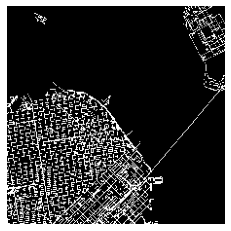

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


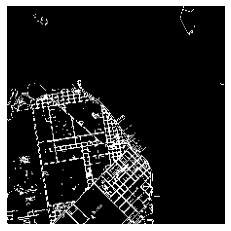

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


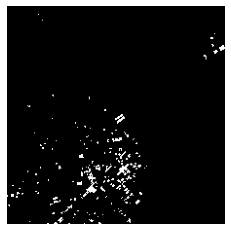

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


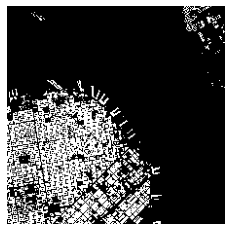

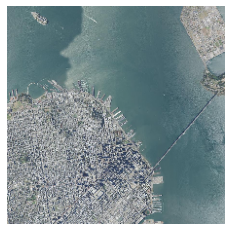

In [20]:
index = census_id_to_index["06075010500"]
for i in range(0,4):
    imshow(image_array_bw[index, i, :, :][:,:,np.newaxis].astype('float32'))
imshow(np.moveaxis(image_array_rgb[index,:,:,:], 0, 2).astype("uint8"))

In [21]:
df_sf_2 = df[df["CENSUS_ID"].isin(sf_set)][df["TRPTRANS_2_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [22]:
print(df_sf_2.shape)
df_sf_2.head() #06075013102 seems good 0.095238, 0.904762, 0.000000

(24, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
3241,06075012700,3.200000,1.111111,0.200000,0.733333,0.000000,47.400000,2.733333,181.666667,0.626667,20466.666667,1.0,0.000000
3242,06075012800,1.380952,0.904762,0.095238,0.761905,0.142857,69.333333,1.476190,111.071429,0.523810,18238.095238,1.0,0.095238
3245,06075013102,1.761905,1.523810,0.095238,0.904762,0.000000,44.238095,1.476190,151.785714,0.628571,30000.000000,1.0,0.000000
3246,06075013200,0.833333,0.416667,0.333333,0.666667,0.000000,33.250000,1.416667,175.000000,0.533333,24583.333333,1.0,0.000000
3247,06075013300,1.240000,0.920000,0.240000,0.760000,0.000000,47.360000,1.400000,158.000000,0.548000,19080.000000,1.0,0.480000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


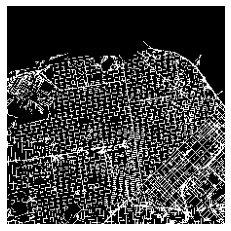

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


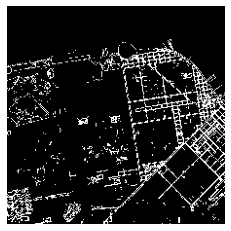

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


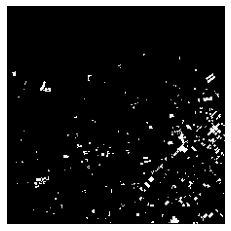

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


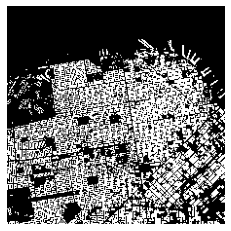

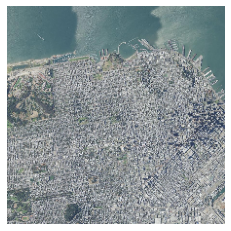

In [23]:
index = census_id_to_index["06075013102"]
for i in range(0,4):
    imshow(image_array_bw[index, i, :, :][:,:,np.newaxis].astype('float32'))
imshow(np.moveaxis(image_array_rgb[index,:,:,:], 0, 2).astype("uint8"))

In [24]:
df_sf_3 = df[df["CENSUS_ID"].isin(sf_set)][df["TRPTRANS_3_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [25]:
print(df_sf_3.shape)
df_sf_3.head()

(0, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean


# MA (Suffolk)

In [46]:
ma_set = {elt for elt in df["CENSUS_ID"] if elt[:5] == county_to_id["Suffolk"]}
print(len(ma_set))

9


In [47]:
df_ma_1 = df[df["CENSUS_ID"].isin(ma_set)][df["TRPTRANS_1_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [48]:
print(df_ma_1.shape)
df_ma_1.head() # 25025000602	   0.785714	0.000000	0.142857	

(3, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
7216,25025000602,0.0,0.000000,0.785714,0.000000,0.142857,28.000000,2.0,62.5,0.9,30000.0,1.000000,0.0
7222,25025081200,1.0,0.333333,0.615385,0.153846,0.230769,32.538462,3.0,200.0,0.5,30000.0,1.000000,0.0
7223,25025090700,1.0,0.500000,0.642857,0.000000,0.285714,65.285714,2.0,12.5,0.6,17000.0,0.714286,0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


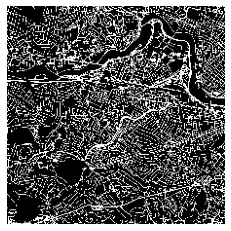

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


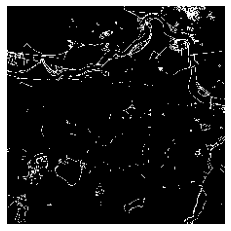

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


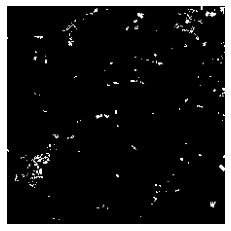

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


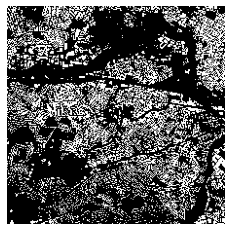

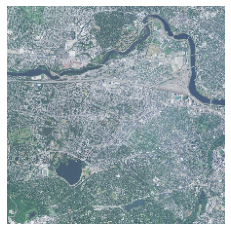

In [55]:
index = census_id_to_index["25025000602"]
for i in range(0,4):
    imshow(image_array_bw[index, i, :, :][:,:,np.newaxis].astype('float32'))
imshow(np.moveaxis(image_array_rgb[index,:,:,:], 0, 2).astype("uint8"))

In [50]:
df_ma_2 = df[df["CENSUS_ID"].isin(ma_set)][df["TRPTRANS_2_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [51]:
print(df_ma_2.shape)
df_ma_2.head() #    25025160502	                      0.352941	0.647059	0.0	

(2, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
7220,25025060400,2.8,1.4,0.000000,1.000000,0.0,54.8,1.933333,167.5,0.3,30000.0,1.0,0.0
7224,25025160502,1.0,1.0,0.352941,0.647059,0.0,60.0,1.000000,12.5,0.6,7000.0,1.0,0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


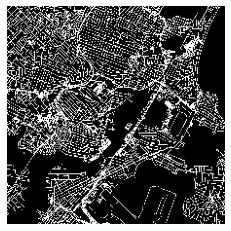

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


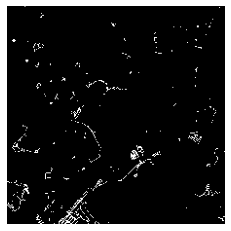

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


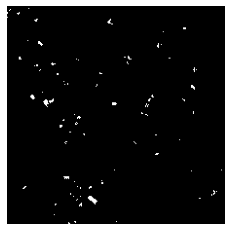

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


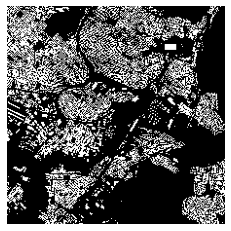

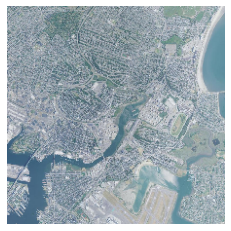

In [56]:
index = census_id_to_index["25025160502"]
for i in range(0,4):
    imshow(image_array_bw[index, i, :, :][:,:,np.newaxis].astype('float32'))
imshow(np.moveaxis(image_array_rgb[index,:,:,:], 0, 2).astype("uint8"))

In [53]:
df_ma_3 = df[df["CENSUS_ID"].isin(ma_set)][df["TRPTRANS_3_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [54]:
print(df_ma_3.shape)
df_ma_3.head()

(0, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean


# TX

In [35]:
tx_set = {elt for elt in df["CENSUS_ID"] if elt[:2] == state_to_id["TX"]}
print(len(tx_set))

3674


In [36]:
df_tx_1 = df[df["CENSUS_ID"].isin(tx_set)][df["TRPTRANS_1_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [37]:
print(df_tx_1.shape)
df_tx_1.head() # 48157670300	  0.631579	0.368421	0.000000

(8, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
13821,48113007820,0.000000,0.000000,0.615385,0.000000,0.307692,50.307692,1.538462,20.769231,0.700000,30000.000000,0.384615,0.538462
14365,48141003803,1.000000,0.422222,0.666667,0.133333,0.200000,41.000000,2.733333,12.666667,0.200000,3000.000000,0.000000,0.133333
14451,48157670300,3.000000,0.750000,0.631579,0.368421,0.000000,56.052632,4.000000,62.500000,0.300000,7000.000000,0.210526,1.000000
14689,48201222700,0.750000,0.333333,0.875000,0.125000,0.000000,42.500000,2.500000,11.562500,0.887500,6312.500000,0.000000,0.375000
14988,48201452500,0.666667,0.333333,0.666667,0.000000,0.333333,74.166667,2.333333,11.666667,0.366667,12333.333333,1.000000,0.666667


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


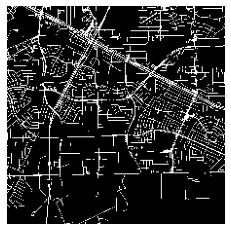

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


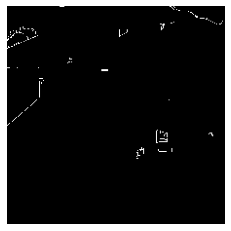

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


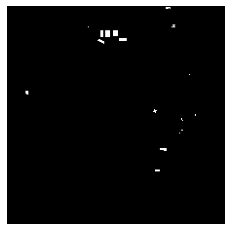

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


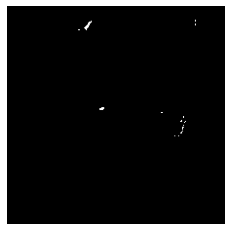

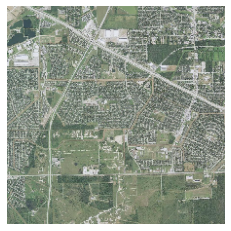

In [38]:
index = census_id_to_index["48157670300"]
for i in range(0,4):
    imshow(image_array_bw[index, i, :, :][:,:,np.newaxis].astype('float32'))
imshow(np.moveaxis(image_array_rgb[index,:,:,:], 0, 2).astype("uint8"))

In [39]:
df_tx_2 = df[df["CENSUS_ID"].isin(tx_set)][df["TRPTRANS_2_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [40]:
print(df_tx_2.shape)
df_tx_2.head() # 48001950800   0.057143	0.942857	0.0	

(3582, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
13010,48001950100,3.435897,1.717949,0.000000,1.000000,0.0,60.846154,2.000000,100.961538,0.100000,50.000000,0.820513,0.000000
13011,48001950800,3.314286,1.117857,0.057143,0.942857,0.0,52.600000,2.885714,79.035714,0.332857,1307.142857,0.500000,0.171429
13012,48001950901,2.972973,1.486486,0.000000,1.000000,0.0,57.000000,2.000000,81.418919,0.137838,50.000000,0.675676,0.000000
13013,48001950902,2.828571,1.376190,0.000000,1.000000,0.0,56.742857,2.114286,62.785714,0.200000,50.000000,0.371429,0.000000
13014,48001951000,1.513514,0.608108,0.000000,0.972973,0.0,34.702703,3.216216,50.540541,0.232432,131.081081,0.621622,0.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


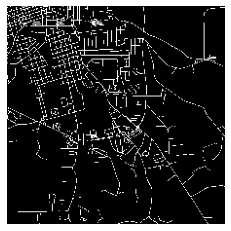

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


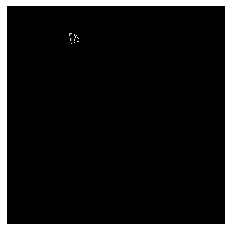

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


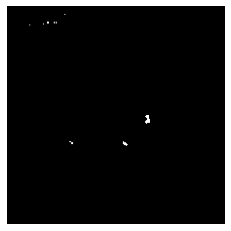

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


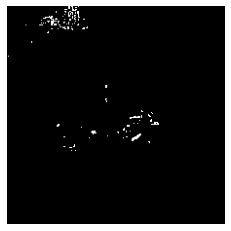

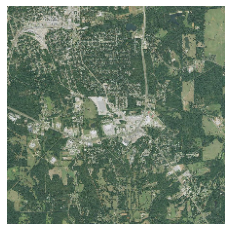

In [41]:
index = census_id_to_index["48001950800"]
for i in range(0,4):
    imshow(image_array_bw[index, i, :, :][:,:,np.newaxis].astype('float32'))
imshow(np.moveaxis(image_array_rgb[index,:,:,:], 0, 2).astype("uint8"))

In [42]:
df_tx_3 = df[df["CENSUS_ID"].isin(tx_set)][df["TRPTRANS_3_mean"] >= 0.6]

/home/jtl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [43]:
print(df_tx_3.shape)
df_tx_3.head()#48029130200	  0.000000	0.181818	0.727273

(2, 13)


,CENSUS_ID,HHVEHCNT_mean,HHVEHCNT_P_CAP_mean,TRPTRANS_1_mean,TRPTRANS_2_mean,TRPTRANS_3_mean,R_AGE_IMP_mean,HHSIZE_mean,HHFAMINC_mean,HBHTNRNT_mean,HBPPOPDN_mean,EDUC_2_mean,HH_RACE_2_mean
13170,48029130200,0.0,0.0,0.000000,0.181818,0.727273,45.000000,1.545455,20.0,0.4,7000.0,0.000000,0.545455
13868,48113011500,0.0,0.0,0.272727,0.000000,0.727273,33.272727,3.000000,30.0,0.7,17000.0,0.454545,1.000000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


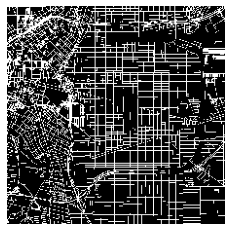

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


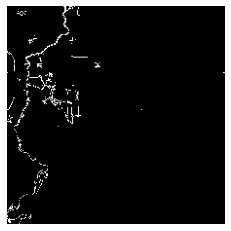

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


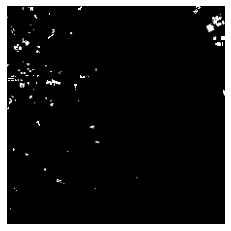

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


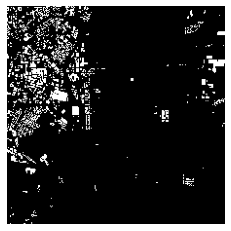

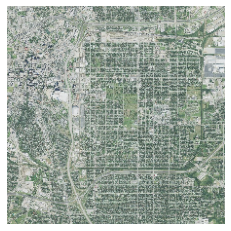

In [44]:
index = census_id_to_index["48029130200"]
for i in range(0,4):
    imshow(image_array_bw[index, i, :, :][:,:,np.newaxis].astype('float32'))
imshow(np.moveaxis(image_array_rgb[index,:,:,:], 0, 2).astype("uint8"))